## 1. 논문 재현_학습  / test5_SAC_CS_Beta

In [1]:
!pip install scipy==1.13.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/60.6 kB ? eta -:--:--
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 56.8 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.3
    Uninstalling scipy-1.16.3:
      Successfully uninstalled scipy-1.16.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.1 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.


In [5]:
import scipy
print(scipy.__version__)

1.13.1


In [6]:
%cd "/content/drive/MyDrive/Colab Notebooks/25-2 Reinforce/Project"

/content/drive/MyDrive/Colab Notebooks/25-2 Reinforce/Project


In [ ]:
import sys
import warnings
from common.runner import Runner
from common.arguments import get_args
from common.env import make_env
from common.evaluate import Evaluator
from common.utils import Logger

warnings.filterwarnings("ignore")

if __name__ == '__main__':
    args = get_args()
    args.save_dir = args.save_dir + "_" + args.DRL + "_" + args.MODE + "_" + args.policy
    args.log_dir = args.log_dir + "_" + args.DRL + "_" + args.MODE + "_" + args.policy
    args.eva_dir = args.eva_dir + "_" + args.DRL + "_" + args.MODE + "_" + args.policy
    env, args = make_env(args)
    if args.evaluate:
        args.scenario_name = args.load_dir+'/'+args.load_scenario_name+'_%d'%args.load_episode
        sys.stdout = Logger(filepath=args.eva_dir+"/"+args.scenario_name+"/", filename='evaluate_log.log')
        print('max_episodes: ', args.evaluate_episode)
    else:
        args.scenario_name = args.scenario_name + "_w%d"%args.w_soc + "_LR%.0e"%args.lr_critic + '_' + args.file_v
        sys.stdout = Logger(filepath=args.save_dir+"/"+args.scenario_name+"/", filename='train_log.log')
        print('\nweight coefficient: w_soc = %.1f' % args.w_soc)
        print('max_episodes: ', args.max_episodes)
    print('cycle name: ', args.scenario_name)
    print('episode_steps: ', args.episode_steps)
    print('abs_spd_MAX: %.3f m/s' % args.abs_spd_MAX)
    print('abs_acc_MAX: %.3f m/s2' % args.abs_acc_MAX)
    print("DRL method: ", args.DRL)
    print('obs_dim: ', args.obs_dim)
    print('action_dim: ', args.action_dim)
    print('critic initial learning rate: %.0e' % args.lr_critic)
    print('actor initial learning rate: %.0e'%args.lr_actor)
    if args.DRL == 'SAC':
        print('alpha initial learning rate: %.0e'%args.lr_alpha)
    print('initial SOC: ', args.soc0)
    print('SOC-MODE: ', args.MODE)

    if args.evaluate:
        print("\n-----Start evaluating!-----")
        evaluator = Evaluator(args, env)
        evaluator.evaluate()
        print("-----Evaluating is finished!-----")
        print('-----Data saved in: <%s>-----'%(args.eva_dir+"/"+args.scenario_name))
    else:
        print("\n-----Start training-----")
        runner = Runner(args, env)
        runner.set_seed()
        if args.DRL == 'SAC':
            runner.run_SAC()
        elif args.DRL == 'DDPG':
            runner.run_DDPG()
        else:
            print("\n[ERROR]: No such DRL method in this program! Exit Now!\n")
        runner.memory_info()
        print("-----Training is finished!-----")
        print('-----Data saved in: <%s>-----'%(args.save_dir+"/"+args.scenario_name))


weight coefficient: w_soc = 100.0
max_episodes:  400
cycle name:  MixTrain_w100_LR1e-03_v1
episode_steps:  3440
abs_spd_MAX: 31.667 m/s
abs_acc_MAX: 1.944 m/s2
DRL method:  SAC
obs_dim:  7
action_dim:  1
critic initial learning rate: 1e-03
actor initial learning rate: 1e-04
alpha initial learning rate: 1e-04
initial SOC:  0.5
SOC-MODE:  CS

-----Start training-----



  0%|          | 0/400 [00:00<?, ?it/s]


---Beta policy is employed.---

actor device:  cuda:0
critic device:  cuda:0
Random seeds have been set to 79 !


failure in step 2506 of episode 0



  0%|          | 1/400 [00:39<4:25:01, 39.85s/it]


epi 0: travel 39.438km, SOC -0.7208, FCS-SOH 0.999540, Bat-SOH 0.999005
epi 0: H2_100km 1991.0g, eq_H2_100km 5567.7g, money_100km ￥714.72
epi 0: ep_r -339.816, c-loss1 47057.6047, c-loss2 46891.3015, a-loss 284.9013, en-loss 0.1045
epi 0: lr_critic 0.000050, lr_actor 0.000050, lr_alpha 0.000050

failure in step 615 of episode 1



  0%|          | 2/400 [01:25<4:47:12, 43.30s/it]


epi 1: travel 39.438km, SOC 0.4623, FCS-SOH 0.999818, Bat-SOH 0.999243
epi 1: H2_100km 4397.8g, eq_H2_100km 7520.4g, money_100km ￥586.61
epi 1: ep_r -600.686, c-loss1 226458.8284, c-loss2 217421.0995, a-loss 3206.9189, en-loss -1.1906
epi 1: lr_critic 0.000074, lr_actor 0.000051, lr_alpha 0.000051

failure in step 1582 of episode 2



  1%|          | 3/400 [02:09<4:47:23, 43.43s/it]


epi 2: travel 39.438km, SOC -1.9491, FCS-SOH 0.999993, Bat-SOH 0.997965
epi 2: H2_100km 62.3g, eq_H2_100km 4323.5g, money_100km ￥541.82
epi 2: ep_r -855.164, c-loss1 262974.2790, c-loss2 232027.0989, a-loss 8084.5739, en-loss -3.2469
epi 2: lr_critic 0.000097, lr_actor 0.000052, lr_alpha 0.000052

failure in step 1582 of episode 3



  1%|          | 4/400 [02:53<4:47:49, 43.61s/it]


epi 3: travel 39.438km, SOC -1.9475, FCS-SOH 0.999993, Bat-SOH 0.997964
epi 3: H2_100km 64.3g, eq_H2_100km 4322.7g, money_100km ￥543.00
epi 3: ep_r -855.443, c-loss1 421424.0865, c-loss2 278581.0975, a-loss 14360.4004, en-loss -3.7559
epi 3: lr_critic 0.000121, lr_actor 0.000054, lr_alpha 0.000054

failure in step 1581 of episode 4



  1%|▏         | 5/400 [03:39<4:52:56, 44.50s/it]


epi 4: travel 39.438km, SOC -1.8814, FCS-SOH 0.999953, Bat-SOH 0.998004
epi 4: H2_100km 159.0g, eq_H2_100km 4325.4g, money_100km ￥564.97
epi 4: ep_r -842.675, c-loss1 420295.9797, c-loss2 303262.3595, a-loss 22296.7529, en-loss -3.6483
epi 4: lr_critic 0.000145, lr_actor 0.000055, lr_alpha 0.000055

failure in step 1585 of episode 5



  2%|▏         | 6/400 [04:23<4:51:33, 44.40s/it]


epi 5: travel 39.438km, SOC -1.6744, FCS-SOH 0.999864, Bat-SOH 0.998071
epi 5: H2_100km 463.8g, eq_H2_100km 4422.9g, money_100km ￥628.64
epi 5: ep_r -772.775, c-loss1 308176.2065, c-loss2 390063.0975, a-loss 30113.7254, en-loss -2.5663
epi 5: lr_critic 0.000169, lr_actor 0.000056, lr_alpha 0.000056

failure in step 1695 of episode 6



  2%|▏         | 7/400 [05:07<4:50:10, 44.30s/it]


epi 6: travel 39.438km, SOC -0.2233, FCS-SOH 0.999681, Bat-SOH 0.998611
epi 6: H2_100km 3103.0g, eq_H2_100km 5554.0g, money_100km ￥771.61
epi 6: ep_r -361.005, c-loss1 266661.0805, c-loss2 342407.6731, a-loss 36784.3621, en-loss -2.0800
epi 6: lr_critic 0.000192, lr_actor 0.000058, lr_alpha 0.000058

failure in step 1696 of episode 7



  2%|▏         | 8/400 [05:54<4:54:51, 45.13s/it]


epi 7: travel 39.438km, SOC -0.7306, FCS-SOH 0.999620, Bat-SOH 0.998508
epi 7: H2_100km 2125.7g, eq_H2_100km 5091.6g, money_100km ￥792.34
epi 7: ep_r -475.032, c-loss1 249679.3653, c-loss2 301478.4094, a-loss 40657.9920, en-loss -1.6763
epi 7: lr_critic 0.000216, lr_actor 0.000059, lr_alpha 0.000059

failure in step 1682 of episode 8



  2%|▏         | 9/400 [06:40<4:56:39, 45.52s/it]


epi 8: travel 39.438km, SOC -0.9939, FCS-SOH 0.999656, Bat-SOH 0.998176
epi 8: H2_100km 1643.4g, eq_H2_100km 4892.6g, money_100km ￥820.92
epi 8: ep_r -569.016, c-loss1 250909.5741, c-loss2 287589.4107, a-loss 44577.5424, en-loss -1.4963
epi 8: lr_critic 0.000240, lr_actor 0.000060, lr_alpha 0.000060

failure in step 1695 of episode 9



  2%|▎         | 10/400 [07:27<4:57:38, 45.79s/it]


epi 9: travel 39.438km, SOC -0.5475, FCS-SOH 0.999690, Bat-SOH 0.998535
epi 9: H2_100km 2471.3g, eq_H2_100km 5340.9g, money_100km ￥751.22
epi 9: ep_r -498.428, c-loss1 258575.7377, c-loss2 283091.1109, a-loss 48447.6049, en-loss -1.0981
epi 9: lr_critic 0.000264, lr_actor 0.000061, lr_alpha 0.000061

failure in step 1693 of episode 10



  3%|▎         | 11/400 [08:14<4:59:25, 46.18s/it]


epi 10: travel 39.438km, SOC -0.5331, FCS-SOH 0.999610, Bat-SOH 0.998643
epi 10: H2_100km 2470.1g, eq_H2_100km 5371.3g, money_100km ￥783.36
epi 10: ep_r -434.301, c-loss1 268027.8377, c-loss2 283170.8270, a-loss 51197.7869, en-loss -0.7815
epi 10: lr_critic 0.000287, lr_actor 0.000063, lr_alpha 0.000063

failure in step 1697 of episode 11



  3%|▎         | 12/400 [09:01<5:01:32, 46.63s/it]


epi 11: travel 39.438km, SOC -0.9130, FCS-SOH 0.999559, Bat-SOH 0.998449
epi 11: H2_100km 1762.9g, eq_H2_100km 5014.4g, money_100km ￥830.97
epi 11: ep_r -551.243, c-loss1 264365.2438, c-loss2 272766.0086, a-loss 53297.3233, en-loss -0.4438
epi 11: lr_critic 0.000311, lr_actor 0.000064, lr_alpha 0.000064

failure in step 1697 of episode 12



  3%|▎         | 13/400 [09:48<5:01:29, 46.74s/it]


epi 12: travel 39.438km, SOC -0.8543, FCS-SOH 0.999535, Bat-SOH 0.998398
epi 12: H2_100km 1864.1g, eq_H2_100km 5097.3g, money_100km ￥868.16
epi 12: ep_r -500.152, c-loss1 282166.6900, c-loss2 287101.1578, a-loss 56730.2761, en-loss -0.1268
epi 12: lr_critic 0.000335, lr_actor 0.000065, lr_alpha 0.000065

failure in step 1700 of episode 13



  4%|▎         | 14/400 [10:36<5:02:00, 46.94s/it]


epi 13: travel 39.438km, SOC -0.6290, FCS-SOH 0.999543, Bat-SOH 0.998398
epi 13: H2_100km 2272.0g, eq_H2_100km 5283.0g, money_100km ￥883.18
epi 13: ep_r -455.285, c-loss1 311200.0372, c-loss2 314973.1476, a-loss 58972.2864, en-loss -0.0943
epi 13: lr_critic 0.000359, lr_actor 0.000066, lr_alpha 0.000066

failure in step 1696 of episode 14



  4%|▍         | 15/400 [11:23<5:02:23, 47.13s/it]


epi 14: travel 39.438km, SOC -0.3702, FCS-SOH 0.999580, Bat-SOH 0.998545
epi 14: H2_100km 2741.0g, eq_H2_100km 5527.2g, money_100km ￥843.81
epi 14: ep_r -418.894, c-loss1 317681.3810, c-loss2 321173.3093, a-loss 59364.6155, en-loss -0.0549
epi 14: lr_critic 0.000383, lr_actor 0.000068, lr_alpha 0.000068

failure in step 1702 of episode 15



  4%|▍         | 16/400 [12:11<5:02:09, 47.21s/it]


epi 15: travel 39.438km, SOC -0.4371, FCS-SOH 0.999559, Bat-SOH 0.998426
epi 15: H2_100km 2582.6g, eq_H2_100km 5543.2g, money_100km ￥881.71
epi 15: ep_r -435.073, c-loss1 333126.8014, c-loss2 338404.6289, a-loss 56891.8556, en-loss 0.0308
epi 15: lr_critic 0.000406, lr_actor 0.000069, lr_alpha 0.000069

failure in step 1711 of episode 16



  4%|▍         | 17/400 [12:59<5:02:30, 47.39s/it]


epi 16: travel 39.438km, SOC -0.4257, FCS-SOH 0.999590, Bat-SOH 0.998532
epi 16: H2_100km 2609.8g, eq_H2_100km 5512.2g, money_100km ￥834.35
epi 16: ep_r -421.310, c-loss1 349970.6763, c-loss2 357332.3399, a-loss 54301.8898, en-loss -0.1343
epi 16: lr_critic 0.000430, lr_actor 0.000070, lr_alpha 0.000070

failure in step 1516 of episode 17



  4%|▍         | 18/400 [13:46<5:01:59, 47.43s/it]


epi 17: travel 39.438km, SOC 0.9197, FCS-SOH 0.999491, Bat-SOH 0.999297
epi 17: H2_100km 5233.1g, eq_H2_100km 7152.7g, money_100km ￥855.87
epi 17: ep_r -181.728, c-loss1 345717.5529, c-loss2 353678.2702, a-loss 51554.2195, en-loss -0.1914
epi 17: lr_critic 0.000454, lr_actor 0.000071, lr_alpha 0.000071

failure in step 2520 of episode 18



  5%|▍         | 19/400 [14:36<5:06:32, 48.27s/it]


epi 18: travel 39.438km, SOC -0.0703, FCS-SOH 0.999308, Bat-SOH 0.999150
epi 18: H2_100km 3173.2g, eq_H2_100km 5850.2g, money_100km ￥918.67
epi 18: ep_r -207.945, c-loss1 324931.0649, c-loss2 331746.4946, a-loss 48591.5104, en-loss -0.0480
epi 18: lr_critic 0.000478, lr_actor 0.000073, lr_alpha 0.000073

failure in step 2779 of episode 19



  5%|▌         | 20/400 [15:27<5:09:40, 48.90s/it]


epi 19: travel 39.438km, SOC 0.0032, FCS-SOH 0.999240, Bat-SOH 0.999220
epi 19: H2_100km 3287.7g, eq_H2_100km 6081.2g, money_100km ￥958.95
epi 19: ep_r -129.421, c-loss1 332569.0897, c-loss2 337845.9657, a-loss 47013.6929, en-loss -0.0744
epi 19: lr_critic 0.000501, lr_actor 0.000074, lr_alpha 0.000074

failure in step 2629 of episode 20



  5%|▌         | 21/400 [16:13<5:04:17, 48.17s/it]


epi 20: travel 39.438km, SOC -0.0373, FCS-SOH 0.999288, Bat-SOH 0.999194
epi 20: H2_100km 3233.9g, eq_H2_100km 5950.1g, money_100km ￥926.73
epi 20: ep_r -166.519, c-loss1 321711.1144, c-loss2 327060.5689, a-loss 43934.9305, en-loss -0.0361
epi 20: lr_critic 0.000525, lr_actor 0.000075, lr_alpha 0.000075

failure in step 1714 of episode 21



  6%|▌         | 22/400 [17:01<5:02:37, 48.03s/it]


epi 21: travel 39.438km, SOC -0.1597, FCS-SOH 0.999687, Bat-SOH 0.998440
epi 21: H2_100km 3145.0g, eq_H2_100km 5818.9g, money_100km ￥811.92
epi 21: ep_r -384.711, c-loss1 297616.7324, c-loss2 302762.8667, a-loss 41289.8143, en-loss -0.0644
epi 21: lr_critic 0.000549, lr_actor 0.000076, lr_alpha 0.000076

failure in step 2064 of episode 22



  6%|▌         | 23/400 [17:48<5:01:05, 47.92s/it]


epi 22: travel 39.438km, SOC -0.1284, FCS-SOH 0.999673, Bat-SOH 0.998656
epi 22: H2_100km 3192.5g, eq_H2_100km 5833.9g, money_100km ￥770.23
epi 22: ep_r -362.680, c-loss1 311895.4909, c-loss2 316784.9378, a-loss 40519.5660, en-loss -0.0156
epi 22: lr_critic 0.000572, lr_actor 0.000077, lr_alpha 0.000077

failure in step 2270 of episode 23



  6%|▌         | 24/400 [18:36<4:59:00, 47.71s/it]


epi 23: travel 39.438km, SOC -0.0572, FCS-SOH 0.999551, Bat-SOH 0.999067
epi 23: H2_100km 3293.4g, eq_H2_100km 5886.8g, money_100km ￥764.38
epi 23: ep_r -290.283, c-loss1 313770.2006, c-loss2 319108.5511, a-loss 39079.1096, en-loss 0.0566
epi 23: lr_critic 0.000596, lr_actor 0.000079, lr_alpha 0.000079

failure in step 2281 of episode 24



  6%|▋         | 25/400 [19:23<4:58:11, 47.71s/it]


epi 24: travel 39.438km, SOC -0.0263, FCS-SOH 0.999564, Bat-SOH 0.999157
epi 24: H2_100km 3361.8g, eq_H2_100km 5859.1g, money_100km ￥735.17
epi 24: ep_r -267.774, c-loss1 309415.6752, c-loss2 313136.4039, a-loss 36924.3204, en-loss 0.1363
epi 24: lr_critic 0.000620, lr_actor 0.000080, lr_alpha 0.000080

failure in step 2713 of episode 25



  6%|▋         | 26/400 [20:12<4:58:25, 47.87s/it]


epi 25: travel 39.438km, SOC 0.1079, FCS-SOH 0.999313, Bat-SOH 0.999253
epi 25: H2_100km 3514.3g, eq_H2_100km 6045.8g, money_100km ￥907.91
epi 25: ep_r -99.916, c-loss1 306038.7036, c-loss2 308357.5060, a-loss 34713.9503, en-loss 0.2145
epi 25: lr_critic 0.000644, lr_actor 0.000081, lr_alpha 0.000081

failure in step 2711 of episode 26



  7%|▋         | 27/400 [20:58<4:53:56, 47.28s/it]


epi 26: travel 39.438km, SOC 0.0710, FCS-SOH 0.999312, Bat-SOH 0.999281
epi 26: H2_100km 3444.1g, eq_H2_100km 5999.2g, money_100km ￥896.92
epi 26: ep_r -105.085, c-loss1 286755.5224, c-loss2 289639.2016, a-loss 31601.9098, en-loss 0.2437
epi 26: lr_critic 0.000667, lr_actor 0.000082, lr_alpha 0.000082

failure in step 2504 of episode 27



  7%|▋         | 28/400 [21:43<4:49:16, 46.66s/it]


epi 27: travel 39.438km, SOC 0.0646, FCS-SOH 0.999446, Bat-SOH 0.999291
epi 27: H2_100km 3478.2g, eq_H2_100km 5840.8g, money_100km ￥796.02
epi 27: ep_r -166.422, c-loss1 282408.8278, c-loss2 284936.0646, a-loss 28782.0155, en-loss -0.0098
epi 27: lr_critic 0.000691, lr_actor 0.000084, lr_alpha 0.000084

failure in step 2522 of episode 28



  7%|▋         | 29/400 [22:28<4:46:37, 46.35s/it]


epi 28: travel 39.438km, SOC 0.0417, FCS-SOH 0.999519, Bat-SOH 0.999287
epi 28: H2_100km 3458.2g, eq_H2_100km 5753.2g, money_100km ￥741.04
epi 28: ep_r -167.238, c-loss1 266871.6560, c-loss2 268898.6457, a-loss 26254.4207, en-loss 0.1370
epi 28: lr_critic 0.000715, lr_actor 0.000085, lr_alpha 0.000085

failure in step 2585 of episode 29



  8%|▊         | 30/400 [23:14<4:44:01, 46.06s/it]


epi 29: travel 39.438km, SOC 0.0391, FCS-SOH 0.999445, Bat-SOH 0.999275
epi 29: H2_100km 3420.1g, eq_H2_100km 5840.0g, money_100km ￥796.30
epi 29: ep_r -151.692, c-loss1 248395.5117, c-loss2 249246.5122, a-loss 25109.8748, en-loss 0.1237
epi 29: lr_critic 0.000739, lr_actor 0.000086, lr_alpha 0.000086

failure in step 2530 of episode 30



  8%|▊         | 31/400 [23:59<4:41:38, 45.79s/it]


epi 30: travel 39.438km, SOC 0.0413, FCS-SOH 0.999468, Bat-SOH 0.999258
epi 30: H2_100km 3441.3g, eq_H2_100km 5874.6g, money_100km ￥785.67
epi 30: ep_r -166.853, c-loss1 264525.0629, c-loss2 266351.1187, a-loss 25105.3919, en-loss 0.0696
epi 30: lr_critic 0.000763, lr_actor 0.000088, lr_alpha 0.000088

failure in step 2720 of episode 31



  8%|▊         | 32/400 [24:45<4:41:34, 45.91s/it]


epi 31: travel 39.438km, SOC 0.0582, FCS-SOH 0.999356, Bat-SOH 0.999305
epi 31: H2_100km 3421.1g, eq_H2_100km 5913.8g, money_100km ￥856.28
epi 31: ep_r -118.368, c-loss1 279445.9773, c-loss2 281041.5899, a-loss 24705.2843, en-loss 0.0443
epi 31: lr_critic 0.000786, lr_actor 0.000089, lr_alpha 0.000089

failure in step 2554 of episode 32



  8%|▊         | 33/400 [25:30<4:38:31, 45.54s/it]


epi 32: travel 39.438km, SOC 0.0762, FCS-SOH 0.999456, Bat-SOH 0.999293
epi 32: H2_100km 3493.6g, eq_H2_100km 5909.4g, money_100km ￥788.07
epi 32: ep_r -144.643, c-loss1 271136.7524, c-loss2 273006.7992, a-loss 24405.7980, en-loss -0.0094
epi 32: lr_critic 0.000810, lr_actor 0.000090, lr_alpha 0.000090

failure in step 2724 of episode 33



  8%|▊         | 34/400 [26:16<4:38:17, 45.62s/it]


epi 33: travel 39.438km, SOC 0.0569, FCS-SOH 0.999386, Bat-SOH 0.999285
epi 33: H2_100km 3422.1g, eq_H2_100km 5915.2g, money_100km ￥839.17
epi 33: ep_r -109.331, c-loss1 234154.0724, c-loss2 236299.9363, a-loss 22891.3683, en-loss 0.0559
epi 33: lr_critic 0.000834, lr_actor 0.000091, lr_alpha 0.000091

failure in step 2729 of episode 34



  9%|▉         | 35/400 [27:02<4:39:46, 45.99s/it]


epi 34: travel 39.438km, SOC 0.0709, FCS-SOH 0.999395, Bat-SOH 0.999340
epi 34: H2_100km 3455.8g, eq_H2_100km 5881.4g, money_100km ￥821.11
epi 34: ep_r -107.985, c-loss1 211692.7474, c-loss2 214856.0842, a-loss 20621.5151, en-loss 0.2210
epi 34: lr_critic 0.000858, lr_actor 0.000093, lr_alpha 0.000093

failure in step 2582 of episode 35



  9%|▉         | 36/400 [27:48<4:38:56, 45.98s/it]


epi 35: travel 39.438km, SOC 0.0686, FCS-SOH 0.999522, Bat-SOH 0.999326
epi 35: H2_100km 3519.8g, eq_H2_100km 5831.6g, money_100km ￥732.50
epi 35: ep_r -132.686, c-loss1 184251.6469, c-loss2 187197.4876, a-loss 18754.9063, en-loss 0.2158
epi 35: lr_critic 0.000881, lr_actor 0.000094, lr_alpha 0.000094

failure in step 2789 of episode 36



  9%|▉         | 37/400 [28:35<4:39:40, 46.23s/it]


epi 36: travel 39.438km, SOC 0.0781, FCS-SOH 0.999371, Bat-SOH 0.999267
epi 36: H2_100km 3452.1g, eq_H2_100km 6042.3g, money_100km ￥856.75
epi 36: ep_r -72.753, c-loss1 175733.4769, c-loss2 178292.6020, a-loss 17382.0389, en-loss 0.2389
epi 36: lr_critic 0.000905, lr_actor 0.000095, lr_alpha 0.000095

failure in step 2794 of episode 37



 10%|▉         | 38/400 [29:22<4:39:39, 46.35s/it]


epi 37: travel 39.438km, SOC 0.0301, FCS-SOH 0.999364, Bat-SOH 0.999200
epi 37: H2_100km 3360.9g, eq_H2_100km 6043.1g, money_100km ￥874.46
epi 37: ep_r -114.145, c-loss1 174448.3978, c-loss2 177848.3681, a-loss 16605.1608, en-loss 0.2334
epi 37: lr_critic 0.000929, lr_actor 0.000096, lr_alpha 0.000096

failure in step 2786 of episode 38



 10%|▉         | 39/400 [30:09<4:40:30, 46.62s/it]


epi 38: travel 39.438km, SOC 0.0895, FCS-SOH 0.999409, Bat-SOH 0.999266
epi 38: H2_100km 3487.4g, eq_H2_100km 6036.0g, money_100km ￥829.69
epi 38: ep_r -80.319, c-loss1 174981.8920, c-loss2 178929.0234, a-loss 16473.6652, en-loss 0.0690
epi 38: lr_critic 0.000953, lr_actor 0.000098, lr_alpha 0.000098

failure in step 2731 of episode 39



 10%|█         | 40/400 [30:57<4:41:38, 46.94s/it]


epi 39: travel 39.438km, SOC 0.1211, FCS-SOH 0.999440, Bat-SOH 0.999235
epi 39: H2_100km 3575.6g, eq_H2_100km 6134.1g, money_100km ￥819.96
epi 39: ep_r -73.121, c-loss1 169994.1333, c-loss2 173759.6890, a-loss 16008.6637, en-loss -0.0521
epi 39: lr_critic 0.000976, lr_actor 0.000099, lr_alpha 0.000099

failure in step 2642 of episode 40



 10%|█         | 41/400 [31:44<4:40:33, 46.89s/it]


epi 40: travel 39.438km, SOC 0.1134, FCS-SOH 0.999533, Bat-SOH 0.999224
epi 40: H2_100km 3598.0g, eq_H2_100km 6121.4g, money_100km ￥756.96
epi 40: ep_r -96.480, c-loss1 162162.4642, c-loss2 165259.7778, a-loss 15311.8929, en-loss -0.0477
epi 40: lr_critic 0.001000, lr_actor 0.000100, lr_alpha 0.000100

failure in step 2582 of episode 41



 10%|█         | 42/400 [32:29<4:36:43, 46.38s/it]


epi 41: travel 39.438km, SOC 0.1022, FCS-SOH 0.999587, Bat-SOH 0.999235
epi 41: H2_100km 3594.8g, eq_H2_100km 6034.9g, money_100km ￥711.85
epi 41: ep_r -119.654, c-loss1 169675.0876, c-loss2 173591.1812, a-loss 14853.6029, en-loss -0.0262
epi 41: lr_critic 0.000976, lr_actor 0.000099, lr_alpha 0.000099

failure in step 2720 of episode 42



 11%|█         | 43/400 [33:14<4:33:19, 45.94s/it]


epi 42: travel 39.438km, SOC 0.1051, FCS-SOH 0.999502, Bat-SOH 0.999214
epi 42: H2_100km 3556.7g, eq_H2_100km 6136.1g, money_100km ￥780.46
epi 42: ep_r -82.191, c-loss1 184840.5192, c-loss2 188957.2614, a-loss 14713.1975, en-loss 0.0054
epi 42: lr_critic 0.000953, lr_actor 0.000098, lr_alpha 0.000098

failure in step 2588 of episode 43



 11%|█         | 44/400 [34:00<4:33:14, 46.05s/it]


epi 43: travel 39.438km, SOC 0.0569, FCS-SOH 0.999576, Bat-SOH 0.999264
epi 43: H2_100km 3511.6g, eq_H2_100km 6015.8g, money_100km ￥709.16
epi 43: ep_r -120.265, c-loss1 193733.5940, c-loss2 198618.8917, a-loss 14310.1994, en-loss -0.0192
epi 43: lr_critic 0.000929, lr_actor 0.000096, lr_alpha 0.000096

failure in step 2698 of episode 44



 11%|█▏        | 45/400 [34:44<4:29:24, 45.53s/it]


epi 44: travel 39.438km, SOC 0.1116, FCS-SOH 0.999559, Bat-SOH 0.999204
epi 44: H2_100km 3594.7g, eq_H2_100km 6044.3g, money_100km ￥741.57
epi 44: ep_r -85.402, c-loss1 210352.0200, c-loss2 214779.6919, a-loss 14048.0706, en-loss -0.0560
epi 44: lr_critic 0.000905, lr_actor 0.000095, lr_alpha 0.000095

failure in step 2338 of episode 45



 12%|█▏        | 46/400 [35:29<4:27:10, 45.28s/it]


epi 45: travel 39.438km, SOC 0.0701, FCS-SOH 0.999741, Bat-SOH 0.999235
epi 45: H2_100km 3636.4g, eq_H2_100km 5937.4g, money_100km ￥600.22
epi 45: ep_r -203.005, c-loss1 236682.7916, c-loss2 242500.0045, a-loss 14119.5455, en-loss -0.0308
epi 45: lr_critic 0.000881, lr_actor 0.000094, lr_alpha 0.000094

failure in step 2447 of episode 46



 12%|█▏        | 47/400 [36:15<4:27:43, 45.51s/it]


epi 46: travel 39.438km, SOC 0.0528, FCS-SOH 0.999629, Bat-SOH 0.999051
epi 46: H2_100km 3554.4g, eq_H2_100km 6028.4g, money_100km ￥725.47
epi 46: ep_r -184.135, c-loss1 259502.5613, c-loss2 264226.4641, a-loss 14978.6961, en-loss -0.1517
epi 46: lr_critic 0.000858, lr_actor 0.000093, lr_alpha 0.000093

failure in step 2543 of episode 47



 12%|█▏        | 48/400 [37:00<4:25:16, 45.22s/it]


epi 47: travel 39.438km, SOC 0.0366, FCS-SOH 0.999552, Bat-SOH 0.999091
epi 47: H2_100km 3471.2g, eq_H2_100km 6000.5g, money_100km ￥769.16
epi 47: ep_r -159.613, c-loss1 276562.0309, c-loss2 281810.2060, a-loss 15456.9230, en-loss -0.0269
epi 47: lr_critic 0.000834, lr_actor 0.000091, lr_alpha 0.000091

failure in step 2603 of episode 48



 12%|█▏        | 49/400 [37:46<4:27:02, 45.65s/it]


epi 48: travel 39.438km, SOC 0.1148, FCS-SOH 0.999526, Bat-SOH 0.999088
epi 48: H2_100km 3599.5g, eq_H2_100km 6180.1g, money_100km ￥795.60
epi 48: ep_r -106.906, c-loss1 276925.9277, c-loss2 281532.9193, a-loss 15694.2349, en-loss -0.1039
epi 48: lr_critic 0.000810, lr_actor 0.000090, lr_alpha 0.000090

failure in step 2698 of episode 49



 12%|█▎        | 50/400 [38:34<4:30:44, 46.41s/it]


epi 49: travel 39.438km, SOC 0.0494, FCS-SOH 0.999451, Bat-SOH 0.999166
epi 49: H2_100km 3453.6g, eq_H2_100km 6226.0g, money_100km ￥824.69
epi 49: ep_r -131.789, c-loss1 299795.2861, c-loss2 303495.8307, a-loss 15955.9630, en-loss -0.0656
epi 49: lr_critic 0.000786, lr_actor 0.000089, lr_alpha 0.000089

failure in step 2591 of episode 50



 13%|█▎        | 51/400 [39:20<4:29:19, 46.30s/it]


epi 50: travel 39.438km, SOC 0.0948, FCS-SOH 0.999470, Bat-SOH 0.999089
epi 50: H2_100km 3533.0g, eq_H2_100km 6353.2g, money_100km ￥833.51
epi 50: ep_r -121.196, c-loss1 306792.9067, c-loss2 310568.3370, a-loss 16029.5534, en-loss 0.0783
epi 50: lr_critic 0.000763, lr_actor 0.000088, lr_alpha 0.000088

failure in step 2534 of episode 51



 13%|█▎        | 52/400 [40:07<4:29:12, 46.42s/it]


epi 51: travel 39.438km, SOC 0.0906, FCS-SOH 0.999504, Bat-SOH 0.999045
epi 51: H2_100km 3550.3g, eq_H2_100km 6327.2g, money_100km ￥820.51
epi 51: ep_r -138.412, c-loss1 294827.2917, c-loss2 297890.0224, a-loss 16412.8644, en-loss -0.0555
epi 51: lr_critic 0.000739, lr_actor 0.000086, lr_alpha 0.000086

failure in step 2580 of episode 52



 13%|█▎        | 53/400 [40:52<4:24:55, 45.81s/it]


epi 52: travel 39.438km, SOC 0.0693, FCS-SOH 0.999492, Bat-SOH 0.999130
epi 52: H2_100km 3500.7g, eq_H2_100km 6252.7g, money_100km ￥804.67
epi 52: ep_r -139.032, c-loss1 282376.8705, c-loss2 285520.2304, a-loss 16732.9478, en-loss -0.0537
epi 52: lr_critic 0.000715, lr_actor 0.000085, lr_alpha 0.000085

failure in step 2550 of episode 53



 14%|█▎        | 54/400 [41:36<4:22:00, 45.43s/it]


epi 53: travel 39.438km, SOC 0.1067, FCS-SOH 0.999493, Bat-SOH 0.999064
epi 53: H2_100km 3573.0g, eq_H2_100km 6292.2g, money_100km ￥825.75
epi 53: ep_r -130.430, c-loss1 286822.1290, c-loss2 288989.1207, a-loss 16840.5289, en-loss -0.1264
epi 53: lr_critic 0.000691, lr_actor 0.000084, lr_alpha 0.000084

failure in step 2582 of episode 54



 14%|█▍        | 55/400 [42:21<4:19:44, 45.17s/it]


epi 54: travel 39.438km, SOC 0.1163, FCS-SOH 0.999484, Bat-SOH 0.999042
epi 54: H2_100km 3602.0g, eq_H2_100km 6198.1g, money_100km ￥839.26
epi 54: ep_r -119.020, c-loss1 290163.2863, c-loss2 291633.2189, a-loss 17036.0422, en-loss -0.0972
epi 54: lr_critic 0.000667, lr_actor 0.000082, lr_alpha 0.000082

failure in step 2554 of episode 55



 14%|█▍        | 56/400 [43:05<4:17:34, 44.93s/it]


epi 55: travel 39.438km, SOC 0.1051, FCS-SOH 0.999492, Bat-SOH 0.999077
epi 55: H2_100km 3575.5g, eq_H2_100km 6213.3g, money_100km ￥823.41
epi 55: ep_r -127.259, c-loss1 292000.3400, c-loss2 293183.5135, a-loss 17173.4565, en-loss -0.0330
epi 55: lr_critic 0.000644, lr_actor 0.000081, lr_alpha 0.000081

failure in step 2583 of episode 56



 14%|█▍        | 57/400 [43:50<4:17:37, 45.06s/it]


epi 56: travel 39.438km, SOC 0.1177, FCS-SOH 0.999466, Bat-SOH 0.999152
epi 56: H2_100km 3603.9g, eq_H2_100km 6209.5g, money_100km ￥825.65
epi 56: ep_r -120.543, c-loss1 302545.4505, c-loss2 303971.7275, a-loss 17401.0194, en-loss -0.2026
epi 56: lr_critic 0.000620, lr_actor 0.000080, lr_alpha 0.000080

failure in step 2518 of episode 57



 14%|█▍        | 58/400 [44:36<4:17:09, 45.11s/it]


epi 57: travel 39.438km, SOC 0.1145, FCS-SOH 0.999498, Bat-SOH 0.999046
epi 57: H2_100km 3606.0g, eq_H2_100km 6218.3g, money_100km ￥826.86
epi 57: ep_r -140.103, c-loss1 292307.3750, c-loss2 292901.5527, a-loss 17043.2325, en-loss -0.0749
epi 57: lr_critic 0.000596, lr_actor 0.000079, lr_alpha 0.000079

failure in step 2529 of episode 58



 15%|█▍        | 59/400 [45:20<4:15:47, 45.01s/it]


epi 58: travel 39.438km, SOC 0.1199, FCS-SOH 0.999506, Bat-SOH 0.999047
epi 58: H2_100km 3621.5g, eq_H2_100km 6216.0g, money_100km ￥822.61
epi 58: ep_r -136.012, c-loss1 285327.3250, c-loss2 285689.2331, a-loss 16581.1109, en-loss -0.1135
epi 58: lr_critic 0.000572, lr_actor 0.000077, lr_alpha 0.000077

failure in step 2489 of episode 59



 15%|█▌        | 60/400 [46:05<4:13:52, 44.80s/it]


epi 59: travel 39.438km, SOC 0.1145, FCS-SOH 0.999552, Bat-SOH 0.999046
epi 59: H2_100km 3618.7g, eq_H2_100km 6146.0g, money_100km ￥788.25
epi 59: ep_r -149.536, c-loss1 297508.4510, c-loss2 299385.4737, a-loss 16367.5907, en-loss -0.0077
epi 59: lr_critic 0.000549, lr_actor 0.000076, lr_alpha 0.000076

failure in step 2483 of episode 60



 15%|█▌        | 61/400 [46:49<4:12:29, 44.69s/it]


epi 60: travel 39.438km, SOC 0.1230, FCS-SOH 0.999541, Bat-SOH 0.999036
epi 60: H2_100km 3642.0g, eq_H2_100km 6207.8g, money_100km ￥800.46
epi 60: ep_r -154.709, c-loss1 309199.7701, c-loss2 311199.2158, a-loss 16618.7000, en-loss 0.0058
epi 60: lr_critic 0.000525, lr_actor 0.000075, lr_alpha 0.000075

failure in step 2510 of episode 61



 16%|█▌        | 62/400 [47:33<4:11:04, 44.57s/it]


epi 61: travel 39.438km, SOC 0.1329, FCS-SOH 0.999499, Bat-SOH 0.999089
epi 61: H2_100km 3647.2g, eq_H2_100km 6194.1g, money_100km ￥819.17
epi 61: ep_r -143.460, c-loss1 316253.9380, c-loss2 317927.8107, a-loss 16965.0425, en-loss 0.0158
epi 61: lr_critic 0.000501, lr_actor 0.000074, lr_alpha 0.000074

failure in step 2485 of episode 62



 16%|█▌        | 63/400 [48:18<4:09:50, 44.48s/it]


epi 62: travel 39.438km, SOC 0.1161, FCS-SOH 0.999502, Bat-SOH 0.999097
epi 62: H2_100km 3614.7g, eq_H2_100km 6147.9g, money_100km ￥813.43
epi 62: ep_r -153.970, c-loss1 331080.2592, c-loss2 332592.2508, a-loss 17177.2016, en-loss 0.0932
epi 62: lr_critic 0.000478, lr_actor 0.000073, lr_alpha 0.000073

failure in step 2482 of episode 63



 16%|█▌        | 64/400 [49:02<4:09:00, 44.47s/it]


epi 63: travel 39.438km, SOC 0.1130, FCS-SOH 0.999502, Bat-SOH 0.999125
epi 63: H2_100km 3609.7g, eq_H2_100km 6141.9g, money_100km ￥805.66
epi 63: ep_r -156.058, c-loss1 343712.5059, c-loss2 345985.3254, a-loss 17263.6045, en-loss 0.1908
epi 63: lr_critic 0.000454, lr_actor 0.000071, lr_alpha 0.000071

failure in step 2538 of episode 64



 16%|█▋        | 65/400 [49:46<4:07:59, 44.42s/it]


epi 64: travel 39.438km, SOC 0.1404, FCS-SOH 0.999495, Bat-SOH 0.999211
epi 64: H2_100km 3648.6g, eq_H2_100km 6088.0g, money_100km ￥790.24
epi 64: ep_r -134.476, c-loss1 359286.3994, c-loss2 361502.9830, a-loss 17348.0501, en-loss -0.0471
epi 64: lr_critic 0.000430, lr_actor 0.000070, lr_alpha 0.000070

failure in step 2497 of episode 65



 16%|█▋        | 66/400 [50:31<4:07:12, 44.41s/it]


epi 65: travel 39.438km, SOC 0.1181, FCS-SOH 0.999491, Bat-SOH 0.999184
epi 65: H2_100km 3614.8g, eq_H2_100km 6060.9g, money_100km ￥799.02
epi 65: ep_r -149.350, c-loss1 361592.3167, c-loss2 364463.2288, a-loss 17357.3348, en-loss -0.0165
epi 65: lr_critic 0.000406, lr_actor 0.000069, lr_alpha 0.000069

failure in step 2611 of episode 66



 17%|█▋        | 67/400 [51:15<4:06:17, 44.38s/it]


epi 66: travel 39.438km, SOC 0.1298, FCS-SOH 0.999411, Bat-SOH 0.999280
epi 66: H2_100km 3598.6g, eq_H2_100km 6061.6g, money_100km ￥832.57
epi 66: ep_r -110.892, c-loss1 372464.7539, c-loss2 376188.8221, a-loss 17552.7090, en-loss -0.0017
epi 66: lr_critic 0.000383, lr_actor 0.000068, lr_alpha 0.000068

failure in step 2516 of episode 67



 17%|█▋        | 68/400 [52:00<4:05:50, 44.43s/it]


epi 67: travel 39.438km, SOC 0.1054, FCS-SOH 0.999497, Bat-SOH 0.999200
epi 67: H2_100km 3582.2g, eq_H2_100km 6000.3g, money_100km ￥786.85
epi 67: ep_r -145.262, c-loss1 372065.2870, c-loss2 376179.8092, a-loss 17373.6298, en-loss 0.1059
epi 67: lr_critic 0.000359, lr_actor 0.000066, lr_alpha 0.000066

failure in step 2708 of episode 68



 17%|█▋        | 69/400 [52:44<4:05:24, 44.49s/it]


epi 68: travel 39.438km, SOC 0.1683, FCS-SOH 0.999380, Bat-SOH 0.999276
epi 68: H2_100km 3655.8g, eq_H2_100km 6092.3g, money_100km ￥860.76
epi 68: ep_r -84.918, c-loss1 378745.8129, c-loss2 384259.9585, a-loss 17474.3184, en-loss -0.0594
epi 68: lr_critic 0.000335, lr_actor 0.000065, lr_alpha 0.000065

failure in step 2623 of episode 69



 18%|█▊        | 70/400 [53:29<4:04:38, 44.48s/it]


epi 69: travel 39.438km, SOC 0.1539, FCS-SOH 0.999438, Bat-SOH 0.999247
epi 69: H2_100km 3660.1g, eq_H2_100km 6030.0g, money_100km ￥824.78
epi 69: ep_r -102.561, c-loss1 370248.3788, c-loss2 375567.9882, a-loss 17124.6600, en-loss -0.0240
epi 69: lr_critic 0.000311, lr_actor 0.000064, lr_alpha 0.000064

failure in step 2647 of episode 70



 18%|█▊        | 71/400 [54:13<4:02:51, 44.29s/it]


epi 70: travel 39.438km, SOC 0.1607, FCS-SOH 0.999401, Bat-SOH 0.999239
epi 70: H2_100km 3669.8g, eq_H2_100km 6072.9g, money_100km ￥854.37
epi 70: ep_r -93.488, c-loss1 371513.5240, c-loss2 377032.1535, a-loss 16771.3274, en-loss 0.0085
epi 70: lr_critic 0.000287, lr_actor 0.000063, lr_alpha 0.000063

failure in step 2645 of episode 71



 18%|█▊        | 72/400 [54:57<4:01:44, 44.22s/it]


epi 71: travel 39.438km, SOC 0.1565, FCS-SOH 0.999418, Bat-SOH 0.999216
epi 71: H2_100km 3655.9g, eq_H2_100km 6071.0g, money_100km ￥845.99
epi 71: ep_r -94.569, c-loss1 365560.6088, c-loss2 370789.1765, a-loss 16310.1568, en-loss 0.0337
epi 71: lr_critic 0.000264, lr_actor 0.000061, lr_alpha 0.000061

failure in step 2629 of episode 72



 18%|█▊        | 73/400 [55:41<4:01:13, 44.26s/it]


epi 72: travel 39.438km, SOC 0.1517, FCS-SOH 0.999420, Bat-SOH 0.999216
epi 72: H2_100km 3657.4g, eq_H2_100km 6073.6g, money_100km ￥845.35
epi 72: ep_r -102.645, c-loss1 358833.9041, c-loss2 364019.0765, a-loss 15831.2081, en-loss -0.0451
epi 72: lr_critic 0.000240, lr_actor 0.000060, lr_alpha 0.000060

failure in step 2609 of episode 73



 18%|█▊        | 74/400 [56:25<4:00:35, 44.28s/it]


epi 73: travel 39.438km, SOC 0.1428, FCS-SOH 0.999422, Bat-SOH 0.999186
epi 73: H2_100km 3645.4g, eq_H2_100km 6091.2g, money_100km ￥851.52
epi 73: ep_r -106.711, c-loss1 362659.8075, c-loss2 368521.2500, a-loss 15583.3012, en-loss 0.0312
epi 73: lr_critic 0.000216, lr_actor 0.000059, lr_alpha 0.000059

failure in step 2604 of episode 74



 19%|█▉        | 75/400 [57:10<4:00:06, 44.33s/it]


epi 74: travel 39.438km, SOC 0.1429, FCS-SOH 0.999438, Bat-SOH 0.999154
epi 74: H2_100km 3646.4g, eq_H2_100km 6107.1g, money_100km ￥847.42
epi 74: ep_r -109.151, c-loss1 358971.7950, c-loss2 365081.5779, a-loss 15316.3586, en-loss 0.0130
epi 74: lr_critic 0.000192, lr_actor 0.000058, lr_alpha 0.000058

failure in step 2599 of episode 75



 19%|█▉        | 76/400 [57:54<3:58:56, 44.25s/it]


epi 75: travel 39.438km, SOC 0.1339, FCS-SOH 0.999431, Bat-SOH 0.999169
epi 75: H2_100km 3624.1g, eq_H2_100km 6087.8g, money_100km ￥848.19
epi 75: ep_r -112.382, c-loss1 337578.7574, c-loss2 344174.8217, a-loss 14797.7287, en-loss 0.0884
epi 75: lr_critic 0.000169, lr_actor 0.000056, lr_alpha 0.000056

failure in step 2717 of episode 76



 19%|█▉        | 77/400 [58:38<3:58:07, 44.23s/it]


epi 76: travel 39.438km, SOC 0.1670, FCS-SOH 0.999370, Bat-SOH 0.999230
epi 76: H2_100km 3670.2g, eq_H2_100km 6179.9g, money_100km ￥880.18
epi 76: ep_r -82.920, c-loss1 338022.3876, c-loss2 344931.8706, a-loss 14639.4923, en-loss 0.0876
epi 76: lr_critic 0.000145, lr_actor 0.000055, lr_alpha 0.000055

failure in step 2608 of episode 77



 20%|█▉        | 78/400 [59:22<3:57:08, 44.19s/it]


epi 77: travel 39.438km, SOC 0.1415, FCS-SOH 0.999437, Bat-SOH 0.999151
epi 77: H2_100km 3640.6g, eq_H2_100km 6131.9g, money_100km ￥849.31
epi 77: ep_r -108.952, c-loss1 325319.5615, c-loss2 332312.5704, a-loss 14032.9908, en-loss 0.0139
epi 77: lr_critic 0.000121, lr_actor 0.000054, lr_alpha 0.000054

failure in step 2607 of episode 78



 20%|█▉        | 79/400 [1:00:06<3:56:35, 44.22s/it]


epi 78: travel 39.438km, SOC 0.1416, FCS-SOH 0.999438, Bat-SOH 0.999183
epi 78: H2_100km 3637.7g, eq_H2_100km 6151.2g, money_100km ￥841.85
epi 78: ep_r -108.758, c-loss1 333785.5976, c-loss2 340965.9989, a-loss 13952.7734, en-loss 0.0517
epi 78: lr_critic 0.000097, lr_actor 0.000052, lr_alpha 0.000052

failure in step 2758 of episode 79



 20%|██        | 80/400 [1:00:51<3:56:16, 44.30s/it]


epi 79: travel 39.438km, SOC 0.1929, FCS-SOH 0.999362, Bat-SOH 0.999236
epi 79: H2_100km 3695.9g, eq_H2_100km 6237.5g, money_100km ￥886.23
epi 79: ep_r -58.698, c-loss1 326848.9833, c-loss2 334047.4316, a-loss 13705.9937, en-loss 0.0496
epi 79: lr_critic 0.000074, lr_actor 0.000051, lr_alpha 0.000051

failure in step 2731 of episode 80



 20%|██        | 81/400 [1:01:35<3:55:10, 44.23s/it]


epi 80: travel 39.438km, SOC 0.1863, FCS-SOH 0.999363, Bat-SOH 0.999228
epi 80: H2_100km 3701.7g, eq_H2_100km 6234.2g, money_100km ￥887.34
epi 80: ep_r -67.859, c-loss1 327223.0571, c-loss2 334761.5164, a-loss 13306.3344, en-loss -0.0060
epi 80: lr_critic 0.000050, lr_actor 0.000050, lr_alpha 0.000050



 20%|██        | 82/400 [1:02:19<3:54:29, 44.24s/it]


epi 81: travel 39.438km, SOC 0.2051, FCS-SOH 0.999336, Bat-SOH 0.999236
epi 81: H2_100km 3701.5g, eq_H2_100km 6268.7g, money_100km ￥904.66
epi 81: ep_r -37.205, c-loss1 334226.7536, c-loss2 341014.3421, a-loss 13085.1980, en-loss 0.0157
epi 81: lr_critic 0.000062, lr_actor 0.000051, lr_alpha 0.000051



 21%|██        | 83/400 [1:03:04<3:54:11, 44.33s/it]


epi 82: travel 39.438km, SOC 0.2308, FCS-SOH 0.999299, Bat-SOH 0.999208
epi 82: H2_100km 3740.9g, eq_H2_100km 6313.9g, money_100km ￥941.67
epi 82: ep_r -24.565, c-loss1 316103.7991, c-loss2 321818.0670, a-loss 12672.9875, en-loss 0.0320
epi 82: lr_critic 0.000074, lr_actor 0.000051, lr_alpha 0.000051



 21%|██        | 84/400 [1:03:48<3:53:08, 44.27s/it]


epi 83: travel 39.438km, SOC 0.2721, FCS-SOH 0.999287, Bat-SOH 0.999258
epi 83: H2_100km 3802.5g, eq_H2_100km 6361.9g, money_100km ￥941.79
epi 83: ep_r -25.005, c-loss1 305723.8044, c-loss2 311558.6457, a-loss 12185.1745, en-loss 0.0696
epi 83: lr_critic 0.000086, lr_actor 0.000052, lr_alpha 0.000052



 21%|██▏       | 85/400 [1:04:32<3:52:14, 44.24s/it]


epi 84: travel 39.438km, SOC 0.3189, FCS-SOH 0.999298, Bat-SOH 0.999270
epi 84: H2_100km 3891.4g, eq_H2_100km 6412.6g, money_100km ￥936.29
epi 84: ep_r -23.620, c-loss1 282446.2833, c-loss2 286276.7535, a-loss 11573.9831, en-loss 0.0588
epi 84: lr_critic 0.000097, lr_actor 0.000052, lr_alpha 0.000052



 22%|██▏       | 86/400 [1:05:17<3:52:36, 44.45s/it]


epi 85: travel 39.438km, SOC 0.3576, FCS-SOH 0.999307, Bat-SOH 0.999249
epi 85: H2_100km 3977.0g, eq_H2_100km 6375.7g, money_100km ￥938.06
epi 85: ep_r -20.280, c-loss1 262722.1340, c-loss2 266356.6906, a-loss 10830.7698, en-loss 0.0601
epi 85: lr_critic 0.000109, lr_actor 0.000053, lr_alpha 0.000053



 22%|██▏       | 87/400 [1:06:01<3:51:26, 44.37s/it]


epi 86: travel 39.438km, SOC 0.3800, FCS-SOH 0.999262, Bat-SOH 0.999301
epi 86: H2_100km 4008.1g, eq_H2_100km 6415.3g, money_100km ￥959.62
epi 86: ep_r -20.530, c-loss1 233301.9377, c-loss2 235784.1687, a-loss 9980.8508, en-loss 0.0824
epi 86: lr_critic 0.000121, lr_actor 0.000054, lr_alpha 0.000054



 22%|██▏       | 88/400 [1:06:46<3:51:54, 44.60s/it]


epi 87: travel 39.438km, SOC 0.3633, FCS-SOH 0.999407, Bat-SOH 0.999279
epi 87: H2_100km 4053.1g, eq_H2_100km 6300.0g, money_100km ￥861.37
epi 87: ep_r -25.416, c-loss1 214142.7832, c-loss2 215762.7033, a-loss 9057.8258, en-loss 0.0605
epi 87: lr_critic 0.000133, lr_actor 0.000054, lr_alpha 0.000054

failure in step 2721 of episode 88



 22%|██▏       | 89/400 [1:07:32<3:52:45, 44.91s/it]


epi 88: travel 39.438km, SOC 0.3273, FCS-SOH 0.999490, Bat-SOH 0.999247
epi 88: H2_100km 4044.8g, eq_H2_100km 6301.7g, money_100km ￥807.45
epi 88: ep_r -70.540, c-loss1 200205.9764, c-loss2 201626.3008, a-loss 8403.1586, en-loss 0.0061
epi 88: lr_critic 0.000145, lr_actor 0.000055, lr_alpha 0.000055

failure in step 2602 of episode 89



 22%|██▎       | 90/400 [1:08:18<3:53:11, 45.13s/it]


epi 89: travel 39.438km, SOC 0.2759, FCS-SOH 0.999541, Bat-SOH 0.999236
epi 89: H2_100km 3962.0g, eq_H2_100km 6267.7g, money_100km ￥765.47
epi 89: ep_r -100.306, c-loss1 192935.6007, c-loss2 194249.0017, a-loss 7993.0668, en-loss -0.0159
epi 89: lr_critic 0.000157, lr_actor 0.000056, lr_alpha 0.000056

failure in step 2591 of episode 90



 23%|██▎       | 91/400 [1:09:02<3:51:39, 44.98s/it]


epi 90: travel 39.438km, SOC 0.2775, FCS-SOH 0.999558, Bat-SOH 0.999211
epi 90: H2_100km 3967.6g, eq_H2_100km 6278.9g, money_100km ￥760.26
epi 90: ep_r -103.737, c-loss1 189603.3871, c-loss2 190957.6851, a-loss 7852.1615, en-loss -0.0773
epi 90: lr_critic 0.000169, lr_actor 0.000056, lr_alpha 0.000056

failure in step 2560 of episode 91



 23%|██▎       | 92/400 [1:09:47<3:50:59, 45.00s/it]


epi 91: travel 39.438km, SOC 0.2535, FCS-SOH 0.999556, Bat-SOH 0.999196
epi 91: H2_100km 3926.6g, eq_H2_100km 6267.5g, money_100km ￥763.15
epi 91: ep_r -117.639, c-loss1 181438.3705, c-loss2 183551.0488, a-loss 7991.1519, en-loss -0.1458
epi 91: lr_critic 0.000181, lr_actor 0.000057, lr_alpha 0.000057

failure in step 2579 of episode 92



 23%|██▎       | 93/400 [1:10:32<3:49:45, 44.90s/it]


epi 92: travel 39.438km, SOC 0.2730, FCS-SOH 0.999527, Bat-SOH 0.999128
epi 92: H2_100km 3951.7g, eq_H2_100km 6332.5g, money_100km ￥804.96
epi 92: ep_r -115.464, c-loss1 181882.6444, c-loss2 184489.6781, a-loss 8370.0910, en-loss -0.1332
epi 92: lr_critic 0.000192, lr_actor 0.000058, lr_alpha 0.000058

failure in step 2587 of episode 93



 24%|██▎       | 94/400 [1:11:17<3:48:28, 44.80s/it]


epi 93: travel 39.438km, SOC 0.2983, FCS-SOH 0.999507, Bat-SOH 0.999068
epi 93: H2_100km 3987.5g, eq_H2_100km 6412.6g, money_100km ￥836.72
epi 93: ep_r -107.036, c-loss1 193476.3359, c-loss2 195984.2221, a-loss 8743.9388, en-loss -0.1372
epi 93: lr_critic 0.000204, lr_actor 0.000058, lr_alpha 0.000058

failure in step 2650 of episode 94



 24%|██▍       | 95/400 [1:12:01<3:47:00, 44.66s/it]


epi 94: travel 39.438km, SOC 0.3312, FCS-SOH 0.999466, Bat-SOH 0.999183
epi 94: H2_100km 4029.2g, eq_H2_100km 6473.7g, money_100km ￥840.17
epi 94: ep_r -86.730, c-loss1 207841.1469, c-loss2 210805.0070, a-loss 9318.3235, en-loss -0.1151
epi 94: lr_critic 0.000216, lr_actor 0.000059, lr_alpha 0.000059

failure in step 1493 of episode 95



 24%|██▍       | 96/400 [1:12:46<3:46:21, 44.68s/it]


epi 95: travel 39.438km, SOC 0.6078, FCS-SOH 0.999412, Bat-SOH 0.999379
epi 95: H2_100km 4523.7g, eq_H2_100km 6938.0g, money_100km ￥855.24
epi 95: ep_r -189.999, c-loss1 236667.2196, c-loss2 234335.5603, a-loss 9871.2522, en-loss -0.1620
epi 95: lr_critic 0.000228, lr_actor 0.000059, lr_alpha 0.000059

failure in step 2660 of episode 96



 24%|██▍       | 97/400 [1:13:30<3:45:35, 44.67s/it]


epi 96: travel 39.438km, SOC 0.3486, FCS-SOH 0.999446, Bat-SOH 0.999169
epi 96: H2_100km 4068.9g, eq_H2_100km 6512.6g, money_100km ￥860.93
epi 96: ep_r -82.389, c-loss1 262528.6049, c-loss2 263161.3370, a-loss 10376.4510, en-loss -0.2704
epi 96: lr_critic 0.000240, lr_actor 0.000060, lr_alpha 0.000060



 24%|██▍       | 98/400 [1:14:14<3:44:12, 44.54s/it]


epi 97: travel 39.438km, SOC 0.3865, FCS-SOH 0.999248, Bat-SOH 0.999260
epi 97: H2_100km 4060.4g, eq_H2_100km 6670.3g, money_100km ￥987.15
epi 97: ep_r -23.733, c-loss1 293423.6191, c-loss2 295564.1191, a-loss 10807.9514, en-loss -0.0741
epi 97: lr_critic 0.000252, lr_actor 0.000061, lr_alpha 0.000061



 25%|██▍       | 99/400 [1:14:59<3:43:14, 44.50s/it]


epi 98: travel 39.438km, SOC 0.3843, FCS-SOH 0.999270, Bat-SOH 0.999286
epi 98: H2_100km 4042.5g, eq_H2_100km 6704.6g, money_100km ￥960.88
epi 98: ep_r -27.240, c-loss1 309776.9509, c-loss2 312925.8664, a-loss 11044.7374, en-loss -0.1152
epi 98: lr_critic 0.000264, lr_actor 0.000061, lr_alpha 0.000061



 25%|██▌       | 100/400 [1:15:43<3:41:56, 44.39s/it]


epi 99: travel 39.438km, SOC 0.3840, FCS-SOH 0.999407, Bat-SOH 0.999310
epi 99: H2_100km 4036.1g, eq_H2_100km 6632.8g, money_100km ￥850.85
epi 99: ep_r -27.449, c-loss1 311252.8393, c-loss2 314879.7738, a-loss 11218.8219, en-loss -0.1728
epi 99: lr_critic 0.000276, lr_actor 0.000062, lr_alpha 0.000062



 25%|██▌       | 101/400 [1:16:27<3:40:57, 44.34s/it]


epi 100: travel 39.438km, SOC 0.3690, FCS-SOH 0.999422, Bat-SOH 0.999308
epi 100: H2_100km 4009.0g, eq_H2_100km 6599.8g, money_100km ￥836.94
epi 100: ep_r -27.509, c-loss1 291950.8775, c-loss2 295156.3961, a-loss 11196.3456, en-loss -0.1138
epi 100: lr_critic 0.000287, lr_actor 0.000063, lr_alpha 0.000063



 26%|██▌       | 102/400 [1:17:12<3:40:24, 44.38s/it]


epi 101: travel 39.438km, SOC 0.3751, FCS-SOH 0.999448, Bat-SOH 0.999314
epi 101: H2_100km 4020.1g, eq_H2_100km 6561.9g, money_100km ￥816.39
epi 101: ep_r -27.196, c-loss1 260662.0418, c-loss2 263309.6300, a-loss 10793.8033, en-loss -0.0229
epi 101: lr_critic 0.000299, lr_actor 0.000063, lr_alpha 0.000063



 26%|██▌       | 103/400 [1:17:56<3:39:57, 44.43s/it]


epi 102: travel 39.438km, SOC 0.3712, FCS-SOH 0.999426, Bat-SOH 0.999308
epi 102: H2_100km 4014.7g, eq_H2_100km 6596.3g, money_100km ￥834.77
epi 102: ep_r -26.829, c-loss1 229263.9420, c-loss2 231105.9270, a-loss 10204.7833, en-loss 0.0671
epi 102: lr_critic 0.000311, lr_actor 0.000064, lr_alpha 0.000064



 26%|██▌       | 104/400 [1:18:41<3:38:58, 44.39s/it]


epi 103: travel 39.438km, SOC 0.3737, FCS-SOH 0.999393, Bat-SOH 0.999238
epi 103: H2_100km 4031.4g, eq_H2_100km 6623.3g, money_100km ￥879.82
epi 103: ep_r -21.750, c-loss1 204394.7712, c-loss2 206101.8636, a-loss 9426.1424, en-loss 0.1509
epi 103: lr_critic 0.000323, lr_actor 0.000064, lr_alpha 0.000064

failure in step 2574 of episode 104



 26%|██▋       | 105/400 [1:19:25<3:37:52, 44.31s/it]


epi 104: travel 39.438km, SOC 0.2983, FCS-SOH 0.999563, Bat-SOH 0.998935
epi 104: H2_100km 3988.5g, eq_H2_100km 6519.5g, money_100km ￥829.03
epi 104: ep_r -119.447, c-loss1 180708.7623, c-loss2 182080.6548, a-loss 8712.1896, en-loss 0.1609
epi 104: lr_critic 0.000335, lr_actor 0.000065, lr_alpha 0.000065

failure in step 2577 of episode 105



 26%|██▋       | 106/400 [1:20:09<3:37:21, 44.36s/it]


epi 105: travel 39.438km, SOC 0.2995, FCS-SOH 0.999542, Bat-SOH 0.998953
epi 105: H2_100km 3998.5g, eq_H2_100km 6540.2g, money_100km ￥841.49
epi 105: ep_r -118.146, c-loss1 180284.3357, c-loss2 181146.2564, a-loss 8744.6065, en-loss 0.1223
epi 105: lr_critic 0.000347, lr_actor 0.000066, lr_alpha 0.000066

failure in step 2577 of episode 106



 27%|██▋       | 107/400 [1:20:53<3:36:28, 44.33s/it]


epi 106: travel 39.438km, SOC 0.2940, FCS-SOH 0.999567, Bat-SOH 0.998956
epi 106: H2_100km 3984.8g, eq_H2_100km 6513.7g, money_100km ￥821.52
epi 106: ep_r -118.290, c-loss1 178716.5817, c-loss2 180315.7603, a-loss 8897.5906, en-loss 0.0647
epi 106: lr_critic 0.000359, lr_actor 0.000066, lr_alpha 0.000066

failure in step 2583 of episode 107



 27%|██▋       | 108/400 [1:21:38<3:36:06, 44.41s/it]


epi 107: travel 39.438km, SOC 0.3026, FCS-SOH 0.999522, Bat-SOH 0.999036
epi 107: H2_100km 3991.9g, eq_H2_100km 6558.8g, money_100km ￥833.59
epi 107: ep_r -114.474, c-loss1 180118.7132, c-loss2 181456.9732, a-loss 9028.0395, en-loss 0.0489
epi 107: lr_critic 0.000371, lr_actor 0.000067, lr_alpha 0.000067

failure in step 2640 of episode 108



 27%|██▋       | 109/400 [1:22:23<3:36:13, 44.58s/it]


epi 108: travel 39.438km, SOC 0.3338, FCS-SOH 0.999476, Bat-SOH 0.999124
epi 108: H2_100km 4029.3g, eq_H2_100km 6625.9g, money_100km ￥848.80
epi 108: ep_r -92.177, c-loss1 189798.2728, c-loss2 191735.7454, a-loss 9417.4519, en-loss 0.0244
epi 108: lr_critic 0.000383, lr_actor 0.000068, lr_alpha 0.000068

failure in step 2773 of episode 109



 28%|██▊       | 110/400 [1:23:08<3:36:42, 44.84s/it]


epi 109: travel 39.438km, SOC 0.3755, FCS-SOH 0.999424, Bat-SOH 0.999184
epi 109: H2_100km 4076.5g, eq_H2_100km 6686.7g, money_100km ￥873.98
epi 109: ep_r -45.383, c-loss1 196496.3004, c-loss2 197889.7638, a-loss 9643.7134, en-loss -0.0456
epi 109: lr_critic 0.000394, lr_actor 0.000068, lr_alpha 0.000068



 28%|██▊       | 111/400 [1:23:54<3:37:17, 45.11s/it]


epi 110: travel 39.438km, SOC 0.3934, FCS-SOH 0.999379, Bat-SOH 0.999268
epi 110: H2_100km 4066.3g, eq_H2_100km 6641.4g, money_100km ￥885.55
epi 110: ep_r -23.122, c-loss1 221151.4986, c-loss2 222882.7858, a-loss 9742.3579, en-loss -0.0769
epi 110: lr_critic 0.000406, lr_actor 0.000069, lr_alpha 0.000069

failure in step 2760 of episode 111



 28%|██▊       | 112/400 [1:24:39<3:35:39, 44.93s/it]


epi 111: travel 39.438km, SOC 0.3856, FCS-SOH 0.999437, Bat-SOH 0.999169
epi 111: H2_100km 4110.0g, eq_H2_100km 6679.7g, money_100km ￥870.85
epi 111: ep_r -46.683, c-loss1 239846.8660, c-loss2 242165.4992, a-loss 9757.5730, en-loss -0.1423
epi 111: lr_critic 0.000418, lr_actor 0.000069, lr_alpha 0.000069

failure in step 2770 of episode 112



 28%|██▊       | 113/400 [1:25:25<3:36:54, 45.35s/it]


epi 112: travel 39.438km, SOC 0.3624, FCS-SOH 0.999413, Bat-SOH 0.999101
epi 112: H2_100km 4065.1g, eq_H2_100km 6683.3g, money_100km ￥902.34
epi 112: ep_r -44.731, c-loss1 265985.9081, c-loss2 268381.6322, a-loss 9928.1237, en-loss -0.1948
epi 112: lr_critic 0.000430, lr_actor 0.000070, lr_alpha 0.000070

failure in step 2647 of episode 113



 28%|██▊       | 114/400 [1:26:10<3:35:22, 45.18s/it]


epi 113: travel 39.438km, SOC 0.3367, FCS-SOH 0.999496, Bat-SOH 0.999040
epi 113: H2_100km 4037.0g, eq_H2_100km 6633.5g, money_100km ￥856.58
epi 113: ep_r -87.828, c-loss1 286520.8280, c-loss2 289955.0531, a-loss 10244.4750, en-loss -0.2188
epi 113: lr_critic 0.000442, lr_actor 0.000071, lr_alpha 0.000071



 29%|██▉       | 115/400 [1:26:55<3:34:17, 45.12s/it]


epi 114: travel 39.438km, SOC 0.3737, FCS-SOH 0.999396, Bat-SOH 0.999201
epi 114: H2_100km 4063.0g, eq_H2_100km 6658.7g, money_100km ￥890.77
epi 114: ep_r -21.238, c-loss1 338808.2093, c-loss2 342931.7013, a-loss 10752.8039, en-loss -0.2202
epi 114: lr_critic 0.000454, lr_actor 0.000071, lr_alpha 0.000071



 29%|██▉       | 116/400 [1:27:39<3:32:37, 44.92s/it]


epi 115: travel 39.438km, SOC 0.3942, FCS-SOH 0.999384, Bat-SOH 0.999320
epi 115: H2_100km 4061.1g, eq_H2_100km 6652.0g, money_100km ￥867.23
epi 115: ep_r -23.519, c-loss1 343045.0942, c-loss2 347288.1634, a-loss 10993.0335, en-loss -0.2001
epi 115: lr_critic 0.000466, lr_actor 0.000072, lr_alpha 0.000072



 29%|██▉       | 117/400 [1:28:24<3:31:32, 44.85s/it]


epi 116: travel 39.438km, SOC 0.3864, FCS-SOH 0.999374, Bat-SOH 0.999316
epi 116: H2_100km 4043.5g, eq_H2_100km 6615.6g, money_100km ￥874.37
epi 116: ep_r -23.657, c-loss1 317307.0392, c-loss2 321080.6832, a-loss 10629.9120, en-loss -0.0461
epi 116: lr_critic 0.000478, lr_actor 0.000073, lr_alpha 0.000073



 30%|██▉       | 118/400 [1:29:10<3:32:34, 45.23s/it]


epi 117: travel 39.438km, SOC 0.3947, FCS-SOH 0.999384, Bat-SOH 0.999281
epi 117: H2_100km 4065.9g, eq_H2_100km 6646.4g, money_100km ￥877.14
epi 117: ep_r -21.679, c-loss1 317247.1151, c-loss2 320434.0807, a-loss 9846.8607, en-loss 0.0748
epi 117: lr_critic 0.000489, lr_actor 0.000073, lr_alpha 0.000073



 30%|██▉       | 119/400 [1:29:56<3:32:17, 45.33s/it]


epi 118: travel 39.438km, SOC 0.3737, FCS-SOH 0.999419, Bat-SOH 0.999171
epi 118: H2_100km 4070.1g, eq_H2_100km 6621.9g, money_100km ￥881.15
epi 118: ep_r -35.288, c-loss1 282808.6653, c-loss2 285390.1111, a-loss 9020.5687, en-loss 0.1474
epi 118: lr_critic 0.000501, lr_actor 0.000074, lr_alpha 0.000074



 30%|███       | 120/400 [1:30:40<3:30:45, 45.16s/it]


epi 119: travel 39.438km, SOC 0.3969, FCS-SOH 0.999357, Bat-SOH 0.999332
epi 119: H2_100km 4055.2g, eq_H2_100km 6613.7g, money_100km ￥883.27
epi 119: ep_r -23.591, c-loss1 254429.3899, c-loss2 257368.3656, a-loss 8295.2947, en-loss 0.1902
epi 119: lr_critic 0.000513, lr_actor 0.000074, lr_alpha 0.000074



 30%|███       | 121/400 [1:31:25<3:29:20, 45.02s/it]


epi 120: travel 39.438km, SOC 0.4150, FCS-SOH 0.999422, Bat-SOH 0.999376
epi 120: H2_100km 4093.5g, eq_H2_100km 6556.6g, money_100km ￥826.29
epi 120: ep_r -25.445, c-loss1 217489.6234, c-loss2 219754.0953, a-loss 7617.7606, en-loss 0.2418
epi 120: lr_critic 0.000525, lr_actor 0.000075, lr_alpha 0.000075



 30%|███       | 122/400 [1:32:10<3:28:01, 44.90s/it]


epi 121: travel 39.438km, SOC 0.4234, FCS-SOH 0.999400, Bat-SOH 0.999366
epi 121: H2_100km 4115.2g, eq_H2_100km 6573.6g, money_100km ￥845.05
epi 121: ep_r -28.050, c-loss1 164538.3515, c-loss2 166210.4436, a-loss 7097.8752, en-loss 0.2680
epi 121: lr_critic 0.000513, lr_actor 0.000074, lr_alpha 0.000074



 31%|███       | 123/400 [1:32:54<3:26:56, 44.83s/it]


epi 122: travel 39.438km, SOC 0.4260, FCS-SOH 0.999421, Bat-SOH 0.999357
epi 122: H2_100km 4127.7g, eq_H2_100km 6541.5g, money_100km ￥832.71
epi 122: ep_r -26.791, c-loss1 143495.9257, c-loss2 144498.8910, a-loss 6811.7235, en-loss 0.2305
epi 122: lr_critic 0.000501, lr_actor 0.000074, lr_alpha 0.000074



 31%|███       | 124/400 [1:33:39<3:25:49, 44.74s/it]


epi 123: travel 39.438km, SOC 0.4440, FCS-SOH 0.999411, Bat-SOH 0.999326
epi 123: H2_100km 4152.8g, eq_H2_100km 6630.1g, money_100km ￥850.35
epi 123: ep_r -22.212, c-loss1 116958.0278, c-loss2 117842.0493, a-loss 6533.0977, en-loss 0.2108
epi 123: lr_critic 0.000489, lr_actor 0.000073, lr_alpha 0.000073



 31%|███▏      | 125/400 [1:34:23<3:24:39, 44.65s/it]


epi 124: travel 39.438km, SOC 0.4287, FCS-SOH 0.999443, Bat-SOH 0.999361
epi 124: H2_100km 4120.5g, eq_H2_100km 6599.3g, money_100km ￥814.10
epi 124: ep_r -23.277, c-loss1 86978.9226, c-loss2 87567.6571, a-loss 6127.3118, en-loss 0.1807
epi 124: lr_critic 0.000478, lr_actor 0.000073, lr_alpha 0.000073

failure in step 2704 of episode 125



 32%|███▏      | 126/400 [1:35:08<3:23:28, 44.56s/it]


epi 125: travel 39.438km, SOC 0.3496, FCS-SOH 0.999525, Bat-SOH 0.998945
epi 125: H2_100km 4087.9g, eq_H2_100km 6580.1g, money_100km ￥858.51
epi 125: ep_r -78.242, c-loss1 63401.7210, c-loss2 63303.9303, a-loss 5633.8412, en-loss 0.1573
epi 125: lr_critic 0.000466, lr_actor 0.000072, lr_alpha 0.000072

failure in step 2621 of episode 126



 32%|███▏      | 127/400 [1:35:52<3:22:51, 44.58s/it]


epi 126: travel 39.438km, SOC 0.3401, FCS-SOH 0.999582, Bat-SOH 0.998896
epi 126: H2_100km 4093.0g, eq_H2_100km 6586.3g, money_100km ￥828.39
epi 126: ep_r -93.650, c-loss1 73647.2743, c-loss2 73685.3546, a-loss 5717.2249, en-loss 0.0907
epi 126: lr_critic 0.000454, lr_actor 0.000071, lr_alpha 0.000071

failure in step 2728 of episode 127



 32%|███▏      | 128/400 [1:36:37<3:22:04, 44.57s/it]


epi 127: travel 39.438km, SOC 0.3657, FCS-SOH 0.999514, Bat-SOH 0.999020
epi 127: H2_100km 4091.3g, eq_H2_100km 6653.3g, money_100km ￥847.31
epi 127: ep_r -63.143, c-loss1 102205.8228, c-loss2 102478.9727, a-loss 6143.4182, en-loss 0.0155
epi 127: lr_critic 0.000442, lr_actor 0.000071, lr_alpha 0.000071

failure in step 2626 of episode 128



 32%|███▏      | 129/400 [1:37:22<3:21:42, 44.66s/it]


epi 128: travel 39.438km, SOC 0.3457, FCS-SOH 0.999575, Bat-SOH 0.998849
epi 128: H2_100km 4083.4g, eq_H2_100km 6635.8g, money_100km ￥846.16
epi 128: ep_r -93.401, c-loss1 135015.5979, c-loss2 135568.7917, a-loss 6450.0499, en-loss -0.0984
epi 128: lr_critic 0.000430, lr_actor 0.000070, lr_alpha 0.000070



 32%|███▎      | 130/400 [1:38:06<3:21:03, 44.68s/it]


epi 129: travel 39.438km, SOC 0.3773, FCS-SOH 0.999435, Bat-SOH 0.999214
epi 129: H2_100km 4038.7g, eq_H2_100km 6612.0g, money_100km ￥855.36
epi 129: ep_r -21.637, c-loss1 167884.8387, c-loss2 168967.2234, a-loss 6970.2417, en-loss -0.1914
epi 129: lr_critic 0.000418, lr_actor 0.000069, lr_alpha 0.000069



 33%|███▎      | 131/400 [1:38:51<3:20:00, 44.61s/it]


epi 130: travel 39.438km, SOC 0.3793, FCS-SOH 0.999427, Bat-SOH 0.999260
epi 130: H2_100km 4010.0g, eq_H2_100km 6619.9g, money_100km ￥846.63
epi 130: ep_r -22.148, c-loss1 166758.9811, c-loss2 167742.2839, a-loss 6942.6606, en-loss -0.1361
epi 130: lr_critic 0.000406, lr_actor 0.000069, lr_alpha 0.000069



 33%|███▎      | 132/400 [1:39:35<3:19:03, 44.57s/it]


epi 131: travel 39.438km, SOC 0.3784, FCS-SOH 0.999431, Bat-SOH 0.999341
epi 131: H2_100km 3999.4g, eq_H2_100km 6555.0g, money_100km ￥821.31
epi 131: ep_r -25.495, c-loss1 147643.9082, c-loss2 148369.8238, a-loss 6940.5831, en-loss -0.0708
epi 131: lr_critic 0.000394, lr_actor 0.000068, lr_alpha 0.000068



 33%|███▎      | 133/400 [1:40:20<3:18:35, 44.63s/it]


epi 132: travel 39.438km, SOC 0.3815, FCS-SOH 0.999399, Bat-SOH 0.999286
epi 132: H2_100km 4007.1g, eq_H2_100km 6601.2g, money_100km ￥861.15
epi 132: ep_r -22.360, c-loss1 151080.6058, c-loss2 152008.1360, a-loss 6960.5642, en-loss -0.0586
epi 132: lr_critic 0.000383, lr_actor 0.000068, lr_alpha 0.000068



 34%|███▎      | 134/400 [1:41:04<3:17:28, 44.54s/it]


epi 133: travel 39.438km, SOC 0.3734, FCS-SOH 0.999441, Bat-SOH 0.999344
epi 133: H2_100km 3986.3g, eq_H2_100km 6550.0g, money_100km ￥813.49
epi 133: ep_r -24.458, c-loss1 166752.8457, c-loss2 168449.5270, a-loss 6944.6933, en-loss -0.0332
epi 133: lr_critic 0.000371, lr_actor 0.000067, lr_alpha 0.000067



 34%|███▍      | 135/400 [1:41:49<3:16:35, 44.51s/it]


epi 134: travel 39.438km, SOC 0.3735, FCS-SOH 0.999411, Bat-SOH 0.999276
epi 134: H2_100km 4003.3g, eq_H2_100km 6569.7g, money_100km ￥854.82
epi 134: ep_r -22.083, c-loss1 175345.2197, c-loss2 177285.7883, a-loss 6955.4077, en-loss -0.0562
epi 134: lr_critic 0.000359, lr_actor 0.000066, lr_alpha 0.000066



 34%|███▍      | 136/400 [1:42:34<3:16:01, 44.55s/it]


epi 135: travel 39.438km, SOC 0.3618, FCS-SOH 0.999411, Bat-SOH 0.999271
epi 135: H2_100km 4004.5g, eq_H2_100km 6538.4g, money_100km ￥855.70
epi 135: ep_r -21.673, c-loss1 170484.7221, c-loss2 172185.5321, a-loss 7025.5337, en-loss -0.0917
epi 135: lr_critic 0.000347, lr_actor 0.000066, lr_alpha 0.000066



 34%|███▍      | 137/400 [1:43:18<3:15:18, 44.56s/it]


epi 136: travel 39.438km, SOC 0.3609, FCS-SOH 0.999403, Bat-SOH 0.999305
epi 136: H2_100km 3965.0g, eq_H2_100km 6567.2g, money_100km ￥851.19
epi 136: ep_r -23.308, c-loss1 183038.6836, c-loss2 185067.9056, a-loss 7104.5367, en-loss -0.0882
epi 136: lr_critic 0.000335, lr_actor 0.000065, lr_alpha 0.000065



 34%|███▍      | 138/400 [1:44:03<3:14:24, 44.52s/it]


epi 137: travel 39.438km, SOC 0.3552, FCS-SOH 0.999423, Bat-SOH 0.999249
epi 137: H2_100km 3993.3g, eq_H2_100km 6513.5g, money_100km ￥852.86
epi 137: ep_r -21.529, c-loss1 153300.2126, c-loss2 155362.6805, a-loss 6949.2337, en-loss 0.0015
epi 137: lr_critic 0.000323, lr_actor 0.000064, lr_alpha 0.000064



 35%|███▍      | 139/400 [1:44:47<3:13:41, 44.53s/it]


epi 138: travel 39.438km, SOC 0.3646, FCS-SOH 0.999410, Bat-SOH 0.999343
epi 138: H2_100km 3965.8g, eq_H2_100km 6529.6g, money_100km ￥835.60
epi 138: ep_r -24.733, c-loss1 123468.0778, c-loss2 125129.8320, a-loss 6398.2727, en-loss 0.1070
epi 138: lr_critic 0.000311, lr_actor 0.000064, lr_alpha 0.000064



 35%|███▌      | 140/400 [1:45:32<3:12:52, 44.51s/it]


epi 139: travel 39.438km, SOC 0.3627, FCS-SOH 0.999414, Bat-SOH 0.999313
epi 139: H2_100km 3965.8g, eq_H2_100km 6539.2g, money_100km ￥840.77
epi 139: ep_r -22.512, c-loss1 87783.9774, c-loss2 89460.1910, a-loss 5935.8016, en-loss 0.1920
epi 139: lr_critic 0.000299, lr_actor 0.000063, lr_alpha 0.000063



 35%|███▌      | 141/400 [1:46:16<3:12:09, 44.52s/it]


epi 140: travel 39.438km, SOC 0.3850, FCS-SOH 0.999413, Bat-SOH 0.999341
epi 140: H2_100km 4022.4g, eq_H2_100km 6537.2g, money_100km ￥837.39
epi 140: ep_r -25.384, c-loss1 41591.8212, c-loss2 42600.3688, a-loss 5379.0051, en-loss 0.2435
epi 140: lr_critic 0.000287, lr_actor 0.000063, lr_alpha 0.000063



 36%|███▌      | 142/400 [1:47:01<3:11:33, 44.55s/it]


epi 141: travel 39.438km, SOC 0.3922, FCS-SOH 0.999427, Bat-SOH 0.999361
epi 141: H2_100km 4033.3g, eq_H2_100km 6524.0g, money_100km ￥821.34
epi 141: ep_r -27.709, c-loss1 18159.5103, c-loss2 18419.5682, a-loss 4998.5573, en-loss 0.2097
epi 141: lr_critic 0.000276, lr_actor 0.000062, lr_alpha 0.000062



 36%|███▌      | 143/400 [1:47:45<3:10:41, 44.52s/it]


epi 142: travel 39.438km, SOC 0.3932, FCS-SOH 0.999413, Bat-SOH 0.999369
epi 142: H2_100km 4028.5g, eq_H2_100km 6538.0g, money_100km ￥829.45
epi 142: ep_r -23.918, c-loss1 13245.8637, c-loss2 13126.7081, a-loss 4903.5602, en-loss 0.1630
epi 142: lr_critic 0.000264, lr_actor 0.000061, lr_alpha 0.000061



 36%|███▌      | 144/400 [1:48:30<3:10:28, 44.64s/it]


epi 143: travel 39.438km, SOC 0.3952, FCS-SOH 0.999422, Bat-SOH 0.999344
epi 143: H2_100km 4030.5g, eq_H2_100km 6531.6g, money_100km ￥828.32
epi 143: ep_r -24.323, c-loss1 11376.3938, c-loss2 11190.6344, a-loss 4792.3800, en-loss 0.1255
epi 143: lr_critic 0.000252, lr_actor 0.000061, lr_alpha 0.000061



 36%|███▋      | 145/400 [1:49:16<3:11:57, 45.17s/it]


epi 144: travel 39.438km, SOC 0.3619, FCS-SOH 0.999505, Bat-SOH 0.999162
epi 144: H2_100km 4055.2g, eq_H2_100km 6504.9g, money_100km ￥817.22
epi 144: ep_r -36.431, c-loss1 13239.5657, c-loss2 13039.4570, a-loss 4718.4610, en-loss 0.0722
epi 144: lr_critic 0.000240, lr_actor 0.000060, lr_alpha 0.000060

failure in step 2715 of episode 145



 36%|███▋      | 146/400 [1:50:03<3:13:04, 45.61s/it]


epi 145: travel 39.438km, SOC 0.3485, FCS-SOH 0.999563, Bat-SOH 0.999023
epi 145: H2_100km 4086.4g, eq_H2_100km 6540.6g, money_100km ￥809.90
epi 145: ep_r -75.004, c-loss1 28399.6863, c-loss2 28309.9485, a-loss 4768.3966, en-loss -0.0147
epi 145: lr_critic 0.000228, lr_actor 0.000059, lr_alpha 0.000059

failure in step 2722 of episode 146



 37%|███▋      | 147/400 [1:50:49<3:13:06, 45.80s/it]


epi 146: travel 39.438km, SOC 0.3427, FCS-SOH 0.999554, Bat-SOH 0.999030
epi 146: H2_100km 4067.2g, eq_H2_100km 6532.0g, money_100km ￥812.86
epi 146: ep_r -71.455, c-loss1 59108.9510, c-loss2 59181.9591, a-loss 5120.9450, en-loss -0.0979
epi 146: lr_critic 0.000216, lr_actor 0.000059, lr_alpha 0.000059



 37%|███▋      | 148/400 [1:51:36<3:13:07, 45.98s/it]


epi 147: travel 39.438km, SOC 0.3523, FCS-SOH 0.999476, Bat-SOH 0.999213
epi 147: H2_100km 4025.0g, eq_H2_100km 6536.7g, money_100km ￥823.08
epi 147: ep_r -31.340, c-loss1 83477.1629, c-loss2 83841.4431, a-loss 5431.8964, en-loss -0.1248
epi 147: lr_critic 0.000204, lr_actor 0.000058, lr_alpha 0.000058



 37%|███▋      | 149/400 [1:52:22<3:12:54, 46.11s/it]


epi 148: travel 39.438km, SOC 0.3628, FCS-SOH 0.999407, Bat-SOH 0.999305
epi 148: H2_100km 3957.4g, eq_H2_100km 6560.7g, money_100km ￥845.69
epi 148: ep_r -23.787, c-loss1 100679.4733, c-loss2 101713.4334, a-loss 5561.3486, en-loss -0.1126
epi 148: lr_critic 0.000192, lr_actor 0.000058, lr_alpha 0.000058



 38%|███▊      | 150/400 [1:53:08<3:11:35, 45.98s/it]


epi 149: travel 39.438km, SOC 0.3721, FCS-SOH 0.999385, Bat-SOH 0.999330
epi 149: H2_100km 3986.1g, eq_H2_100km 6517.3g, money_100km ￥858.85
epi 149: ep_r -49.893, c-loss1 108205.1785, c-loss2 109541.1589, a-loss 5610.5665, en-loss -0.0553
epi 149: lr_critic 0.000181, lr_actor 0.000057, lr_alpha 0.000057



 38%|███▊      | 151/400 [1:53:53<3:09:57, 45.77s/it]


epi 150: travel 39.438km, SOC 0.3772, FCS-SOH 0.999461, Bat-SOH 0.999340
epi 150: H2_100km 4022.7g, eq_H2_100km 6495.6g, money_100km ￥799.54
epi 150: ep_r -81.299, c-loss1 111965.8727, c-loss2 113441.0439, a-loss 5687.8969, en-loss -0.0788
epi 150: lr_critic 0.000169, lr_actor 0.000056, lr_alpha 0.000056

failure in step 1142 of episode 151



 38%|███▊      | 152/400 [1:54:38<3:08:22, 45.58s/it]


epi 151: travel 39.438km, SOC 0.4672, FCS-SOH 0.999485, Bat-SOH 0.999390
epi 151: H2_100km 4212.0g, eq_H2_100km 6630.0g, money_100km ￥781.30
epi 151: ep_r -246.135, c-loss1 120120.6021, c-loss2 121472.0095, a-loss 6142.3370, en-loss -0.1719
epi 151: lr_critic 0.000157, lr_actor 0.000056, lr_alpha 0.000056

failure in step 1223 of episode 152



 38%|███▊      | 153/400 [1:55:23<3:06:40, 45.35s/it]


epi 152: travel 39.438km, SOC 0.9141, FCS-SOH 0.999373, Bat-SOH 0.999396
epi 152: H2_100km 5095.3g, eq_H2_100km 7205.5g, money_100km ￥911.52
epi 152: ep_r -267.587, c-loss1 135077.2367, c-loss2 142133.3784, a-loss 7124.3440, en-loss -0.1603
epi 152: lr_critic 0.000145, lr_actor 0.000055, lr_alpha 0.000055

failure in step 1250 of episode 153



 38%|███▊      | 154/400 [1:56:08<3:05:16, 45.19s/it]


epi 153: travel 39.438km, SOC 0.4354, FCS-SOH 0.999347, Bat-SOH 0.999316
epi 153: H2_100km 4110.1g, eq_H2_100km 6767.8g, money_100km ￥897.35
epi 153: ep_r -220.830, c-loss1 165736.6226, c-loss2 174354.6963, a-loss 8489.9526, en-loss -0.0847
epi 153: lr_critic 0.000133, lr_actor 0.000054, lr_alpha 0.000054

failure in step 952 of episode 154



 39%|███▉      | 155/400 [1:56:53<3:04:05, 45.08s/it]


epi 154: travel 39.438km, SOC 1.1076, FCS-SOH 0.999417, Bat-SOH 0.999168
epi 154: H2_100km 5532.1g, eq_H2_100km 7868.8g, money_100km ￥961.03
epi 154: ep_r -364.494, c-loss1 177884.1329, c-loss2 182518.0827, a-loss 10252.9013, en-loss -0.2346
epi 154: lr_critic 0.000121, lr_actor 0.000054, lr_alpha 0.000054

failure in step 1147 of episode 155



 39%|███▉      | 156/400 [1:57:37<3:02:47, 44.95s/it]


epi 155: travel 39.438km, SOC 0.6691, FCS-SOH 0.999367, Bat-SOH 0.999164
epi 155: H2_100km 4589.1g, eq_H2_100km 7323.1g, money_100km ￥947.72
epi 155: ep_r -289.159, c-loss1 194843.1105, c-loss2 198913.4863, a-loss 12503.6775, en-loss -0.1496
epi 155: lr_critic 0.000109, lr_actor 0.000053, lr_alpha 0.000053

failure in step 1209 of episode 156



 39%|███▉      | 157/400 [1:58:22<3:02:03, 44.95s/it]


epi 156: travel 39.438km, SOC 0.4949, FCS-SOH 0.999357, Bat-SOH 0.999175
epi 156: H2_100km 4231.9g, eq_H2_100km 7052.9g, money_100km ￥931.89
epi 156: ep_r -254.036, c-loss1 215245.8128, c-loss2 219733.0105, a-loss 14648.1245, en-loss 0.0593
epi 156: lr_critic 0.000097, lr_actor 0.000052, lr_alpha 0.000052

failure in step 1146 of episode 157



 40%|███▉      | 158/400 [1:59:07<3:01:10, 44.92s/it]


epi 157: travel 39.438km, SOC 0.4246, FCS-SOH 0.999378, Bat-SOH 0.999151
epi 157: H2_100km 4083.6g, eq_H2_100km 6935.2g, money_100km ￥916.20
epi 157: ep_r -266.433, c-loss1 212735.0613, c-loss2 215220.0677, a-loss 16668.4194, en-loss 0.2369
epi 157: lr_critic 0.000086, lr_actor 0.000052, lr_alpha 0.000052

failure in step 933 of episode 158



 40%|███▉      | 159/400 [1:59:52<3:00:33, 44.95s/it]


epi 158: travel 39.438km, SOC 0.9793, FCS-SOH 0.999341, Bat-SOH 0.999174
epi 158: H2_100km 5215.0g, eq_H2_100km 7581.1g, money_100km ￥998.61
epi 158: ep_r -334.987, c-loss1 223498.3422, c-loss2 225285.6472, a-loss 18680.4014, en-loss 0.2824
epi 158: lr_critic 0.000074, lr_actor 0.000051, lr_alpha 0.000051

failure in step 1214 of episode 159



 40%|████      | 160/400 [2:00:37<2:59:40, 44.92s/it]


epi 159: travel 39.438km, SOC 0.5030, FCS-SOH 0.999329, Bat-SOH 0.999268
epi 159: H2_100km 4238.2g, eq_H2_100km 6804.3g, money_100km ￥930.94
epi 159: ep_r -234.400, c-loss1 229696.4974, c-loss2 229894.5508, a-loss 20908.6543, en-loss 0.4486
epi 159: lr_critic 0.000062, lr_actor 0.000051, lr_alpha 0.000051

failure in step 1221 of episode 160



 40%|████      | 161/400 [2:01:22<2:58:54, 44.91s/it]


epi 160: travel 39.438km, SOC 0.3986, FCS-SOH 0.999373, Bat-SOH 0.999325
epi 160: H2_100km 4063.5g, eq_H2_100km 6537.7g, money_100km ￥873.67
epi 160: ep_r -197.484, c-loss1 248115.7537, c-loss2 248013.6156, a-loss 22586.6710, en-loss 0.3432
epi 160: lr_critic 0.000050, lr_actor 0.000050, lr_alpha 0.000050

failure in step 1427 of episode 161



 40%|████      | 162/400 [2:02:07<2:57:54, 44.85s/it]


epi 161: travel 39.438km, SOC 0.3950, FCS-SOH 0.999424, Bat-SOH 0.999361
epi 161: H2_100km 4054.3g, eq_H2_100km 6440.2g, money_100km ￥825.33
epi 161: ep_r -96.692, c-loss1 268443.5379, c-loss2 267880.7624, a-loss 23849.8093, en-loss 0.1727
epi 161: lr_critic 0.000056, lr_actor 0.000050, lr_alpha 0.000050



 41%|████      | 163/400 [2:02:51<2:56:42, 44.74s/it]


epi 162: travel 39.438km, SOC 0.4090, FCS-SOH 0.999466, Bat-SOH 0.999357
epi 162: H2_100km 4093.9g, eq_H2_100km 6391.8g, money_100km ￥797.10
epi 162: ep_r -30.236, c-loss1 276952.2489, c-loss2 275708.5432, a-loss 24400.9137, en-loss 0.0701
epi 162: lr_critic 0.000062, lr_actor 0.000051, lr_alpha 0.000051



 41%|████      | 164/400 [2:03:36<2:56:05, 44.77s/it]


epi 163: travel 39.438km, SOC 0.4030, FCS-SOH 0.999486, Bat-SOH 0.999366
epi 163: H2_100km 4069.8g, eq_H2_100km 6306.4g, money_100km ￥777.24
epi 163: ep_r -24.575, c-loss1 264494.5300, c-loss2 262351.4968, a-loss 23600.5069, en-loss -0.0599
epi 163: lr_critic 0.000068, lr_actor 0.000051, lr_alpha 0.000051



 41%|████▏     | 165/400 [2:04:21<2:55:07, 44.71s/it]


epi 164: travel 39.438km, SOC 0.3909, FCS-SOH 0.999499, Bat-SOH 0.999392
epi 164: H2_100km 4045.2g, eq_H2_100km 6260.3g, money_100km ￥760.36
epi 164: ep_r -24.194, c-loss1 242098.3786, c-loss2 241250.3022, a-loss 22128.3224, en-loss -0.1136
epi 164: lr_critic 0.000074, lr_actor 0.000051, lr_alpha 0.000051



 42%|████▏     | 166/400 [2:05:06<2:54:41, 44.79s/it]


epi 165: travel 39.438km, SOC 0.3629, FCS-SOH 0.999508, Bat-SOH 0.999359
epi 165: H2_100km 3972.8g, eq_H2_100km 6210.1g, money_100km ￥758.07
epi 165: ep_r -24.548, c-loss1 225401.9088, c-loss2 225179.8392, a-loss 20817.1982, en-loss -0.1842
epi 165: lr_critic 0.000080, lr_actor 0.000052, lr_alpha 0.000052



 42%|████▏     | 167/400 [2:05:50<2:53:48, 44.76s/it]


epi 166: travel 39.438km, SOC 0.3494, FCS-SOH 0.999522, Bat-SOH 0.999343
epi 166: H2_100km 3955.7g, eq_H2_100km 6168.5g, money_100km ￥750.77
epi 166: ep_r -24.142, c-loss1 198166.7112, c-loss2 198900.8050, a-loss 18555.9139, en-loss -0.2660
epi 166: lr_critic 0.000086, lr_actor 0.000052, lr_alpha 0.000052



 42%|████▏     | 168/400 [2:06:35<2:52:48, 44.69s/it]


epi 167: travel 39.438km, SOC 0.3285, FCS-SOH 0.999485, Bat-SOH 0.999326
epi 167: H2_100km 3915.7g, eq_H2_100km 6151.9g, money_100km ￥780.33
epi 167: ep_r -24.581, c-loss1 171563.9290, c-loss2 172102.2733, a-loss 16349.8979, en-loss -0.1783
epi 167: lr_critic 0.000092, lr_actor 0.000052, lr_alpha 0.000052



 42%|████▏     | 169/400 [2:07:20<2:52:09, 44.72s/it]


epi 168: travel 39.438km, SOC 0.3115, FCS-SOH 0.999476, Bat-SOH 0.999325
epi 168: H2_100km 3880.0g, eq_H2_100km 6130.4g, money_100km ￥786.25
epi 168: ep_r -24.286, c-loss1 157720.0231, c-loss2 158630.5390, a-loss 14593.4127, en-loss -0.1603
epi 168: lr_critic 0.000098, lr_actor 0.000053, lr_alpha 0.000053



 42%|████▎     | 170/400 [2:08:04<2:51:30, 44.74s/it]


epi 169: travel 39.438km, SOC 0.2831, FCS-SOH 0.999489, Bat-SOH 0.999329
epi 169: H2_100km 3827.0g, eq_H2_100km 6089.6g, money_100km ￥772.18
epi 169: ep_r -25.179, c-loss1 137117.1811, c-loss2 137847.1632, a-loss 12865.4197, en-loss -0.0830
epi 169: lr_critic 0.000103, lr_actor 0.000053, lr_alpha 0.000053



 43%|████▎     | 171/400 [2:08:49<2:50:46, 44.75s/it]


epi 170: travel 39.438km, SOC 0.2457, FCS-SOH 0.999462, Bat-SOH 0.999298
epi 170: H2_100km 3763.2g, eq_H2_100km 6068.6g, money_100km ￥797.14
epi 170: ep_r -25.661, c-loss1 111713.1157, c-loss2 112995.8901, a-loss 10690.7794, en-loss -0.0169
epi 170: lr_critic 0.000109, lr_actor 0.000053, lr_alpha 0.000053



 43%|████▎     | 172/400 [2:09:34<2:49:41, 44.66s/it]


epi 171: travel 39.438km, SOC 0.2695, FCS-SOH 0.999480, Bat-SOH 0.999281
epi 171: H2_100km 3797.8g, eq_H2_100km 6105.9g, money_100km ￥790.40
epi 171: ep_r -24.704, c-loss1 87424.6171, c-loss2 88053.9829, a-loss 8969.7471, en-loss 0.0203
epi 171: lr_critic 0.000115, lr_actor 0.000053, lr_alpha 0.000053



 43%|████▎     | 173/400 [2:10:18<2:48:45, 44.61s/it]


epi 172: travel 39.438km, SOC 0.2816, FCS-SOH 0.999457, Bat-SOH 0.999310
epi 172: H2_100km 3812.3g, eq_H2_100km 6165.4g, money_100km ￥800.54
epi 172: ep_r -24.046, c-loss1 65141.2910, c-loss2 65172.8350, a-loss 7714.1026, en-loss 0.1230
epi 172: lr_critic 0.000121, lr_actor 0.000054, lr_alpha 0.000054



 44%|████▎     | 174/400 [2:11:03<2:48:03, 44.62s/it]


epi 173: travel 39.438km, SOC 0.2753, FCS-SOH 0.999482, Bat-SOH 0.999285
epi 173: H2_100km 3821.3g, eq_H2_100km 6212.8g, money_100km ￥788.70
epi 173: ep_r -23.694, c-loss1 43748.7486, c-loss2 42636.5724, a-loss 6835.5346, en-loss 0.2079
epi 173: lr_critic 0.000127, lr_actor 0.000054, lr_alpha 0.000054



 44%|████▍     | 175/400 [2:11:47<2:47:31, 44.67s/it]


epi 174: travel 39.438km, SOC 0.2719, FCS-SOH 0.999561, Bat-SOH 0.999141
epi 174: H2_100km 3896.5g, eq_H2_100km 6280.8g, money_100km ￥770.30
epi 174: ep_r -18.226, c-loss1 29723.9474, c-loss2 28791.1442, a-loss 6301.3231, en-loss 0.2035
epi 174: lr_critic 0.000133, lr_actor 0.000054, lr_alpha 0.000054

failure in step 2793 of episode 175



 44%|████▍     | 176/400 [2:12:32<2:46:56, 44.71s/it]


epi 175: travel 39.438km, SOC 0.2583, FCS-SOH 0.999590, Bat-SOH 0.999133
epi 175: H2_100km 3933.5g, eq_H2_100km 6207.3g, money_100km ￥753.74
epi 175: ep_r -36.602, c-loss1 28542.7250, c-loss2 28090.9145, a-loss 6056.1540, en-loss 0.1439
epi 175: lr_critic 0.000139, lr_actor 0.000055, lr_alpha 0.000055

failure in step 2748 of episode 176



 44%|████▍     | 177/400 [2:13:17<2:46:11, 44.71s/it]


epi 176: travel 39.438km, SOC 0.2698, FCS-SOH 0.999618, Bat-SOH 0.999127
epi 176: H2_100km 3979.7g, eq_H2_100km 6241.3g, money_100km ￥735.49
epi 176: ep_r -41.709, c-loss1 33910.5245, c-loss2 33581.5094, a-loss 5987.3345, en-loss -0.0315
epi 176: lr_critic 0.000145, lr_actor 0.000055, lr_alpha 0.000055

failure in step 2755 of episode 177



 44%|████▍     | 178/400 [2:14:02<2:45:25, 44.71s/it]


epi 177: travel 39.438km, SOC 0.3056, FCS-SOH 0.999612, Bat-SOH 0.999071
epi 177: H2_100km 4037.8g, eq_H2_100km 6305.6g, money_100km ￥758.41
epi 177: ep_r -41.603, c-loss1 49608.6095, c-loss2 49884.5631, a-loss 6043.3741, en-loss -0.1140
epi 177: lr_critic 0.000151, lr_actor 0.000055, lr_alpha 0.000055

failure in step 2725 of episode 178



 45%|████▍     | 179/400 [2:14:46<2:44:41, 44.71s/it]


epi 178: travel 39.438km, SOC 0.3364, FCS-SOH 0.999595, Bat-SOH 0.998997
epi 178: H2_100km 4091.3g, eq_H2_100km 6434.8g, money_100km ￥792.68
epi 178: ep_r -65.207, c-loss1 69422.3962, c-loss2 70209.8077, a-loss 6141.9495, en-loss -0.1486
epi 178: lr_critic 0.000157, lr_actor 0.000056, lr_alpha 0.000056

failure in step 2728 of episode 179



 45%|████▌     | 180/400 [2:15:31<2:43:58, 44.72s/it]


epi 179: travel 39.438km, SOC 0.3506, FCS-SOH 0.999567, Bat-SOH 0.998944
epi 179: H2_100km 4091.8g, eq_H2_100km 6534.6g, money_100km ￥827.66
epi 179: ep_r -63.303, c-loss1 88920.4947, c-loss2 90402.7061, a-loss 6351.0772, en-loss -0.1587
epi 179: lr_critic 0.000163, lr_actor 0.000056, lr_alpha 0.000056

failure in step 2659 of episode 180



 45%|████▌     | 181/400 [2:16:16<2:43:02, 44.67s/it]


epi 180: travel 39.438km, SOC 0.3445, FCS-SOH 0.999556, Bat-SOH 0.998972
epi 180: H2_100km 4095.0g, eq_H2_100km 6549.7g, money_100km ￥829.76
epi 180: ep_r -81.569, c-loss1 115950.6671, c-loss2 118567.4414, a-loss 6584.2831, en-loss -0.1477
epi 180: lr_critic 0.000169, lr_actor 0.000056, lr_alpha 0.000056

failure in step 2632 of episode 181



 46%|████▌     | 182/400 [2:17:01<2:42:30, 44.73s/it]


epi 181: travel 39.438km, SOC 0.3407, FCS-SOH 0.999553, Bat-SOH 0.998943
epi 181: H2_100km 4092.3g, eq_H2_100km 6577.7g, money_100km ￥837.31
epi 181: ep_r -91.001, c-loss1 157644.5782, c-loss2 161820.8067, a-loss 6992.2266, en-loss -0.2674
epi 181: lr_critic 0.000175, lr_actor 0.000057, lr_alpha 0.000057

failure in step 2585 of episode 182



 46%|████▌     | 183/400 [2:17:45<2:41:54, 44.77s/it]


epi 182: travel 39.438km, SOC 0.3256, FCS-SOH 0.999592, Bat-SOH 0.998844
epi 182: H2_100km 4068.2g, eq_H2_100km 6581.4g, money_100km ￥832.98
epi 182: ep_r -106.115, c-loss1 201303.8372, c-loss2 207198.9337, a-loss 7536.5596, en-loss -0.4322
epi 182: lr_critic 0.000181, lr_actor 0.000057, lr_alpha 0.000057

failure in step 2582 of episode 183



 46%|████▌     | 184/400 [2:18:30<2:40:57, 44.71s/it]


epi 183: travel 39.438km, SOC 0.2989, FCS-SOH 0.999575, Bat-SOH 0.998826
epi 183: H2_100km 4014.4g, eq_H2_100km 6534.9g, money_100km ￥847.55
epi 183: ep_r -109.914, c-loss1 251205.4067, c-loss2 259359.3145, a-loss 8373.4776, en-loss -0.4496
epi 183: lr_critic 0.000187, lr_actor 0.000057, lr_alpha 0.000057

failure in step 2635 of episode 184



 46%|████▋     | 185/400 [2:19:15<2:40:18, 44.74s/it]


epi 184: travel 39.438km, SOC 0.3249, FCS-SOH 0.999484, Bat-SOH 0.998999
epi 184: H2_100km 4029.5g, eq_H2_100km 6504.6g, money_100km ￥872.64
epi 184: ep_r -92.232, c-loss1 323678.9868, c-loss2 332860.7079, a-loss 9232.9887, en-loss -0.3783
epi 184: lr_critic 0.000192, lr_actor 0.000058, lr_alpha 0.000058



 46%|████▋     | 186/400 [2:20:00<2:39:37, 44.76s/it]


epi 185: travel 39.438km, SOC 0.3428, FCS-SOH 0.999345, Bat-SOH 0.999100
epi 185: H2_100km 3981.7g, eq_H2_100km 6500.5g, money_100km ￥948.97
epi 185: ep_r -22.042, c-loss1 348653.6447, c-loss2 359307.8803, a-loss 9804.8513, en-loss -0.2918
epi 185: lr_critic 0.000198, lr_actor 0.000058, lr_alpha 0.000058



 47%|████▋     | 187/400 [2:20:45<2:39:10, 44.84s/it]


epi 186: travel 39.438km, SOC 0.3529, FCS-SOH 0.999339, Bat-SOH 0.999129
epi 186: H2_100km 3996.0g, eq_H2_100km 6570.6g, money_100km ￥948.68
epi 186: ep_r -24.766, c-loss1 377702.7429, c-loss2 386896.6313, a-loss 10030.9172, en-loss -0.1668
epi 186: lr_critic 0.000204, lr_actor 0.000058, lr_alpha 0.000058



 47%|████▋     | 188/400 [2:21:30<2:38:29, 44.85s/it]


epi 187: travel 39.438km, SOC 0.3482, FCS-SOH 0.999325, Bat-SOH 0.999158
epi 187: H2_100km 3981.7g, eq_H2_100km 6655.2g, money_100km ￥947.98
epi 187: ep_r -26.191, c-loss1 368021.5038, c-loss2 374255.8295, a-loss 10069.2892, en-loss -0.0944
epi 187: lr_critic 0.000210, lr_actor 0.000058, lr_alpha 0.000058



 47%|████▋     | 189/400 [2:22:14<2:37:37, 44.82s/it]


epi 188: travel 39.438km, SOC 0.3537, FCS-SOH 0.999328, Bat-SOH 0.999145
epi 188: H2_100km 3991.8g, eq_H2_100km 6692.3g, money_100km ￥951.41
epi 188: ep_r -27.302, c-loss1 368625.4418, c-loss2 371545.9585, a-loss 10138.5382, en-loss 0.0290
epi 188: lr_critic 0.000216, lr_actor 0.000059, lr_alpha 0.000059



 48%|████▊     | 190/400 [2:22:59<2:36:46, 44.79s/it]


epi 189: travel 39.438km, SOC 0.3825, FCS-SOH 0.999352, Bat-SOH 0.999076
epi 189: H2_100km 4046.3g, eq_H2_100km 6757.4g, money_100km ￥952.99
epi 189: ep_r -26.794, c-loss1 329505.3182, c-loss2 330029.3144, a-loss 10012.0527, en-loss 0.1044
epi 189: lr_critic 0.000222, lr_actor 0.000059, lr_alpha 0.000059



 48%|████▊     | 191/400 [2:23:44<2:35:58, 44.78s/it]


epi 190: travel 39.438km, SOC 0.3857, FCS-SOH 0.999366, Bat-SOH 0.999098
epi 190: H2_100km 4058.3g, eq_H2_100km 6737.1g, money_100km ￥938.34
epi 190: ep_r -26.056, c-loss1 333932.5412, c-loss2 335781.1729, a-loss 9934.5899, en-loss 0.0664
epi 190: lr_critic 0.000228, lr_actor 0.000059, lr_alpha 0.000059



 48%|████▊     | 192/400 [2:24:28<2:35:04, 44.73s/it]


epi 191: travel 39.438km, SOC 0.4085, FCS-SOH 0.999368, Bat-SOH 0.999031
epi 191: H2_100km 4100.9g, eq_H2_100km 6841.1g, money_100km ￥956.94
epi 191: ep_r -25.409, c-loss1 340069.1628, c-loss2 342884.1367, a-loss 9741.8007, en-loss -0.0021
epi 191: lr_critic 0.000234, lr_actor 0.000060, lr_alpha 0.000060



 48%|████▊     | 193/400 [2:25:13<2:34:23, 44.75s/it]


epi 192: travel 39.438km, SOC 0.4317, FCS-SOH 0.999358, Bat-SOH 0.998999
epi 192: H2_100km 4141.3g, eq_H2_100km 6902.0g, money_100km ￥973.88
epi 192: ep_r -24.868, c-loss1 297531.5923, c-loss2 301477.8307, a-loss 9402.0240, en-loss 0.0098
epi 192: lr_critic 0.000240, lr_actor 0.000060, lr_alpha 0.000060



 48%|████▊     | 194/400 [2:25:58<2:33:46, 44.79s/it]


epi 193: travel 39.438km, SOC 0.4142, FCS-SOH 0.999397, Bat-SOH 0.998978
epi 193: H2_100km 4136.7g, eq_H2_100km 6818.3g, money_100km ￥949.20
epi 193: ep_r -32.678, c-loss1 253385.6093, c-loss2 255448.9324, a-loss 8806.3070, en-loss 0.0407
epi 193: lr_critic 0.000246, lr_actor 0.000060, lr_alpha 0.000060

failure in step 2777 of episode 194



 49%|████▉     | 195/400 [2:26:43<2:32:57, 44.77s/it]


epi 194: travel 39.438km, SOC 0.4035, FCS-SOH 0.999436, Bat-SOH 0.998961
epi 194: H2_100km 4144.3g, eq_H2_100km 6739.6g, money_100km ￥925.61
epi 194: ep_r -46.034, c-loss1 205720.7360, c-loss2 207505.1848, a-loss 8220.6009, en-loss 0.1136
epi 194: lr_critic 0.000252, lr_actor 0.000061, lr_alpha 0.000061

failure in step 2718 of episode 195



 49%|████▉     | 196/400 [2:27:28<2:32:23, 44.82s/it]


epi 195: travel 39.438km, SOC 0.3602, FCS-SOH 0.999464, Bat-SOH 0.998950
epi 195: H2_100km 4086.9g, eq_H2_100km 6631.8g, money_100km ￥901.79
epi 195: ep_r -74.941, c-loss1 181767.3401, c-loss2 185278.7896, a-loss 7577.8392, en-loss 0.1860
epi 195: lr_critic 0.000258, lr_actor 0.000061, lr_alpha 0.000061

failure in step 2640 of episode 196



 49%|████▉     | 197/400 [2:28:13<2:31:41, 44.84s/it]


epi 196: travel 39.438km, SOC 0.3282, FCS-SOH 0.999495, Bat-SOH 0.998856
epi 196: H2_100km 4045.6g, eq_H2_100km 6602.3g, money_100km ￥903.50
epi 196: ep_r -90.074, c-loss1 168018.5373, c-loss2 170206.2995, a-loss 7167.5157, en-loss 0.1097
epi 196: lr_critic 0.000264, lr_actor 0.000061, lr_alpha 0.000061

failure in step 2634 of episode 197



 50%|████▉     | 198/400 [2:28:57<2:30:52, 44.81s/it]


epi 197: travel 39.438km, SOC 0.3306, FCS-SOH 0.999519, Bat-SOH 0.998906
epi 197: H2_100km 4059.8g, eq_H2_100km 6593.9g, money_100km ￥871.42
epi 197: ep_r -90.754, c-loss1 181309.9069, c-loss2 183657.4686, a-loss 7332.6281, en-loss 0.0283
epi 197: lr_critic 0.000270, lr_actor 0.000062, lr_alpha 0.000062

failure in step 2648 of episode 198



 50%|████▉     | 199/400 [2:29:42<2:30:01, 44.78s/it]


epi 198: travel 39.438km, SOC 0.3342, FCS-SOH 0.999515, Bat-SOH 0.998968
epi 198: H2_100km 4068.6g, eq_H2_100km 6562.7g, money_100km ￥860.14
epi 198: ep_r -85.828, c-loss1 214584.0727, c-loss2 217255.7291, a-loss 7778.4600, en-loss -0.1409
epi 198: lr_critic 0.000276, lr_actor 0.000062, lr_alpha 0.000062

failure in step 2629 of episode 199



 50%|█████     | 200/400 [2:30:27<2:29:06, 44.73s/it]


epi 199: travel 39.438km, SOC 0.3266, FCS-SOH 0.999542, Bat-SOH 0.998913
epi 199: H2_100km 4057.5g, eq_H2_100km 6582.5g, money_100km ￥853.22
epi 199: ep_r -91.709, c-loss1 254323.0200, c-loss2 258302.7574, a-loss 8142.3007, en-loss -0.2181
epi 199: lr_critic 0.000282, lr_actor 0.000062, lr_alpha 0.000062

failure in step 2637 of episode 200



 50%|█████     | 201/400 [2:31:11<2:28:16, 44.71s/it]


epi 200: travel 39.438km, SOC 0.3248, FCS-SOH 0.999505, Bat-SOH 0.998898
epi 200: H2_100km 4041.6g, eq_H2_100km 6590.6g, money_100km ￥884.00
epi 200: ep_r -90.340, c-loss1 291921.4375, c-loss2 296466.3105, a-loss 8718.3753, en-loss -0.2426
epi 200: lr_critic 0.000287, lr_actor 0.000063, lr_alpha 0.000063

failure in step 2796 of episode 201



 50%|█████     | 202/400 [2:31:56<2:27:24, 44.67s/it]


epi 201: travel 39.438km, SOC 0.3642, FCS-SOH 0.999407, Bat-SOH 0.998968
epi 201: H2_100km 4065.6g, eq_H2_100km 6674.0g, money_100km ￥939.48
epi 201: ep_r -41.584, c-loss1 324527.2329, c-loss2 330277.6666, a-loss 9297.8921, en-loss -0.2053
epi 201: lr_critic 0.000282, lr_actor 0.000062, lr_alpha 0.000062



 51%|█████     | 203/400 [2:32:40<2:26:30, 44.62s/it]


epi 202: travel 39.438km, SOC 0.3791, FCS-SOH 0.999366, Bat-SOH 0.999022
epi 202: H2_100km 4052.4g, eq_H2_100km 6763.5g, money_100km ￥955.20
epi 202: ep_r -22.836, c-loss1 333987.7482, c-loss2 340481.1871, a-loss 9513.4338, en-loss -0.1952
epi 202: lr_critic 0.000276, lr_actor 0.000062, lr_alpha 0.000062



 51%|█████     | 204/400 [2:33:25<2:25:26, 44.52s/it]


epi 203: travel 39.438km, SOC 0.4087, FCS-SOH 0.999305, Bat-SOH 0.999067
epi 203: H2_100km 4069.2g, eq_H2_100km 6846.9g, money_100km ￥991.49
epi 203: ep_r -25.181, c-loss1 327076.5597, c-loss2 332834.2416, a-loss 9604.2768, en-loss -0.0767
epi 203: lr_critic 0.000270, lr_actor 0.000062, lr_alpha 0.000062



 51%|█████▏    | 205/400 [2:34:10<2:24:58, 44.61s/it]


epi 204: travel 39.438km, SOC 0.4122, FCS-SOH 0.999282, Bat-SOH 0.999069
epi 204: H2_100km 4069.9g, eq_H2_100km 6826.5g, money_100km ￥1008.64
epi 204: ep_r -29.118, c-loss1 316808.3862, c-loss2 322618.1560, a-loss 9710.4783, en-loss -0.0419
epi 204: lr_critic 0.000264, lr_actor 0.000061, lr_alpha 0.000061



 52%|█████▏    | 206/400 [2:34:54<2:24:11, 44.60s/it]


epi 205: travel 39.438km, SOC 0.4213, FCS-SOH 0.999303, Bat-SOH 0.999073
epi 205: H2_100km 4087.8g, eq_H2_100km 6830.5g, money_100km ￥992.84
epi 205: ep_r -25.061, c-loss1 322811.2152, c-loss2 329003.6240, a-loss 9744.9545, en-loss 0.0059
epi 205: lr_critic 0.000258, lr_actor 0.000061, lr_alpha 0.000061



 52%|█████▏    | 207/400 [2:35:39<2:23:34, 44.64s/it]


epi 206: travel 39.438km, SOC 0.4134, FCS-SOH 0.999336, Bat-SOH 0.999067
epi 206: H2_100km 4069.2g, eq_H2_100km 6810.7g, money_100km ￥967.65
epi 206: ep_r -24.600, c-loss1 298751.7015, c-loss2 303962.3950, a-loss 9632.4928, en-loss 0.0575
epi 206: lr_critic 0.000252, lr_actor 0.000061, lr_alpha 0.000061



 52%|█████▏    | 208/400 [2:36:23<2:22:44, 44.61s/it]


epi 207: travel 39.438km, SOC 0.4280, FCS-SOH 0.999344, Bat-SOH 0.999014
epi 207: H2_100km 4096.4g, eq_H2_100km 6842.8g, money_100km ￥978.29
epi 207: ep_r -24.367, c-loss1 271798.5327, c-loss2 277068.7668, a-loss 9419.7678, en-loss 0.1249
epi 207: lr_critic 0.000246, lr_actor 0.000060, lr_alpha 0.000060



 52%|█████▏    | 209/400 [2:37:08<2:22:14, 44.69s/it]


epi 208: travel 39.438km, SOC 0.4178, FCS-SOH 0.999380, Bat-SOH 0.999023
epi 208: H2_100km 4154.3g, eq_H2_100km 6751.7g, money_100km ￥951.57
epi 208: ep_r -24.878, c-loss1 253522.9461, c-loss2 258129.9621, a-loss 8876.3424, en-loss 0.1479
epi 208: lr_critic 0.000240, lr_actor 0.000060, lr_alpha 0.000060



 52%|█████▎    | 210/400 [2:37:53<2:21:19, 44.63s/it]


epi 209: travel 39.438km, SOC 0.4109, FCS-SOH 0.999375, Bat-SOH 0.999031
epi 209: H2_100km 4133.6g, eq_H2_100km 6759.9g, money_100km ￥952.30
epi 209: ep_r -21.136, c-loss1 237815.0776, c-loss2 241809.0199, a-loss 8422.0047, en-loss 0.1599
epi 209: lr_critic 0.000234, lr_actor 0.000060, lr_alpha 0.000060



 53%|█████▎    | 211/400 [2:38:37<2:20:31, 44.61s/it]


epi 210: travel 39.438km, SOC 0.4540, FCS-SOH 0.999321, Bat-SOH 0.999069
epi 210: H2_100km 4163.8g, eq_H2_100km 6861.6g, money_100km ￥983.32
epi 210: ep_r -23.339, c-loss1 198297.2745, c-loss2 201596.0909, a-loss 7806.7699, en-loss 0.2424
epi 210: lr_critic 0.000228, lr_actor 0.000059, lr_alpha 0.000059



 53%|█████▎    | 212/400 [2:39:22<2:20:00, 44.68s/it]


epi 211: travel 39.438km, SOC 0.4058, FCS-SOH 0.999338, Bat-SOH 0.999099
epi 211: H2_100km 4095.4g, eq_H2_100km 6755.3g, money_100km ￥958.67
epi 211: ep_r -21.590, c-loss1 154624.8516, c-loss2 157465.6455, a-loss 7085.9300, en-loss 0.2509
epi 211: lr_critic 0.000222, lr_actor 0.000059, lr_alpha 0.000059



 53%|█████▎    | 213/400 [2:40:07<2:19:25, 44.74s/it]


epi 212: travel 39.438km, SOC 0.3857, FCS-SOH 0.999428, Bat-SOH 0.999074
epi 212: H2_100km 4127.4g, eq_H2_100km 6643.4g, money_100km ￥900.91
epi 212: ep_r -29.595, c-loss1 107259.2280, c-loss2 108725.5235, a-loss 6310.2067, en-loss 0.2589
epi 212: lr_critic 0.000216, lr_actor 0.000059, lr_alpha 0.000059



 54%|█████▎    | 214/400 [2:40:52<2:18:35, 44.70s/it]


epi 213: travel 39.438km, SOC 0.3806, FCS-SOH 0.999408, Bat-SOH 0.999051
epi 213: H2_100km 4124.5g, eq_H2_100km 6639.9g, money_100km ￥921.62
epi 213: ep_r -24.168, c-loss1 79732.2829, c-loss2 79937.8050, a-loss 5853.0922, en-loss 0.1719
epi 213: lr_critic 0.000210, lr_actor 0.000058, lr_alpha 0.000058



 54%|█████▍    | 215/400 [2:41:37<2:18:01, 44.76s/it]


epi 214: travel 39.438km, SOC 0.3679, FCS-SOH 0.999441, Bat-SOH 0.999079
epi 214: H2_100km 4121.7g, eq_H2_100km 6600.1g, money_100km ￥890.11
epi 214: ep_r -34.724, c-loss1 62506.0978, c-loss2 62740.2636, a-loss 5607.1968, en-loss 0.1232
epi 214: lr_critic 0.000204, lr_actor 0.000058, lr_alpha 0.000058

failure in step 2796 of episode 215



 54%|█████▍    | 216/400 [2:42:21<2:17:14, 44.75s/it]


epi 215: travel 39.438km, SOC 0.3721, FCS-SOH 0.999470, Bat-SOH 0.999045
epi 215: H2_100km 4137.8g, eq_H2_100km 6619.2g, money_100km ￥878.28
epi 215: ep_r -37.865, c-loss1 66993.1517, c-loss2 67293.7087, a-loss 5571.8184, en-loss 0.0413
epi 215: lr_critic 0.000198, lr_actor 0.000058, lr_alpha 0.000058

failure in step 2783 of episode 216



 54%|█████▍    | 217/400 [2:43:06<2:16:05, 44.62s/it]


epi 216: travel 39.438km, SOC 0.3701, FCS-SOH 0.999454, Bat-SOH 0.998997
epi 216: H2_100km 4134.3g, eq_H2_100km 6618.3g, money_100km ￥902.87
epi 216: ep_r -39.595, c-loss1 74960.5228, c-loss2 75409.7664, a-loss 5612.2027, en-loss -0.0457
epi 216: lr_critic 0.000192, lr_actor 0.000058, lr_alpha 0.000058

failure in step 2734 of episode 217



 55%|█████▍    | 218/400 [2:43:50<2:15:34, 44.70s/it]


epi 217: travel 39.438km, SOC 0.3677, FCS-SOH 0.999474, Bat-SOH 0.999039
epi 217: H2_100km 4140.5g, eq_H2_100km 6603.9g, money_100km ￥876.26
epi 217: ep_r -54.631, c-loss1 90745.0041, c-loss2 91366.1123, a-loss 5686.2792, en-loss -0.0608
epi 217: lr_critic 0.000187, lr_actor 0.000057, lr_alpha 0.000057

failure in step 2728 of episode 218



 55%|█████▍    | 219/400 [2:44:35<2:15:08, 44.80s/it]


epi 218: travel 39.438km, SOC 0.3724, FCS-SOH 0.999501, Bat-SOH 0.999046
epi 218: H2_100km 4156.9g, eq_H2_100km 6615.3g, money_100km ￥853.57
epi 218: ep_r -62.507, c-loss1 110148.7366, c-loss2 110728.1919, a-loss 5915.1580, en-loss -0.1607
epi 218: lr_critic 0.000181, lr_actor 0.000057, lr_alpha 0.000057



 55%|█████▌    | 220/400 [2:45:20<2:14:25, 44.81s/it]


epi 219: travel 39.438km, SOC 0.4340, FCS-SOH 0.999335, Bat-SOH 0.999051
epi 219: H2_100km 4181.1g, eq_H2_100km 6815.4g, money_100km ￥980.17
epi 219: ep_r -20.000, c-loss1 133472.9209, c-loss2 134121.8106, a-loss 6171.9182, en-loss -0.2153
epi 219: lr_critic 0.000175, lr_actor 0.000057, lr_alpha 0.000057



 55%|█████▌    | 221/400 [2:46:05<2:13:55, 44.89s/it]


epi 220: travel 39.438km, SOC 0.3884, FCS-SOH 0.999370, Bat-SOH 0.999017
epi 220: H2_100km 4118.9g, eq_H2_100km 6734.6g, money_100km ￥957.67
epi 220: ep_r -25.310, c-loss1 138944.1387, c-loss2 139697.1363, a-loss 6154.8080, en-loss -0.1268
epi 220: lr_critic 0.000169, lr_actor 0.000056, lr_alpha 0.000056



 56%|█████▌    | 222/400 [2:46:50<2:12:50, 44.78s/it]


epi 221: travel 39.438km, SOC 0.3877, FCS-SOH 0.999377, Bat-SOH 0.999013
epi 221: H2_100km 4095.0g, eq_H2_100km 6770.9g, money_100km ￥953.23
epi 221: ep_r -20.989, c-loss1 138650.7070, c-loss2 139699.0486, a-loss 6180.7078, en-loss -0.0977
epi 221: lr_critic 0.000163, lr_actor 0.000056, lr_alpha 0.000056



 56%|█████▌    | 223/400 [2:47:35<2:11:59, 44.74s/it]


epi 222: travel 39.438km, SOC 0.4134, FCS-SOH 0.999355, Bat-SOH 0.999100
epi 222: H2_100km 4085.1g, eq_H2_100km 6848.8g, money_100km ￥946.36
epi 222: ep_r -23.677, c-loss1 144445.5773, c-loss2 145793.5556, a-loss 6233.7966, en-loss -0.0671
epi 222: lr_critic 0.000157, lr_actor 0.000056, lr_alpha 0.000056



 56%|█████▌    | 224/400 [2:48:19<2:11:11, 44.72s/it]


epi 223: travel 39.438km, SOC 0.4247, FCS-SOH 0.999283, Bat-SOH 0.999100
epi 223: H2_100km 4093.8g, eq_H2_100km 6837.5g, money_100km ￥1000.53
epi 223: ep_r -29.695, c-loss1 142395.4533, c-loss2 143896.2985, a-loss 6327.0314, en-loss -0.0467
epi 223: lr_critic 0.000151, lr_actor 0.000055, lr_alpha 0.000055



 56%|█████▋    | 225/400 [2:49:04<2:10:33, 44.76s/it]


epi 224: travel 39.438km, SOC 0.4248, FCS-SOH 0.999282, Bat-SOH 0.999156
epi 224: H2_100km 4094.3g, eq_H2_100km 6824.7g, money_100km ￥988.03
epi 224: ep_r -35.354, c-loss1 147132.6244, c-loss2 148447.9607, a-loss 6361.4659, en-loss 0.0153
epi 224: lr_critic 0.000145, lr_actor 0.000055, lr_alpha 0.000055



 56%|█████▋    | 226/400 [2:49:49<2:09:49, 44.77s/it]


epi 225: travel 39.438km, SOC 0.4162, FCS-SOH 0.999314, Bat-SOH 0.999134
epi 225: H2_100km 4089.5g, eq_H2_100km 6800.2g, money_100km ￥968.64
epi 225: ep_r -25.706, c-loss1 143588.1085, c-loss2 144647.1764, a-loss 6369.1680, en-loss 0.0823
epi 225: lr_critic 0.000139, lr_actor 0.000055, lr_alpha 0.000055



 57%|█████▋    | 227/400 [2:50:34<2:09:16, 44.83s/it]


epi 226: travel 39.438km, SOC 0.4256, FCS-SOH 0.999331, Bat-SOH 0.999165
epi 226: H2_100km 4103.8g, eq_H2_100km 6780.7g, money_100km ￥949.18
epi 226: ep_r -31.199, c-loss1 134535.4219, c-loss2 135142.4708, a-loss 6336.6214, en-loss 0.1508
epi 226: lr_critic 0.000133, lr_actor 0.000054, lr_alpha 0.000054



 57%|█████▋    | 228/400 [2:51:18<2:08:04, 44.68s/it]


epi 227: travel 39.438km, SOC 0.4353, FCS-SOH 0.999286, Bat-SOH 0.999148
epi 227: H2_100km 4117.9g, eq_H2_100km 6784.4g, money_100km ￥988.94
epi 227: ep_r -37.266, c-loss1 118889.8902, c-loss2 119249.8391, a-loss 6241.7414, en-loss 0.2013
epi 227: lr_critic 0.000127, lr_actor 0.000054, lr_alpha 0.000054



 57%|█████▋    | 229/400 [2:52:03<2:07:20, 44.68s/it]


epi 228: travel 39.438km, SOC 0.4355, FCS-SOH 0.999331, Bat-SOH 0.999135
epi 228: H2_100km 4129.5g, eq_H2_100km 6786.0g, money_100km ￥958.68
epi 228: ep_r -23.639, c-loss1 102513.9796, c-loss2 102606.2848, a-loss 6101.7915, en-loss 0.2338
epi 228: lr_critic 0.000121, lr_actor 0.000054, lr_alpha 0.000054



 57%|█████▊    | 230/400 [2:52:47<2:06:29, 44.64s/it]


epi 229: travel 39.438km, SOC 0.4253, FCS-SOH 0.999319, Bat-SOH 0.999176
epi 229: H2_100km 4101.9g, eq_H2_100km 6745.9g, money_100km ￥953.98
epi 229: ep_r -24.973, c-loss1 83020.7181, c-loss2 82674.6306, a-loss 5882.7329, en-loss 0.2679
epi 229: lr_critic 0.000115, lr_actor 0.000053, lr_alpha 0.000053



 58%|█████▊    | 231/400 [2:53:32<2:05:36, 44.59s/it]


epi 230: travel 39.438km, SOC 0.4341, FCS-SOH 0.999338, Bat-SOH 0.999211
epi 230: H2_100km 4104.3g, eq_H2_100km 6720.7g, money_100km ￥931.49
epi 230: ep_r -31.541, c-loss1 58293.7899, c-loss2 57451.7647, a-loss 5566.7532, en-loss 0.3080
epi 230: lr_critic 0.000109, lr_actor 0.000053, lr_alpha 0.000053



 58%|█████▊    | 232/400 [2:54:16<2:04:49, 44.58s/it]


epi 231: travel 39.438km, SOC 0.4425, FCS-SOH 0.999344, Bat-SOH 0.999228
epi 231: H2_100km 4133.7g, eq_H2_100km 6680.9g, money_100km ￥924.24
epi 231: ep_r -23.833, c-loss1 43408.6483, c-loss2 42302.8051, a-loss 5393.1176, en-loss 0.2426
epi 231: lr_critic 0.000103, lr_actor 0.000053, lr_alpha 0.000053



 58%|█████▊    | 233/400 [2:55:01<2:04:07, 44.60s/it]


epi 232: travel 39.438km, SOC 0.4167, FCS-SOH 0.999358, Bat-SOH 0.999222
epi 232: H2_100km 4087.5g, eq_H2_100km 6644.9g, money_100km ￥912.23
epi 232: ep_r -22.513, c-loss1 36315.9865, c-loss2 34990.8095, a-loss 5278.1493, en-loss 0.1950
epi 232: lr_critic 0.000098, lr_actor 0.000053, lr_alpha 0.000053



 58%|█████▊    | 234/400 [2:55:46<2:03:16, 44.56s/it]


epi 233: travel 39.438km, SOC 0.4142, FCS-SOH 0.999357, Bat-SOH 0.999247
epi 233: H2_100km 4076.3g, eq_H2_100km 6623.0g, money_100km ￥907.36
epi 233: ep_r -21.965, c-loss1 31254.3285, c-loss2 29654.5655, a-loss 5158.2678, en-loss 0.1943
epi 233: lr_critic 0.000092, lr_actor 0.000052, lr_alpha 0.000052



 59%|█████▉    | 235/400 [2:56:30<2:02:28, 44.54s/it]


epi 234: travel 39.438km, SOC 0.3587, FCS-SOH 0.999484, Bat-SOH 0.999113
epi 234: H2_100km 4096.1g, eq_H2_100km 6571.0g, money_100km ￥845.97
epi 234: ep_r -31.964, c-loss1 32072.7833, c-loss2 30607.0343, a-loss 5035.3326, en-loss 0.1879
epi 234: lr_critic 0.000086, lr_actor 0.000052, lr_alpha 0.000052



 59%|█████▉    | 236/400 [2:57:14<2:01:36, 44.49s/it]


epi 235: travel 39.438km, SOC 0.4195, FCS-SOH 0.999381, Bat-SOH 0.999245
epi 235: H2_100km 4075.2g, eq_H2_100km 6648.2g, money_100km ￥888.29
epi 235: ep_r -24.840, c-loss1 36924.7656, c-loss2 35493.5129, a-loss 5041.9892, en-loss 0.0979
epi 235: lr_critic 0.000080, lr_actor 0.000052, lr_alpha 0.000052



 59%|█████▉    | 237/400 [2:57:59<2:00:54, 44.51s/it]


epi 236: travel 39.438km, SOC 0.4279, FCS-SOH 0.999415, Bat-SOH 0.999261
epi 236: H2_100km 4096.9g, eq_H2_100km 6670.9g, money_100km ￥859.92
epi 236: ep_r -21.691, c-loss1 34220.5167, c-loss2 32797.5964, a-loss 4950.2912, en-loss 0.0848
epi 236: lr_critic 0.000074, lr_actor 0.000051, lr_alpha 0.000051

failure in step 1498 of episode 237



 60%|█████▉    | 238/400 [2:58:44<2:00:18, 44.56s/it]


epi 237: travel 39.438km, SOC 0.4516, FCS-SOH 0.999410, Bat-SOH 0.999321
epi 237: H2_100km 4131.3g, eq_H2_100km 6652.0g, money_100km ￥849.36
epi 237: ep_r -74.542, c-loss1 37536.5279, c-loss2 35787.7585, a-loss 4957.9757, en-loss 0.0760
epi 237: lr_critic 0.000068, lr_actor 0.000051, lr_alpha 0.000051



 60%|█████▉    | 239/400 [2:59:28<1:59:32, 44.55s/it]


epi 238: travel 39.438km, SOC 0.4652, FCS-SOH 0.999433, Bat-SOH 0.999301
epi 238: H2_100km 4180.0g, eq_H2_100km 6641.9g, money_100km ￥841.27
epi 238: ep_r -42.790, c-loss1 42664.3201, c-loss2 40640.0561, a-loss 5010.6062, en-loss 0.0541
epi 238: lr_critic 0.000062, lr_actor 0.000051, lr_alpha 0.000051



 60%|██████    | 240/400 [3:00:13<1:58:39, 44.49s/it]


epi 239: travel 39.438km, SOC 0.4808, FCS-SOH 0.999462, Bat-SOH 0.999318
epi 239: H2_100km 4207.3g, eq_H2_100km 6623.0g, money_100km ￥815.25
epi 239: ep_r -49.912, c-loss1 43174.5256, c-loss2 41109.8900, a-loss 5040.8626, en-loss 0.0268
epi 239: lr_critic 0.000056, lr_actor 0.000050, lr_alpha 0.000050

failure in step 1363 of episode 240



 60%|██████    | 241/400 [3:00:57<1:58:15, 44.62s/it]


epi 240: travel 39.438km, SOC 0.5116, FCS-SOH 0.999482, Bat-SOH 0.999318
epi 240: H2_100km 4239.1g, eq_H2_100km 6672.4g, money_100km ￥802.03
epi 240: ep_r -118.241, c-loss1 61449.4170, c-loss2 58345.7399, a-loss 5297.9326, en-loss -0.0634
epi 240: lr_critic 0.000050, lr_actor 0.000050, lr_alpha 0.000050

failure in step 762 of episode 241



 60%|██████    | 242/400 [3:01:42<1:57:32, 44.64s/it]


epi 241: travel 39.438km, SOC 0.9255, FCS-SOH 0.999536, Bat-SOH 0.999311
epi 241: H2_100km 5041.7g, eq_H2_100km 7412.8g, money_100km ￥806.87
epi 241: ep_r -377.384, c-loss1 96165.0697, c-loss2 99912.8123, a-loss 6594.0522, en-loss -0.0357
epi 241: lr_critic 0.000053, lr_actor 0.000050, lr_alpha 0.000050



 61%|██████    | 243/400 [3:02:27<1:56:39, 44.58s/it]


epi 242: travel 39.438km, SOC 0.3968, FCS-SOH 0.999429, Bat-SOH 0.999323
epi 242: H2_100km 4063.0g, eq_H2_100km 6588.4g, money_100km ￥832.72
epi 242: ep_r -28.676, c-loss1 125649.9033, c-loss2 122609.0813, a-loss 8089.7484, en-loss -0.0700
epi 242: lr_critic 0.000056, lr_actor 0.000050, lr_alpha 0.000050



 61%|██████    | 244/400 [3:03:11<1:55:49, 44.55s/it]


epi 243: travel 39.438km, SOC 0.3461, FCS-SOH 0.999448, Bat-SOH 0.999297
epi 243: H2_100km 3977.7g, eq_H2_100km 6499.6g, money_100km ￥819.38
epi 243: ep_r -28.087, c-loss1 124772.7864, c-loss2 120403.3298, a-loss 8411.2472, en-loss -0.1243
epi 243: lr_critic 0.000059, lr_actor 0.000050, lr_alpha 0.000050



 61%|██████▏   | 245/400 [3:03:56<1:55:26, 44.69s/it]


epi 244: travel 39.438km, SOC 0.3466, FCS-SOH 0.999445, Bat-SOH 0.999263
epi 244: H2_100km 3988.5g, eq_H2_100km 6486.2g, money_100km ￥830.02
epi 244: ep_r -26.688, c-loss1 129874.8511, c-loss2 125459.1372, a-loss 8634.2767, en-loss -0.1241
epi 244: lr_critic 0.000062, lr_actor 0.000051, lr_alpha 0.000051



 62%|██████▏   | 246/400 [3:04:42<1:55:23, 44.96s/it]


epi 245: travel 39.438km, SOC 0.3975, FCS-SOH 0.999400, Bat-SOH 0.999276
epi 245: H2_100km 4082.2g, eq_H2_100km 6524.0g, money_100km ￥865.56
epi 245: ep_r -23.422, c-loss1 126710.4442, c-loss2 122301.3334, a-loss 8763.4842, en-loss -0.1086
epi 245: lr_critic 0.000065, lr_actor 0.000051, lr_alpha 0.000051



 62%|██████▏   | 247/400 [3:05:28<1:55:41, 45.37s/it]


epi 246: travel 39.438km, SOC 0.4357, FCS-SOH 0.999418, Bat-SOH 0.999277
epi 246: H2_100km 4143.8g, eq_H2_100km 6562.2g, money_100km ￥856.68
epi 246: ep_r -24.994, c-loss1 116044.0085, c-loss2 111461.4423, a-loss 8871.4869, en-loss -0.0207
epi 246: lr_critic 0.000068, lr_actor 0.000051, lr_alpha 0.000051



 62%|██████▏   | 248/400 [3:06:13<1:54:47, 45.31s/it]


epi 247: travel 39.438km, SOC 0.4594, FCS-SOH 0.999403, Bat-SOH 0.999284
epi 247: H2_100km 4195.0g, eq_H2_100km 6608.5g, money_100km ￥868.75
epi 247: ep_r -24.651, c-loss1 110608.1216, c-loss2 106583.5975, a-loss 8834.2490, en-loss -0.0156
epi 247: lr_critic 0.000071, lr_actor 0.000051, lr_alpha 0.000051



 62%|██████▏   | 249/400 [3:06:58<1:53:50, 45.24s/it]


epi 248: travel 39.438km, SOC 0.4551, FCS-SOH 0.999408, Bat-SOH 0.999274
epi 248: H2_100km 4181.5g, eq_H2_100km 6601.4g, money_100km ￥866.73
epi 248: ep_r -23.758, c-loss1 99992.5571, c-loss2 96783.9961, a-loss 8847.5024, en-loss -0.0682
epi 248: lr_critic 0.000074, lr_actor 0.000051, lr_alpha 0.000051



 62%|██████▎   | 250/400 [3:07:43<1:52:45, 45.10s/it]


epi 249: travel 39.438km, SOC 0.4761, FCS-SOH 0.999378, Bat-SOH 0.999271
epi 249: H2_100km 4231.4g, eq_H2_100km 6616.7g, money_100km ￥893.49
epi 249: ep_r -21.935, c-loss1 90735.3114, c-loss2 87821.5208, a-loss 8562.4923, en-loss -0.0476
epi 249: lr_critic 0.000077, lr_actor 0.000051, lr_alpha 0.000051



 63%|██████▎   | 251/400 [3:08:28<1:51:41, 44.98s/it]


epi 250: travel 39.438km, SOC 0.4578, FCS-SOH 0.999365, Bat-SOH 0.999268
epi 250: H2_100km 4189.5g, eq_H2_100km 6630.0g, money_100km ￥901.46
epi 250: ep_r -21.543, c-loss1 78697.2151, c-loss2 76175.0046, a-loss 8326.8219, en-loss -0.0045
epi 250: lr_critic 0.000080, lr_actor 0.000052, lr_alpha 0.000052



 63%|██████▎   | 252/400 [3:09:12<1:50:41, 44.88s/it]


epi 251: travel 39.438km, SOC 0.4372, FCS-SOH 0.999369, Bat-SOH 0.999217
epi 251: H2_100km 4185.5g, eq_H2_100km 6653.2g, money_100km ￥910.52
epi 251: ep_r -15.912, c-loss1 69504.1024, c-loss2 67647.0772, a-loss 7985.7591, en-loss -0.0525
epi 251: lr_critic 0.000083, lr_actor 0.000052, lr_alpha 0.000052



 63%|██████▎   | 253/400 [3:09:57<1:49:40, 44.77s/it]


epi 252: travel 39.438km, SOC 0.3952, FCS-SOH 0.999422, Bat-SOH 0.999203
epi 252: H2_100km 4126.8g, eq_H2_100km 6559.3g, money_100km ￥872.27
epi 252: ep_r -15.639, c-loss1 48006.6305, c-loss2 46883.9734, a-loss 7382.8324, en-loss 0.0076
epi 252: lr_critic 0.000086, lr_actor 0.000052, lr_alpha 0.000052



 64%|██████▎   | 254/400 [3:10:42<1:48:52, 44.74s/it]


epi 253: travel 39.438km, SOC 0.3528, FCS-SOH 0.999525, Bat-SOH 0.999201
epi 253: H2_100km 4115.3g, eq_H2_100km 6406.8g, money_100km ￥795.18
epi 253: ep_r -14.676, c-loss1 22166.3750, c-loss2 21130.1439, a-loss 5413.2650, en-loss 0.1500
epi 253: lr_critic 0.000089, lr_actor 0.000052, lr_alpha 0.000052



 64%|██████▍   | 255/400 [3:11:26<1:47:59, 44.69s/it]


epi 254: travel 39.438km, SOC 0.3445, FCS-SOH 0.999605, Bat-SOH 0.999152
epi 254: H2_100km 4127.2g, eq_H2_100km 6347.3g, money_100km ￥746.97
epi 254: ep_r -24.123, c-loss1 17243.8232, c-loss2 16435.5195, a-loss 4854.2637, en-loss 0.0714
epi 254: lr_critic 0.000092, lr_actor 0.000052, lr_alpha 0.000052



 64%|██████▍   | 256/400 [3:12:11<1:47:14, 44.68s/it]


epi 255: travel 39.438km, SOC 0.3465, FCS-SOH 0.999615, Bat-SOH 0.999153
epi 255: H2_100km 4141.5g, eq_H2_100km 6353.1g, money_100km ￥741.30
epi 255: ep_r -30.087, c-loss1 19704.3978, c-loss2 19023.2502, a-loss 4709.1485, en-loss -0.0400
epi 255: lr_critic 0.000095, lr_actor 0.000052, lr_alpha 0.000052



 64%|██████▍   | 257/400 [3:12:56<1:46:39, 44.75s/it]


epi 256: travel 39.438km, SOC 0.3622, FCS-SOH 0.999592, Bat-SOH 0.999152
epi 256: H2_100km 4161.2g, eq_H2_100km 6393.8g, money_100km ￥759.87
epi 256: ep_r -20.841, c-loss1 25462.4307, c-loss2 25049.2815, a-loss 4652.8491, en-loss -0.1098
epi 256: lr_critic 0.000098, lr_actor 0.000053, lr_alpha 0.000053



 64%|██████▍   | 258/400 [3:13:41<1:46:00, 44.79s/it]


epi 257: travel 39.438km, SOC 0.3755, FCS-SOH 0.999594, Bat-SOH 0.999152
epi 257: H2_100km 4176.2g, eq_H2_100km 6423.5g, money_100km ￥759.07
epi 257: ep_r -20.227, c-loss1 28005.1471, c-loss2 27858.7845, a-loss 4648.8195, en-loss -0.1983
epi 257: lr_critic 0.000100, lr_actor 0.000053, lr_alpha 0.000053



 65%|██████▍   | 259/400 [3:14:26<1:45:45, 45.00s/it]


epi 258: travel 39.438km, SOC 0.4309, FCS-SOH 0.999386, Bat-SOH 0.999236
epi 258: H2_100km 4167.1g, eq_H2_100km 6613.0g, money_100km ￥893.66
epi 258: ep_r -16.123, c-loss1 32938.4128, c-loss2 33011.6120, a-loss 4611.0410, en-loss -0.1886
epi 258: lr_critic 0.000103, lr_actor 0.000053, lr_alpha 0.000053



 65%|██████▌   | 260/400 [3:15:10<1:44:33, 44.81s/it]


epi 259: travel 39.438km, SOC 0.4663, FCS-SOH 0.999360, Bat-SOH 0.999236
epi 259: H2_100km 4211.0g, eq_H2_100km 6661.7g, money_100km ￥914.92
epi 259: ep_r -18.916, c-loss1 30286.0486, c-loss2 30649.7523, a-loss 4542.8669, en-loss -0.0746
epi 259: lr_critic 0.000106, lr_actor 0.000053, lr_alpha 0.000053



 65%|██████▌   | 261/400 [3:15:55<1:43:55, 44.86s/it]


epi 260: travel 39.438km, SOC 0.4425, FCS-SOH 0.999354, Bat-SOH 0.999247
epi 260: H2_100km 4164.5g, eq_H2_100km 6617.7g, money_100km ￥913.56
epi 260: ep_r -18.563, c-loss1 30324.7278, c-loss2 30756.2498, a-loss 4490.5844, en-loss -0.0261
epi 260: lr_critic 0.000109, lr_actor 0.000053, lr_alpha 0.000053



 66%|██████▌   | 262/400 [3:16:40<1:43:06, 44.83s/it]


epi 261: travel 39.438km, SOC 0.4629, FCS-SOH 0.999341, Bat-SOH 0.999242
epi 261: H2_100km 4205.2g, eq_H2_100km 6630.3g, money_100km ￥926.38
epi 261: ep_r -20.840, c-loss1 29574.6908, c-loss2 30095.0448, a-loss 4471.2111, en-loss 0.0215
epi 261: lr_critic 0.000112, lr_actor 0.000053, lr_alpha 0.000053



 66%|██████▌   | 263/400 [3:17:25<1:42:05, 44.71s/it]


epi 262: travel 39.438km, SOC 0.4559, FCS-SOH 0.999367, Bat-SOH 0.999250
epi 262: H2_100km 4186.8g, eq_H2_100km 6618.0g, money_100km ￥903.85
epi 262: ep_r -21.189, c-loss1 29992.7998, c-loss2 30342.9381, a-loss 4473.8899, en-loss 0.0295
epi 262: lr_critic 0.000115, lr_actor 0.000053, lr_alpha 0.000053



 66%|██████▌   | 264/400 [3:18:09<1:40:57, 44.54s/it]


epi 263: travel 39.438km, SOC 0.4695, FCS-SOH 0.999366, Bat-SOH 0.999225
epi 263: H2_100km 4218.9g, eq_H2_100km 6642.4g, money_100km ￥913.44
epi 263: ep_r -22.764, c-loss1 29469.7495, c-loss2 29935.7265, a-loss 4532.2235, en-loss 0.0274
epi 263: lr_critic 0.000118, lr_actor 0.000054, lr_alpha 0.000054



 66%|██████▋   | 265/400 [3:18:53<1:39:56, 44.42s/it]


epi 264: travel 39.438km, SOC 0.4742, FCS-SOH 0.999359, Bat-SOH 0.999245
epi 264: H2_100km 4217.0g, eq_H2_100km 6645.6g, money_100km ￥914.07
epi 264: ep_r -22.563, c-loss1 30430.7382, c-loss2 30962.4581, a-loss 4582.1551, en-loss 0.0201
epi 264: lr_critic 0.000121, lr_actor 0.000054, lr_alpha 0.000054



 66%|██████▋   | 266/400 [3:19:37<1:39:07, 44.39s/it]


epi 265: travel 39.438km, SOC 0.4839, FCS-SOH 0.999347, Bat-SOH 0.999244
epi 265: H2_100km 4234.3g, eq_H2_100km 6640.1g, money_100km ￥923.95
epi 265: ep_r -22.241, c-loss1 29799.0499, c-loss2 30360.1856, a-loss 4595.2842, en-loss 0.0838
epi 265: lr_critic 0.000124, lr_actor 0.000054, lr_alpha 0.000054



 67%|██████▋   | 267/400 [3:20:22<1:38:21, 44.37s/it]


epi 266: travel 39.438km, SOC 0.4878, FCS-SOH 0.999365, Bat-SOH 0.999253
epi 266: H2_100km 4244.5g, eq_H2_100km 6632.3g, money_100km ￥907.60
epi 266: ep_r -20.901, c-loss1 24209.9293, c-loss2 24811.1687, a-loss 4546.1196, en-loss 0.1437
epi 266: lr_critic 0.000127, lr_actor 0.000054, lr_alpha 0.000054



 67%|██████▋   | 268/400 [3:21:06<1:37:50, 44.47s/it]


epi 267: travel 39.438km, SOC 0.4923, FCS-SOH 0.999385, Bat-SOH 0.999264
epi 267: H2_100km 4249.1g, eq_H2_100km 6633.1g, money_100km ￥890.68
epi 267: ep_r -20.033, c-loss1 16258.4023, c-loss2 16666.1210, a-loss 4406.7618, en-loss 0.2265
epi 267: lr_critic 0.000130, lr_actor 0.000054, lr_alpha 0.000054



 67%|██████▋   | 269/400 [3:21:50<1:36:57, 44.41s/it]


epi 268: travel 39.438km, SOC 0.4938, FCS-SOH 0.999412, Bat-SOH 0.999301
epi 268: H2_100km 4265.2g, eq_H2_100km 6610.0g, money_100km ￥862.22
epi 268: ep_r -18.699, c-loss1 10837.3406, c-loss2 11040.2840, a-loss 4254.9108, en-loss 0.2538
epi 268: lr_critic 0.000133, lr_actor 0.000054, lr_alpha 0.000054



 68%|██████▊   | 270/400 [3:22:35<1:36:13, 44.41s/it]


epi 269: travel 39.438km, SOC 0.4751, FCS-SOH 0.999457, Bat-SOH 0.999244
epi 269: H2_100km 4241.9g, eq_H2_100km 6568.4g, money_100km ￥842.13
epi 269: ep_r -16.763, c-loss1 5992.0247, c-loss2 6112.3999, a-loss 4105.8275, en-loss 0.2453
epi 269: lr_critic 0.000136, lr_actor 0.000055, lr_alpha 0.000055



 68%|██████▊   | 271/400 [3:23:19<1:35:21, 44.35s/it]


epi 270: travel 39.438km, SOC 0.3725, FCS-SOH 0.999616, Bat-SOH 0.999151
epi 270: H2_100km 4181.5g, eq_H2_100km 6318.7g, money_100km ￥742.55
epi 270: ep_r -12.829, c-loss1 4148.8424, c-loss2 4239.5296, a-loss 3951.1091, en-loss 0.1363
epi 270: lr_critic 0.000139, lr_actor 0.000055, lr_alpha 0.000055



 68%|██████▊   | 272/400 [3:24:03<1:34:34, 44.33s/it]


epi 271: travel 39.438km, SOC 0.3427, FCS-SOH 0.999685, Bat-SOH 0.999171
epi 271: H2_100km 4162.7g, eq_H2_100km 6241.3g, money_100km ￥686.63
epi 271: ep_r -12.096, c-loss1 5931.1202, c-loss2 6021.6677, a-loss 3861.5262, en-loss -0.0058
epi 271: lr_critic 0.000142, lr_actor 0.000055, lr_alpha 0.000055



 68%|██████▊   | 273/400 [3:24:48<1:33:54, 44.36s/it]


epi 272: travel 39.438km, SOC 0.3344, FCS-SOH 0.999699, Bat-SOH 0.999170
epi 272: H2_100km 4159.2g, eq_H2_100km 6203.4g, money_100km ￥675.16
epi 272: ep_r -11.654, c-loss1 7551.6681, c-loss2 7768.8124, a-loss 3802.1792, en-loss -0.1165
epi 272: lr_critic 0.000145, lr_actor 0.000055, lr_alpha 0.000055



 68%|██████▊   | 274/400 [3:25:32<1:33:07, 44.34s/it]


epi 273: travel 39.438km, SOC 0.3318, FCS-SOH 0.999701, Bat-SOH 0.999171
epi 273: H2_100km 4150.1g, eq_H2_100km 6203.2g, money_100km ￥672.48
epi 273: ep_r -11.887, c-loss1 8531.3998, c-loss2 8790.0978, a-loss 3737.3064, en-loss -0.1738
epi 273: lr_critic 0.000148, lr_actor 0.000055, lr_alpha 0.000055



 69%|██████▉   | 275/400 [3:26:17<1:32:30, 44.40s/it]


epi 274: travel 39.438km, SOC 0.3283, FCS-SOH 0.999653, Bat-SOH 0.999133
epi 274: H2_100km 4120.0g, eq_H2_100km 6231.9g, money_100km ￥717.82
epi 274: ep_r -12.382, c-loss1 8928.5389, c-loss2 9179.6655, a-loss 3706.7768, en-loss -0.1828
epi 274: lr_critic 0.000151, lr_actor 0.000055, lr_alpha 0.000055



 69%|██████▉   | 276/400 [3:27:01<1:31:46, 44.41s/it]


epi 275: travel 39.438km, SOC 0.3190, FCS-SOH 0.999576, Bat-SOH 0.999151
epi 275: H2_100km 4074.4g, eq_H2_100km 6338.4g, money_100km ￥767.63
epi 275: ep_r -14.334, c-loss1 9301.9972, c-loss2 9900.4570, a-loss 3670.4444, en-loss -0.1796
epi 275: lr_critic 0.000154, lr_actor 0.000055, lr_alpha 0.000055



 69%|██████▉   | 277/400 [3:27:45<1:30:54, 44.34s/it]


epi 276: travel 39.438km, SOC 0.4472, FCS-SOH 0.999393, Bat-SOH 0.999198
epi 276: H2_100km 4193.8g, eq_H2_100km 6652.1g, money_100km ￥898.69
epi 276: ep_r -19.609, c-loss1 9640.0392, c-loss2 10534.0122, a-loss 3698.7010, en-loss -0.1637
epi 276: lr_critic 0.000157, lr_actor 0.000056, lr_alpha 0.000056



 70%|██████▉   | 278/400 [3:28:30<1:30:06, 44.32s/it]


epi 277: travel 39.438km, SOC 0.4709, FCS-SOH 0.999413, Bat-SOH 0.999262
epi 277: H2_100km 4214.6g, eq_H2_100km 6599.5g, money_100km ￥869.12
epi 277: ep_r -36.069, c-loss1 10048.3774, c-loss2 10985.2746, a-loss 3735.8815, en-loss -0.0947
epi 277: lr_critic 0.000160, lr_actor 0.000056, lr_alpha 0.000056



 70%|██████▉   | 279/400 [3:29:14<1:29:20, 44.30s/it]


epi 278: travel 39.438km, SOC 0.4686, FCS-SOH 0.999421, Bat-SOH 0.999241
epi 278: H2_100km 4228.3g, eq_H2_100km 6616.1g, money_100km ￥869.02
epi 278: ep_r -24.207, c-loss1 10989.7824, c-loss2 11721.3265, a-loss 3807.2838, en-loss -0.0329
epi 278: lr_critic 0.000163, lr_actor 0.000056, lr_alpha 0.000056



 70%|███████   | 280/400 [3:29:58<1:28:42, 44.35s/it]


epi 279: travel 39.438km, SOC 0.4574, FCS-SOH 0.999418, Bat-SOH 0.999231
epi 279: H2_100km 4199.7g, eq_H2_100km 6613.3g, money_100km ￥870.87
epi 279: ep_r -24.792, c-loss1 10994.0666, c-loss2 11693.9927, a-loss 3872.5149, en-loss 0.0174
epi 279: lr_critic 0.000166, lr_actor 0.000056, lr_alpha 0.000056



 70%|███████   | 281/400 [3:30:43<1:28:00, 44.38s/it]


epi 280: travel 39.438km, SOC 0.4878, FCS-SOH 0.999422, Bat-SOH 0.999260
epi 280: H2_100km 4257.9g, eq_H2_100km 6632.8g, money_100km ￥864.55
epi 280: ep_r -24.771, c-loss1 10633.8785, c-loss2 11127.0739, a-loss 3958.8183, en-loss 0.0202
epi 280: lr_critic 0.000169, lr_actor 0.000056, lr_alpha 0.000056



 70%|███████   | 282/400 [3:31:27<1:27:17, 44.38s/it]


epi 281: travel 39.438km, SOC 0.4948, FCS-SOH 0.999403, Bat-SOH 0.999220
epi 281: H2_100km 4267.0g, eq_H2_100km 6650.5g, money_100km ￥890.03
epi 281: ep_r -23.432, c-loss1 9833.2533, c-loss2 10273.5595, a-loss 4030.1645, en-loss 0.0327
epi 281: lr_critic 0.000166, lr_actor 0.000056, lr_alpha 0.000056



 71%|███████   | 283/400 [3:32:11<1:26:28, 44.35s/it]


epi 282: travel 39.438km, SOC 0.5138, FCS-SOH 0.999419, Bat-SOH 0.999206
epi 282: H2_100km 4296.0g, eq_H2_100km 6684.1g, money_100km ￥882.25
epi 282: ep_r -23.624, c-loss1 9710.7946, c-loss2 10105.9186, a-loss 4084.4845, en-loss 0.0812
epi 282: lr_critic 0.000163, lr_actor 0.000056, lr_alpha 0.000056



 71%|███████   | 284/400 [3:32:56<1:25:42, 44.33s/it]


epi 283: travel 39.438km, SOC 0.5107, FCS-SOH 0.999418, Bat-SOH 0.999248
epi 283: H2_100km 4289.0g, eq_H2_100km 6669.8g, money_100km ￥873.80
epi 283: ep_r -22.265, c-loss1 8922.7411, c-loss2 9259.7298, a-loss 4109.5460, en-loss 0.0925
epi 283: lr_critic 0.000160, lr_actor 0.000056, lr_alpha 0.000056



 71%|███████▏  | 285/400 [3:33:40<1:25:04, 44.39s/it]


epi 284: travel 39.438km, SOC 0.5128, FCS-SOH 0.999441, Bat-SOH 0.999200
epi 284: H2_100km 4285.7g, eq_H2_100km 6682.8g, money_100km ￥866.38
epi 284: ep_r -22.445, c-loss1 8102.8886, c-loss2 8376.8175, a-loss 4117.1371, en-loss 0.1045
epi 284: lr_critic 0.000157, lr_actor 0.000056, lr_alpha 0.000056



 72%|███████▏  | 286/400 [3:34:25<1:24:26, 44.44s/it]


epi 285: travel 39.438km, SOC 0.5152, FCS-SOH 0.999429, Bat-SOH 0.999178
epi 285: H2_100km 4298.0g, eq_H2_100km 6696.3g, money_100km ￥882.67
epi 285: ep_r -21.783, c-loss1 7200.8101, c-loss2 7432.2078, a-loss 4101.9532, en-loss 0.1391
epi 285: lr_critic 0.000154, lr_actor 0.000055, lr_alpha 0.000055



 72%|███████▏  | 287/400 [3:35:09<1:23:45, 44.48s/it]


epi 286: travel 39.438km, SOC 0.5231, FCS-SOH 0.999437, Bat-SOH 0.999220
epi 286: H2_100km 4316.5g, eq_H2_100km 6689.9g, money_100km ￥866.86
epi 286: ep_r -21.849, c-loss1 5953.7008, c-loss2 6062.2919, a-loss 4087.0899, en-loss 0.1390
epi 286: lr_critic 0.000151, lr_actor 0.000055, lr_alpha 0.000055



 72%|███████▏  | 288/400 [3:35:54<1:22:54, 44.42s/it]


epi 287: travel 39.438km, SOC 0.5363, FCS-SOH 0.999465, Bat-SOH 0.999204
epi 287: H2_100km 4354.0g, eq_H2_100km 6696.9g, money_100km ￥851.15
epi 287: ep_r -21.981, c-loss1 5414.4818, c-loss2 5441.2019, a-loss 4053.1135, en-loss 0.1003
epi 287: lr_critic 0.000148, lr_actor 0.000055, lr_alpha 0.000055



 72%|███████▏  | 289/400 [3:36:38<1:22:12, 44.44s/it]


epi 288: travel 39.438km, SOC 0.5216, FCS-SOH 0.999503, Bat-SOH 0.999204
epi 288: H2_100km 4324.3g, eq_H2_100km 6654.2g, money_100km ￥821.45
epi 288: ep_r -22.578, c-loss1 5261.0957, c-loss2 5239.7440, a-loss 4004.4895, en-loss 0.0447
epi 288: lr_critic 0.000145, lr_actor 0.000055, lr_alpha 0.000055



 72%|███████▎  | 290/400 [3:37:22<1:21:21, 44.38s/it]


epi 289: travel 39.438km, SOC 0.3546, FCS-SOH 0.999566, Bat-SOH 0.999220
epi 289: H2_100km 4113.7g, eq_H2_100km 6424.9g, money_100km ￥761.89
epi 289: ep_r -15.952, c-loss1 4175.4704, c-loss2 4192.0583, a-loss 3884.5062, en-loss 0.0156
epi 289: lr_critic 0.000142, lr_actor 0.000055, lr_alpha 0.000055



 73%|███████▎  | 291/400 [3:38:07<1:20:40, 44.41s/it]


epi 290: travel 39.438km, SOC 0.3473, FCS-SOH 0.999621, Bat-SOH 0.999165
epi 290: H2_100km 4138.0g, eq_H2_100km 6351.5g, money_100km ￥735.75
epi 290: ep_r -13.432, c-loss1 4090.7568, c-loss2 4064.0435, a-loss 3791.7268, en-loss -0.0342
epi 290: lr_critic 0.000139, lr_actor 0.000055, lr_alpha 0.000055



 73%|███████▎  | 292/400 [3:38:51<1:19:48, 44.34s/it]


epi 291: travel 39.438km, SOC 0.3526, FCS-SOH 0.999640, Bat-SOH 0.999144
epi 291: H2_100km 4161.0g, eq_H2_100km 6337.7g, money_100km ￥726.20
epi 291: ep_r -12.677, c-loss1 4115.7269, c-loss2 4083.2050, a-loss 3704.4398, en-loss -0.0832
epi 291: lr_critic 0.000136, lr_actor 0.000055, lr_alpha 0.000055



 73%|███████▎  | 293/400 [3:39:35<1:19:07, 44.37s/it]


epi 292: travel 39.438km, SOC 0.3515, FCS-SOH 0.999632, Bat-SOH 0.999117
epi 292: H2_100km 4164.2g, eq_H2_100km 6320.1g, money_100km ￥739.29
epi 292: ep_r -12.258, c-loss1 4270.3523, c-loss2 4260.7199, a-loss 3631.5695, en-loss -0.1091
epi 292: lr_critic 0.000133, lr_actor 0.000054, lr_alpha 0.000054



 74%|███████▎  | 294/400 [3:40:20<1:18:28, 44.42s/it]


epi 293: travel 39.438km, SOC 0.3524, FCS-SOH 0.999616, Bat-SOH 0.999142
epi 293: H2_100km 4165.5g, eq_H2_100km 6323.8g, money_100km ￥745.87
epi 293: ep_r -12.307, c-loss1 4317.3455, c-loss2 4348.7036, a-loss 3575.1492, en-loss -0.1256
epi 293: lr_critic 0.000130, lr_actor 0.000054, lr_alpha 0.000054



 74%|███████▍  | 295/400 [3:41:04<1:17:39, 44.38s/it]


epi 294: travel 39.438km, SOC 0.3572, FCS-SOH 0.999616, Bat-SOH 0.999165
epi 294: H2_100km 4157.2g, eq_H2_100km 6325.6g, money_100km ￥738.23
epi 294: ep_r -12.681, c-loss1 4640.7387, c-loss2 4749.8840, a-loss 3540.9507, en-loss -0.1321
epi 294: lr_critic 0.000127, lr_actor 0.000054, lr_alpha 0.000054



 74%|███████▍  | 296/400 [3:41:49<1:17:05, 44.48s/it]


epi 295: travel 39.438km, SOC 0.3663, FCS-SOH 0.999579, Bat-SOH 0.999143
epi 295: H2_100km 4166.1g, eq_H2_100km 6379.5g, money_100km ￥773.77
epi 295: ep_r -13.124, c-loss1 4886.5929, c-loss2 5058.7924, a-loss 3527.2567, en-loss -0.1337
epi 295: lr_critic 0.000124, lr_actor 0.000054, lr_alpha 0.000054



 74%|███████▍  | 297/400 [3:42:34<1:16:26, 44.53s/it]


epi 296: travel 39.438km, SOC 0.3759, FCS-SOH 0.999557, Bat-SOH 0.999123
epi 296: H2_100km 4184.4g, eq_H2_100km 6407.5g, money_100km ￥796.92
epi 296: ep_r -13.349, c-loss1 5322.1594, c-loss2 5560.1598, a-loss 3516.8107, en-loss -0.1328
epi 296: lr_critic 0.000121, lr_actor 0.000054, lr_alpha 0.000054



 74%|███████▍  | 298/400 [3:43:18<1:15:28, 44.39s/it]


epi 297: travel 39.438km, SOC 0.3942, FCS-SOH 0.999510, Bat-SOH 0.999229
epi 297: H2_100km 4182.7g, eq_H2_100km 6514.8g, money_100km ￥804.32
epi 297: ep_r -15.862, c-loss1 5835.5936, c-loss2 6112.6541, a-loss 3534.9213, en-loss -0.1170
epi 297: lr_critic 0.000118, lr_actor 0.000054, lr_alpha 0.000054



 75%|███████▍  | 299/400 [3:44:02<1:14:39, 44.35s/it]


epi 298: travel 39.438km, SOC 0.4201, FCS-SOH 0.999473, Bat-SOH 0.999197
epi 298: H2_100km 4234.3g, eq_H2_100km 6569.4g, money_100km ￥843.08
epi 298: ep_r -15.627, c-loss1 6398.6183, c-loss2 6715.8689, a-loss 3537.8815, en-loss -0.1102
epi 298: lr_critic 0.000115, lr_actor 0.000053, lr_alpha 0.000053



 75%|███████▌  | 300/400 [3:44:46<1:13:56, 44.36s/it]


epi 299: travel 39.438km, SOC 0.4259, FCS-SOH 0.999448, Bat-SOH 0.999163
epi 299: H2_100km 4202.1g, eq_H2_100km 6623.6g, money_100km ￥869.27
epi 299: ep_r -17.943, c-loss1 7051.0887, c-loss2 7381.1023, a-loss 3558.4619, en-loss -0.0732
epi 299: lr_critic 0.000112, lr_actor 0.000053, lr_alpha 0.000053



 75%|███████▌  | 301/400 [3:45:31<1:13:09, 44.34s/it]


epi 300: travel 39.438km, SOC 0.5435, FCS-SOH 0.999350, Bat-SOH 0.999107
epi 300: H2_100km 4374.5g, eq_H2_100km 6843.7g, money_100km ￥964.92
epi 300: ep_r -21.469, c-loss1 7279.7477, c-loss2 7534.3744, a-loss 3583.0019, en-loss -0.0233
epi 300: lr_critic 0.000109, lr_actor 0.000053, lr_alpha 0.000053



 76%|███████▌  | 302/400 [3:46:15<1:12:24, 44.33s/it]


epi 301: travel 39.438km, SOC 0.5231, FCS-SOH 0.999366, Bat-SOH 0.999014
epi 301: H2_100km 4348.4g, eq_H2_100km 6813.0g, money_100km ￥974.97
epi 301: ep_r -19.295, c-loss1 7346.9323, c-loss2 7559.6957, a-loss 3613.2710, en-loss 0.0639
epi 301: lr_critic 0.000106, lr_actor 0.000053, lr_alpha 0.000053



 76%|███████▌  | 303/400 [3:46:59<1:11:39, 44.33s/it]


epi 302: travel 39.438km, SOC 0.4670, FCS-SOH 0.999403, Bat-SOH 0.999091
epi 302: H2_100km 4241.6g, eq_H2_100km 6696.3g, money_100km ￥920.65
epi 302: ep_r -18.758, c-loss1 7034.0110, c-loss2 7262.4502, a-loss 3619.7279, en-loss 0.1461
epi 302: lr_critic 0.000103, lr_actor 0.000053, lr_alpha 0.000053



 76%|███████▌  | 304/400 [3:47:44<1:10:54, 44.31s/it]


epi 303: travel 39.438km, SOC 0.5231, FCS-SOH 0.999350, Bat-SOH 0.999078
epi 303: H2_100km 4333.6g, eq_H2_100km 6797.7g, money_100km ￥969.56
epi 303: ep_r -20.092, c-loss1 6583.6696, c-loss2 6699.0070, a-loss 3612.1249, en-loss 0.1870
epi 303: lr_critic 0.000100, lr_actor 0.000053, lr_alpha 0.000053



 76%|███████▋  | 305/400 [3:48:28<1:10:16, 44.39s/it]


epi 304: travel 39.438km, SOC 0.4142, FCS-SOH 0.999521, Bat-SOH 0.999169
epi 304: H2_100km 4210.4g, eq_H2_100km 6535.5g, money_100km ￥810.75
epi 304: ep_r -14.985, c-loss1 6028.5374, c-loss2 6185.7688, a-loss 3575.2747, en-loss 0.1466
epi 304: lr_critic 0.000098, lr_actor 0.000053, lr_alpha 0.000053



 76%|███████▋  | 306/400 [3:49:12<1:09:33, 44.40s/it]


epi 305: travel 39.438km, SOC 0.4288, FCS-SOH 0.999557, Bat-SOH 0.999176
epi 305: H2_100km 4256.6g, eq_H2_100km 6504.0g, money_100km ￥785.41
epi 305: ep_r -13.581, c-loss1 5664.1050, c-loss2 5825.1263, a-loss 3545.2222, en-loss 0.0883
epi 305: lr_critic 0.000095, lr_actor 0.000052, lr_alpha 0.000052



 77%|███████▋  | 307/400 [3:49:59<1:09:34, 44.89s/it]


epi 306: travel 39.438km, SOC 0.4318, FCS-SOH 0.999553, Bat-SOH 0.999176
epi 306: H2_100km 4251.6g, eq_H2_100km 6529.9g, money_100km ￥788.62
epi 306: ep_r -14.387, c-loss1 5298.3156, c-loss2 5443.5886, a-loss 3503.6827, en-loss 0.0517
epi 306: lr_critic 0.000092, lr_actor 0.000052, lr_alpha 0.000052



 77%|███████▋  | 308/400 [3:50:44<1:09:06, 45.07s/it]


epi 307: travel 39.438km, SOC 0.4223, FCS-SOH 0.999534, Bat-SOH 0.999171
epi 307: H2_100km 4242.0g, eq_H2_100km 6531.1g, money_100km ￥804.67
epi 307: ep_r -14.300, c-loss1 4860.6832, c-loss2 4995.9657, a-loss 3465.9869, en-loss 0.0448
epi 307: lr_critic 0.000089, lr_actor 0.000052, lr_alpha 0.000052



 77%|███████▋  | 309/400 [3:51:29<1:08:07, 44.92s/it]


epi 308: travel 39.438km, SOC 0.4446, FCS-SOH 0.999561, Bat-SOH 0.999164
epi 308: H2_100km 4294.4g, eq_H2_100km 6530.1g, money_100km ￥787.33
epi 308: ep_r -13.408, c-loss1 4784.3327, c-loss2 4906.1688, a-loss 3414.6719, en-loss 0.0004
epi 308: lr_critic 0.000086, lr_actor 0.000052, lr_alpha 0.000052



 78%|███████▊  | 310/400 [3:52:14<1:07:24, 44.94s/it]


epi 309: travel 39.438km, SOC 0.4320, FCS-SOH 0.999556, Bat-SOH 0.999189
epi 309: H2_100km 4271.7g, eq_H2_100km 6474.3g, money_100km ￥783.92
epi 309: ep_r -13.084, c-loss1 4716.2989, c-loss2 4817.9820, a-loss 3357.9711, en-loss -0.0390
epi 309: lr_critic 0.000083, lr_actor 0.000052, lr_alpha 0.000052



 78%|███████▊  | 311/400 [3:52:58<1:06:27, 44.81s/it]


epi 310: travel 39.438km, SOC 0.4340, FCS-SOH 0.999562, Bat-SOH 0.999192
epi 310: H2_100km 4266.4g, eq_H2_100km 6501.5g, money_100km ￥778.15
epi 310: ep_r -13.468, c-loss1 4749.1974, c-loss2 4834.1942, a-loss 3311.4372, en-loss -0.0422
epi 310: lr_critic 0.000080, lr_actor 0.000052, lr_alpha 0.000052



 78%|███████▊  | 312/400 [3:53:42<1:05:31, 44.68s/it]


epi 311: travel 39.438km, SOC 0.4429, FCS-SOH 0.999577, Bat-SOH 0.999176
epi 311: H2_100km 4296.5g, eq_H2_100km 6509.3g, money_100km ￥772.34
epi 311: ep_r -13.215, c-loss1 4679.4473, c-loss2 4764.0674, a-loss 3266.1533, en-loss -0.0934
epi 311: lr_critic 0.000077, lr_actor 0.000051, lr_alpha 0.000051



 78%|███████▊  | 313/400 [3:54:27<1:04:46, 44.67s/it]


epi 312: travel 39.438km, SOC 0.4560, FCS-SOH 0.999570, Bat-SOH 0.999145
epi 312: H2_100km 4324.3g, eq_H2_100km 6518.6g, money_100km ￥787.81
epi 312: ep_r -12.839, c-loss1 4686.5318, c-loss2 4787.1993, a-loss 3196.6151, en-loss -0.1103
epi 312: lr_critic 0.000074, lr_actor 0.000051, lr_alpha 0.000051



 78%|███████▊  | 314/400 [3:55:11<1:03:51, 44.55s/it]


epi 313: travel 39.438km, SOC 0.4474, FCS-SOH 0.999557, Bat-SOH 0.999163
epi 313: H2_100km 4301.4g, eq_H2_100km 6531.8g, money_100km ￥790.45
epi 313: ep_r -13.470, c-loss1 4796.4357, c-loss2 4891.4528, a-loss 3167.1953, en-loss -0.1476
epi 313: lr_critic 0.000071, lr_actor 0.000051, lr_alpha 0.000051



 79%|███████▉  | 315/400 [3:55:56<1:03:03, 44.52s/it]


epi 314: travel 39.438km, SOC 0.4577, FCS-SOH 0.999501, Bat-SOH 0.999178
epi 314: H2_100km 4297.8g, eq_H2_100km 6610.3g, money_100km ￥829.79
epi 314: ep_r -16.021, c-loss1 5026.3380, c-loss2 5115.2392, a-loss 3164.4679, en-loss -0.1078
epi 314: lr_critic 0.000068, lr_actor 0.000051, lr_alpha 0.000051



 79%|███████▉  | 316/400 [3:56:40<1:02:13, 44.45s/it]


epi 315: travel 39.438km, SOC 0.5018, FCS-SOH 0.999421, Bat-SOH 0.999027
epi 315: H2_100km 4329.5g, eq_H2_100km 6700.9g, money_100km ￥926.62
epi 315: ep_r -18.540, c-loss1 4955.3034, c-loss2 5071.3916, a-loss 3167.5979, en-loss -0.0999
epi 315: lr_critic 0.000065, lr_actor 0.000051, lr_alpha 0.000051



 79%|███████▉  | 317/400 [3:57:24<1:01:24, 44.39s/it]


epi 316: travel 39.438km, SOC 0.5399, FCS-SOH 0.999404, Bat-SOH 0.999050
epi 316: H2_100km 4394.7g, eq_H2_100km 6778.7g, money_100km ￥938.22
epi 316: ep_r -18.315, c-loss1 5144.9828, c-loss2 5228.1287, a-loss 3197.8921, en-loss -0.0282
epi 316: lr_critic 0.000062, lr_actor 0.000051, lr_alpha 0.000051



 80%|███████▉  | 318/400 [3:58:09<1:00:42, 44.42s/it]


epi 317: travel 39.438km, SOC 0.4527, FCS-SOH 0.999536, Bat-SOH 0.999197
epi 317: H2_100km 4299.5g, eq_H2_100km 6549.6g, money_100km ￥798.54
epi 317: ep_r -14.170, c-loss1 4909.8744, c-loss2 5016.4660, a-loss 3195.2436, en-loss 0.0119
epi 317: lr_critic 0.000059, lr_actor 0.000050, lr_alpha 0.000050



 80%|███████▉  | 319/400 [3:58:53<59:59, 44.44s/it]  


epi 318: travel 39.438km, SOC 0.4706, FCS-SOH 0.999448, Bat-SOH 0.999109
epi 318: H2_100km 4281.7g, eq_H2_100km 6648.8g, money_100km ￥885.47
epi 318: ep_r -18.125, c-loss1 4983.4714, c-loss2 5084.4536, a-loss 3215.0448, en-loss 0.0297
epi 318: lr_critic 0.000056, lr_actor 0.000050, lr_alpha 0.000050



 80%|████████  | 320/400 [3:59:38<59:16, 44.46s/it]


epi 319: travel 39.438km, SOC 0.4456, FCS-SOH 0.999550, Bat-SOH 0.999141
epi 319: H2_100km 4287.1g, eq_H2_100km 6523.5g, money_100km ￥803.20
epi 319: ep_r -13.954, c-loss1 4845.3190, c-loss2 4923.7683, a-loss 3216.0676, en-loss 0.0079
epi 319: lr_critic 0.000053, lr_actor 0.000050, lr_alpha 0.000050



 80%|████████  | 321/400 [4:00:22<58:28, 44.41s/it]


epi 320: travel 39.438km, SOC 0.4520, FCS-SOH 0.999534, Bat-SOH 0.999180
epi 320: H2_100km 4301.6g, eq_H2_100km 6524.5g, money_100km ￥803.92
epi 320: ep_r -13.410, c-loss1 4819.9690, c-loss2 4908.4326, a-loss 3217.5986, en-loss 0.0311
epi 320: lr_critic 0.000050, lr_actor 0.000050, lr_alpha 0.000050



 80%|████████  | 322/400 [4:01:06<57:40, 44.37s/it]


epi 321: travel 39.438km, SOC 0.4574, FCS-SOH 0.999540, Bat-SOH 0.999192
epi 321: H2_100km 4305.0g, eq_H2_100km 6557.3g, money_100km ￥797.26
epi 321: ep_r -14.174, c-loss1 4731.6669, c-loss2 4812.5852, a-loss 3215.1660, en-loss 0.0203
epi 321: lr_critic 0.000051, lr_actor 0.000050, lr_alpha 0.000050



 81%|████████  | 323/400 [4:01:51<56:58, 44.39s/it]


epi 322: travel 39.438km, SOC 0.4720, FCS-SOH 0.999470, Bat-SOH 0.999164
epi 322: H2_100km 4294.1g, eq_H2_100km 6632.7g, money_100km ￥855.45
epi 322: ep_r -17.746, c-loss1 4624.9476, c-loss2 4687.1579, a-loss 3228.0911, en-loss 0.0256
epi 322: lr_critic 0.000053, lr_actor 0.000050, lr_alpha 0.000050



 81%|████████  | 324/400 [4:02:35<56:18, 44.45s/it]


epi 323: travel 39.438km, SOC 0.4697, FCS-SOH 0.999515, Bat-SOH 0.999219
epi 323: H2_100km 4317.5g, eq_H2_100km 6603.7g, money_100km ￥809.58
epi 323: ep_r -15.824, c-loss1 4260.9244, c-loss2 4327.6700, a-loss 3221.7193, en-loss 0.0640
epi 323: lr_critic 0.000054, lr_actor 0.000050, lr_alpha 0.000050



 81%|████████▏ | 325/400 [4:03:20<55:36, 44.49s/it]


epi 324: travel 39.438km, SOC 0.4615, FCS-SOH 0.999530, Bat-SOH 0.999168
epi 324: H2_100km 4317.7g, eq_H2_100km 6571.7g, money_100km ￥810.03
epi 324: ep_r -14.439, c-loss1 4069.5784, c-loss2 4120.6639, a-loss 3224.1948, en-loss 0.0301
epi 324: lr_critic 0.000056, lr_actor 0.000050, lr_alpha 0.000050



 82%|████████▏ | 326/400 [4:04:05<54:57, 44.56s/it]


epi 325: travel 39.438km, SOC 0.4701, FCS-SOH 0.999491, Bat-SOH 0.999164
epi 325: H2_100km 4310.1g, eq_H2_100km 6619.2g, money_100km ￥842.11
epi 325: ep_r -16.348, c-loss1 3941.5717, c-loss2 4001.2286, a-loss 3215.9021, en-loss 0.0445
epi 325: lr_critic 0.000057, lr_actor 0.000050, lr_alpha 0.000050



 82%|████████▏ | 327/400 [4:04:49<54:12, 44.56s/it]


epi 326: travel 39.438km, SOC 0.5415, FCS-SOH 0.999415, Bat-SOH 0.999123
epi 326: H2_100km 4403.0g, eq_H2_100km 6737.4g, money_100km ￥912.62
epi 326: ep_r -18.302, c-loss1 3883.6977, c-loss2 3941.2572, a-loss 3211.1222, en-loss 0.0514
epi 326: lr_critic 0.000059, lr_actor 0.000050, lr_alpha 0.000050



 82%|████████▏ | 328/400 [4:05:34<53:21, 44.46s/it]


epi 327: travel 39.438km, SOC 0.4696, FCS-SOH 0.999478, Bat-SOH 0.999166
epi 327: H2_100km 4309.5g, eq_H2_100km 6597.6g, money_100km ￥850.82
epi 327: ep_r -16.712, c-loss1 3685.8273, c-loss2 3736.4102, a-loss 3170.8835, en-loss 0.0328
epi 327: lr_critic 0.000060, lr_actor 0.000051, lr_alpha 0.000051



 82%|████████▏ | 329/400 [4:06:18<52:35, 44.45s/it]


epi 328: travel 39.438km, SOC 0.4602, FCS-SOH 0.999530, Bat-SOH 0.999183
epi 328: H2_100km 4322.2g, eq_H2_100km 6546.6g, money_100km ￥807.89
epi 328: ep_r -13.947, c-loss1 3771.8715, c-loss2 3815.3007, a-loss 3145.6933, en-loss 0.0029
epi 328: lr_critic 0.000062, lr_actor 0.000051, lr_alpha 0.000051



 82%|████████▎ | 330/400 [4:07:03<51:54, 44.49s/it]


epi 329: travel 39.438km, SOC 0.5530, FCS-SOH 0.999385, Bat-SOH 0.999113
epi 329: H2_100km 4411.4g, eq_H2_100km 6739.4g, money_100km ￥938.59
epi 329: ep_r -18.537, c-loss1 3609.7607, c-loss2 3677.9428, a-loss 3150.5065, en-loss 0.0295
epi 329: lr_critic 0.000063, lr_actor 0.000051, lr_alpha 0.000051



 83%|████████▎ | 331/400 [4:07:47<51:13, 44.55s/it]


epi 330: travel 39.438km, SOC 0.4645, FCS-SOH 0.999484, Bat-SOH 0.999171
epi 330: H2_100km 4290.5g, eq_H2_100km 6609.0g, money_100km ￥844.35
epi 330: ep_r -17.234, c-loss1 3450.8363, c-loss2 3513.9744, a-loss 3114.3522, en-loss 0.0525
epi 330: lr_critic 0.000065, lr_actor 0.000051, lr_alpha 0.000051



 83%|████████▎ | 332/400 [4:08:32<50:43, 44.75s/it]


epi 331: travel 39.438km, SOC 0.4661, FCS-SOH 0.999440, Bat-SOH 0.999155
epi 331: H2_100km 4277.4g, eq_H2_100km 6619.0g, money_100km ￥879.51
epi 331: ep_r -18.147, c-loss1 3369.2893, c-loss2 3432.9470, a-loss 3123.0205, en-loss 0.0527
epi 331: lr_critic 0.000066, lr_actor 0.000051, lr_alpha 0.000051



 83%|████████▎ | 333/400 [4:09:17<50:03, 44.83s/it]


epi 332: travel 39.438km, SOC 0.4441, FCS-SOH 0.999539, Bat-SOH 0.999184
epi 332: H2_100km 4289.5g, eq_H2_100km 6508.0g, money_100km ￥798.50
epi 332: ep_r -13.901, c-loss1 3195.7612, c-loss2 3245.6347, a-loss 3109.2185, en-loss 0.0721
epi 332: lr_critic 0.000068, lr_actor 0.000051, lr_alpha 0.000051



 84%|████████▎ | 334/400 [4:10:03<49:30, 45.00s/it]


epi 333: travel 39.438km, SOC 0.4315, FCS-SOH 0.999540, Bat-SOH 0.999200
epi 333: H2_100km 4256.3g, eq_H2_100km 6513.0g, money_100km ￥793.25
epi 333: ep_r -15.004, c-loss1 3029.3325, c-loss2 3072.0350, a-loss 3092.4838, en-loss 0.0178
epi 333: lr_critic 0.000069, lr_actor 0.000051, lr_alpha 0.000051



 84%|████████▍ | 335/400 [4:10:48<48:41, 44.95s/it]


epi 334: travel 39.438km, SOC 0.4405, FCS-SOH 0.999553, Bat-SOH 0.999195
epi 334: H2_100km 4284.5g, eq_H2_100km 6502.6g, money_100km ￥785.52
epi 334: ep_r -14.046, c-loss1 3155.3952, c-loss2 3209.1888, a-loss 3055.4878, en-loss 0.0026
epi 334: lr_critic 0.000071, lr_actor 0.000051, lr_alpha 0.000051



 84%|████████▍ | 336/400 [4:11:33<47:56, 44.94s/it]


epi 335: travel 39.438km, SOC 0.4389, FCS-SOH 0.999527, Bat-SOH 0.999171
epi 335: H2_100km 4273.2g, eq_H2_100km 6526.8g, money_100km ￥810.76
epi 335: ep_r -14.831, c-loss1 3093.4758, c-loss2 3126.7167, a-loss 3037.8169, en-loss 0.0188
epi 335: lr_critic 0.000072, lr_actor 0.000051, lr_alpha 0.000051



 84%|████████▍ | 337/400 [4:12:17<47:04, 44.83s/it]


epi 336: travel 39.438km, SOC 0.4433, FCS-SOH 0.999560, Bat-SOH 0.999211
epi 336: H2_100km 4289.6g, eq_H2_100km 6483.4g, money_100km ￥777.18
epi 336: ep_r -13.692, c-loss1 2940.2058, c-loss2 2993.1513, a-loss 3013.0523, en-loss 0.0135
epi 336: lr_critic 0.000074, lr_actor 0.000051, lr_alpha 0.000051



 84%|████████▍ | 338/400 [4:13:02<46:14, 44.75s/it]


epi 337: travel 39.438km, SOC 0.4334, FCS-SOH 0.999551, Bat-SOH 0.999163
epi 337: H2_100km 4264.6g, eq_H2_100km 6465.0g, money_100km ￥794.79
epi 337: ep_r -13.372, c-loss1 3015.3265, c-loss2 3065.1702, a-loss 2989.0212, en-loss 0.0290
epi 337: lr_critic 0.000075, lr_actor 0.000051, lr_alpha 0.000051


## 2. 논문 재현_평가 / test5_SAC_CS_Beta

In [1]:
import sys
import warnings
from common.runner import Runner
from common.arguments import get_args
from common.env import make_env
from common.evaluate import Evaluator
from common.utils import Logger

warnings.filterwarnings("ignore")

if __name__ == '__main__':
    args = get_args()
    args.save_dir = args.save_dir + "_" + args.DRL + "_" + args.MODE + "_" + args.policy
    args.log_dir = args.log_dir + "_" + args.DRL + "_" + args.MODE + "_" + args.policy
    args.eva_dir = args.eva_dir + "_" + args.DRL + "_" + args.MODE + "_" + args.policy
    env, args = make_env(args)
    if args.evaluate:
        args.scenario_name = args.load_dir+'/'+args.load_scenario_name+'_%d'%args.load_episode
        sys.stdout = Logger(filepath=args.eva_dir+"/"+args.scenario_name+"/", filename='evaluate_log.log')
        print('max_episodes: ', args.evaluate_episode)
    else:
        args.scenario_name = args.scenario_name + "_w%d"%args.w_soc + "_LR%.0e"%args.lr_critic + '_' + args.file_v
        sys.stdout = Logger(filepath=args.save_dir+"/"+args.scenario_name+"/", filename='train_log.log')
        print('\nweight coefficient: w_soc = %.1f' % args.w_soc)
        print('max_episodes: ', args.max_episodes)
    print('cycle name: ', args.scenario_name)
    print('episode_steps: ', args.episode_steps)
    print('abs_spd_MAX: %.3f m/s' % args.abs_spd_MAX)
    print('abs_acc_MAX: %.3f m/s2' % args.abs_acc_MAX)
    print("DRL method: ", args.DRL)
    print('obs_dim: ', args.obs_dim)
    print('action_dim: ', args.action_dim)
    print('critic initial learning rate: %.0e' % args.lr_critic)
    print('actor initial learning rate: %.0e'%args.lr_actor)
    if args.DRL == 'SAC':
        print('alpha initial learning rate: %.0e'%args.lr_alpha)
    print('initial SOC: ', args.soc0)
    print('SOC-MODE: ', args.MODE)

    if args.evaluate:
        print("\n-----Start evaluating!-----")
        evaluator = Evaluator(args, env)
        evaluator.evaluate()
        print("-----Evaluating is finished!-----")
        print('-----Data saved in: <%s>-----'%(args.eva_dir+"/"+args.scenario_name))
    else:
        print("\n-----Start training-----")
        runner = Runner(args, env)
        runner.set_seed()
        if args.DRL == 'SAC':
            runner.run_SAC()
        elif args.DRL == 'DDPG':
            runner.run_DDPG()
        else:
            print("\n[ERROR]: No such DRL method in this program! Exit Now!\n")
        runner.memory_info()
        print("-----Training is finished!-----")
        print('-----Data saved in: <%s>-----'%(args.save_dir+"/"+args.scenario_name))

2025-11-25 13:42:23.508055: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-11-25 13:42:23.508107: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-11-25 13:42:23.508148: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-11-25 13:42:23.516670: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-25 13:42:24.328451: W tensorflow/compiler/

max_episodes:  5
cycle name:  /root/Reinforcement/Project/test5_SAC_CS_Beta/MixTrain_w100_LR1e-03_v1_272
episode_steps:  2174
abs_spd_MAX: 26.772 m/s
abs_acc_MAX: 3.237 m/s2
DRL method:  SAC
obs_dim:  7
action_dim:  1
critic initial learning rate: 1e-03
actor initial learning rate: 1e-04
alpha initial learning rate: 1e-04
initial SOC:  0.5
SOC-MODE:  CS

-----Start evaluating!-----


  0%|          | 0/5 [00:00<?, ?it/s]


---Beta policy is employed.---

actor device:  cuda:0
critic device:  cuda:0
Agent successfully loaded actor_network: /root/Reinforcement/Project/test5_SAC_CS_Beta/MixTrain_w100_LR1e-03_v1/net_params/actor_params_ep272.pkl
Agent successfully loaded critic_network: /root/Reinforcement/Project/test5_SAC_CS_Beta/MixTrain_w100_LR1e-03_v1/net_params/critic_params_ep272.pkl
Agent successfully loaded alpha_network: /root/Reinforcement/Project/test5_SAC_CS_Beta/MixTrain_w100_LR1e-03_v1/net_params/alpha_params_ep272.pkl


 20%|██        | 1/5 [00:03<00:13,  3.40s/it]


epi 0: travel 21.822km, SOC 0.3239, Bat-SOH 0.999646, FCS-SOH 0.999785
epi 0: h2_100km 5972.92g, money_100km ￥667.49
episode 0: reward -8.131, time spent: 3.398s


 40%|████      | 2/5 [00:06<00:09,  3.08s/it]


epi 1: travel 21.822km, SOC 0.3223, Bat-SOH 0.999644, FCS-SOH 0.999785
epi 1: h2_100km 5961.44g, money_100km ￥668.27
episode 1: reward -7.999, time spent: 2.851s


 60%|██████    | 3/5 [00:09<00:05,  2.98s/it]


epi 2: travel 21.822km, SOC 0.3213, Bat-SOH 0.999643, FCS-SOH 0.999787
epi 2: h2_100km 5937.65g, money_100km ￥664.89
episode 2: reward -7.864, time spent: 2.852s


 80%|████████  | 4/5 [00:11<00:02,  2.93s/it]


epi 3: travel 21.822km, SOC 0.3278, Bat-SOH 0.999637, FCS-SOH 0.999775
epi 3: h2_100km 6003.22g, money_100km ￥684.29
episode 3: reward -8.668, time spent: 2.858s


100%|██████████| 5/5 [00:14<00:00,  2.96s/it]



epi 4: travel 21.822km, SOC 0.3201, Bat-SOH 0.999647, FCS-SOH 0.999795
epi 4: h2_100km 5926.27g, money_100km ￥652.25
episode 4: reward -7.846, time spent: 2.842s
-----Evaluating is finished!-----
-----Data saved in: <./eva_SAC_CS_Beta//root/Reinforcement/Project/test5_SAC_CS_Beta/MixTrain_w100_LR1e-03_v1_272>-----


# ====================================================================================================

# 3. 논문 재현_재학습 (tep_c 로그 저장 추가)  / test8_SAC_CS_Beta

In [ ]:
import sys
import warnings
from common.runner import Runner
from common.arguments import get_args
from common.env import make_env
from common.evaluate import Evaluator
from common.utils import Logger

warnings.filterwarnings("ignore")

if __name__ == '__main__':
    args = get_args()
    args.save_dir = args.save_dir + "_" + args.DRL + "_" + args.MODE + "_" + args.policy
    args.log_dir = args.log_dir + "_" + args.DRL + "_" + args.MODE + "_" + args.policy
    args.eva_dir = args.eva_dir + "_" + args.DRL + "_" + args.MODE + "_" + args.policy
    env, args = make_env(args)
    if args.evaluate:
        args.scenario_name = args.load_dir+'/'+args.load_scenario_name+'_%d'%args.load_episode
        sys.stdout = Logger(filepath=args.eva_dir+"/"+args.scenario_name+"/", filename='evaluate_log.log')
        print('max_episodes: ', args.evaluate_episode)
    else:
        args.scenario_name = args.scenario_name + "_w%d"%args.w_soc + "_LR%.0e"%args.lr_critic + '_' + args.file_v
        sys.stdout = Logger(filepath=args.save_dir+"/"+args.scenario_name+"/", filename='train_log.log')
        print('\nweight coefficient: w_soc = %.1f' % args.w_soc)
        print('max_episodes: ', args.max_episodes)
    print('cycle name: ', args.scenario_name)
    print('episode_steps: ', args.episode_steps)
    print('abs_spd_MAX: %.3f m/s' % args.abs_spd_MAX)
    print('abs_acc_MAX: %.3f m/s2' % args.abs_acc_MAX)
    print("DRL method: ", args.DRL)
    print('obs_dim: ', args.obs_dim)
    print('action_dim: ', args.action_dim)
    print('critic initial learning rate: %.0e' % args.lr_critic)
    print('actor initial learning rate: %.0e'%args.lr_actor)
    if args.DRL == 'SAC':
        print('alpha initial learning rate: %.0e'%args.lr_alpha)
    print('initial SOC: ', args.soc0)
    print('SOC-MODE: ', args.MODE)

    if args.evaluate:
        print("\n-----Start evaluating!-----")
        evaluator = Evaluator(args, env)
        evaluator.evaluate()
        print("-----Evaluating is finished!-----")
        print('-----Data saved in: <%s>-----'%(args.eva_dir+"/"+args.scenario_name))
    else:
        print("\n-----Start training-----")
        runner = Runner(args, env)
        runner.set_seed()
        if args.DRL == 'SAC':
            runner.run_SAC()
        elif args.DRL == 'DDPG':
            runner.run_DDPG()
        else:
            print("\n[ERROR]: No such DRL method in this program! Exit Now!\n")
        runner.memory_info()
        print("-----Training is finished!-----")
        print('-----Data saved in: <%s>-----'%(args.save_dir+"/"+args.scenario_name))

2025-11-26 08:12:36.835509: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-11-26 08:12:36.835560: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-11-26 08:12:36.835600: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-11-26 08:12:36.843954: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-26 08:12:37.635247: W tensorflow/compiler/


weight coefficient: w_soc = 100.0
max_episodes:  100
cycle name:  MixTrain_w100_LR1e-03_v1
episode_steps:  3440
abs_spd_MAX: 31.667 m/s
abs_acc_MAX: 1.944 m/s2
DRL method:  SAC
obs_dim:  7
action_dim:  1
critic initial learning rate: 1e-03
actor initial learning rate: 1e-04
alpha initial learning rate: 1e-04
initial SOC:  0.5
SOC-MODE:  CS

-----Start training-----


  0%|          | 0/100 [00:00<?, ?it/s]


---Beta policy is employed.---

actor device:  cuda:0
critic device:  cuda:0
Random seeds have been set to 49 !


failure in step 2504 of episode 0


  1%|          | 1/100 [00:52<1:26:10, 52.22s/it]


epi 0: travel 39.438km, SOC -0.7410, FCS-SOH 0.999528, Bat-SOH 0.999018
epi 0: H2_100km 1961.4g, eq_H2_100km 5546.8g, money_100km ￥715.68
epi 0: ep_r -335.778, c-loss1 44723.7062, c-loss2 45782.1068, a-loss 255.1807, en-loss 0.0937
epi 0: lr_critic 0.000050, lr_actor 0.000050, lr_alpha 0.000050

failure in step 578 of episode 1


  2%|▏         | 2/100 [01:51<1:31:46, 56.19s/it]


epi 1: travel 39.438km, SOC 0.6710, FCS-SOH 0.999775, Bat-SOH 0.999260
epi 1: H2_100km 4834.0g, eq_H2_100km 7788.7g, money_100km ￥624.47
epi 1: ep_r -664.000, c-loss1 209214.1535, c-loss2 190267.6434, a-loss 2916.7588, en-loss -1.1930
epi 1: lr_critic 0.000145, lr_actor 0.000055, lr_alpha 0.000055

failure in step 1584 of episode 2


  3%|▎         | 3/100 [02:54<1:35:45, 59.23s/it]


epi 2: travel 39.438km, SOC -1.9250, FCS-SOH 0.999957, Bat-SOH 0.997978
epi 2: H2_100km 92.5g, eq_H2_100km 4334.9g, money_100km ￥550.73
epi 2: ep_r -845.280, c-loss1 217345.9041, c-loss2 163596.6566, a-loss 8041.7888, en-loss -3.0158
epi 2: lr_critic 0.000240, lr_actor 0.000060, lr_alpha 0.000060


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

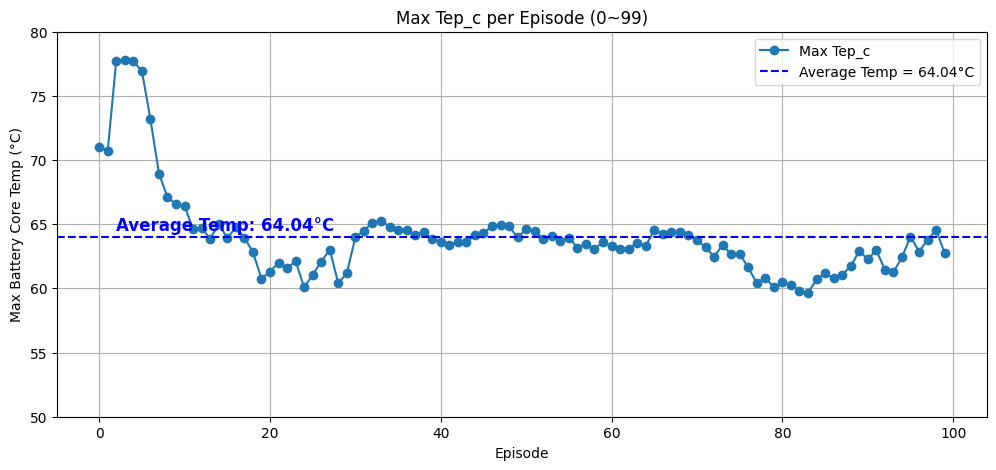

In [48]:
import numpy as np
import scipy.io as scio
import matplotlib.pyplot as plt
import os

# episode data 폴더
base_dir = "/root/Reinforcement/Project/test8_SAC_CS_Beta/MixTrain_w100_LR1e-03_v1/episode_data"

max_temps = []  # 저장할 리스트

# 0~99 episode
for ep in range(100):
    path = f"{base_dir}/data_ep{ep}.mat"
    
    if not os.path.exists(path):
        max_temps.append(np.nan)
        continue

    data = scio.loadmat(path)

    if 'tep_c' not in data:
        max_temps.append(np.nan)
        continue

    Tep_c = np.array(data['tep_c']).flatten()
    max_temps.append(Tep_c.max())

max_temps = np.array(max_temps)

# 🔹 평균 최고 온도 계산
avg_temp = np.nanmean(max_temps)

# 그래프 시각화
plt.figure(figsize=(12,5))
plt.plot(range(100), max_temps, marker='o', label="Max Tep_c")

# 🔹 평균 점선 (파란색)
plt.axhline(y=avg_temp, linestyle='--', linewidth=1.5, color='blue',
            label=f"Average Temp = {avg_temp:.2f}°C")

# 🔹 텍스트 표시 (파란색)
plt.text(2, avg_temp + 0.5,
         f"Average Temp: {avg_temp:.2f}°C",
         color='blue', fontsize=12, weight='bold')

plt.title("Max Tep_c per Episode (0~99)")
plt.xlabel("Episode")
plt.ylabel("Max Battery Core Temp (°C)")
plt.ylim(50, 80)
plt.grid(True)
plt.legend()
plt.show()


# 4. 논문 재현_재평가 (tep_c 로그 저장 추가)  / test8_SAC_CS_Beta

In [1]:
import sys
import warnings
from common.runner import Runner
from common.arguments import get_args
from common.env import make_env
from common.evaluate import Evaluator
from common.utils import Logger

warnings.filterwarnings("ignore")

if __name__ == '__main__':
    args = get_args()
    args.save_dir = args.save_dir + "_" + args.DRL + "_" + args.MODE + "_" + args.policy
    args.log_dir = args.log_dir + "_" + args.DRL + "_" + args.MODE + "_" + args.policy
    args.eva_dir = args.eva_dir + "_" + args.DRL + "_" + args.MODE + "_" + args.policy
    env, args = make_env(args)
    if args.evaluate:
        args.scenario_name = args.load_dir+'/'+args.load_scenario_name+'_%d'%args.load_episode
        sys.stdout = Logger(filepath=args.eva_dir+"/"+args.scenario_name+"/", filename='evaluate_log.log')
        print('max_episodes: ', args.evaluate_episode)
    else:
        args.scenario_name = args.scenario_name + "_w%d"%args.w_soc + "_LR%.0e"%args.lr_critic + '_' + args.file_v
        sys.stdout = Logger(filepath=args.save_dir+"/"+args.scenario_name+"/", filename='train_log.log')
        print('\nweight coefficient: w_soc = %.1f' % args.w_soc)
        print('max_episodes: ', args.max_episodes)
    print('cycle name: ', args.scenario_name)
    print('episode_steps: ', args.episode_steps)
    print('abs_spd_MAX: %.3f m/s' % args.abs_spd_MAX)
    print('abs_acc_MAX: %.3f m/s2' % args.abs_acc_MAX)
    print("DRL method: ", args.DRL)
    print('obs_dim: ', args.obs_dim)
    print('action_dim: ', args.action_dim)
    print('critic initial learning rate: %.0e' % args.lr_critic)
    print('actor initial learning rate: %.0e'%args.lr_actor)
    if args.DRL == 'SAC':
        print('alpha initial learning rate: %.0e'%args.lr_alpha)
    print('initial SOC: ', args.soc0)
    print('SOC-MODE: ', args.MODE)

    if args.evaluate:
        print("\n-----Start evaluating!-----")
        evaluator = Evaluator(args, env)
        evaluator.evaluate()
        print("-----Evaluating is finished!-----")
        print('-----Data saved in: <%s>-----'%(args.eva_dir+"/"+args.scenario_name))
    else:
        print("\n-----Start training-----")
        runner = Runner(args, env)
        runner.set_seed()
        if args.DRL == 'SAC':
            runner.run_SAC()
        elif args.DRL == 'DDPG':
            runner.run_DDPG()
        else:
            print("\n[ERROR]: No such DRL method in this program! Exit Now!\n")
        runner.memory_info()
        print("-----Training is finished!-----")
        print('-----Data saved in: <%s>-----'%(args.save_dir+"/"+args.scenario_name))

2025-11-29 07:30:48.115918: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-11-29 07:30:48.115962: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-11-29 07:30:48.116001: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-11-29 07:30:48.124743: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-29 07:30:48.930976: W tensorflow/compiler/

max_episodes:  5
cycle name:  /root/Reinforcement/Project/test8_SAC_CS_Beta/MixTrain_w100_LR1e-03_v1_86
episode_steps:  2174
abs_spd_MAX: 26.772 m/s
abs_acc_MAX: 3.237 m/s2
DRL method:  SAC
obs_dim:  7
action_dim:  1
critic initial learning rate: 1e-03
actor initial learning rate: 1e-04
alpha initial learning rate: 1e-04
initial SOC:  0.5
SOC-MODE:  CS

-----Start evaluating!-----


  0%|          | 0/5 [00:00<?, ?it/s]


---Beta policy is employed.---

actor device:  cuda:0
critic device:  cuda:0
Agent successfully loaded actor_network: /root/Reinforcement/Project/test8_SAC_CS_Beta/MixTrain_w100_LR1e-03_v1/net_params/actor_params_ep86.pkl
Agent successfully loaded critic_network: /root/Reinforcement/Project/test8_SAC_CS_Beta/MixTrain_w100_LR1e-03_v1/net_params/critic_params_ep86.pkl
Agent successfully loaded alpha_network: /root/Reinforcement/Project/test8_SAC_CS_Beta/MixTrain_w100_LR1e-03_v1/net_params/alpha_params_ep86.pkl


 20%|██        | 1/5 [00:03<00:12,  3.03s/it]


epi 0: travel 21.822km, SOC 0.1254, Bat-SOH 0.999681, FCS-SOH 0.999540, Max Tep_c 45.31
epi 0: h2_100km 5875.27g, money_100km ￥938.96
episode 0: reward -19.100, time spent: 3.028s


 40%|████      | 2/5 [00:05<00:08,  2.93s/it]


epi 1: travel 21.822km, SOC 0.1299, Bat-SOH 0.999676, FCS-SOH 0.999538, Max Tep_c 45.72
epi 1: h2_100km 5916.85g, money_100km ￥945.13
episode 1: reward -19.269, time spent: 2.851s


 60%|██████    | 3/5 [00:08<00:05,  2.87s/it]


epi 2: travel 21.822km, SOC 0.1408, Bat-SOH 0.999682, FCS-SOH 0.999546, Max Tep_c 45.52
epi 2: h2_100km 5930.55g, money_100km ￥933.42
episode 2: reward -19.025, time spent: 2.806s


 80%|████████  | 4/5 [00:11<00:02,  2.85s/it]


epi 3: travel 21.822km, SOC 0.1415, Bat-SOH 0.999693, FCS-SOH 0.999545, Max Tep_c 45.63
epi 3: h2_100km 5939.71g, money_100km ￥929.13
episode 3: reward -19.202, time spent: 2.820s


100%|██████████| 5/5 [00:14<00:00,  2.87s/it]



epi 4: travel 21.822km, SOC 0.1355, Bat-SOH 0.999679, FCS-SOH 0.999543, Max Tep_c 45.62
epi 4: h2_100km 5930.19g, money_100km ￥937.03
episode 4: reward -18.832, time spent: 2.814s
-----Evaluating is finished!-----
-----Data saved in: <./eva_SAC_CS_Beta//root/Reinforcement/Project/test8_SAC_CS_Beta/MixTrain_w100_LR1e-03_v1_86>-----
----- Comparison Results (Average over 5 episodes) -----
Metrics                 | No Penalty (test8) | With Penalty (test9)
-------------------------------------------------------------
Max Core Temp (°C)      | 45.56               | 41.12
Total Reward            | -41492.05             | -34017.80
Eq H2 Consump (g/100km) | 5918.51             | 6258.78
-------------------------------------------------------------
Graphs generated successfully.

[Analysis]
Time spent over 58°C:
  - No Penalty: 0.00%
  - With Penalty: 0.00%
True
True
Error reading /root/Reinforcement/Project/eva_SAC_CS_Beta/root/Reinforcement/Project/test8_SAC_CS_Beta/MixTrain_w100_LR1e-03_v

# ====================================================================================================

# 5. 코드 개선_학습 (reward 설계 개선, 배터리 코어 온도 >60 도 기준) / test9_SAC_CS_Beta

In [1]:
import sys
import warnings
from common.runner import Runner
from common.arguments import get_args
from common.env import make_env
from common.evaluate import Evaluator
from common.utils import Logger

warnings.filterwarnings("ignore")

if __name__ == '__main__':
    args = get_args()
    args.save_dir = args.save_dir + "_" + args.DRL + "_" + args.MODE + "_" + args.policy
    args.log_dir = args.log_dir + "_" + args.DRL + "_" + args.MODE + "_" + args.policy
    args.eva_dir = args.eva_dir + "_" + args.DRL + "_" + args.MODE + "_" + args.policy
    env, args = make_env(args)
    if args.evaluate:
        args.scenario_name = args.load_dir+'/'+args.load_scenario_name+'_%d'%args.load_episode
        sys.stdout = Logger(filepath=args.eva_dir+"/"+args.scenario_name+"/", filename='evaluate_log.log')
        print('max_episodes: ', args.evaluate_episode)
    else:
        args.scenario_name = args.scenario_name + "_w%d"%args.w_soc + "_LR%.0e"%args.lr_critic + '_' + args.file_v
        sys.stdout = Logger(filepath=args.save_dir+"/"+args.scenario_name+"/", filename='train_log.log')
        print('\nweight coefficient: w_soc = %.1f' % args.w_soc)
        print('max_episodes: ', args.max_episodes)
    print('cycle name: ', args.scenario_name)
    print('episode_steps: ', args.episode_steps)
    print('abs_spd_MAX: %.3f m/s' % args.abs_spd_MAX)
    print('abs_acc_MAX: %.3f m/s2' % args.abs_acc_MAX)
    print("DRL method: ", args.DRL)
    print('obs_dim: ', args.obs_dim)
    print('action_dim: ', args.action_dim)
    print('critic initial learning rate: %.0e' % args.lr_critic)
    print('actor initial learning rate: %.0e'%args.lr_actor)
    if args.DRL == 'SAC':
        print('alpha initial learning rate: %.0e'%args.lr_alpha)
    print('initial SOC: ', args.soc0)
    print('SOC-MODE: ', args.MODE)

    if args.evaluate:
        print("\n-----Start evaluating!-----")
        evaluator = Evaluator(args, env)
        evaluator.evaluate()
        print("-----Evaluating is finished!-----")
        print('-----Data saved in: <%s>-----'%(args.eva_dir+"/"+args.scenario_name))
    else:
        print("\n-----Start training-----")
        runner = Runner(args, env)
        runner.set_seed()
        if args.DRL == 'SAC':
            runner.run_SAC()
        elif args.DRL == 'DDPG':
            runner.run_DDPG()
        else:
            print("\n[ERROR]: No such DRL method in this program! Exit Now!\n")
        runner.memory_info()
        print("-----Training is finished!-----")
        print('-----Data saved in: <%s>-----'%(args.save_dir+"/"+args.scenario_name))

2025-11-28 10:01:35.113061: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-11-28 10:01:35.113114: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-11-28 10:01:35.113167: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-11-28 10:01:35.121841: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-28 10:01:35.928232: W tensorflow/compiler/


weight coefficient: w_soc = 100.0
max_episodes:  400
cycle name:  MixTrain_w100_LR1e-03_v1
episode_steps:  3440
abs_spd_MAX: 31.667 m/s
abs_acc_MAX: 1.944 m/s2
DRL method:  SAC
obs_dim:  7
action_dim:  1
critic initial learning rate: 1e-03
actor initial learning rate: 1e-04
alpha initial learning rate: 1e-04
initial SOC:  0.5
SOC-MODE:  CS

-----Start training-----


  0%|          | 0/400 [00:00<?, ?it/s]


---Beta policy is employed.---

actor device:  cuda:0
critic device:  cuda:0
Random seeds have been set to 80 !


failure in step 2509 of episode 0


  0%|          | 1/400 [00:52<5:50:38, 52.73s/it]


epi 0: travel 39.438km, SOC -0.7822, FCS-SOH 0.999565, Bat-SOH 0.999005
epi 0: H2_100km 1898.5g, eq_H2_100km 5514.9g, money_100km ￥687.46
epi 0: ep_r -916.386, c-loss1 405282.1771, c-loss2 420866.1103, a-loss 349.0045, en-loss -0.0561
epi 0: lr_critic 0.000050, lr_actor 0.000050, lr_alpha 0.000050

failure in step 1940 of episode 1


  0%|          | 2/400 [01:57<6:35:08, 59.57s/it]


epi 1: travel 39.438km, SOC 1.2024, FCS-SOH 0.999558, Bat-SOH 0.999274
epi 1: H2_100km 5991.4g, eq_H2_100km 7814.4g, money_100km ￥849.82
epi 1: ep_r -139.630, c-loss1 1328094.6168, c-loss2 1512889.0187, a-loss 4019.9712, en-loss -1.3544
epi 1: lr_critic 0.000074, lr_actor 0.000051, lr_alpha 0.000051

failure in step 445 of episode 2


  1%|          | 3/400 [03:01<6:48:03, 61.67s/it]


epi 2: travel 39.438km, SOC 2.0138, FCS-SOH 0.999928, Bat-SOH 0.999328
epi 2: H2_100km 7968.8g, eq_H2_100km 9484.9g, money_100km ￥663.54
epi 2: ep_r -1367.104, c-loss1 799753.8459, c-loss2 976821.8999, a-loss 5930.3700, en-loss -3.8626
epi 2: lr_critic 0.000097, lr_actor 0.000052, lr_alpha 0.000052


  1%|          | 4/400 [04:04<6:52:08, 62.45s/it]


epi 3: travel 39.438km, SOC 0.5027, FCS-SOH 0.998778, Bat-SOH 0.999260
epi 3: H2_100km 4375.9g, eq_H2_100km 6623.0g, money_100km ￥1357.89
epi 3: ep_r -20.057, c-loss1 572709.5645, c-loss2 1306426.8046, a-loss 13232.1226, en-loss -1.7704
epi 3: lr_critic 0.000121, lr_actor 0.000054, lr_alpha 0.000054


  1%|▏         | 5/400 [05:08<6:54:29, 62.96s/it]


epi 4: travel 39.438km, SOC 0.4601, FCS-SOH 0.998901, Bat-SOH 0.999200
epi 4: H2_100km 4274.8g, eq_H2_100km 6564.3g, money_100km ￥1274.22
epi 4: ep_r -19.199, c-loss1 359965.8954, c-loss2 1523795.7314, a-loss 19158.4238, en-loss -2.3955
epi 4: lr_critic 0.000145, lr_actor 0.000055, lr_alpha 0.000055

failure in step 2778 of episode 5


  2%|▏         | 6/400 [06:13<6:57:18, 63.55s/it]


epi 5: travel 39.438km, SOC 0.4065, FCS-SOH 0.999290, Bat-SOH 0.999060
epi 5: H2_100km 4117.7g, eq_H2_100km 6469.4g, money_100km ￥1005.25
epi 5: ep_r -41.269, c-loss1 212964.3219, c-loss2 1657668.8087, a-loss 21581.6777, en-loss -2.9707
epi 5: lr_critic 0.000169, lr_actor 0.000056, lr_alpha 0.000056

failure in step 2736 of episode 6


  2%|▏         | 7/400 [07:17<6:58:06, 63.83s/it]


epi 6: travel 39.438km, SOC 0.4526, FCS-SOH 0.999508, Bat-SOH 0.998916
epi 6: H2_100km 4267.3g, eq_H2_100km 6606.0g, money_100km ￥883.93
epi 6: ep_r -64.580, c-loss1 109082.0635, c-loss2 1689592.8308, a-loss 22300.4457, en-loss -3.6121
epi 6: lr_critic 0.000192, lr_actor 0.000058, lr_alpha 0.000058

failure in step 3318 of episode 7


  2%|▏         | 8/400 [08:21<6:57:15, 63.87s/it]


epi 7: travel 39.438km, SOC 0.5137, FCS-SOH 0.999569, Bat-SOH 0.998820
epi 7: H2_100km 4461.4g, eq_H2_100km 6806.7g, money_100km ￥872.73
epi 7: ep_r -48.180, c-loss1 64247.5238, c-loss2 977056.8432, a-loss 23183.1462, en-loss -3.7740
epi 7: lr_critic 0.000216, lr_actor 0.000059, lr_alpha 0.000059

failure in step 2700 of episode 8


  2%|▏         | 9/400 [09:26<6:57:10, 64.02s/it]


epi 8: travel 39.438km, SOC 0.4075, FCS-SOH 0.999677, Bat-SOH 0.998629
epi 8: H2_100km 4287.4g, eq_H2_100km 6736.5g, money_100km ￥829.13
epi 8: ep_r -160.039, c-loss1 46935.4770, c-loss2 196476.7309, a-loss 23939.7040, en-loss -2.2003
epi 8: lr_critic 0.000240, lr_actor 0.000060, lr_alpha 0.000060

failure in step 3106 of episode 9


  2%|▎         | 10/400 [10:30<6:56:46, 64.12s/it]


epi 9: travel 39.438km, SOC 0.3682, FCS-SOH 0.999343, Bat-SOH 0.999155
epi 9: H2_100km 4002.1g, eq_H2_100km 6550.9g, money_100km ￥934.24
epi 9: ep_r -82.608, c-loss1 45396.9140, c-loss2 96307.6989, a-loss 24465.9051, en-loss 0.6197
epi 9: lr_critic 0.000264, lr_actor 0.000061, lr_alpha 0.000061

failure in step 3161 of episode 10


  3%|▎         | 11/400 [11:34<6:55:45, 64.13s/it]


epi 10: travel 39.438km, SOC 0.3725, FCS-SOH 0.999334, Bat-SOH 0.999189
epi 10: H2_100km 4016.5g, eq_H2_100km 6545.5g, money_100km ￥933.02
epi 10: ep_r -74.216, c-loss1 45337.4530, c-loss2 60874.0139, a-loss 24279.4268, en-loss 0.6586
epi 10: lr_critic 0.000287, lr_actor 0.000063, lr_alpha 0.000063


  3%|▎         | 12/400 [12:39<6:55:39, 64.28s/it]


epi 11: travel 39.438km, SOC 0.4271, FCS-SOH 0.999313, Bat-SOH 0.999081
epi 11: H2_100km 4167.0g, eq_H2_100km 6584.0g, money_100km ￥985.08
epi 11: ep_r -38.625, c-loss1 46890.3306, c-loss2 56310.1243, a-loss 23883.2058, en-loss 0.6995
epi 11: lr_critic 0.000311, lr_actor 0.000064, lr_alpha 0.000064


  3%|▎         | 13/400 [13:44<6:55:28, 64.42s/it]


epi 12: travel 39.438km, SOC 0.5243, FCS-SOH 0.999312, Bat-SOH 0.999107
epi 12: H2_100km 4355.6g, eq_H2_100km 6734.6g, money_100km ￥989.59
epi 12: ep_r -35.954, c-loss1 55846.3020, c-loss2 62871.7447, a-loss 22688.0832, en-loss 0.4440
epi 12: lr_critic 0.000335, lr_actor 0.000065, lr_alpha 0.000065


  4%|▎         | 14/400 [14:48<6:55:21, 64.56s/it]


epi 13: travel 39.438km, SOC 0.5027, FCS-SOH 0.999446, Bat-SOH 0.999062
epi 13: H2_100km 4356.1g, eq_H2_100km 6650.7g, money_100km ￥898.50
epi 13: ep_r -23.604, c-loss1 66917.1096, c-loss2 71826.0926, a-loss 20834.9622, en-loss -0.0523
epi 13: lr_critic 0.000359, lr_actor 0.000066, lr_alpha 0.000066

failure in step 2786 of episode 14


  4%|▍         | 15/400 [15:54<6:55:55, 64.82s/it]


epi 14: travel 39.438km, SOC 0.4846, FCS-SOH 0.999723, Bat-SOH 0.998926
epi 14: H2_100km 4323.9g, eq_H2_100km 6662.6g, money_100km ￥721.16
epi 14: ep_r -52.466, c-loss1 56793.1261, c-loss2 58863.1223, a-loss 14158.6848, en-loss -0.6523
epi 14: lr_critic 0.000383, lr_actor 0.000068, lr_alpha 0.000068

failure in step 2766 of episode 15


  4%|▍         | 16/400 [16:58<6:53:16, 64.57s/it]


epi 15: travel 39.438km, SOC 0.4860, FCS-SOH 0.999628, Bat-SOH 0.998937
epi 15: H2_100km 4341.6g, eq_H2_100km 6667.4g, money_100km ￥791.27
epi 15: ep_r -54.317, c-loss1 55046.8973, c-loss2 55273.0014, a-loss 11237.7567, en-loss -0.8667
epi 15: lr_critic 0.000406, lr_actor 0.000069, lr_alpha 0.000069

failure in step 2737 of episode 16


  4%|▍         | 17/400 [18:03<6:52:53, 64.68s/it]


epi 16: travel 39.438km, SOC 0.4845, FCS-SOH 0.999571, Bat-SOH 0.999029
epi 16: H2_100km 4341.0g, eq_H2_100km 6654.1g, money_100km ￥811.55
epi 16: ep_r -56.827, c-loss1 60222.8397, c-loss2 60593.5540, a-loss 10807.4889, en-loss -0.8355
epi 16: lr_critic 0.000430, lr_actor 0.000070, lr_alpha 0.000070

failure in step 2737 of episode 17


  4%|▍         | 18/400 [19:08<6:52:14, 64.75s/it]


epi 17: travel 39.438km, SOC 0.4760, FCS-SOH 0.999540, Bat-SOH 0.999078
epi 17: H2_100km 4325.5g, eq_H2_100km 6619.4g, money_100km ￥821.88
epi 17: ep_r -51.784, c-loss1 66114.9851, c-loss2 67036.0433, a-loss 10555.1519, en-loss -0.7697
epi 17: lr_critic 0.000454, lr_actor 0.000071, lr_alpha 0.000071

failure in step 2768 of episode 18


  5%|▍         | 19/400 [20:13<6:52:19, 64.93s/it]


epi 18: travel 39.438km, SOC 0.4713, FCS-SOH 0.999500, Bat-SOH 0.999061
epi 18: H2_100km 4319.6g, eq_H2_100km 6573.2g, money_100km ￥856.12
epi 18: ep_r -39.704, c-loss1 72736.5339, c-loss2 74156.9337, a-loss 10331.0041, en-loss -0.6176
epi 18: lr_critic 0.000478, lr_actor 0.000073, lr_alpha 0.000073


  5%|▌         | 20/400 [21:18<6:51:45, 65.02s/it]


epi 19: travel 39.438km, SOC 0.5037, FCS-SOH 0.999455, Bat-SOH 0.999123
epi 19: H2_100km 4378.4g, eq_H2_100km 6609.9g, money_100km ￥877.44
epi 19: ep_r -34.485, c-loss1 73498.1432, c-loss2 74941.9599, a-loss 10226.8772, en-loss -0.3863
epi 19: lr_critic 0.000501, lr_actor 0.000074, lr_alpha 0.000074


  5%|▌         | 21/400 [22:23<6:50:25, 64.98s/it]


epi 20: travel 39.438km, SOC 0.5586, FCS-SOH 0.999394, Bat-SOH 0.999147
epi 20: H2_100km 4442.6g, eq_H2_100km 6688.0g, money_100km ￥921.98
epi 20: ep_r -18.447, c-loss1 68075.2901, c-loss2 68796.0250, a-loss 9863.6128, en-loss -0.2131
epi 20: lr_critic 0.000525, lr_actor 0.000075, lr_alpha 0.000075


  6%|▌         | 22/400 [23:27<6:48:10, 64.79s/it]


epi 21: travel 39.438km, SOC 0.5669, FCS-SOH 0.999352, Bat-SOH 0.999216
epi 21: H2_100km 4442.2g, eq_H2_100km 6712.8g, money_100km ￥936.06
epi 21: ep_r -20.738, c-loss1 58551.2324, c-loss2 57961.7685, a-loss 9220.1133, en-loss -0.0938
epi 21: lr_critic 0.000549, lr_actor 0.000076, lr_alpha 0.000076


  6%|▌         | 23/400 [24:32<6:46:08, 64.64s/it]


epi 22: travel 39.438km, SOC 0.5671, FCS-SOH 0.999377, Bat-SOH 0.999199
epi 22: H2_100km 4462.1g, eq_H2_100km 6730.3g, money_100km ￥922.53
epi 22: ep_r -20.194, c-loss1 58057.3196, c-loss2 57530.3099, a-loss 8800.6570, en-loss -0.0483
epi 22: lr_critic 0.000572, lr_actor 0.000077, lr_alpha 0.000077


  6%|▌         | 24/400 [25:37<6:45:42, 64.74s/it]


epi 23: travel 39.438km, SOC 0.5784, FCS-SOH 0.999333, Bat-SOH 0.999211
epi 23: H2_100km 4463.0g, eq_H2_100km 6745.5g, money_100km ￥952.46
epi 23: ep_r -21.553, c-loss1 64947.7578, c-loss2 64618.7862, a-loss 8491.9472, en-loss -0.0160
epi 23: lr_critic 0.000596, lr_actor 0.000079, lr_alpha 0.000079


  6%|▋         | 25/400 [26:42<6:44:53, 64.78s/it]


epi 24: travel 39.438km, SOC 0.5683, FCS-SOH 0.999358, Bat-SOH 0.999178
epi 24: H2_100km 4461.7g, eq_H2_100km 6772.1g, money_100km ￥942.38
epi 24: ep_r -21.217, c-loss1 70188.3398, c-loss2 70046.2038, a-loss 8202.8079, en-loss -0.0322
epi 24: lr_critic 0.000620, lr_actor 0.000080, lr_alpha 0.000080


  6%|▋         | 26/400 [27:46<6:43:26, 64.72s/it]


epi 25: travel 39.438km, SOC 0.5600, FCS-SOH 0.999408, Bat-SOH 0.999109
epi 25: H2_100km 4463.6g, eq_H2_100km 6738.5g, money_100km ￥921.55
epi 25: ep_r -20.240, c-loss1 76800.9400, c-loss2 76294.9122, a-loss 7983.9407, en-loss 0.0013
epi 25: lr_critic 0.000644, lr_actor 0.000081, lr_alpha 0.000081


  7%|▋         | 27/400 [28:52<6:43:56, 64.98s/it]


epi 26: travel 39.438km, SOC 0.5501, FCS-SOH 0.999423, Bat-SOH 0.999167
epi 26: H2_100km 4451.0g, eq_H2_100km 6726.4g, money_100km ￥895.01
epi 26: ep_r -19.794, c-loss1 75239.8342, c-loss2 74849.0851, a-loss 7694.5224, en-loss 0.1199
epi 26: lr_critic 0.000667, lr_actor 0.000082, lr_alpha 0.000082


  7%|▋         | 28/400 [29:56<6:41:39, 64.78s/it]


epi 27: travel 39.438km, SOC 0.5496, FCS-SOH 0.999384, Bat-SOH 0.999131
epi 27: H2_100km 4439.7g, eq_H2_100km 6731.7g, money_100km ￥933.23
epi 27: ep_r -19.882, c-loss1 69417.6806, c-loss2 69576.8519, a-loss 7383.1321, en-loss 0.2562
epi 27: lr_critic 0.000691, lr_actor 0.000084, lr_alpha 0.000084


  7%|▋         | 29/400 [31:01<6:40:49, 64.82s/it]


epi 28: travel 39.438km, SOC 0.5471, FCS-SOH 0.999394, Bat-SOH 0.999147
epi 28: H2_100km 4442.7g, eq_H2_100km 6715.3g, money_100km ￥921.66
epi 28: ep_r -19.052, c-loss1 57726.5364, c-loss2 57986.7784, a-loss 6959.8619, en-loss 0.2981
epi 28: lr_critic 0.000715, lr_actor 0.000085, lr_alpha 0.000085


  8%|▊         | 30/400 [32:06<6:39:26, 64.77s/it]


epi 29: travel 39.438km, SOC 0.5563, FCS-SOH 0.999407, Bat-SOH 0.999165
epi 29: H2_100km 4463.6g, eq_H2_100km 6761.7g, money_100km ￥908.69
epi 29: ep_r -20.084, c-loss1 43053.9297, c-loss2 43058.0003, a-loss 6488.7524, en-loss 0.3101
epi 29: lr_critic 0.000739, lr_actor 0.000086, lr_alpha 0.000086


  8%|▊         | 31/400 [33:12<6:40:29, 65.12s/it]


epi 30: travel 39.438km, SOC 0.5666, FCS-SOH 0.999422, Bat-SOH 0.999161
epi 30: H2_100km 4483.1g, eq_H2_100km 6747.6g, money_100km ￥899.04
epi 30: ep_r -19.656, c-loss1 24740.2664, c-loss2 24796.2759, a-loss 5983.3371, en-loss 0.2956
epi 30: lr_critic 0.000763, lr_actor 0.000088, lr_alpha 0.000088


  8%|▊         | 32/400 [34:17<6:39:01, 65.06s/it]


epi 31: travel 39.438km, SOC 0.5626, FCS-SOH 0.999456, Bat-SOH 0.999104
epi 31: H2_100km 4500.9g, eq_H2_100km 6774.1g, money_100km ￥888.24
epi 31: ep_r -18.532, c-loss1 13448.3059, c-loss2 13464.2114, a-loss 5568.2732, en-loss 0.2338
epi 31: lr_critic 0.000786, lr_actor 0.000089, lr_alpha 0.000089


  8%|▊         | 33/400 [35:22<6:38:21, 65.13s/it]


epi 32: travel 39.438km, SOC 0.5697, FCS-SOH 0.999441, Bat-SOH 0.999123
epi 32: H2_100km 4501.0g, eq_H2_100km 6787.6g, money_100km ￥895.58
epi 32: ep_r -19.164, c-loss1 9498.1494, c-loss2 9552.9508, a-loss 5266.5715, en-loss 0.1958
epi 32: lr_critic 0.000810, lr_actor 0.000090, lr_alpha 0.000090


  8%|▊         | 34/400 [36:27<6:37:35, 65.18s/it]


epi 33: travel 39.438km, SOC 0.5831, FCS-SOH 0.999413, Bat-SOH 0.999152
epi 33: H2_100km 4514.8g, eq_H2_100km 6826.1g, money_100km ￥909.48
epi 33: ep_r -22.453, c-loss1 9590.3958, c-loss2 9516.3341, a-loss 5045.7645, en-loss 0.1189
epi 33: lr_critic 0.000834, lr_actor 0.000091, lr_alpha 0.000091


  9%|▉         | 35/400 [37:32<6:36:26, 65.17s/it]


epi 34: travel 39.438km, SOC 0.5784, FCS-SOH 0.999440, Bat-SOH 0.999174
epi 34: H2_100km 4519.5g, eq_H2_100km 6813.4g, money_100km ￥883.77
epi 34: ep_r -20.808, c-loss1 9709.5641, c-loss2 9435.3527, a-loss 4858.3422, en-loss 0.0455
epi 34: lr_critic 0.000858, lr_actor 0.000093, lr_alpha 0.000093


  9%|▉         | 36/400 [38:36<6:33:14, 64.82s/it]


epi 35: travel 39.438km, SOC 0.5639, FCS-SOH 0.999474, Bat-SOH 0.999066
epi 35: H2_100km 4495.6g, eq_H2_100km 6812.2g, money_100km ￥884.01
epi 35: ep_r -26.083, c-loss1 9512.8662, c-loss2 9180.1429, a-loss 4672.0136, en-loss 0.0731
epi 35: lr_critic 0.000881, lr_actor 0.000094, lr_alpha 0.000094


  9%|▉         | 37/400 [39:42<6:33:02, 64.97s/it]


epi 36: travel 39.438km, SOC 0.5478, FCS-SOH 0.999502, Bat-SOH 0.999114
epi 36: H2_100km 4470.0g, eq_H2_100km 6770.5g, money_100km ￥849.64
epi 36: ep_r -18.729, c-loss1 9759.2203, c-loss2 9386.1290, a-loss 4540.8947, en-loss -0.0288
epi 36: lr_critic 0.000905, lr_actor 0.000095, lr_alpha 0.000095


 10%|▉         | 38/400 [40:46<6:30:51, 64.78s/it]


epi 37: travel 39.438km, SOC 0.5408, FCS-SOH 0.999511, Bat-SOH 0.999088
epi 37: H2_100km 4460.9g, eq_H2_100km 6764.9g, money_100km ￥848.55
epi 37: ep_r -20.692, c-loss1 9937.9932, c-loss2 9695.7679, a-loss 4415.5180, en-loss -0.0416
epi 37: lr_critic 0.000929, lr_actor 0.000096, lr_alpha 0.000096


 10%|▉         | 39/400 [41:51<6:30:00, 64.82s/it]


epi 38: travel 39.438km, SOC 0.5336, FCS-SOH 0.999514, Bat-SOH 0.999017
epi 38: H2_100km 4452.7g, eq_H2_100km 6746.0g, money_100km ￥863.90
epi 38: ep_r -18.423, c-loss1 9474.2786, c-loss2 9302.8671, a-loss 4321.3833, en-loss -0.1011
epi 38: lr_critic 0.000953, lr_actor 0.000098, lr_alpha 0.000098


 10%|█         | 40/400 [42:56<6:29:18, 64.88s/it]


epi 39: travel 39.438km, SOC 0.5325, FCS-SOH 0.999498, Bat-SOH 0.999029
epi 39: H2_100km 4439.8g, eq_H2_100km 6705.8g, money_100km ￥871.82
epi 39: ep_r -17.010, c-loss1 8522.1824, c-loss2 8359.7915, a-loss 4222.8436, en-loss -0.0548
epi 39: lr_critic 0.000976, lr_actor 0.000099, lr_alpha 0.000099


 10%|█         | 41/400 [44:01<6:27:57, 64.84s/it]


epi 40: travel 39.438km, SOC 0.5265, FCS-SOH 0.999491, Bat-SOH 0.999066
epi 40: H2_100km 4426.5g, eq_H2_100km 6700.5g, money_100km ￥867.68
epi 40: ep_r -17.813, c-loss1 7493.7354, c-loss2 7416.4617, a-loss 4135.2124, en-loss -0.0292
epi 40: lr_critic 0.001000, lr_actor 0.000100, lr_alpha 0.000100


 10%|█         | 42/400 [45:06<6:28:14, 65.07s/it]


epi 41: travel 39.438km, SOC 0.5298, FCS-SOH 0.999508, Bat-SOH 0.999056
epi 41: H2_100km 4428.6g, eq_H2_100km 6695.7g, money_100km ￥857.04
epi 41: ep_r -18.109, c-loss1 6670.1478, c-loss2 6654.1335, a-loss 4051.1318, en-loss -0.0326
epi 41: lr_critic 0.000976, lr_actor 0.000099, lr_alpha 0.000099


 11%|█         | 43/400 [46:11<6:26:31, 64.96s/it]


epi 42: travel 39.438km, SOC 0.5292, FCS-SOH 0.999506, Bat-SOH 0.999051
epi 42: H2_100km 4430.3g, eq_H2_100km 6681.2g, money_100km ￥859.96
epi 42: ep_r -19.379, c-loss1 6037.0052, c-loss2 6031.6459, a-loss 3993.0951, en-loss -0.0053
epi 42: lr_critic 0.000953, lr_actor 0.000098, lr_alpha 0.000098


 11%|█         | 44/400 [47:16<6:25:39, 65.00s/it]


epi 43: travel 39.438km, SOC 0.5338, FCS-SOH 0.999494, Bat-SOH 0.999005
epi 43: H2_100km 4445.4g, eq_H2_100km 6707.3g, money_100km ￥881.85
epi 43: ep_r -18.681, c-loss1 5265.2444, c-loss2 5319.2971, a-loss 3933.0623, en-loss -0.0144
epi 43: lr_critic 0.000929, lr_actor 0.000096, lr_alpha 0.000096


 11%|█▏        | 45/400 [48:21<6:25:18, 65.12s/it]


epi 44: travel 39.438km, SOC 0.5514, FCS-SOH 0.999510, Bat-SOH 0.999022
epi 44: H2_100km 4482.3g, eq_H2_100km 6727.9g, money_100km ￥867.35
epi 44: ep_r -17.797, c-loss1 5281.3380, c-loss2 5292.2171, a-loss 3898.1701, en-loss -0.0286
epi 44: lr_critic 0.000905, lr_actor 0.000095, lr_alpha 0.000095


 12%|█▏        | 46/400 [49:27<6:24:16, 65.13s/it]


epi 45: travel 39.438km, SOC 0.5507, FCS-SOH 0.999479, Bat-SOH 0.999018
epi 45: H2_100km 4478.2g, eq_H2_100km 6753.2g, money_100km ￥891.30
epi 45: ep_r -22.550, c-loss1 5095.4768, c-loss2 5064.9120, a-loss 3855.6996, en-loss -0.0048
epi 45: lr_critic 0.000881, lr_actor 0.000094, lr_alpha 0.000094


 12%|█▏        | 47/400 [50:31<6:22:17, 64.98s/it]


epi 46: travel 39.438km, SOC 0.5503, FCS-SOH 0.999458, Bat-SOH 0.998998
epi 46: H2_100km 4464.0g, eq_H2_100km 6740.1g, money_100km ￥911.84
epi 46: ep_r -21.242, c-loss1 4905.4208, c-loss2 4926.5137, a-loss 3851.9962, en-loss -0.0427
epi 46: lr_critic 0.000858, lr_actor 0.000093, lr_alpha 0.000093


 12%|█▏        | 48/400 [51:36<6:20:40, 64.89s/it]


epi 47: travel 39.438km, SOC 0.5525, FCS-SOH 0.999428, Bat-SOH 0.999076
epi 47: H2_100km 4460.8g, eq_H2_100km 6742.0g, money_100km ￥914.85
epi 47: ep_r -21.162, c-loss1 4595.6079, c-loss2 4512.7286, a-loss 3838.4655, en-loss 0.0093
epi 47: lr_critic 0.000834, lr_actor 0.000091, lr_alpha 0.000091


 12%|█▏        | 49/400 [52:41<6:19:28, 64.87s/it]


epi 48: travel 39.438km, SOC 0.5510, FCS-SOH 0.999420, Bat-SOH 0.999096
epi 48: H2_100km 4458.4g, eq_H2_100km 6722.6g, money_100km ￥915.37
epi 48: ep_r -18.974, c-loss1 4567.1182, c-loss2 4447.0863, a-loss 3809.9187, en-loss 0.0476
epi 48: lr_critic 0.000810, lr_actor 0.000090, lr_alpha 0.000090


 12%|█▎        | 50/400 [53:45<6:17:13, 64.67s/it]


epi 49: travel 39.438km, SOC 0.5472, FCS-SOH 0.999425, Bat-SOH 0.999096
epi 49: H2_100km 4445.5g, eq_H2_100km 6706.6g, money_100km ￥911.35
epi 49: ep_r -18.664, c-loss1 4403.0764, c-loss2 4281.9327, a-loss 3794.6476, en-loss 0.0496
epi 49: lr_critic 0.000786, lr_actor 0.000089, lr_alpha 0.000089


 13%|█▎        | 51/400 [54:50<6:17:38, 64.92s/it]


epi 50: travel 39.438km, SOC 0.5420, FCS-SOH 0.999430, Bat-SOH 0.999046
epi 50: H2_100km 4452.1g, eq_H2_100km 6717.8g, money_100km ￥920.24
epi 50: ep_r -18.158, c-loss1 4290.8370, c-loss2 4126.2277, a-loss 3764.4835, en-loss 0.0492
epi 50: lr_critic 0.000763, lr_actor 0.000088, lr_alpha 0.000088


 13%|█▎        | 52/400 [55:56<6:18:19, 65.23s/it]


epi 51: travel 39.438km, SOC 0.5295, FCS-SOH 0.999440, Bat-SOH 0.999072
epi 51: H2_100km 4429.2g, eq_H2_100km 6683.2g, money_100km ￥905.08
epi 51: ep_r -17.930, c-loss1 3995.5689, c-loss2 3839.3311, a-loss 3731.7155, en-loss 0.0548
epi 51: lr_critic 0.000739, lr_actor 0.000086, lr_alpha 0.000086


 13%|█▎        | 53/400 [57:01<6:16:44, 65.14s/it]


epi 52: travel 39.438km, SOC 0.5186, FCS-SOH 0.999498, Bat-SOH 0.999061
epi 52: H2_100km 4431.9g, eq_H2_100km 6663.3g, money_100km ￥863.75
epi 52: ep_r -15.881, c-loss1 3889.4256, c-loss2 3702.8600, a-loss 3691.5885, en-loss 0.0001
epi 52: lr_critic 0.000715, lr_actor 0.000085, lr_alpha 0.000085


 14%|█▎        | 54/400 [58:06<6:14:46, 64.99s/it]


epi 53: travel 39.438km, SOC 0.5018, FCS-SOH 0.999482, Bat-SOH 0.999053
epi 53: H2_100km 4392.5g, eq_H2_100km 6629.9g, money_100km ￥876.15
epi 53: ep_r -16.692, c-loss1 3774.1991, c-loss2 3563.0987, a-loss 3677.1441, en-loss -0.0244
epi 53: lr_critic 0.000691, lr_actor 0.000084, lr_alpha 0.000084


 14%|█▍        | 55/400 [59:11<6:13:32, 64.97s/it]


epi 54: travel 39.438km, SOC 0.4989, FCS-SOH 0.999503, Bat-SOH 0.999090
epi 54: H2_100km 4405.0g, eq_H2_100km 6624.6g, money_100km ￥851.26
epi 54: ep_r -14.922, c-loss1 3857.3586, c-loss2 3647.1718, a-loss 3651.9888, en-loss -0.0483
epi 54: lr_critic 0.000667, lr_actor 0.000082, lr_alpha 0.000082


 14%|█▍        | 56/400 [1:00:17<6:13:44, 65.19s/it]


epi 55: travel 39.438km, SOC 0.5023, FCS-SOH 0.999484, Bat-SOH 0.999151
epi 55: H2_100km 4396.9g, eq_H2_100km 6581.8g, money_100km ￥849.18
epi 55: ep_r -16.013, c-loss1 3964.4344, c-loss2 3719.0927, a-loss 3637.1534, en-loss -0.0422
epi 55: lr_critic 0.000644, lr_actor 0.000081, lr_alpha 0.000081


 14%|█▍        | 57/400 [1:01:21<6:11:49, 65.04s/it]


epi 56: travel 39.438km, SOC 0.5058, FCS-SOH 0.999474, Bat-SOH 0.999144
epi 56: H2_100km 4389.6g, eq_H2_100km 6614.7g, money_100km ￥858.64
epi 56: ep_r -16.374, c-loss1 4081.3125, c-loss2 3823.8897, a-loss 3610.9113, en-loss -0.0072
epi 56: lr_critic 0.000620, lr_actor 0.000080, lr_alpha 0.000080


 14%|█▍        | 58/400 [1:02:26<6:10:48, 65.06s/it]


epi 57: travel 39.438km, SOC 0.5043, FCS-SOH 0.999514, Bat-SOH 0.999120
epi 57: H2_100km 4403.0g, eq_H2_100km 6609.0g, money_100km ￥834.96
epi 57: ep_r -15.132, c-loss1 4310.1445, c-loss2 4004.0002, a-loss 3592.4839, en-loss -0.0159
epi 57: lr_critic 0.000596, lr_actor 0.000079, lr_alpha 0.000079


 15%|█▍        | 59/400 [1:03:30<6:08:09, 64.78s/it]


epi 58: travel 39.438km, SOC 0.5284, FCS-SOH 0.999430, Bat-SOH 0.999122
epi 58: H2_100km 4410.0g, eq_H2_100km 6636.6g, money_100km ￥898.83
epi 58: ep_r -17.432, c-loss1 4018.6285, c-loss2 3759.7455, a-loss 3573.3341, en-loss 0.0326
epi 58: lr_critic 0.000572, lr_actor 0.000077, lr_alpha 0.000077


 15%|█▌        | 60/400 [1:04:35<6:06:35, 64.69s/it]


epi 59: travel 39.438km, SOC 0.5304, FCS-SOH 0.999429, Bat-SOH 0.999119
epi 59: H2_100km 4413.5g, eq_H2_100km 6628.5g, money_100km ￥900.59
epi 59: ep_r -17.531, c-loss1 4146.9487, c-loss2 3890.7079, a-loss 3535.7615, en-loss 0.0590
epi 59: lr_critic 0.000549, lr_actor 0.000076, lr_alpha 0.000076


 15%|█▌        | 61/400 [1:05:39<6:04:48, 64.57s/it]


epi 60: travel 39.438km, SOC 0.5336, FCS-SOH 0.999471, Bat-SOH 0.999136
epi 60: H2_100km 4427.5g, eq_H2_100km 6647.0g, money_100km ￥865.01
epi 60: ep_r -16.560, c-loss1 4232.7997, c-loss2 3932.2737, a-loss 3480.8017, en-loss 0.0775
epi 60: lr_critic 0.000525, lr_actor 0.000075, lr_alpha 0.000075


 16%|█▌        | 62/400 [1:06:41<5:59:41, 63.85s/it]


epi 61: travel 39.438km, SOC 0.5478, FCS-SOH 0.999426, Bat-SOH 0.999114
epi 61: H2_100km 4441.1g, eq_H2_100km 6664.2g, money_100km ￥905.78
epi 61: ep_r -19.286, c-loss1 4290.3896, c-loss2 3975.3427, a-loss 3449.7052, en-loss 0.0528
epi 61: lr_critic 0.000501, lr_actor 0.000074, lr_alpha 0.000074


 16%|█▌        | 63/400 [1:07:46<5:59:22, 63.98s/it]


epi 62: travel 39.438km, SOC 0.5493, FCS-SOH 0.999419, Bat-SOH 0.999163
epi 62: H2_100km 4449.9g, eq_H2_100km 6654.5g, money_100km ￥899.05
epi 62: ep_r -18.217, c-loss1 4513.7711, c-loss2 4235.5334, a-loss 3423.7930, en-loss 0.0461
epi 62: lr_critic 0.000478, lr_actor 0.000073, lr_alpha 0.000073


 16%|█▌        | 64/400 [1:08:51<5:59:55, 64.27s/it]


epi 63: travel 39.438km, SOC 0.5454, FCS-SOH 0.999461, Bat-SOH 0.999133
epi 63: H2_100km 4451.7g, eq_H2_100km 6671.5g, money_100km ￥874.67
epi 63: ep_r -17.370, c-loss1 4489.1549, c-loss2 4193.6169, a-loss 3387.8965, en-loss 0.0522
epi 63: lr_critic 0.000454, lr_actor 0.000071, lr_alpha 0.000071


 16%|█▋        | 65/400 [1:09:56<6:01:02, 64.67s/it]


epi 64: travel 39.438km, SOC 0.5424, FCS-SOH 0.999471, Bat-SOH 0.999192
epi 64: H2_100km 4451.5g, eq_H2_100km 6651.8g, money_100km ￥852.18
epi 64: ep_r -17.791, c-loss1 4399.3624, c-loss2 4073.2473, a-loss 3347.6860, en-loss 0.0501
epi 64: lr_critic 0.000430, lr_actor 0.000070, lr_alpha 0.000070


 16%|█▋        | 66/400 [1:11:01<6:00:12, 64.71s/it]


epi 65: travel 39.438km, SOC 0.5304, FCS-SOH 0.999444, Bat-SOH 0.999132
epi 65: H2_100km 4423.4g, eq_H2_100km 6662.2g, money_100km ￥886.43
epi 65: ep_r -18.036, c-loss1 4018.9094, c-loss2 3748.5421, a-loss 3318.7218, en-loss 0.1082
epi 65: lr_critic 0.000406, lr_actor 0.000069, lr_alpha 0.000069


 17%|█▋        | 67/400 [1:12:06<5:59:34, 64.79s/it]


epi 66: travel 39.438km, SOC 0.5178, FCS-SOH 0.999510, Bat-SOH 0.999170
epi 66: H2_100km 4418.9g, eq_H2_100km 6630.1g, money_100km ￥826.02
epi 66: ep_r -16.707, c-loss1 3883.3430, c-loss2 3605.3049, a-loss 3293.0946, en-loss 0.0726
epi 66: lr_critic 0.000383, lr_actor 0.000068, lr_alpha 0.000068


 17%|█▋        | 68/400 [1:13:12<6:00:05, 65.08s/it]


epi 67: travel 39.438km, SOC 0.5074, FCS-SOH 0.999519, Bat-SOH 0.999151
epi 67: H2_100km 4415.8g, eq_H2_100km 6601.5g, money_100km ￥824.00
epi 67: ep_r -15.755, c-loss1 3672.5757, c-loss2 3397.7087, a-loss 3252.5767, en-loss 0.0468
epi 67: lr_critic 0.000359, lr_actor 0.000066, lr_alpha 0.000066


 17%|█▋        | 69/400 [1:14:16<5:57:25, 64.79s/it]


epi 68: travel 39.438km, SOC 0.5144, FCS-SOH 0.999503, Bat-SOH 0.999154
epi 68: H2_100km 4419.3g, eq_H2_100km 6624.6g, money_100km ￥835.45
epi 68: ep_r -16.060, c-loss1 3594.7675, c-loss2 3334.5768, a-loss 3216.9785, en-loss 0.0377
epi 68: lr_critic 0.000335, lr_actor 0.000065, lr_alpha 0.000065


 18%|█▊        | 70/400 [1:15:20<5:55:28, 64.63s/it]


epi 69: travel 39.438km, SOC 0.5131, FCS-SOH 0.999511, Bat-SOH 0.999196
epi 69: H2_100km 4417.5g, eq_H2_100km 6599.6g, money_100km ￥818.53
epi 69: ep_r -16.634, c-loss1 3301.4073, c-loss2 3092.0727, a-loss 3192.9968, en-loss 0.0114
epi 69: lr_critic 0.000311, lr_actor 0.000064, lr_alpha 0.000064


 18%|█▊        | 71/400 [1:16:26<5:55:55, 64.91s/it]


epi 70: travel 39.438km, SOC 0.5131, FCS-SOH 0.999508, Bat-SOH 0.999181
epi 70: H2_100km 4414.4g, eq_H2_100km 6592.5g, money_100km ￥824.33
epi 70: ep_r -16.846, c-loss1 3231.2742, c-loss2 3025.7433, a-loss 3154.2757, en-loss 0.0017
epi 70: lr_critic 0.000287, lr_actor 0.000063, lr_alpha 0.000063


 18%|█▊        | 72/400 [1:17:30<5:54:19, 64.81s/it]


epi 71: travel 39.438km, SOC 0.5103, FCS-SOH 0.999500, Bat-SOH 0.999165
epi 71: H2_100km 4412.8g, eq_H2_100km 6596.7g, money_100km ￥834.60
epi 71: ep_r -16.661, c-loss1 3085.5218, c-loss2 2905.7807, a-loss 3139.7886, en-loss -0.0082
epi 71: lr_critic 0.000264, lr_actor 0.000061, lr_alpha 0.000061


 18%|█▊        | 73/400 [1:18:35<5:53:08, 64.80s/it]


epi 72: travel 39.438km, SOC 0.4982, FCS-SOH 0.999475, Bat-SOH 0.999141
epi 72: H2_100km 4386.0g, eq_H2_100km 6597.2g, money_100km ￥858.43
epi 72: ep_r -17.272, c-loss1 2913.2648, c-loss2 2745.2265, a-loss 3127.1967, en-loss 0.0363
epi 72: lr_critic 0.000240, lr_actor 0.000060, lr_alpha 0.000060


 18%|█▊        | 74/400 [1:19:40<5:52:57, 64.96s/it]


epi 73: travel 39.438km, SOC 0.4915, FCS-SOH 0.999529, Bat-SOH 0.999082
epi 73: H2_100km 4386.2g, eq_H2_100km 6569.2g, money_100km ￥832.37
epi 73: ep_r -14.832, c-loss1 2797.2137, c-loss2 2633.2698, a-loss 3093.8599, en-loss 0.0129
epi 73: lr_critic 0.000216, lr_actor 0.000059, lr_alpha 0.000059


 19%|█▉        | 75/400 [1:20:45<5:51:31, 64.90s/it]


epi 74: travel 39.438km, SOC 0.4956, FCS-SOH 0.999471, Bat-SOH 0.999111
epi 74: H2_100km 4375.6g, eq_H2_100km 6597.8g, money_100km ￥868.03
epi 74: ep_r -17.059, c-loss1 2796.3504, c-loss2 2629.3209, a-loss 3081.9808, en-loss -0.0174
epi 74: lr_critic 0.000192, lr_actor 0.000058, lr_alpha 0.000058


 19%|█▉        | 76/400 [1:21:48<5:47:53, 64.42s/it]


epi 75: travel 39.438km, SOC 0.5046, FCS-SOH 0.999455, Bat-SOH 0.999166
epi 75: H2_100km 4385.8g, eq_H2_100km 6605.6g, money_100km ￥866.99
epi 75: ep_r -17.194, c-loss1 2725.6314, c-loss2 2556.1954, a-loss 3073.7593, en-loss -0.0023
epi 75: lr_critic 0.000169, lr_actor 0.000056, lr_alpha 0.000056


 19%|█▉        | 77/400 [1:22:53<5:46:54, 64.44s/it]


epi 76: travel 39.438km, SOC 0.5078, FCS-SOH 0.999435, Bat-SOH 0.999126
epi 76: H2_100km 4391.5g, eq_H2_100km 6618.8g, money_100km ￥892.76
epi 76: ep_r -17.872, c-loss1 2700.0141, c-loss2 2516.7349, a-loss 3073.3097, en-loss -0.0309
epi 76: lr_critic 0.000145, lr_actor 0.000055, lr_alpha 0.000055


 20%|█▉        | 78/400 [1:23:57<5:45:40, 64.41s/it]


epi 77: travel 39.438km, SOC 0.5028, FCS-SOH 0.999420, Bat-SOH 0.999143
epi 77: H2_100km 4384.5g, eq_H2_100km 6615.3g, money_100km ￥899.42
epi 77: ep_r -17.594, c-loss1 2546.1884, c-loss2 2405.4878, a-loss 3069.4711, en-loss -0.0440
epi 77: lr_critic 0.000121, lr_actor 0.000054, lr_alpha 0.000054


 20%|█▉        | 79/400 [1:25:03<5:46:01, 64.68s/it]


epi 78: travel 39.438km, SOC 0.5017, FCS-SOH 0.999461, Bat-SOH 0.999142
epi 78: H2_100km 4383.0g, eq_H2_100km 6628.3g, money_100km ￥868.28
epi 78: ep_r -17.034, c-loss1 2452.5970, c-loss2 2304.5973, a-loss 3071.2590, en-loss -0.0458
epi 78: lr_critic 0.000097, lr_actor 0.000052, lr_alpha 0.000052


 20%|██        | 80/400 [1:26:06<5:43:38, 64.43s/it]


epi 79: travel 39.438km, SOC 0.5077, FCS-SOH 0.999448, Bat-SOH 0.999110
epi 79: H2_100km 4393.9g, eq_H2_100km 6639.5g, money_100km ￥887.10
epi 79: ep_r -17.163, c-loss1 2418.3613, c-loss2 2265.6577, a-loss 3083.0563, en-loss -0.0405
epi 79: lr_critic 0.000074, lr_actor 0.000051, lr_alpha 0.000051


 20%|██        | 81/400 [1:27:09<5:40:14, 63.99s/it]


epi 80: travel 39.438km, SOC 0.5029, FCS-SOH 0.999447, Bat-SOH 0.999133
epi 80: H2_100km 4383.9g, eq_H2_100km 6633.4g, money_100km ￥881.83
epi 80: ep_r -17.588, c-loss1 2396.1011, c-loss2 2245.9689, a-loss 3089.7310, en-loss -0.0468
epi 80: lr_critic 0.000050, lr_actor 0.000050, lr_alpha 0.000050


 20%|██        | 82/400 [1:28:14<5:40:20, 64.22s/it]


epi 81: travel 39.438km, SOC 0.4984, FCS-SOH 0.999422, Bat-SOH 0.999073
epi 81: H2_100km 4378.9g, eq_H2_100km 6636.1g, money_100km ￥915.91
epi 81: ep_r -17.550, c-loss1 2462.4246, c-loss2 2313.8434, a-loss 3105.8711, en-loss -0.0284
epi 81: lr_critic 0.000062, lr_actor 0.000051, lr_alpha 0.000051


 21%|██        | 83/400 [1:29:19<5:40:12, 64.39s/it]


epi 82: travel 39.438km, SOC 0.4930, FCS-SOH 0.999422, Bat-SOH 0.999037
epi 82: H2_100km 4371.0g, eq_H2_100km 6631.6g, money_100km ￥924.09
epi 82: ep_r -17.145, c-loss1 2517.5027, c-loss2 2370.3546, a-loss 3120.5721, en-loss -0.0524
epi 82: lr_critic 0.000074, lr_actor 0.000051, lr_alpha 0.000051


 21%|██        | 84/400 [1:30:24<5:40:10, 64.59s/it]


epi 83: travel 39.438km, SOC 0.4930, FCS-SOH 0.999439, Bat-SOH 0.999056
epi 83: H2_100km 4368.9g, eq_H2_100km 6625.2g, money_100km ￥906.50
epi 83: ep_r -17.083, c-loss1 2516.7727, c-loss2 2369.8292, a-loss 3135.4344, en-loss -0.0426
epi 83: lr_critic 0.000086, lr_actor 0.000052, lr_alpha 0.000052


 21%|██▏       | 85/400 [1:31:30<5:40:33, 64.87s/it]


epi 84: travel 39.438km, SOC 0.5051, FCS-SOH 0.999427, Bat-SOH 0.999107
epi 84: H2_100km 4367.3g, eq_H2_100km 6658.3g, money_100km ￥902.75
epi 84: ep_r -17.891, c-loss1 2567.9642, c-loss2 2432.2629, a-loss 3155.8077, en-loss -0.0162
epi 84: lr_critic 0.000097, lr_actor 0.000052, lr_alpha 0.000052


 22%|██▏       | 86/400 [1:32:34<5:39:05, 64.79s/it]


epi 85: travel 39.438km, SOC 0.4915, FCS-SOH 0.999435, Bat-SOH 0.999041
epi 85: H2_100km 4354.6g, eq_H2_100km 6629.2g, money_100km ￥912.16
epi 85: ep_r -17.743, c-loss1 2495.4165, c-loss2 2359.0593, a-loss 3172.2410, en-loss -0.0010
epi 85: lr_critic 0.000109, lr_actor 0.000053, lr_alpha 0.000053


 22%|██▏       | 87/400 [1:33:38<5:37:16, 64.65s/it]


epi 86: travel 39.438km, SOC 0.4923, FCS-SOH 0.999436, Bat-SOH 0.999001
epi 86: H2_100km 4361.9g, eq_H2_100km 6647.4g, money_100km ￥922.24
epi 86: ep_r -21.747, c-loss1 2598.5473, c-loss2 2440.1762, a-loss 3173.9721, en-loss -0.0004
epi 86: lr_critic 0.000121, lr_actor 0.000054, lr_alpha 0.000054


 22%|██▏       | 88/400 [1:34:43<5:35:58, 64.61s/it]


epi 87: travel 39.438km, SOC 0.4945, FCS-SOH 0.999429, Bat-SOH 0.999077
epi 87: H2_100km 4351.4g, eq_H2_100km 6655.3g, money_100km ￥907.37
epi 87: ep_r -19.524, c-loss1 3642.8410, c-loss2 2762.0607, a-loss 3198.9268, en-loss -0.0076
epi 87: lr_critic 0.000133, lr_actor 0.000054, lr_alpha 0.000054


 22%|██▏       | 89/400 [1:35:48<5:34:49, 64.60s/it]


epi 88: travel 39.438km, SOC 0.4951, FCS-SOH 0.999409, Bat-SOH 0.999101
epi 88: H2_100km 4358.0g, eq_H2_100km 6662.1g, money_100km ￥917.38
epi 88: ep_r -18.346, c-loss1 5431.3917, c-loss2 3633.5876, a-loss 3240.1945, en-loss -0.0696
epi 88: lr_critic 0.000145, lr_actor 0.000055, lr_alpha 0.000055


 22%|██▎       | 90/400 [1:36:52<5:34:12, 64.69s/it]


epi 89: travel 39.438km, SOC 0.5043, FCS-SOH 0.999399, Bat-SOH 0.999085
epi 89: H2_100km 4358.4g, eq_H2_100km 6672.9g, money_100km ￥928.52
epi 89: ep_r -21.645, c-loss1 6416.7075, c-loss2 4006.7533, a-loss 3296.7487, en-loss -0.0715
epi 89: lr_critic 0.000157, lr_actor 0.000056, lr_alpha 0.000056


 23%|██▎       | 91/400 [1:37:57<5:33:14, 64.71s/it]


epi 90: travel 39.438km, SOC 0.5093, FCS-SOH 0.999393, Bat-SOH 0.999083
epi 90: H2_100km 4369.3g, eq_H2_100km 6682.5g, money_100km ￥934.87
epi 90: ep_r -20.816, c-loss1 6780.0206, c-loss2 4483.2561, a-loss 3357.5088, en-loss -0.0554
epi 90: lr_critic 0.000169, lr_actor 0.000056, lr_alpha 0.000056


 23%|██▎       | 92/400 [1:39:02<5:32:32, 64.78s/it]


epi 91: travel 39.438km, SOC 0.5198, FCS-SOH 0.999351, Bat-SOH 0.999091
epi 91: H2_100km 4368.1g, eq_H2_100km 6711.8g, money_100km ￥964.50
epi 91: ep_r -26.115, c-loss1 7087.5099, c-loss2 4840.3845, a-loss 3403.6722, en-loss -0.0236
epi 91: lr_critic 0.000181, lr_actor 0.000057, lr_alpha 0.000057


 23%|██▎       | 93/400 [1:40:06<5:30:47, 64.65s/it]


epi 92: travel 39.438km, SOC 0.5262, FCS-SOH 0.999368, Bat-SOH 0.999098
epi 92: H2_100km 4382.6g, eq_H2_100km 6713.3g, money_100km ￥950.28
epi 92: ep_r -24.159, c-loss1 7736.4319, c-loss2 5364.8235, a-loss 3465.2624, en-loss -0.0008
epi 92: lr_critic 0.000192, lr_actor 0.000058, lr_alpha 0.000058


 24%|██▎       | 94/400 [1:41:11<5:28:51, 64.48s/it]


epi 93: travel 39.438km, SOC 0.5355, FCS-SOH 0.999355, Bat-SOH 0.999073
epi 93: H2_100km 4403.4g, eq_H2_100km 6726.0g, money_100km ￥967.51
epi 93: ep_r -24.931, c-loss1 8438.4589, c-loss2 6021.7667, a-loss 3524.0090, en-loss -0.0176
epi 93: lr_critic 0.000204, lr_actor 0.000058, lr_alpha 0.000058


 24%|██▍       | 95/400 [1:42:15<5:27:40, 64.46s/it]


epi 94: travel 39.438km, SOC 0.5330, FCS-SOH 0.999360, Bat-SOH 0.999121
epi 94: H2_100km 4401.9g, eq_H2_100km 6682.1g, money_100km ￥951.87
epi 94: ep_r -19.513, c-loss1 8237.8416, c-loss2 6327.6454, a-loss 3567.2916, en-loss 0.0008
epi 94: lr_critic 0.000216, lr_actor 0.000059, lr_alpha 0.000059


 24%|██▍       | 96/400 [1:43:19<5:25:45, 64.30s/it]


epi 95: travel 39.438km, SOC 0.5347, FCS-SOH 0.999383, Bat-SOH 0.999129
epi 95: H2_100km 4414.8g, eq_H2_100km 6691.2g, money_100km ￥933.28
epi 95: ep_r -19.533, c-loss1 8747.8730, c-loss2 6603.8052, a-loss 3625.2204, en-loss 0.0243
epi 95: lr_critic 0.000228, lr_actor 0.000059, lr_alpha 0.000059


 24%|██▍       | 97/400 [1:44:24<5:25:30, 64.46s/it]


epi 96: travel 39.438km, SOC 0.5358, FCS-SOH 0.999376, Bat-SOH 0.999097
epi 96: H2_100km 4422.1g, eq_H2_100km 6712.6g, money_100km ￥947.28
epi 96: ep_r -20.817, c-loss1 8899.2449, c-loss2 6885.8099, a-loss 3685.0771, en-loss 0.0454
epi 96: lr_critic 0.000240, lr_actor 0.000060, lr_alpha 0.000060


 24%|██▍       | 98/400 [1:45:28<5:24:36, 64.49s/it]


epi 97: travel 39.438km, SOC 0.5386, FCS-SOH 0.999395, Bat-SOH 0.999086
epi 97: H2_100km 4434.0g, eq_H2_100km 6734.2g, money_100km ￥936.01
epi 97: ep_r -23.355, c-loss1 8266.5332, c-loss2 6884.7555, a-loss 3729.3283, en-loss 0.0498
epi 97: lr_critic 0.000252, lr_actor 0.000061, lr_alpha 0.000061


 25%|██▍       | 99/400 [1:46:33<5:23:14, 64.43s/it]


epi 98: travel 39.438km, SOC 0.5459, FCS-SOH 0.999392, Bat-SOH 0.999152
epi 98: H2_100km 4447.8g, eq_H2_100km 6737.9g, money_100km ￥921.88
epi 98: ep_r -23.251, c-loss1 7354.9780, c-loss2 6609.4738, a-loss 3754.6460, en-loss 0.0646
epi 98: lr_critic 0.000264, lr_actor 0.000061, lr_alpha 0.000061


 25%|██▌       | 100/400 [1:47:38<5:23:19, 64.66s/it]


epi 99: travel 39.438km, SOC 0.5544, FCS-SOH 0.999393, Bat-SOH 0.999121
epi 99: H2_100km 4457.3g, eq_H2_100km 6751.6g, money_100km ￥929.49
epi 99: ep_r -26.131, c-loss1 5802.2578, c-loss2 5731.3051, a-loss 3756.1244, en-loss 0.0688
epi 99: lr_critic 0.000276, lr_actor 0.000062, lr_alpha 0.000062


 25%|██▌       | 101/400 [1:48:43<5:22:50, 64.78s/it]


epi 100: travel 39.438km, SOC 0.5669, FCS-SOH 0.999408, Bat-SOH 0.999165
epi 100: H2_100km 4484.1g, eq_H2_100km 6774.5g, money_100km ￥908.61
epi 100: ep_r -25.750, c-loss1 5156.8702, c-loss2 5056.4519, a-loss 3768.2125, en-loss 0.0209
epi 100: lr_critic 0.000287, lr_actor 0.000063, lr_alpha 0.000063


 26%|██▌       | 102/400 [1:49:48<5:22:54, 65.01s/it]


epi 101: travel 39.438km, SOC 0.5769, FCS-SOH 0.999399, Bat-SOH 0.999118
epi 101: H2_100km 4499.4g, eq_H2_100km 6758.0g, money_100km ￥928.43
epi 101: ep_r -22.587, c-loss1 4691.8662, c-loss2 4576.6577, a-loss 3784.6445, en-loss -0.0150
epi 101: lr_critic 0.000299, lr_actor 0.000063, lr_alpha 0.000063


 26%|██▌       | 103/400 [1:50:53<5:21:24, 64.93s/it]


epi 102: travel 39.438km, SOC 0.5786, FCS-SOH 0.999407, Bat-SOH 0.999173
epi 102: H2_100km 4509.6g, eq_H2_100km 6793.0g, money_100km ￥908.43
epi 102: ep_r -27.503, c-loss1 4381.5941, c-loss2 4245.5244, a-loss 3797.1509, en-loss -0.0140
epi 102: lr_critic 0.000311, lr_actor 0.000064, lr_alpha 0.000064


 26%|██▌       | 104/400 [1:51:58<5:19:55, 64.85s/it]


epi 103: travel 39.438km, SOC 0.5862, FCS-SOH 0.999429, Bat-SOH 0.999123
epi 103: H2_100km 4534.3g, eq_H2_100km 6817.4g, money_100km ￥906.21
epi 103: ep_r -26.993, c-loss1 4128.8205, c-loss2 3968.4646, a-loss 3809.7045, en-loss -0.0304
epi 103: lr_critic 0.000323, lr_actor 0.000064, lr_alpha 0.000064


 26%|██▋       | 105/400 [1:53:03<5:18:48, 64.84s/it]


epi 104: travel 39.438km, SOC 0.5843, FCS-SOH 0.999413, Bat-SOH 0.999135
epi 104: H2_100km 4516.6g, eq_H2_100km 6804.3g, money_100km ￥914.09
epi 104: ep_r -28.652, c-loss1 4013.7150, c-loss2 3853.1776, a-loss 3837.5874, en-loss 0.0011
epi 104: lr_critic 0.000335, lr_actor 0.000065, lr_alpha 0.000065


 26%|██▋       | 106/400 [1:54:08<5:18:05, 64.92s/it]


epi 105: travel 39.438km, SOC 0.5727, FCS-SOH 0.999435, Bat-SOH 0.999166
epi 105: H2_100km 4512.9g, eq_H2_100km 6803.4g, money_100km ￥889.72
epi 105: ep_r -25.915, c-loss1 4064.8828, c-loss2 3871.4064, a-loss 3856.3031, en-loss -0.0167
epi 105: lr_critic 0.000347, lr_actor 0.000066, lr_alpha 0.000066


 27%|██▋       | 107/400 [1:55:12<5:16:03, 64.72s/it]


epi 106: travel 39.438km, SOC 0.5858, FCS-SOH 0.999424, Bat-SOH 0.999141
epi 106: H2_100km 4535.7g, eq_H2_100km 6821.8g, money_100km ￥905.73
epi 106: ep_r -25.800, c-loss1 4164.8292, c-loss2 3948.8447, a-loss 3882.3491, en-loss 0.0452
epi 106: lr_critic 0.000359, lr_actor 0.000066, lr_alpha 0.000066


 27%|██▋       | 108/400 [1:56:17<5:15:41, 64.87s/it]


epi 107: travel 39.438km, SOC 0.5840, FCS-SOH 0.999439, Bat-SOH 0.999126
epi 107: H2_100km 4543.8g, eq_H2_100km 6823.8g, money_100km ￥898.42
epi 107: ep_r -25.809, c-loss1 4004.1535, c-loss2 3811.9839, a-loss 3908.9024, en-loss 0.0159
epi 107: lr_critic 0.000371, lr_actor 0.000067, lr_alpha 0.000067


 27%|██▋       | 109/400 [1:57:22<5:14:52, 64.92s/it]


epi 108: travel 39.438km, SOC 0.5859, FCS-SOH 0.999431, Bat-SOH 0.999165
epi 108: H2_100km 4549.5g, eq_H2_100km 6831.5g, money_100km ￥894.91
epi 108: ep_r -25.082, c-loss1 3803.0403, c-loss2 3622.5374, a-loss 3929.4305, en-loss 0.0038
epi 108: lr_critic 0.000383, lr_actor 0.000068, lr_alpha 0.000068


 28%|██▊       | 110/400 [1:58:27<5:13:41, 64.90s/it]


epi 109: travel 39.438km, SOC 0.5954, FCS-SOH 0.999439, Bat-SOH 0.999192
epi 109: H2_100km 4557.0g, eq_H2_100km 6815.5g, money_100km ￥881.86
epi 109: ep_r -23.097, c-loss1 3823.5698, c-loss2 3605.3821, a-loss 3962.9472, en-loss -0.0033
epi 109: lr_critic 0.000394, lr_actor 0.000068, lr_alpha 0.000068


 28%|██▊       | 111/400 [1:59:32<5:12:12, 64.82s/it]


epi 110: travel 39.438km, SOC 0.5959, FCS-SOH 0.999423, Bat-SOH 0.999177
epi 110: H2_100km 4568.5g, eq_H2_100km 6834.0g, money_100km ￥899.12
epi 110: ep_r -25.568, c-loss1 3819.3561, c-loss2 3561.1881, a-loss 3980.4537, en-loss 0.0096
epi 110: lr_critic 0.000406, lr_actor 0.000069, lr_alpha 0.000069


 28%|██▊       | 112/400 [2:00:34<5:07:43, 64.11s/it]


epi 111: travel 39.438km, SOC 0.5803, FCS-SOH 0.999439, Bat-SOH 0.999174
epi 111: H2_100km 4549.4g, eq_H2_100km 6815.3g, money_100km ￥886.51
epi 111: ep_r -22.537, c-loss1 3896.7880, c-loss2 3605.9959, a-loss 4001.7858, en-loss -0.0153
epi 111: lr_critic 0.000418, lr_actor 0.000069, lr_alpha 0.000069


 28%|██▊       | 113/400 [2:01:39<5:07:57, 64.38s/it]


epi 112: travel 39.438km, SOC 0.5921, FCS-SOH 0.999418, Bat-SOH 0.999200
epi 112: H2_100km 4554.1g, eq_H2_100km 6803.1g, money_100km ￥896.18
epi 112: ep_r -20.868, c-loss1 3915.9560, c-loss2 3567.1036, a-loss 4036.0902, en-loss -0.0272
epi 112: lr_critic 0.000430, lr_actor 0.000070, lr_alpha 0.000070


 28%|██▊       | 114/400 [2:02:44<5:07:46, 64.57s/it]


epi 113: travel 39.438km, SOC 0.5793, FCS-SOH 0.999415, Bat-SOH 0.999133
epi 113: H2_100km 4531.3g, eq_H2_100km 6775.2g, money_100km ￥913.99
epi 113: ep_r -20.329, c-loss1 3656.6465, c-loss2 3292.3890, a-loss 4048.3390, en-loss -0.0024
epi 113: lr_critic 0.000442, lr_actor 0.000071, lr_alpha 0.000071


 29%|██▉       | 115/400 [2:03:48<5:05:51, 64.39s/it]


epi 114: travel 39.438km, SOC 0.5832, FCS-SOH 0.999379, Bat-SOH 0.999250
epi 114: H2_100km 4532.5g, eq_H2_100km 6773.4g, money_100km ￥911.65
epi 114: ep_r -20.760, c-loss1 3431.1942, c-loss2 3085.1774, a-loss 4060.5412, en-loss -0.0282
epi 114: lr_critic 0.000454, lr_actor 0.000071, lr_alpha 0.000071


 29%|██▉       | 116/400 [2:04:54<5:06:26, 64.74s/it]


epi 115: travel 39.438km, SOC 0.5796, FCS-SOH 0.999418, Bat-SOH 0.999193
epi 115: H2_100km 4538.7g, eq_H2_100km 6769.2g, money_100km ￥897.12
epi 115: ep_r -19.698, c-loss1 3242.7192, c-loss2 2931.9802, a-loss 4054.9749, en-loss 0.0257
epi 115: lr_critic 0.000466, lr_actor 0.000072, lr_alpha 0.000072


 29%|██▉       | 117/400 [2:05:59<5:05:27, 64.76s/it]


epi 116: travel 39.438km, SOC 0.5714, FCS-SOH 0.999401, Bat-SOH 0.999202
epi 116: H2_100km 4517.9g, eq_H2_100km 6752.3g, money_100km ￥906.39
epi 116: ep_r -20.056, c-loss1 3073.2074, c-loss2 2800.8120, a-loss 4044.9916, en-loss 0.0295
epi 116: lr_critic 0.000478, lr_actor 0.000073, lr_alpha 0.000073


 30%|██▉       | 118/400 [2:07:03<5:04:16, 64.74s/it]


epi 117: travel 39.438km, SOC 0.5676, FCS-SOH 0.999401, Bat-SOH 0.999178
epi 117: H2_100km 4488.6g, eq_H2_100km 6746.2g, money_100km ￥910.96
epi 117: ep_r -21.720, c-loss1 2699.8590, c-loss2 2509.2707, a-loss 4004.5331, en-loss 0.0868
epi 117: lr_critic 0.000489, lr_actor 0.000073, lr_alpha 0.000073


 30%|██▉       | 119/400 [2:08:08<5:03:45, 64.86s/it]


epi 118: travel 39.438km, SOC 0.5649, FCS-SOH 0.999413, Bat-SOH 0.999172
epi 118: H2_100km 4491.6g, eq_H2_100km 6746.2g, money_100km ￥903.07
epi 118: ep_r -20.930, c-loss1 2471.4860, c-loss2 2306.3516, a-loss 3949.7797, en-loss 0.1247
epi 118: lr_critic 0.000501, lr_actor 0.000074, lr_alpha 0.000074


 30%|███       | 120/400 [2:09:13<5:02:51, 64.90s/it]


epi 119: travel 39.438km, SOC 0.5727, FCS-SOH 0.999433, Bat-SOH 0.999151
epi 119: H2_100km 4506.4g, eq_H2_100km 6753.6g, money_100km ￥894.58
epi 119: ep_r -21.922, c-loss1 2293.2262, c-loss2 2206.1963, a-loss 3884.1074, en-loss 0.1196
epi 119: lr_critic 0.000513, lr_actor 0.000074, lr_alpha 0.000074


 30%|███       | 121/400 [2:10:19<5:03:23, 65.25s/it]


epi 120: travel 39.438km, SOC 0.5711, FCS-SOH 0.999445, Bat-SOH 0.999195
epi 120: H2_100km 4503.0g, eq_H2_100km 6755.8g, money_100km ￥873.97
epi 120: ep_r -20.034, c-loss1 2055.2930, c-loss2 1981.7425, a-loss 3801.7125, en-loss 0.1007
epi 120: lr_critic 0.000525, lr_actor 0.000075, lr_alpha 0.000075


 30%|███       | 122/400 [2:11:25<5:03:13, 65.44s/it]


epi 121: travel 39.438km, SOC 0.5787, FCS-SOH 0.999417, Bat-SOH 0.999218
epi 121: H2_100km 4512.2g, eq_H2_100km 6757.8g, money_100km ￥889.96
epi 121: ep_r -20.154, c-loss1 1947.0832, c-loss2 1865.2970, a-loss 3723.4371, en-loss 0.1088
epi 121: lr_critic 0.000513, lr_actor 0.000074, lr_alpha 0.000074


 31%|███       | 123/400 [2:12:30<5:00:32, 65.10s/it]


epi 122: travel 39.438km, SOC 0.5855, FCS-SOH 0.999434, Bat-SOH 0.999164
epi 122: H2_100km 4531.2g, eq_H2_100km 6827.1g, money_100km ￥891.94
epi 122: ep_r -24.422, c-loss1 1887.6668, c-loss2 1817.2767, a-loss 3634.1263, en-loss 0.1293
epi 122: lr_critic 0.000501, lr_actor 0.000074, lr_alpha 0.000074


 31%|███       | 124/400 [2:13:34<4:58:53, 64.98s/it]


epi 123: travel 39.438km, SOC 0.5824, FCS-SOH 0.999459, Bat-SOH 0.999148
epi 123: H2_100km 4522.3g, eq_H2_100km 6819.9g, money_100km ￥876.27
epi 123: ep_r -26.192, c-loss1 1802.5369, c-loss2 1730.9419, a-loss 3551.8020, en-loss 0.1107
epi 123: lr_critic 0.000489, lr_actor 0.000073, lr_alpha 0.000073


 31%|███▏      | 125/400 [2:14:40<4:58:31, 65.13s/it]


epi 124: travel 39.438km, SOC 0.5757, FCS-SOH 0.999449, Bat-SOH 0.999161
epi 124: H2_100km 4511.9g, eq_H2_100km 6757.0g, money_100km ￥879.95
epi 124: ep_r -19.778, c-loss1 1875.5439, c-loss2 1766.3311, a-loss 3481.0120, en-loss 0.0558
epi 124: lr_critic 0.000478, lr_actor 0.000073, lr_alpha 0.000073


 32%|███▏      | 126/400 [2:15:46<4:58:38, 65.39s/it]


epi 125: travel 39.438km, SOC 0.5667, FCS-SOH 0.999480, Bat-SOH 0.999114
epi 125: H2_100km 4496.0g, eq_H2_100km 6727.5g, money_100km ￥867.14
epi 125: ep_r -19.000, c-loss1 1874.6282, c-loss2 1755.5486, a-loss 3423.9039, en-loss -0.0198
epi 125: lr_critic 0.000466, lr_actor 0.000072, lr_alpha 0.000072


 32%|███▏      | 127/400 [2:16:51<4:56:55, 65.26s/it]


epi 126: travel 39.438km, SOC 0.5607, FCS-SOH 0.999480, Bat-SOH 0.999044
epi 126: H2_100km 4493.6g, eq_H2_100km 6723.2g, money_100km ￥885.33
epi 126: ep_r -18.975, c-loss1 1836.1376, c-loss2 1706.3451, a-loss 3360.0848, en-loss 0.0063
epi 126: lr_critic 0.000454, lr_actor 0.000071, lr_alpha 0.000071


 32%|███▏      | 128/400 [2:17:56<4:55:54, 65.28s/it]


epi 127: travel 39.438km, SOC 0.5630, FCS-SOH 0.999478, Bat-SOH 0.999125
epi 127: H2_100km 4496.6g, eq_H2_100km 6667.8g, money_100km ￥866.49
epi 127: ep_r -18.490, c-loss1 1780.7198, c-loss2 1664.0472, a-loss 3305.8611, en-loss 0.0051
epi 127: lr_critic 0.000442, lr_actor 0.000071, lr_alpha 0.000071


 32%|███▏      | 129/400 [2:19:02<4:55:10, 65.35s/it]


epi 128: travel 39.438km, SOC 0.5502, FCS-SOH 0.999493, Bat-SOH 0.999140
epi 128: H2_100km 4464.3g, eq_H2_100km 6637.7g, money_100km ￥849.49
epi 128: ep_r -19.021, c-loss1 1814.5710, c-loss2 1682.1116, a-loss 3253.4274, en-loss 0.0011
epi 128: lr_critic 0.000430, lr_actor 0.000070, lr_alpha 0.000070


 32%|███▎      | 130/400 [2:20:07<4:53:52, 65.30s/it]


epi 129: travel 39.438km, SOC 0.5371, FCS-SOH 0.999435, Bat-SOH 0.999164
epi 129: H2_100km 4431.6g, eq_H2_100km 6630.8g, money_100km ￥885.36
epi 129: ep_r -19.091, c-loss1 1767.7575, c-loss2 1645.8657, a-loss 3199.5380, en-loss 0.0692
epi 129: lr_critic 0.000418, lr_actor 0.000069, lr_alpha 0.000069


 33%|███▎      | 131/400 [2:21:11<4:51:38, 65.05s/it]


epi 130: travel 39.438km, SOC 0.5346, FCS-SOH 0.999442, Bat-SOH 0.999239
epi 130: H2_100km 4423.1g, eq_H2_100km 6604.6g, money_100km ￥860.84
epi 130: ep_r -19.026, c-loss1 1708.8998, c-loss2 1609.8935, a-loss 3155.7540, en-loss 0.0659
epi 130: lr_critic 0.000406, lr_actor 0.000069, lr_alpha 0.000069


 33%|███▎      | 132/400 [2:22:15<4:48:39, 64.62s/it]


epi 131: travel 39.438km, SOC 0.5236, FCS-SOH 0.999446, Bat-SOH 0.999147
epi 131: H2_100km 4404.3g, eq_H2_100km 6577.3g, money_100km ￥879.68
epi 131: ep_r -19.076, c-loss1 1664.0737, c-loss2 1587.7674, a-loss 3102.0876, en-loss 0.0551
epi 131: lr_critic 0.000394, lr_actor 0.000068, lr_alpha 0.000068


 33%|███▎      | 133/400 [2:23:19<4:46:23, 64.36s/it]


epi 132: travel 39.438km, SOC 0.5083, FCS-SOH 0.999468, Bat-SOH 0.999093
epi 132: H2_100km 4385.2g, eq_H2_100km 6531.0g, money_100km ￥876.00
epi 132: ep_r -17.353, c-loss1 1640.9322, c-loss2 1562.2325, a-loss 3047.0385, en-loss 0.0340
epi 132: lr_critic 0.000383, lr_actor 0.000068, lr_alpha 0.000068


 34%|███▎      | 134/400 [2:24:22<4:43:57, 64.05s/it]


epi 133: travel 39.438km, SOC 0.4976, FCS-SOH 0.999498, Bat-SOH 0.999084
epi 133: H2_100km 4382.9g, eq_H2_100km 6549.5g, money_100km ￥855.15
epi 133: ep_r -18.726, c-loss1 1629.1839, c-loss2 1552.3152, a-loss 2992.4639, en-loss -0.0210
epi 133: lr_critic 0.000371, lr_actor 0.000067, lr_alpha 0.000067


 34%|███▍      | 135/400 [2:25:27<4:43:40, 64.23s/it]


epi 134: travel 39.438km, SOC 0.4966, FCS-SOH 0.999516, Bat-SOH 0.999119
epi 134: H2_100km 4381.7g, eq_H2_100km 6510.2g, money_100km ￥832.74
epi 134: ep_r -17.487, c-loss1 2032.2147, c-loss2 1757.5851, a-loss 2957.6049, en-loss -0.0379
epi 134: lr_critic 0.000359, lr_actor 0.000066, lr_alpha 0.000066


 34%|███▍      | 136/400 [2:26:31<4:43:25, 64.42s/it]


epi 135: travel 39.438km, SOC 0.5050, FCS-SOH 0.999511, Bat-SOH 0.999024
epi 135: H2_100km 4397.5g, eq_H2_100km 6568.3g, money_100km ￥861.69
epi 135: ep_r -19.340, c-loss1 2724.0806, c-loss2 2084.0142, a-loss 2929.7786, en-loss -0.0139
epi 135: lr_critic 0.000347, lr_actor 0.000066, lr_alpha 0.000066


 34%|███▍      | 137/400 [2:27:37<4:43:20, 64.64s/it]


epi 136: travel 39.438km, SOC 0.5166, FCS-SOH 0.999475, Bat-SOH 0.999092
epi 136: H2_100km 4400.1g, eq_H2_100km 6603.8g, money_100km ￥871.30
epi 136: ep_r -18.630, c-loss1 3813.4898, c-loss2 2665.4484, a-loss 2934.6350, en-loss -0.0233
epi 136: lr_critic 0.000335, lr_actor 0.000065, lr_alpha 0.000065


 34%|███▍      | 138/400 [2:28:42<4:43:17, 64.87s/it]


epi 137: travel 39.438km, SOC 0.5035, FCS-SOH 0.999452, Bat-SOH 0.999102
epi 137: H2_100km 4373.8g, eq_H2_100km 6593.8g, money_100km ￥885.34
epi 137: ep_r -19.005, c-loss1 4997.1072, c-loss2 3457.4379, a-loss 2952.7715, en-loss -0.0327
epi 137: lr_critic 0.000323, lr_actor 0.000064, lr_alpha 0.000064


 35%|███▍      | 139/400 [2:29:47<4:41:42, 64.76s/it]


epi 138: travel 39.438km, SOC 0.5088, FCS-SOH 0.999445, Bat-SOH 0.999060
epi 138: H2_100km 4377.8g, eq_H2_100km 6595.7g, money_100km ￥901.49
epi 138: ep_r -18.796, c-loss1 5699.4737, c-loss2 4284.0753, a-loss 2973.6355, en-loss -0.0279
epi 138: lr_critic 0.000311, lr_actor 0.000064, lr_alpha 0.000064


 35%|███▌      | 140/400 [2:30:51<4:40:14, 64.67s/it]


epi 139: travel 39.438km, SOC 0.5019, FCS-SOH 0.999470, Bat-SOH 0.999096
epi 139: H2_100km 4361.3g, eq_H2_100km 6551.7g, money_100km ￥872.07
epi 139: ep_r -18.776, c-loss1 7071.3618, c-loss2 5352.6564, a-loss 2986.6581, en-loss -0.0254
epi 139: lr_critic 0.000299, lr_actor 0.000063, lr_alpha 0.000063


 35%|███▌      | 141/400 [2:31:55<4:38:32, 64.53s/it]


epi 140: travel 39.438km, SOC 0.4881, FCS-SOH 0.999466, Bat-SOH 0.999058
epi 140: H2_100km 4340.9g, eq_H2_100km 6569.9g, money_100km ￥884.19
epi 140: ep_r -19.151, c-loss1 7663.7042, c-loss2 6139.5921, a-loss 3005.2765, en-loss -0.0533
epi 140: lr_critic 0.000287, lr_actor 0.000063, lr_alpha 0.000063


 36%|███▌      | 142/400 [2:33:00<4:37:24, 64.51s/it]


epi 141: travel 39.438km, SOC 0.4888, FCS-SOH 0.999435, Bat-SOH 0.999114
epi 141: H2_100km 4334.4g, eq_H2_100km 6578.8g, money_100km ￥892.55
epi 141: ep_r -19.296, c-loss1 7931.7379, c-loss2 6843.3273, a-loss 3033.4814, en-loss -0.0450
epi 141: lr_critic 0.000276, lr_actor 0.000062, lr_alpha 0.000062


 36%|███▌      | 143/400 [2:34:05<4:37:08, 64.70s/it]


epi 142: travel 39.438km, SOC 0.4851, FCS-SOH 0.999435, Bat-SOH 0.999107
epi 142: H2_100km 4323.1g, eq_H2_100km 6542.7g, money_100km ￥893.64
epi 142: ep_r -18.643, c-loss1 8391.9965, c-loss2 7302.3669, a-loss 3044.3712, en-loss -0.0597
epi 142: lr_critic 0.000264, lr_actor 0.000061, lr_alpha 0.000061


 36%|███▌      | 144/400 [2:35:10<4:36:23, 64.78s/it]


epi 143: travel 39.438km, SOC 0.4726, FCS-SOH 0.999461, Bat-SOH 0.999103
epi 143: H2_100km 4295.3g, eq_H2_100km 6524.8g, money_100km ￥873.37
epi 143: ep_r -22.369, c-loss1 8819.7960, c-loss2 7646.0432, a-loss 3069.9242, en-loss -0.0616
epi 143: lr_critic 0.000252, lr_actor 0.000061, lr_alpha 0.000061


 36%|███▋      | 145/400 [2:36:15<4:35:43, 64.88s/it]


epi 144: travel 39.438km, SOC 0.4664, FCS-SOH 0.999439, Bat-SOH 0.999059
epi 144: H2_100km 4284.8g, eq_H2_100km 6538.1g, money_100km ￥900.77
epi 144: ep_r -26.294, c-loss1 9745.9272, c-loss2 8128.6700, a-loss 3110.2379, en-loss -0.0479
epi 144: lr_critic 0.000240, lr_actor 0.000060, lr_alpha 0.000060


 36%|███▋      | 146/400 [2:37:20<4:34:59, 64.96s/it]


epi 145: travel 39.438km, SOC 0.4695, FCS-SOH 0.999464, Bat-SOH 0.999031
epi 145: H2_100km 4290.7g, eq_H2_100km 6527.6g, money_100km ￥889.63
epi 145: ep_r -23.271, c-loss1 9756.9218, c-loss2 9126.4098, a-loss 3144.5184, en-loss -0.0553
epi 145: lr_critic 0.000228, lr_actor 0.000059, lr_alpha 0.000059


 37%|███▋      | 147/400 [2:38:25<4:33:32, 64.87s/it]


epi 146: travel 39.438km, SOC 0.4741, FCS-SOH 0.999446, Bat-SOH 0.999067
epi 146: H2_100km 4294.2g, eq_H2_100km 6530.2g, money_100km ￥893.83
epi 146: ep_r -19.731, c-loss1 10407.0296, c-loss2 9554.2798, a-loss 3174.8980, en-loss -0.0733
epi 146: lr_critic 0.000216, lr_actor 0.000059, lr_alpha 0.000059


 37%|███▋      | 148/400 [2:39:30<4:33:06, 65.02s/it]


epi 147: travel 39.438km, SOC 0.4686, FCS-SOH 0.999449, Bat-SOH 0.999048
epi 147: H2_100km 4289.6g, eq_H2_100km 6532.8g, money_100km ￥896.42
epi 147: ep_r -22.606, c-loss1 10756.5657, c-loss2 10114.6667, a-loss 3219.7226, en-loss -0.0745
epi 147: lr_critic 0.000204, lr_actor 0.000058, lr_alpha 0.000058


 37%|███▋      | 149/400 [2:40:35<4:32:28, 65.13s/it]


epi 148: travel 39.438km, SOC 0.4733, FCS-SOH 0.999445, Bat-SOH 0.999046
epi 148: H2_100km 4294.1g, eq_H2_100km 6547.3g, money_100km ￥900.58
epi 148: ep_r -18.853, c-loss1 11010.1228, c-loss2 10455.7295, a-loss 3254.9966, en-loss -0.0559
epi 148: lr_critic 0.000192, lr_actor 0.000058, lr_alpha 0.000058


 38%|███▊      | 150/400 [2:41:40<4:30:59, 65.04s/it]


epi 149: travel 39.438km, SOC 0.4713, FCS-SOH 0.999462, Bat-SOH 0.999044
epi 149: H2_100km 4289.9g, eq_H2_100km 6522.9g, money_100km ￥887.80
epi 149: ep_r -18.545, c-loss1 11899.7966, c-loss2 11381.8761, a-loss 3298.3087, en-loss -0.0815
epi 149: lr_critic 0.000181, lr_actor 0.000057, lr_alpha 0.000057


 38%|███▊      | 151/400 [2:42:45<4:28:58, 64.81s/it]


epi 150: travel 39.438km, SOC 0.4741, FCS-SOH 0.999495, Bat-SOH 0.999045
epi 150: H2_100km 4290.2g, eq_H2_100km 6554.9g, money_100km ￥862.00
epi 150: ep_r -19.038, c-loss1 11775.7321, c-loss2 11288.5133, a-loss 3334.5712, en-loss -0.0755
epi 150: lr_critic 0.000169, lr_actor 0.000056, lr_alpha 0.000056


 38%|███▊      | 152/400 [2:43:50<4:28:36, 64.99s/it]


epi 151: travel 39.438km, SOC 0.4807, FCS-SOH 0.999468, Bat-SOH 0.999018
epi 151: H2_100km 4305.1g, eq_H2_100km 6589.5g, money_100km ￥890.23
epi 151: ep_r -19.386, c-loss1 11842.8242, c-loss2 11374.8710, a-loss 3368.7429, en-loss -0.0499
epi 151: lr_critic 0.000157, lr_actor 0.000056, lr_alpha 0.000056


 38%|███▊      | 153/400 [2:44:54<4:26:24, 64.71s/it]


epi 152: travel 39.438km, SOC 0.4791, FCS-SOH 0.999459, Bat-SOH 0.999043
epi 152: H2_100km 4305.6g, eq_H2_100km 6561.2g, money_100km ￥890.74
epi 152: ep_r -19.291, c-loss1 11872.5105, c-loss2 11487.0287, a-loss 3399.2276, en-loss -0.0650
epi 152: lr_critic 0.000145, lr_actor 0.000055, lr_alpha 0.000055


 38%|███▊      | 154/400 [2:45:59<4:25:15, 64.70s/it]


epi 153: travel 39.438km, SOC 0.4807, FCS-SOH 0.999461, Bat-SOH 0.999030
epi 153: H2_100km 4311.2g, eq_H2_100km 6552.7g, money_100km ￥893.55
epi 153: ep_r -19.188, c-loss1 11246.7608, c-loss2 10970.2150, a-loss 3430.1994, en-loss -0.0718
epi 153: lr_critic 0.000133, lr_actor 0.000054, lr_alpha 0.000054


 39%|███▉      | 155/400 [2:47:04<4:24:34, 64.80s/it]


epi 154: travel 39.438km, SOC 0.4819, FCS-SOH 0.999471, Bat-SOH 0.999045
epi 154: H2_100km 4305.1g, eq_H2_100km 6577.5g, money_100km ￥881.03
epi 154: ep_r -19.502, c-loss1 10692.0975, c-loss2 10419.6814, a-loss 3444.8164, en-loss -0.0575
epi 154: lr_critic 0.000121, lr_actor 0.000054, lr_alpha 0.000054


 39%|███▉      | 156/400 [2:48:08<4:23:23, 64.77s/it]


epi 155: travel 39.438km, SOC 0.4717, FCS-SOH 0.999474, Bat-SOH 0.998976
epi 155: H2_100km 4292.3g, eq_H2_100km 6572.6g, money_100km ￥895.51
epi 155: ep_r -19.187, c-loss1 10874.8195, c-loss2 10646.5310, a-loss 3451.5550, en-loss -0.0556
epi 155: lr_critic 0.000109, lr_actor 0.000053, lr_alpha 0.000053


 39%|███▉      | 157/400 [2:49:13<4:21:48, 64.64s/it]


epi 156: travel 39.438km, SOC 0.4706, FCS-SOH 0.999474, Bat-SOH 0.999025
epi 156: H2_100km 4285.5g, eq_H2_100km 6593.0g, money_100km ￥883.03
epi 156: ep_r -30.254, c-loss1 10280.4405, c-loss2 10078.2688, a-loss 3485.9812, en-loss -0.0201
epi 156: lr_critic 0.000097, lr_actor 0.000052, lr_alpha 0.000052


 40%|███▉      | 158/400 [2:50:18<4:21:30, 64.84s/it]


epi 157: travel 39.438km, SOC 0.4688, FCS-SOH 0.999470, Bat-SOH 0.998999
epi 157: H2_100km 4285.4g, eq_H2_100km 6585.9g, money_100km ￥892.95
epi 157: ep_r -25.862, c-loss1 9534.4394, c-loss2 9323.9725, a-loss 3496.0047, en-loss -0.0147
epi 157: lr_critic 0.000086, lr_actor 0.000052, lr_alpha 0.000052


 40%|███▉      | 159/400 [2:51:23<4:20:38, 64.89s/it]


epi 158: travel 39.438km, SOC 0.4727, FCS-SOH 0.999461, Bat-SOH 0.999033
epi 158: H2_100km 4297.8g, eq_H2_100km 6594.9g, money_100km ￥891.36
epi 158: ep_r -26.503, c-loss1 9496.8127, c-loss2 9246.7617, a-loss 3541.8174, en-loss -0.0456
epi 158: lr_critic 0.000074, lr_actor 0.000051, lr_alpha 0.000051


 40%|████      | 160/400 [2:52:28<4:19:40, 64.92s/it]


epi 159: travel 39.438km, SOC 0.4816, FCS-SOH 0.999448, Bat-SOH 0.999036
epi 159: H2_100km 4309.9g, eq_H2_100km 6600.5g, money_100km ￥901.31
epi 159: ep_r -20.498, c-loss1 9564.9557, c-loss2 9296.5410, a-loss 3561.1398, en-loss 0.0064
epi 159: lr_critic 0.000062, lr_actor 0.000051, lr_alpha 0.000051


 40%|████      | 161/400 [2:53:33<4:18:45, 64.96s/it]


epi 160: travel 39.438km, SOC 0.4907, FCS-SOH 0.999441, Bat-SOH 0.999002
epi 160: H2_100km 4319.8g, eq_H2_100km 6624.1g, money_100km ￥915.67
epi 160: ep_r -21.995, c-loss1 9325.2583, c-loss2 9095.2714, a-loss 3599.4107, en-loss -0.0238
epi 160: lr_critic 0.000050, lr_actor 0.000050, lr_alpha 0.000050


 40%|████      | 162/400 [2:54:36<4:15:27, 64.40s/it]


epi 161: travel 39.438km, SOC 0.5073, FCS-SOH 0.999443, Bat-SOH 0.999072
epi 161: H2_100km 4351.0g, eq_H2_100km 6623.0g, money_100km ￥898.46
epi 161: ep_r -19.781, c-loss1 9238.1363, c-loss2 9013.7614, a-loss 3620.3687, en-loss -0.0282
epi 161: lr_critic 0.000056, lr_actor 0.000050, lr_alpha 0.000050


 41%|████      | 163/400 [2:55:41<4:15:10, 64.60s/it]


epi 162: travel 39.438km, SOC 0.5060, FCS-SOH 0.999451, Bat-SOH 0.999018
epi 162: H2_100km 4353.7g, eq_H2_100km 6638.6g, money_100km ￥906.26
epi 162: ep_r -19.709, c-loss1 9005.9044, c-loss2 8731.9619, a-loss 3634.3940, en-loss -0.0209
epi 162: lr_critic 0.000062, lr_actor 0.000051, lr_alpha 0.000051


 41%|████      | 164/400 [2:56:47<4:15:23, 64.93s/it]


epi 163: travel 39.438km, SOC 0.5008, FCS-SOH 0.999467, Bat-SOH 0.999040
epi 163: H2_100km 4343.4g, eq_H2_100km 6632.8g, money_100km ￥887.65
epi 163: ep_r -20.571, c-loss1 8981.7762, c-loss2 8755.8109, a-loss 3643.8869, en-loss -0.0194
epi 163: lr_critic 0.000068, lr_actor 0.000051, lr_alpha 0.000051


 41%|████▏     | 165/400 [2:57:51<4:13:03, 64.61s/it]


epi 164: travel 39.438km, SOC 0.5112, FCS-SOH 0.999456, Bat-SOH 0.999083
epi 164: H2_100km 4364.1g, eq_H2_100km 6636.8g, money_100km ￥886.35
epi 164: ep_r -19.409, c-loss1 9363.9750, c-loss2 9139.3114, a-loss 3665.6027, en-loss -0.0123
epi 164: lr_critic 0.000074, lr_actor 0.000051, lr_alpha 0.000051


 42%|████▏     | 166/400 [2:58:57<4:13:31, 65.01s/it]


epi 165: travel 39.438km, SOC 0.5081, FCS-SOH 0.999467, Bat-SOH 0.999044
epi 165: H2_100km 4360.5g, eq_H2_100km 6639.0g, money_100km ￥887.42
epi 165: ep_r -19.372, c-loss1 9468.6288, c-loss2 9239.1537, a-loss 3673.8669, en-loss -0.0124
epi 165: lr_critic 0.000080, lr_actor 0.000052, lr_alpha 0.000052


 42%|████▏     | 167/400 [3:00:01<4:11:46, 64.83s/it]


epi 166: travel 39.438km, SOC 0.5076, FCS-SOH 0.999463, Bat-SOH 0.999037
epi 166: H2_100km 4356.1g, eq_H2_100km 6624.4g, money_100km ￥892.54
epi 166: ep_r -19.399, c-loss1 9716.1007, c-loss2 9492.3237, a-loss 3694.9458, en-loss -0.0088
epi 166: lr_critic 0.000086, lr_actor 0.000052, lr_alpha 0.000052


 42%|████▏     | 168/400 [3:01:05<4:09:51, 64.62s/it]


epi 167: travel 39.438km, SOC 0.5125, FCS-SOH 0.999451, Bat-SOH 0.999071
epi 167: H2_100km 4367.5g, eq_H2_100km 6634.4g, money_100km ￥893.22
epi 167: ep_r -19.546, c-loss1 9746.8800, c-loss2 9491.9491, a-loss 3698.5908, en-loss -0.0136
epi 167: lr_critic 0.000092, lr_actor 0.000052, lr_alpha 0.000052


 42%|████▏     | 169/400 [3:02:10<4:09:05, 64.70s/it]


epi 168: travel 39.438km, SOC 0.5119, FCS-SOH 0.999464, Bat-SOH 0.999068
epi 168: H2_100km 4355.8g, eq_H2_100km 6629.0g, money_100km ￥883.28
epi 168: ep_r -19.541, c-loss1 9085.4905, c-loss2 8922.7041, a-loss 3683.6404, en-loss 0.0065
epi 168: lr_critic 0.000098, lr_actor 0.000053, lr_alpha 0.000053


 42%|████▎     | 170/400 [3:03:15<4:07:34, 64.59s/it]


epi 169: travel 39.438km, SOC 0.5045, FCS-SOH 0.999463, Bat-SOH 0.999006
epi 169: H2_100km 4349.6g, eq_H2_100km 6645.3g, money_100km ￥899.74
epi 169: ep_r -19.846, c-loss1 8218.5249, c-loss2 8004.6765, a-loss 3657.5508, en-loss 0.0167
epi 169: lr_critic 0.000103, lr_actor 0.000053, lr_alpha 0.000053


 43%|████▎     | 171/400 [3:04:19<4:06:20, 64.55s/it]


epi 170: travel 39.438km, SOC 0.4988, FCS-SOH 0.999466, Bat-SOH 0.999044
epi 170: H2_100km 4338.3g, eq_H2_100km 6627.9g, money_100km ￥887.17
epi 170: ep_r -20.873, c-loss1 7139.2444, c-loss2 6977.8322, a-loss 3617.1295, en-loss 0.0477
epi 170: lr_critic 0.000109, lr_actor 0.000053, lr_alpha 0.000053


 43%|████▎     | 172/400 [3:05:25<4:06:29, 64.86s/it]


epi 171: travel 39.438km, SOC 0.5014, FCS-SOH 0.999473, Bat-SOH 0.999028
epi 171: H2_100km 4340.6g, eq_H2_100km 6643.8g, money_100km ￥886.39
epi 171: ep_r -21.596, c-loss1 6151.7295, c-loss2 5973.6184, a-loss 3592.2399, en-loss 0.0519
epi 171: lr_critic 0.000115, lr_actor 0.000053, lr_alpha 0.000053


 43%|████▎     | 173/400 [3:06:30<4:06:04, 65.04s/it]


epi 172: travel 39.438km, SOC 0.5027, FCS-SOH 0.999455, Bat-SOH 0.999021
epi 172: H2_100km 4345.3g, eq_H2_100km 6645.4g, money_100km ￥902.02
epi 172: ep_r -23.195, c-loss1 5295.8212, c-loss2 5133.6709, a-loss 3564.0540, en-loss 0.0780
epi 172: lr_critic 0.000121, lr_actor 0.000054, lr_alpha 0.000054


 44%|████▎     | 174/400 [3:07:35<4:05:19, 65.13s/it]


epi 173: travel 39.438km, SOC 0.5033, FCS-SOH 0.999452, Bat-SOH 0.999034
epi 173: H2_100km 4350.0g, eq_H2_100km 6641.7g, money_100km ￥900.81
epi 173: ep_r -20.379, c-loss1 4787.1649, c-loss2 4530.8711, a-loss 3545.5291, en-loss 0.0574
epi 173: lr_critic 0.000127, lr_actor 0.000054, lr_alpha 0.000054


 44%|████▍     | 175/400 [3:08:40<4:04:06, 65.09s/it]


epi 174: travel 39.438km, SOC 0.5096, FCS-SOH 0.999469, Bat-SOH 0.998964
epi 174: H2_100km 4365.6g, eq_H2_100km 6653.9g, money_100km ￥906.57
epi 174: ep_r -19.829, c-loss1 4466.2157, c-loss2 4208.2070, a-loss 3537.1557, en-loss 0.0254
epi 174: lr_critic 0.000133, lr_actor 0.000054, lr_alpha 0.000054


 44%|████▍     | 176/400 [3:09:45<4:02:40, 65.00s/it]


epi 175: travel 39.438km, SOC 0.5050, FCS-SOH 0.999470, Bat-SOH 0.999006
epi 175: H2_100km 4357.0g, eq_H2_100km 6663.0g, money_100km ￥894.60
epi 175: ep_r -22.822, c-loss1 4296.1939, c-loss2 4006.1939, a-loss 3521.3286, en-loss 0.0419
epi 175: lr_critic 0.000139, lr_actor 0.000055, lr_alpha 0.000055


 44%|████▍     | 177/400 [3:10:50<4:01:07, 64.88s/it]


epi 176: travel 39.438km, SOC 0.5170, FCS-SOH 0.999462, Bat-SOH 0.999063
epi 176: H2_100km 4384.1g, eq_H2_100km 6666.7g, money_100km ￥887.66
epi 176: ep_r -19.584, c-loss1 4151.1179, c-loss2 3850.3598, a-loss 3506.0942, en-loss 0.0096
epi 176: lr_critic 0.000145, lr_actor 0.000055, lr_alpha 0.000055


 44%|████▍     | 178/400 [3:11:55<4:00:35, 65.02s/it]


epi 177: travel 39.438km, SOC 0.5220, FCS-SOH 0.999490, Bat-SOH 0.999003
epi 177: H2_100km 4399.0g, eq_H2_100km 6695.4g, money_100km ￥882.41
epi 177: ep_r -24.985, c-loss1 4108.6758, c-loss2 3853.5777, a-loss 3504.2568, en-loss -0.0184
epi 177: lr_critic 0.000151, lr_actor 0.000055, lr_alpha 0.000055


 45%|████▍     | 179/400 [3:13:00<3:59:12, 64.94s/it]


epi 178: travel 39.438km, SOC 0.5118, FCS-SOH 0.999461, Bat-SOH 0.999025
epi 178: H2_100km 4377.8g, eq_H2_100km 6676.4g, money_100km ￥898.15
epi 178: ep_r -22.236, c-loss1 4248.1795, c-loss2 4005.1129, a-loss 3497.4483, en-loss -0.0230
epi 178: lr_critic 0.000157, lr_actor 0.000056, lr_alpha 0.000056


 45%|████▌     | 180/400 [3:14:06<3:58:54, 65.15s/it]


epi 179: travel 39.438km, SOC 0.5078, FCS-SOH 0.999461, Bat-SOH 0.998995
epi 179: H2_100km 4380.3g, eq_H2_100km 6641.0g, money_100km ￥905.68
epi 179: ep_r -17.956, c-loss1 4026.9320, c-loss2 3808.5915, a-loss 3495.6569, en-loss -0.0244
epi 179: lr_critic 0.000163, lr_actor 0.000056, lr_alpha 0.000056


 45%|████▌     | 181/400 [3:15:11<3:58:31, 65.35s/it]


epi 180: travel 39.438km, SOC 0.5057, FCS-SOH 0.999464, Bat-SOH 0.999037
epi 180: H2_100km 4374.8g, eq_H2_100km 6653.9g, money_100km ￥892.55
epi 180: ep_r -20.498, c-loss1 3918.5027, c-loss2 3719.8763, a-loss 3494.4060, en-loss -0.0440
epi 180: lr_critic 0.000169, lr_actor 0.000056, lr_alpha 0.000056


 46%|████▌     | 182/400 [3:16:16<3:56:27, 65.08s/it]


epi 181: travel 39.438km, SOC 0.5059, FCS-SOH 0.999467, Bat-SOH 0.999050
epi 181: H2_100km 4386.6g, eq_H2_100km 6656.0g, money_100km ￥887.29
epi 181: ep_r -23.202, c-loss1 3846.4399, c-loss2 3677.3790, a-loss 3501.6619, en-loss -0.0600
epi 181: lr_critic 0.000175, lr_actor 0.000057, lr_alpha 0.000057


 46%|████▌     | 183/400 [3:17:20<3:54:42, 64.90s/it]


epi 182: travel 39.438km, SOC 0.4995, FCS-SOH 0.999467, Bat-SOH 0.999043
epi 182: H2_100km 4364.7g, eq_H2_100km 6624.2g, money_100km ￥888.11
epi 182: ep_r -23.214, c-loss1 3916.6684, c-loss2 3760.4785, a-loss 3513.3456, en-loss -0.0866
epi 182: lr_critic 0.000181, lr_actor 0.000057, lr_alpha 0.000057


 46%|████▌     | 184/400 [3:18:26<3:54:09, 65.04s/it]


epi 183: travel 39.438km, SOC 0.5048, FCS-SOH 0.999454, Bat-SOH 0.999080
epi 183: H2_100km 4376.9g, eq_H2_100km 6618.2g, money_100km ￥889.73
epi 183: ep_r -17.943, c-loss1 4068.5617, c-loss2 3895.7188, a-loss 3530.6128, en-loss -0.0689
epi 183: lr_critic 0.000187, lr_actor 0.000057, lr_alpha 0.000057


 46%|████▋     | 185/400 [3:19:30<3:52:37, 64.92s/it]


epi 184: travel 39.438km, SOC 0.5150, FCS-SOH 0.999451, Bat-SOH 0.999096
epi 184: H2_100km 4378.1g, eq_H2_100km 6652.3g, money_100km ￥887.23
epi 184: ep_r -20.308, c-loss1 4604.0054, c-loss2 4368.5537, a-loss 3561.6837, en-loss -0.0847
epi 184: lr_critic 0.000192, lr_actor 0.000058, lr_alpha 0.000058


 46%|████▋     | 186/400 [3:20:34<3:50:31, 64.63s/it]


epi 185: travel 39.438km, SOC 0.5132, FCS-SOH 0.999413, Bat-SOH 0.999072
epi 185: H2_100km 4365.2g, eq_H2_100km 6667.0g, money_100km ￥922.11
epi 185: ep_r -21.708, c-loss1 4892.2046, c-loss2 4624.3886, a-loss 3578.0809, en-loss -0.0558
epi 185: lr_critic 0.000198, lr_actor 0.000058, lr_alpha 0.000058


 47%|████▋     | 187/400 [3:21:39<3:49:58, 64.78s/it]


epi 186: travel 39.438km, SOC 0.4994, FCS-SOH 0.999421, Bat-SOH 0.999108
epi 186: H2_100km 4361.2g, eq_H2_100km 6648.2g, money_100km ￥906.54
epi 186: ep_r -20.550, c-loss1 5230.3839, c-loss2 4933.3812, a-loss 3609.8961, en-loss -0.0459
epi 186: lr_critic 0.000204, lr_actor 0.000058, lr_alpha 0.000058


 47%|████▋     | 188/400 [3:22:44<3:48:57, 64.80s/it]


epi 187: travel 39.438km, SOC 0.4979, FCS-SOH 0.999457, Bat-SOH 0.999068
epi 187: H2_100km 4358.2g, eq_H2_100km 6627.1g, money_100km ￥888.96
epi 187: ep_r -18.483, c-loss1 5661.0841, c-loss2 5364.9388, a-loss 3638.8125, en-loss -0.0534
epi 187: lr_critic 0.000210, lr_actor 0.000058, lr_alpha 0.000058


 47%|████▋     | 189/400 [3:23:49<3:47:49, 64.78s/it]


epi 188: travel 39.438km, SOC 0.4889, FCS-SOH 0.999435, Bat-SOH 0.999066
epi 188: H2_100km 4353.4g, eq_H2_100km 6625.3g, money_100km ￥905.82
epi 188: ep_r -19.376, c-loss1 5668.2567, c-loss2 5382.5221, a-loss 3662.9980, en-loss -0.0285
epi 188: lr_critic 0.000216, lr_actor 0.000059, lr_alpha 0.000059


 48%|████▊     | 190/400 [3:24:54<3:46:56, 64.84s/it]


epi 189: travel 39.438km, SOC 0.4858, FCS-SOH 0.999448, Bat-SOH 0.999091
epi 189: H2_100km 4339.1g, eq_H2_100km 6603.6g, money_100km ￥889.12
epi 189: ep_r -20.324, c-loss1 6048.6538, c-loss2 5783.6737, a-loss 3689.1309, en-loss -0.0345
epi 189: lr_critic 0.000222, lr_actor 0.000059, lr_alpha 0.000059


 48%|████▊     | 191/400 [3:25:58<3:45:15, 64.67s/it]


epi 190: travel 39.438km, SOC 0.4899, FCS-SOH 0.999439, Bat-SOH 0.999049
epi 190: H2_100km 4346.8g, eq_H2_100km 6615.4g, money_100km ￥907.25
epi 190: ep_r -22.455, c-loss1 6296.2495, c-loss2 6041.3637, a-loss 3703.5514, en-loss -0.0174
epi 190: lr_critic 0.000228, lr_actor 0.000059, lr_alpha 0.000059


 48%|████▊     | 192/400 [3:27:04<3:44:55, 64.88s/it]


epi 191: travel 39.438km, SOC 0.4866, FCS-SOH 0.999415, Bat-SOH 0.999105
epi 191: H2_100km 4328.1g, eq_H2_100km 6629.9g, money_100km ￥910.24
epi 191: ep_r -20.906, c-loss1 6774.7155, c-loss2 6533.4804, a-loss 3731.1882, en-loss 0.0055
epi 191: lr_critic 0.000234, lr_actor 0.000060, lr_alpha 0.000060


 48%|████▊     | 193/400 [3:28:06<3:41:00, 64.06s/it]


epi 192: travel 39.438km, SOC 0.4887, FCS-SOH 0.999420, Bat-SOH 0.999083
epi 192: H2_100km 4328.8g, eq_H2_100km 6631.5g, money_100km ￥911.72
epi 192: ep_r -25.778, c-loss1 7352.6554, c-loss2 7113.1991, a-loss 3753.4027, en-loss 0.0139
epi 192: lr_critic 0.000240, lr_actor 0.000060, lr_alpha 0.000060


 48%|████▊     | 194/400 [3:29:11<3:40:53, 64.34s/it]


epi 193: travel 39.438km, SOC 0.4830, FCS-SOH 0.999460, Bat-SOH 0.999043
epi 193: H2_100km 4334.3g, eq_H2_100km 6614.4g, money_100km ￥891.46
epi 193: ep_r -29.562, c-loss1 7716.8748, c-loss2 7544.6599, a-loss 3762.5310, en-loss 0.0222
epi 193: lr_critic 0.000246, lr_actor 0.000060, lr_alpha 0.000060


 49%|████▉     | 195/400 [3:30:16<3:40:39, 64.58s/it]


epi 194: travel 39.438km, SOC 0.4865, FCS-SOH 0.999431, Bat-SOH 0.999035
epi 194: H2_100km 4332.2g, eq_H2_100km 6602.7g, money_100km ￥915.99
epi 194: ep_r -17.586, c-loss1 8688.8934, c-loss2 8673.4611, a-loss 3782.7665, en-loss 0.0162
epi 194: lr_critic 0.000252, lr_actor 0.000061, lr_alpha 0.000061


 49%|████▉     | 196/400 [3:31:21<3:40:12, 64.77s/it]


epi 195: travel 39.438km, SOC 0.4800, FCS-SOH 0.999451, Bat-SOH 0.999052
epi 195: H2_100km 4330.6g, eq_H2_100km 6586.7g, money_100km ￥895.93
epi 195: ep_r -32.169, c-loss1 10504.8133, c-loss2 10488.6292, a-loss 3805.0699, en-loss -0.0374
epi 195: lr_critic 0.000258, lr_actor 0.000061, lr_alpha 0.000061


 49%|████▉     | 197/400 [3:32:26<3:38:53, 64.70s/it]


epi 196: travel 39.438km, SOC 0.4839, FCS-SOH 0.999426, Bat-SOH 0.999044
epi 196: H2_100km 4335.9g, eq_H2_100km 6626.1g, money_100km ￥917.95
epi 196: ep_r -24.229, c-loss1 13006.5346, c-loss2 13008.6139, a-loss 3874.3970, en-loss -0.0706
epi 196: lr_critic 0.000264, lr_actor 0.000061, lr_alpha 0.000061


 50%|████▉     | 198/400 [3:33:31<3:38:28, 64.89s/it]


epi 197: travel 39.438km, SOC 0.4900, FCS-SOH 0.999392, Bat-SOH 0.999076
epi 197: H2_100km 4325.4g, eq_H2_100km 6613.4g, money_100km ￥934.53
epi 197: ep_r -18.694, c-loss1 15082.6904, c-loss2 14952.1554, a-loss 3933.5411, en-loss -0.1141
epi 197: lr_critic 0.000270, lr_actor 0.000062, lr_alpha 0.000062


 50%|████▉     | 199/400 [3:34:37<3:38:08, 65.11s/it]


epi 198: travel 39.438km, SOC 0.4747, FCS-SOH 0.999431, Bat-SOH 0.999115
epi 198: H2_100km 4314.3g, eq_H2_100km 6600.8g, money_100km ￥894.50
epi 198: ep_r -28.054, c-loss1 16327.2708, c-loss2 16052.5019, a-loss 3964.4339, en-loss -0.1124
epi 198: lr_critic 0.000276, lr_actor 0.000062, lr_alpha 0.000062


 50%|█████     | 200/400 [3:35:42<3:37:47, 65.34s/it]


epi 199: travel 39.438km, SOC 0.4708, FCS-SOH 0.999455, Bat-SOH 0.999056
epi 199: H2_100km 4316.3g, eq_H2_100km 6576.0g, money_100km ￥891.50
epi 199: ep_r -33.766, c-loss1 20482.4180, c-loss2 19986.5829, a-loss 4067.3849, en-loss -0.1318
epi 199: lr_critic 0.000282, lr_actor 0.000062, lr_alpha 0.000062


 50%|█████     | 201/400 [3:36:47<3:36:11, 65.18s/it]


epi 200: travel 39.438km, SOC 0.4766, FCS-SOH 0.999441, Bat-SOH 0.999050
epi 200: H2_100km 4318.8g, eq_H2_100km 6595.7g, money_100km ￥903.67
epi 200: ep_r -32.708, c-loss1 26293.5226, c-loss2 25655.6428, a-loss 4182.6247, en-loss -0.1300
epi 200: lr_critic 0.000287, lr_actor 0.000063, lr_alpha 0.000063


 50%|█████     | 202/400 [3:37:50<3:33:05, 64.57s/it]


epi 201: travel 39.438km, SOC 0.4811, FCS-SOH 0.999409, Bat-SOH 0.999122
epi 201: H2_100km 4316.6g, eq_H2_100km 6616.4g, money_100km ￥909.98
epi 201: ep_r -19.866, c-loss1 32158.5354, c-loss2 31513.2022, a-loss 4318.1682, en-loss -0.1424
epi 201: lr_critic 0.000282, lr_actor 0.000062, lr_alpha 0.000062


 51%|█████     | 203/400 [3:38:55<3:31:39, 64.46s/it]


epi 202: travel 39.438km, SOC 0.4842, FCS-SOH 0.999403, Bat-SOH 0.999090
epi 202: H2_100km 4319.9g, eq_H2_100km 6624.2g, money_100km ￥922.65
epi 202: ep_r -20.558, c-loss1 34696.0357, c-loss2 33861.8870, a-loss 4425.6336, en-loss -0.1308
epi 202: lr_critic 0.000276, lr_actor 0.000062, lr_alpha 0.000062


 51%|█████     | 204/400 [3:39:59<3:30:59, 64.59s/it]


epi 203: travel 39.438km, SOC 0.4772, FCS-SOH 0.999419, Bat-SOH 0.999066
epi 203: H2_100km 4316.7g, eq_H2_100km 6615.6g, money_100km ￥916.14
epi 203: ep_r -24.584, c-loss1 36024.9597, c-loss2 35211.6786, a-loss 4508.6830, en-loss -0.1210
epi 203: lr_critic 0.000270, lr_actor 0.000062, lr_alpha 0.000062


 51%|█████▏    | 205/400 [3:41:05<3:30:46, 64.86s/it]


epi 204: travel 39.438km, SOC 0.4860, FCS-SOH 0.999365, Bat-SOH 0.999103
epi 204: H2_100km 4307.9g, eq_H2_100km 6583.3g, money_100km ￥947.21
epi 204: ep_r -18.599, c-loss1 39313.1499, c-loss2 38342.1273, a-loss 4604.1279, en-loss -0.0994
epi 204: lr_critic 0.000264, lr_actor 0.000061, lr_alpha 0.000061


 52%|█████▏    | 206/400 [3:42:10<3:30:12, 65.01s/it]


epi 205: travel 39.438km, SOC 0.4789, FCS-SOH 0.999417, Bat-SOH 0.999087
epi 205: H2_100km 4311.5g, eq_H2_100km 6627.2g, money_100km ￥912.47
epi 205: ep_r -27.987, c-loss1 41989.0358, c-loss2 40962.9638, a-loss 4664.8247, en-loss -0.0645
epi 205: lr_critic 0.000258, lr_actor 0.000061, lr_alpha 0.000061


 52%|█████▏    | 207/400 [3:43:15<3:29:04, 65.00s/it]


epi 206: travel 39.438km, SOC 0.4866, FCS-SOH 0.999348, Bat-SOH 0.999132
epi 206: H2_100km 4312.4g, eq_H2_100km 6634.6g, money_100km ￥953.18
epi 206: ep_r -20.338, c-loss1 44402.3585, c-loss2 43298.4326, a-loss 4764.1107, en-loss -0.0388
epi 206: lr_critic 0.000252, lr_actor 0.000061, lr_alpha 0.000061


 52%|█████▏    | 208/400 [3:44:20<3:27:32, 64.86s/it]


epi 207: travel 39.438km, SOC 0.4862, FCS-SOH 0.999380, Bat-SOH 0.999091
epi 207: H2_100km 4307.6g, eq_H2_100km 6602.4g, money_100km ￥938.94
epi 207: ep_r -19.460, c-loss1 43807.6366, c-loss2 42831.4335, a-loss 4801.7113, en-loss 0.0043
epi 207: lr_critic 0.000246, lr_actor 0.000060, lr_alpha 0.000060


 52%|█████▏    | 209/400 [3:45:25<3:26:29, 64.87s/it]


epi 208: travel 39.438km, SOC 0.4827, FCS-SOH 0.999378, Bat-SOH 0.999029
epi 208: H2_100km 4299.5g, eq_H2_100km 6597.8g, money_100km ￥955.62
epi 208: ep_r -22.328, c-loss1 41571.5509, c-loss2 40548.1154, a-loss 4806.5518, en-loss 0.0376
epi 208: lr_critic 0.000240, lr_actor 0.000060, lr_alpha 0.000060


 52%|█████▎    | 210/400 [3:46:29<3:25:00, 64.74s/it]


epi 209: travel 39.438km, SOC 0.4858, FCS-SOH 0.999398, Bat-SOH 0.999090
epi 209: H2_100km 4309.3g, eq_H2_100km 6592.6g, money_100km ￥925.57
epi 209: ep_r -18.401, c-loss1 40544.9865, c-loss2 39677.2782, a-loss 4815.6815, en-loss 0.0416
epi 209: lr_critic 0.000234, lr_actor 0.000060, lr_alpha 0.000060


 53%|█████▎    | 211/400 [3:47:34<3:23:54, 64.73s/it]


epi 210: travel 39.438km, SOC 0.4913, FCS-SOH 0.999367, Bat-SOH 0.999093
epi 210: H2_100km 4320.3g, eq_H2_100km 6589.2g, money_100km ￥949.39
epi 210: ep_r -18.449, c-loss1 38325.3592, c-loss2 37615.6839, a-loss 4823.7254, en-loss 0.0492
epi 210: lr_critic 0.000228, lr_actor 0.000059, lr_alpha 0.000059


 53%|█████▎    | 212/400 [3:48:39<3:22:54, 64.76s/it]


epi 211: travel 39.438km, SOC 0.4908, FCS-SOH 0.999376, Bat-SOH 0.999112
epi 211: H2_100km 4315.2g, eq_H2_100km 6576.3g, money_100km ￥937.13
epi 211: ep_r -18.746, c-loss1 35211.4598, c-loss2 34422.3031, a-loss 4759.4242, en-loss 0.0626
epi 211: lr_critic 0.000222, lr_actor 0.000059, lr_alpha 0.000059


 53%|█████▎    | 213/400 [3:49:44<3:22:23, 64.94s/it]


epi 212: travel 39.438km, SOC 0.4874, FCS-SOH 0.999410, Bat-SOH 0.999112
epi 212: H2_100km 4304.8g, eq_H2_100km 6552.2g, money_100km ￥911.01
epi 212: ep_r -17.682, c-loss1 26879.2785, c-loss2 26104.4580, a-loss 4658.9680, en-loss 0.0996
epi 212: lr_critic 0.000216, lr_actor 0.000059, lr_alpha 0.000059


 54%|█████▎    | 214/400 [3:50:48<3:20:44, 64.75s/it]


epi 213: travel 39.438km, SOC 0.4780, FCS-SOH 0.999438, Bat-SOH 0.999075
epi 213: H2_100km 4315.7g, eq_H2_100km 6560.4g, money_100km ￥899.54
epi 213: ep_r -17.401, c-loss1 20852.9464, c-loss2 20154.2255, a-loss 4574.9518, en-loss 0.0910
epi 213: lr_critic 0.000210, lr_actor 0.000058, lr_alpha 0.000058


 54%|█████▍    | 215/400 [3:51:53<3:19:42, 64.77s/it]


epi 214: travel 39.438km, SOC 0.4800, FCS-SOH 0.999402, Bat-SOH 0.999096
epi 214: H2_100km 4298.7g, eq_H2_100km 6558.4g, money_100km ￥920.77
epi 214: ep_r -18.270, c-loss1 18777.9336, c-loss2 18020.0928, a-loss 4540.3173, en-loss 0.0789
epi 214: lr_critic 0.000204, lr_actor 0.000058, lr_alpha 0.000058


 54%|█████▍    | 216/400 [3:52:58<3:18:39, 64.78s/it]


epi 215: travel 39.438km, SOC 0.4771, FCS-SOH 0.999442, Bat-SOH 0.999064
epi 215: H2_100km 4293.0g, eq_H2_100km 6547.3g, money_100km ￥897.81
epi 215: ep_r -18.007, c-loss1 15733.2091, c-loss2 15066.0855, a-loss 4470.0723, en-loss 0.0892
epi 215: lr_critic 0.000198, lr_actor 0.000058, lr_alpha 0.000058


 54%|█████▍    | 217/400 [3:54:04<3:18:21, 65.03s/it]


epi 216: travel 39.438km, SOC 0.4763, FCS-SOH 0.999439, Bat-SOH 0.999078
epi 216: H2_100km 4298.9g, eq_H2_100km 6540.5g, money_100km ￥897.25
epi 216: ep_r -17.471, c-loss1 13361.4261, c-loss2 12708.0708, a-loss 4384.4674, en-loss 0.0903
epi 216: lr_critic 0.000192, lr_actor 0.000058, lr_alpha 0.000058


 55%|█████▍    | 218/400 [3:55:09<3:17:10, 65.00s/it]


epi 217: travel 39.438km, SOC 0.4774, FCS-SOH 0.999462, Bat-SOH 0.999070
epi 217: H2_100km 4299.5g, eq_H2_100km 6540.1g, money_100km ￥881.31
epi 217: ep_r -17.378, c-loss1 10918.7852, c-loss2 10275.3506, a-loss 4321.1257, en-loss 0.0846
epi 217: lr_critic 0.000187, lr_actor 0.000057, lr_alpha 0.000057


 55%|█████▍    | 219/400 [3:56:14<3:16:25, 65.11s/it]


epi 218: travel 39.438km, SOC 0.4734, FCS-SOH 0.999468, Bat-SOH 0.999038
epi 218: H2_100km 4293.1g, eq_H2_100km 6532.8g, money_100km ￥884.76
epi 218: ep_r -17.669, c-loss1 8790.2930, c-loss2 8246.8009, a-loss 4231.0148, en-loss 0.1291
epi 218: lr_critic 0.000181, lr_actor 0.000057, lr_alpha 0.000057


 55%|█████▌    | 220/400 [3:57:19<3:15:13, 65.08s/it]


epi 219: travel 39.438km, SOC 0.4773, FCS-SOH 0.999470, Bat-SOH 0.999076
epi 219: H2_100km 4303.6g, eq_H2_100km 6534.8g, money_100km ￥873.97
epi 219: ep_r -17.339, c-loss1 7846.7565, c-loss2 7293.5245, a-loss 4162.8297, en-loss 0.1433
epi 219: lr_critic 0.000175, lr_actor 0.000057, lr_alpha 0.000057


 55%|█████▌    | 221/400 [3:58:24<3:13:47, 64.96s/it]


epi 220: travel 39.438km, SOC 0.4907, FCS-SOH 0.999433, Bat-SOH 0.999093
epi 220: H2_100km 4322.1g, eq_H2_100km 6573.0g, money_100km ￥898.61
epi 220: ep_r -17.752, c-loss1 7145.5321, c-loss2 6558.8931, a-loss 4104.8939, en-loss 0.1700
epi 220: lr_critic 0.000169, lr_actor 0.000056, lr_alpha 0.000056


 56%|█████▌    | 222/400 [3:59:28<3:12:19, 64.83s/it]


epi 221: travel 39.438km, SOC 0.4837, FCS-SOH 0.999440, Bat-SOH 0.999067
epi 221: H2_100km 4321.2g, eq_H2_100km 6569.2g, money_100km ￥900.37
epi 221: ep_r -17.149, c-loss1 6284.1064, c-loss2 5791.9026, a-loss 4028.7763, en-loss 0.1538
epi 221: lr_critic 0.000163, lr_actor 0.000056, lr_alpha 0.000056


 56%|█████▌    | 223/400 [4:00:33<3:11:15, 64.83s/it]


epi 222: travel 39.438km, SOC 0.4811, FCS-SOH 0.999454, Bat-SOH 0.999090
epi 222: H2_100km 4308.5g, eq_H2_100km 6568.0g, money_100km ￥882.98
epi 222: ep_r -17.393, c-loss1 5855.8387, c-loss2 5403.8211, a-loss 3969.6887, en-loss 0.1079
epi 222: lr_critic 0.000157, lr_actor 0.000056, lr_alpha 0.000056


 56%|█████▌    | 224/400 [4:01:37<3:09:33, 64.62s/it]


epi 223: travel 39.438km, SOC 0.4800, FCS-SOH 0.999445, Bat-SOH 0.999090
epi 223: H2_100km 4298.4g, eq_H2_100km 6557.5g, money_100km ￥889.76
epi 223: ep_r -17.681, c-loss1 5537.3046, c-loss2 5083.7913, a-loss 3911.4526, en-loss 0.0912
epi 223: lr_critic 0.000151, lr_actor 0.000055, lr_alpha 0.000055


 56%|█████▋    | 225/400 [4:02:42<3:08:58, 64.79s/it]


epi 224: travel 39.438km, SOC 0.4693, FCS-SOH 0.999451, Bat-SOH 0.999085
epi 224: H2_100km 4297.0g, eq_H2_100km 6547.5g, money_100km ￥886.08
epi 224: ep_r -22.704, c-loss1 5169.4255, c-loss2 4755.7989, a-loss 3840.3693, en-loss 0.0686
epi 224: lr_critic 0.000145, lr_actor 0.000055, lr_alpha 0.000055


 56%|█████▋    | 226/400 [4:03:47<3:07:47, 64.76s/it]


epi 225: travel 39.438km, SOC 0.4748, FCS-SOH 0.999451, Bat-SOH 0.999035
epi 225: H2_100km 4297.4g, eq_H2_100km 6543.8g, money_100km ￥898.49
epi 225: ep_r -17.540, c-loss1 5350.1528, c-loss2 4959.7861, a-loss 3788.6334, en-loss 0.0725
epi 225: lr_critic 0.000139, lr_actor 0.000055, lr_alpha 0.000055


 57%|█████▋    | 227/400 [4:04:52<3:06:39, 64.74s/it]


epi 226: travel 39.438km, SOC 0.4669, FCS-SOH 0.999466, Bat-SOH 0.999104
epi 226: H2_100km 4283.0g, eq_H2_100km 6533.8g, money_100km ￥869.36
epi 226: ep_r -17.520, c-loss1 5497.9023, c-loss2 5201.9009, a-loss 3737.3844, en-loss 0.0246
epi 226: lr_critic 0.000133, lr_actor 0.000054, lr_alpha 0.000054


 57%|█████▋    | 228/400 [4:05:55<3:04:05, 64.22s/it]


epi 227: travel 39.438km, SOC 0.4733, FCS-SOH 0.999461, Bat-SOH 0.999089
epi 227: H2_100km 4289.1g, eq_H2_100km 6539.8g, money_100km ￥876.69
epi 227: ep_r -18.298, c-loss1 5869.2707, c-loss2 5562.8795, a-loss 3704.7078, en-loss 0.0295
epi 227: lr_critic 0.000127, lr_actor 0.000054, lr_alpha 0.000054


 57%|█████▋    | 229/400 [4:06:59<3:03:24, 64.35s/it]


epi 228: travel 39.438km, SOC 0.4726, FCS-SOH 0.999449, Bat-SOH 0.999080
epi 228: H2_100km 4297.9g, eq_H2_100km 6564.3g, money_100km ￥888.93
epi 228: ep_r -18.697, c-loss1 5958.7000, c-loss2 5622.4927, a-loss 3675.9256, en-loss -0.0140
epi 228: lr_critic 0.000121, lr_actor 0.000054, lr_alpha 0.000054


 57%|█████▊    | 230/400 [4:08:05<3:03:14, 64.67s/it]


epi 229: travel 39.438km, SOC 0.4730, FCS-SOH 0.999483, Bat-SOH 0.999076
epi 229: H2_100km 4298.5g, eq_H2_100km 6546.3g, money_100km ￥863.96
epi 229: ep_r -18.212, c-loss1 6002.0286, c-loss2 5661.1472, a-loss 3649.0760, en-loss -0.0540
epi 229: lr_critic 0.000115, lr_actor 0.000053, lr_alpha 0.000053


 58%|█████▊    | 231/400 [4:09:10<3:02:29, 64.79s/it]


epi 230: travel 39.438km, SOC 0.4730, FCS-SOH 0.999470, Bat-SOH 0.999058
epi 230: H2_100km 4299.7g, eq_H2_100km 6563.1g, money_100km ￥878.16
epi 230: ep_r -18.791, c-loss1 6186.8634, c-loss2 5813.7427, a-loss 3622.8311, en-loss -0.0977
epi 230: lr_critic 0.000109, lr_actor 0.000053, lr_alpha 0.000053


 58%|█████▊    | 232/400 [4:10:14<3:01:00, 64.64s/it]


epi 231: travel 39.438km, SOC 0.4748, FCS-SOH 0.999470, Bat-SOH 0.999076
epi 231: H2_100km 4297.9g, eq_H2_100km 6567.0g, money_100km ￥873.56
epi 231: ep_r -18.492, c-loss1 6390.6404, c-loss2 5975.5644, a-loss 3617.1175, en-loss -0.0852
epi 231: lr_critic 0.000103, lr_actor 0.000053, lr_alpha 0.000053


 58%|█████▊    | 233/400 [4:11:19<2:59:51, 64.62s/it]


epi 232: travel 39.438km, SOC 0.4767, FCS-SOH 0.999453, Bat-SOH 0.999091
epi 232: H2_100km 4306.6g, eq_H2_100km 6563.8g, money_100km ￥883.28
epi 232: ep_r -18.349, c-loss1 6309.1510, c-loss2 5922.1772, a-loss 3616.2480, en-loss -0.0567
epi 232: lr_critic 0.000098, lr_actor 0.000053, lr_alpha 0.000053


 58%|█████▊    | 234/400 [4:12:24<2:59:06, 64.74s/it]


epi 233: travel 39.438km, SOC 0.4785, FCS-SOH 0.999463, Bat-SOH 0.999053
epi 233: H2_100km 4307.0g, eq_H2_100km 6562.9g, money_100km ￥885.66
epi 233: ep_r -18.822, c-loss1 5976.0014, c-loss2 5592.6611, a-loss 3619.0580, en-loss -0.0236
epi 233: lr_critic 0.000092, lr_actor 0.000052, lr_alpha 0.000052


 59%|█████▉    | 235/400 [4:13:28<2:57:50, 64.67s/it]


epi 234: travel 39.438km, SOC 0.4754, FCS-SOH 0.999456, Bat-SOH 0.999044
epi 234: H2_100km 4297.6g, eq_H2_100km 6564.9g, money_100km ￥892.40
epi 234: ep_r -18.938, c-loss1 6081.9044, c-loss2 5649.9019, a-loss 3634.3899, en-loss -0.0430
epi 234: lr_critic 0.000086, lr_actor 0.000052, lr_alpha 0.000052


 59%|█████▉    | 236/400 [4:14:32<2:56:17, 64.50s/it]


epi 235: travel 39.438km, SOC 0.4739, FCS-SOH 0.999464, Bat-SOH 0.999078
epi 235: H2_100km 4293.3g, eq_H2_100km 6555.8g, money_100km ￥877.22
epi 235: ep_r -19.303, c-loss1 6166.1318, c-loss2 5728.1061, a-loss 3649.0282, en-loss -0.0409
epi 235: lr_critic 0.000080, lr_actor 0.000052, lr_alpha 0.000052


 59%|█████▉    | 237/400 [4:15:35<2:53:57, 64.03s/it]


epi 236: travel 39.438km, SOC 0.4766, FCS-SOH 0.999457, Bat-SOH 0.999081
epi 236: H2_100km 4291.2g, eq_H2_100km 6579.4g, money_100km ￥882.32
epi 236: ep_r -19.318, c-loss1 5745.4989, c-loss2 5330.9797, a-loss 3653.2125, en-loss 0.0147
epi 236: lr_critic 0.000074, lr_actor 0.000051, lr_alpha 0.000051


 60%|█████▉    | 238/400 [4:16:40<2:53:41, 64.33s/it]


epi 237: travel 39.438km, SOC 0.4751, FCS-SOH 0.999447, Bat-SOH 0.999091
epi 237: H2_100km 4294.5g, eq_H2_100km 6557.9g, money_100km ￥887.10
epi 237: ep_r -19.638, c-loss1 5105.8428, c-loss2 4689.0271, a-loss 3667.5886, en-loss 0.0087
epi 237: lr_critic 0.000068, lr_actor 0.000051, lr_alpha 0.000051


 60%|█████▉    | 239/400 [4:17:45<2:53:14, 64.56s/it]


epi 238: travel 39.438km, SOC 0.4805, FCS-SOH 0.999454, Bat-SOH 0.999096
epi 238: H2_100km 4302.2g, eq_H2_100km 6583.6g, money_100km ￥881.16
epi 238: ep_r -19.472, c-loss1 4591.9402, c-loss2 4177.8344, a-loss 3673.5660, en-loss 0.0452
epi 238: lr_critic 0.000062, lr_actor 0.000051, lr_alpha 0.000051


 60%|██████    | 240/400 [4:18:50<2:52:26, 64.66s/it]


epi 239: travel 39.438km, SOC 0.4774, FCS-SOH 0.999430, Bat-SOH 0.999083
epi 239: H2_100km 4298.4g, eq_H2_100km 6578.8g, money_100km ￥902.18
epi 239: ep_r -19.344, c-loss1 4257.7310, c-loss2 3841.9291, a-loss 3680.3819, en-loss 0.0364
epi 239: lr_critic 0.000056, lr_actor 0.000050, lr_alpha 0.000050


 60%|██████    | 241/400 [4:19:55<2:51:24, 64.68s/it]


epi 240: travel 39.438km, SOC 0.4792, FCS-SOH 0.999424, Bat-SOH 0.999102
epi 240: H2_100km 4302.1g, eq_H2_100km 6581.8g, money_100km ￥902.73
epi 240: ep_r -19.700, c-loss1 4026.5724, c-loss2 3657.1195, a-loss 3681.2878, en-loss 0.0265
epi 240: lr_critic 0.000050, lr_actor 0.000050, lr_alpha 0.000050


 60%|██████    | 242/400 [4:21:00<2:50:31, 64.76s/it]


epi 241: travel 39.438km, SOC 0.4843, FCS-SOH 0.999446, Bat-SOH 0.999113
epi 241: H2_100km 4310.7g, eq_H2_100km 6582.4g, money_100km ￥883.58
epi 241: ep_r -19.059, c-loss1 3916.5219, c-loss2 3595.5522, a-loss 3673.4373, en-loss 0.0432
epi 241: lr_critic 0.000053, lr_actor 0.000050, lr_alpha 0.000050


 61%|██████    | 243/400 [4:22:05<2:49:57, 64.96s/it]


epi 242: travel 39.438km, SOC 0.4885, FCS-SOH 0.999439, Bat-SOH 0.999152
epi 242: H2_100km 4312.3g, eq_H2_100km 6569.4g, money_100km ￥878.87
epi 242: ep_r -20.118, c-loss1 3736.8934, c-loss2 3436.9923, a-loss 3676.6412, en-loss 0.0381
epi 242: lr_critic 0.000056, lr_actor 0.000050, lr_alpha 0.000050


 61%|██████    | 244/400 [4:23:10<2:48:46, 64.91s/it]


epi 243: travel 39.438km, SOC 0.4887, FCS-SOH 0.999431, Bat-SOH 0.999119
epi 243: H2_100km 4310.7g, eq_H2_100km 6579.6g, money_100km ￥893.39
epi 243: ep_r -19.676, c-loss1 3658.6254, c-loss2 3378.3689, a-loss 3662.7905, en-loss 0.0492
epi 243: lr_critic 0.000059, lr_actor 0.000050, lr_alpha 0.000050


 61%|██████▏   | 245/400 [4:24:15<2:47:30, 64.84s/it]


epi 244: travel 39.438km, SOC 0.4940, FCS-SOH 0.999424, Bat-SOH 0.999101
epi 244: H2_100km 4314.6g, eq_H2_100km 6574.3g, money_100km ￥903.18
epi 244: ep_r -19.884, c-loss1 3576.5634, c-loss2 3331.8940, a-loss 3659.0876, en-loss 0.0393
epi 244: lr_critic 0.000062, lr_actor 0.000051, lr_alpha 0.000051


 62%|██████▏   | 246/400 [4:25:19<2:45:52, 64.63s/it]


epi 245: travel 39.438km, SOC 0.4887, FCS-SOH 0.999434, Bat-SOH 0.999149
epi 245: H2_100km 4314.1g, eq_H2_100km 6579.7g, money_100km ￥883.83
epi 245: ep_r -19.550, c-loss1 3491.1364, c-loss2 3265.7731, a-loss 3638.2939, en-loss 0.0588
epi 245: lr_critic 0.000065, lr_actor 0.000051, lr_alpha 0.000051


 62%|██████▏   | 247/400 [4:26:24<2:45:09, 64.77s/it]


epi 246: travel 39.438km, SOC 0.4859, FCS-SOH 0.999432, Bat-SOH 0.999131
epi 246: H2_100km 4308.1g, eq_H2_100km 6572.4g, money_100km ￥889.47
epi 246: ep_r -19.820, c-loss1 3465.7227, c-loss2 3244.6418, a-loss 3634.1429, en-loss 0.0477
epi 246: lr_critic 0.000068, lr_actor 0.000051, lr_alpha 0.000051


 62%|██████▏   | 248/400 [4:27:30<2:44:39, 65.00s/it]


epi 247: travel 39.438km, SOC 0.4881, FCS-SOH 0.999440, Bat-SOH 0.999106
epi 247: H2_100km 4318.2g, eq_H2_100km 6567.5g, money_100km ￥890.02
epi 247: ep_r -19.268, c-loss1 3279.0005, c-loss2 3079.6652, a-loss 3605.0398, en-loss 0.0456
epi 247: lr_critic 0.000071, lr_actor 0.000051, lr_alpha 0.000051


 62%|██████▏   | 249/400 [4:28:34<2:42:46, 64.68s/it]


epi 248: travel 39.438km, SOC 0.4815, FCS-SOH 0.999437, Bat-SOH 0.999081
epi 248: H2_100km 4305.2g, eq_H2_100km 6587.6g, money_100km ￥897.87
epi 248: ep_r -19.836, c-loss1 3073.3466, c-loss2 2898.2550, a-loss 3595.4532, en-loss 0.0353
epi 248: lr_critic 0.000074, lr_actor 0.000051, lr_alpha 0.000051


 62%|██████▎   | 250/400 [4:29:39<2:41:59, 64.80s/it]


epi 249: travel 39.438km, SOC 0.4866, FCS-SOH 0.999456, Bat-SOH 0.999114
epi 249: H2_100km 4312.8g, eq_H2_100km 6578.0g, money_100km ￥875.43
epi 249: ep_r -19.590, c-loss1 2929.2267, c-loss2 2769.6941, a-loss 3576.8297, en-loss 0.0203
epi 249: lr_critic 0.000077, lr_actor 0.000051, lr_alpha 0.000051


 63%|██████▎   | 251/400 [4:30:44<2:41:33, 65.06s/it]


epi 250: travel 39.438km, SOC 0.4812, FCS-SOH 0.999451, Bat-SOH 0.999135
epi 250: H2_100km 4305.1g, eq_H2_100km 6562.0g, money_100km ￥873.90
epi 250: ep_r -19.953, c-loss1 2894.7935, c-loss2 2730.2863, a-loss 3567.8276, en-loss -0.0027
epi 250: lr_critic 0.000080, lr_actor 0.000052, lr_alpha 0.000052


 63%|██████▎   | 252/400 [4:31:50<2:40:56, 65.25s/it]


epi 251: travel 39.438km, SOC 0.4877, FCS-SOH 0.999444, Bat-SOH 0.999110
epi 251: H2_100km 4310.8g, eq_H2_100km 6566.7g, money_100km ￥885.81
epi 251: ep_r -19.392, c-loss1 2781.7673, c-loss2 2629.9784, a-loss 3556.9634, en-loss 0.0220
epi 251: lr_critic 0.000083, lr_actor 0.000052, lr_alpha 0.000052


 63%|██████▎   | 253/400 [4:32:55<2:39:30, 65.11s/it]


epi 252: travel 39.438km, SOC 0.4950, FCS-SOH 0.999450, Bat-SOH 0.999179
epi 252: H2_100km 4314.6g, eq_H2_100km 6547.2g, money_100km ￥864.19
epi 252: ep_r -20.348, c-loss1 2776.3731, c-loss2 2613.3773, a-loss 3539.8495, en-loss 0.0365
epi 252: lr_critic 0.000086, lr_actor 0.000052, lr_alpha 0.000052


 64%|██████▎   | 254/400 [4:34:00<2:38:13, 65.02s/it]


epi 253: travel 39.438km, SOC 0.4910, FCS-SOH 0.999455, Bat-SOH 0.999128
epi 253: H2_100km 4312.1g, eq_H2_100km 6559.2g, money_100km ￥872.34
epi 253: ep_r -19.764, c-loss1 2797.4349, c-loss2 2642.4372, a-loss 3523.7262, en-loss 0.0315
epi 253: lr_critic 0.000089, lr_actor 0.000052, lr_alpha 0.000052


 64%|██████▍   | 255/400 [4:35:04<2:36:39, 64.83s/it]


epi 254: travel 39.438km, SOC 0.4893, FCS-SOH 0.999437, Bat-SOH 0.999199
epi 254: H2_100km 4313.4g, eq_H2_100km 6545.8g, money_100km ￥868.31
epi 254: ep_r -20.431, c-loss1 2766.1775, c-loss2 2612.4172, a-loss 3508.4126, en-loss 0.0291
epi 254: lr_critic 0.000092, lr_actor 0.000052, lr_alpha 0.000052


 64%|██████▍   | 256/400 [4:36:08<2:35:00, 64.59s/it]


epi 255: travel 39.438km, SOC 0.4844, FCS-SOH 0.999443, Bat-SOH 0.999130
epi 255: H2_100km 4307.0g, eq_H2_100km 6566.3g, money_100km ￥880.93
epi 255: ep_r -19.750, c-loss1 2705.0504, c-loss2 2526.7315, a-loss 3493.8501, en-loss 0.0074
epi 255: lr_critic 0.000095, lr_actor 0.000052, lr_alpha 0.000052


 64%|██████▍   | 257/400 [4:37:12<2:33:35, 64.45s/it]


epi 256: travel 39.438km, SOC 0.4836, FCS-SOH 0.999442, Bat-SOH 0.999144
epi 256: H2_100km 4304.5g, eq_H2_100km 6579.2g, money_100km ￥878.16
epi 256: ep_r -19.429, c-loss1 2657.7109, c-loss2 2487.1878, a-loss 3482.6169, en-loss -0.0040
epi 256: lr_critic 0.000098, lr_actor 0.000053, lr_alpha 0.000053


 64%|██████▍   | 258/400 [4:38:16<2:32:16, 64.34s/it]


epi 257: travel 39.438km, SOC 0.4905, FCS-SOH 0.999444, Bat-SOH 0.999163
epi 257: H2_100km 4314.2g, eq_H2_100km 6559.4g, money_100km ￥872.60
epi 257: ep_r -20.096, c-loss1 2559.9901, c-loss2 2398.2596, a-loss 3471.8579, en-loss 0.0090
epi 257: lr_critic 0.000100, lr_actor 0.000053, lr_alpha 0.000053


 65%|██████▍   | 259/400 [4:39:21<2:31:44, 64.57s/it]


epi 258: travel 39.438km, SOC 0.4923, FCS-SOH 0.999434, Bat-SOH 0.999141
epi 258: H2_100km 4325.0g, eq_H2_100km 6567.9g, money_100km ￥886.17
epi 258: ep_r -19.465, c-loss1 2577.7068, c-loss2 2425.5015, a-loss 3462.4904, en-loss 0.0032
epi 258: lr_critic 0.000103, lr_actor 0.000053, lr_alpha 0.000053


 65%|██████▌   | 260/400 [4:40:26<2:30:43, 64.60s/it]


epi 259: travel 39.438km, SOC 0.4873, FCS-SOH 0.999430, Bat-SOH 0.999104
epi 259: H2_100km 4315.2g, eq_H2_100km 6573.0g, money_100km ￥898.43
epi 259: ep_r -19.216, c-loss1 2521.5343, c-loss2 2376.3737, a-loss 3449.6567, en-loss 0.0012
epi 259: lr_critic 0.000106, lr_actor 0.000053, lr_alpha 0.000053


 65%|██████▌   | 261/400 [4:41:31<2:30:01, 64.76s/it]


epi 260: travel 39.438km, SOC 0.4971, FCS-SOH 0.999418, Bat-SOH 0.999170
epi 260: H2_100km 4328.0g, eq_H2_100km 6558.6g, money_100km ￥891.63
epi 260: ep_r -19.399, c-loss1 2489.1297, c-loss2 2345.2631, a-loss 3447.3479, en-loss -0.0108
epi 260: lr_critic 0.000109, lr_actor 0.000053, lr_alpha 0.000053


 66%|██████▌   | 262/400 [4:42:36<2:28:59, 64.78s/it]


epi 261: travel 39.438km, SOC 0.4933, FCS-SOH 0.999426, Bat-SOH 0.999155
epi 261: H2_100km 4330.9g, eq_H2_100km 6573.6g, money_100km ￥889.40
epi 261: ep_r -19.454, c-loss1 2434.3924, c-loss2 2298.5227, a-loss 3430.7187, en-loss 0.0139
epi 261: lr_critic 0.000112, lr_actor 0.000053, lr_alpha 0.000053


 66%|██████▌   | 263/400 [4:43:40<2:27:24, 64.56s/it]


epi 262: travel 39.438km, SOC 0.4876, FCS-SOH 0.999444, Bat-SOH 0.999157
epi 262: H2_100km 4316.5g, eq_H2_100km 6587.1g, money_100km ￥874.19
epi 262: ep_r -19.207, c-loss1 2459.2342, c-loss2 2313.1070, a-loss 3418.0739, en-loss -0.0008
epi 262: lr_critic 0.000115, lr_actor 0.000053, lr_alpha 0.000053


 66%|██████▌   | 264/400 [4:44:45<2:26:41, 64.71s/it]


epi 263: travel 39.438km, SOC 0.4894, FCS-SOH 0.999437, Bat-SOH 0.999168
epi 263: H2_100km 4324.5g, eq_H2_100km 6575.6g, money_100km ￥877.00
epi 263: ep_r -19.438, c-loss1 2317.8253, c-loss2 2172.9128, a-loss 3407.9334, en-loss 0.0134
epi 263: lr_critic 0.000118, lr_actor 0.000054, lr_alpha 0.000054


 66%|██████▋   | 265/400 [4:45:50<2:25:39, 64.74s/it]


epi 264: travel 39.438km, SOC 0.4837, FCS-SOH 0.999456, Bat-SOH 0.999150
epi 264: H2_100km 4311.1g, eq_H2_100km 6568.1g, money_100km ￥866.14
epi 264: ep_r -18.980, c-loss1 2267.7808, c-loss2 2110.8434, a-loss 3390.1234, en-loss 0.0194
epi 264: lr_critic 0.000121, lr_actor 0.000054, lr_alpha 0.000054


 66%|██████▋   | 266/400 [4:46:55<2:24:38, 64.76s/it]


epi 265: travel 39.438km, SOC 0.4811, FCS-SOH 0.999447, Bat-SOH 0.999169
epi 265: H2_100km 4299.7g, eq_H2_100km 6567.1g, money_100km ￥867.93
epi 265: ep_r -19.824, c-loss1 2132.5511, c-loss2 1990.5501, a-loss 3379.1457, en-loss 0.0071
epi 265: lr_critic 0.000124, lr_actor 0.000054, lr_alpha 0.000054


 67%|██████▋   | 267/400 [4:47:57<2:21:59, 64.05s/it]


epi 266: travel 39.438km, SOC 0.4892, FCS-SOH 0.999424, Bat-SOH 0.999141
epi 266: H2_100km 4320.6g, eq_H2_100km 6580.6g, money_100km ￥893.96
epi 266: ep_r -19.672, c-loss1 2033.5583, c-loss2 1882.0066, a-loss 3369.0706, en-loss 0.0138
epi 266: lr_critic 0.000127, lr_actor 0.000054, lr_alpha 0.000054


 67%|██████▋   | 268/400 [4:49:02<2:21:47, 64.45s/it]


epi 267: travel 39.438km, SOC 0.4917, FCS-SOH 0.999435, Bat-SOH 0.999197
epi 267: H2_100km 4318.1g, eq_H2_100km 6585.6g, money_100km ￥870.74
epi 267: ep_r -19.805, c-loss1 2023.7078, c-loss2 1884.2185, a-loss 3362.9628, en-loss 0.0024
epi 267: lr_critic 0.000130, lr_actor 0.000054, lr_alpha 0.000054


 67%|██████▋   | 269/400 [4:50:07<2:20:42, 64.45s/it]


epi 268: travel 39.438km, SOC 0.4844, FCS-SOH 0.999416, Bat-SOH 0.999127
epi 268: H2_100km 4307.1g, eq_H2_100km 6593.6g, money_100km ￥902.28
epi 268: ep_r -19.821, c-loss1 2132.2420, c-loss2 1975.2139, a-loss 3343.1663, en-loss 0.0065
epi 268: lr_critic 0.000133, lr_actor 0.000054, lr_alpha 0.000054


 68%|██████▊   | 270/400 [4:51:12<2:19:47, 64.52s/it]


epi 269: travel 39.438km, SOC 0.4878, FCS-SOH 0.999445, Bat-SOH 0.999221
epi 269: H2_100km 4316.7g, eq_H2_100km 6579.7g, money_100km ￥857.46
epi 269: ep_r -20.472, c-loss1 2080.6357, c-loss2 1913.0309, a-loss 3334.3115, en-loss 0.0141
epi 269: lr_critic 0.000136, lr_actor 0.000055, lr_alpha 0.000055


 68%|██████▊   | 271/400 [4:52:16<2:18:57, 64.63s/it]


epi 270: travel 39.438km, SOC 0.4847, FCS-SOH 0.999432, Bat-SOH 0.999181
epi 270: H2_100km 4306.6g, eq_H2_100km 6587.3g, money_100km ￥876.94
epi 270: ep_r -19.876, c-loss1 2010.1961, c-loss2 1854.5250, a-loss 3334.9418, en-loss 0.0101
epi 270: lr_critic 0.000139, lr_actor 0.000055, lr_alpha 0.000055


 68%|██████▊   | 272/400 [4:53:23<2:18:51, 65.09s/it]


epi 271: travel 39.438km, SOC 0.4905, FCS-SOH 0.999433, Bat-SOH 0.999174
epi 271: H2_100km 4314.5g, eq_H2_100km 6582.2g, money_100km ￥877.92
epi 271: ep_r -19.989, c-loss1 2029.0006, c-loss2 1843.5507, a-loss 3324.5364, en-loss 0.0223
epi 271: lr_critic 0.000142, lr_actor 0.000055, lr_alpha 0.000055


 68%|██████▊   | 273/400 [4:54:26<2:16:55, 64.69s/it]


epi 272: travel 39.438km, SOC 0.4867, FCS-SOH 0.999440, Bat-SOH 0.999147
epi 272: H2_100km 4309.5g, eq_H2_100km 6578.9g, money_100km ￥879.02
epi 272: ep_r -20.157, c-loss1 1991.0522, c-loss2 1809.3531, a-loss 3317.1661, en-loss 0.0051
epi 272: lr_critic 0.000145, lr_actor 0.000055, lr_alpha 0.000055


 68%|██████▊   | 274/400 [4:55:32<2:16:22, 64.94s/it]


epi 273: travel 39.438km, SOC 0.4856, FCS-SOH 0.999441, Bat-SOH 0.999188
epi 273: H2_100km 4304.4g, eq_H2_100km 6579.1g, money_100km ￥867.87
epi 273: ep_r -20.323, c-loss1 1899.3194, c-loss2 1724.8562, a-loss 3316.3080, en-loss -0.0101
epi 273: lr_critic 0.000148, lr_actor 0.000055, lr_alpha 0.000055


 69%|██████▉   | 275/400 [4:56:36<2:15:04, 64.84s/it]


epi 274: travel 39.438km, SOC 0.4910, FCS-SOH 0.999425, Bat-SOH 0.999206
epi 274: H2_100km 4314.7g, eq_H2_100km 6559.8g, money_100km ￥876.00
epi 274: ep_r -20.304, c-loss1 1917.5167, c-loss2 1754.0481, a-loss 3309.4592, en-loss 0.0127
epi 274: lr_critic 0.000151, lr_actor 0.000055, lr_alpha 0.000055


 69%|██████▉   | 276/400 [4:57:40<2:13:15, 64.48s/it]


epi 275: travel 39.438km, SOC 0.4828, FCS-SOH 0.999440, Bat-SOH 0.999176
epi 275: H2_100km 4301.6g, eq_H2_100km 6574.0g, money_100km ￥871.25
epi 275: ep_r -19.994, c-loss1 1898.7437, c-loss2 1739.6868, a-loss 3300.4762, en-loss 0.0193
epi 275: lr_critic 0.000154, lr_actor 0.000055, lr_alpha 0.000055


 69%|██████▉   | 277/400 [4:58:46<2:12:50, 64.80s/it]


epi 276: travel 39.438km, SOC 0.4892, FCS-SOH 0.999446, Bat-SOH 0.999175
epi 276: H2_100km 4308.7g, eq_H2_100km 6572.4g, money_100km ￥867.75
epi 276: ep_r -20.240, c-loss1 1863.9128, c-loss2 1695.0167, a-loss 3302.3471, en-loss -0.0047
epi 276: lr_critic 0.000157, lr_actor 0.000056, lr_alpha 0.000056


 70%|██████▉   | 278/400 [4:59:51<2:12:07, 64.98s/it]


epi 277: travel 39.438km, SOC 0.4884, FCS-SOH 0.999434, Bat-SOH 0.999172
epi 277: H2_100km 4310.6g, eq_H2_100km 6592.8g, money_100km ￥877.14
epi 277: ep_r -20.077, c-loss1 1925.4066, c-loss2 1762.3350, a-loss 3293.3546, en-loss -0.0100
epi 277: lr_critic 0.000160, lr_actor 0.000056, lr_alpha 0.000056


 70%|██████▉   | 279/400 [5:00:56<2:10:53, 64.90s/it]


epi 278: travel 39.438km, SOC 0.4896, FCS-SOH 0.999434, Bat-SOH 0.999167
epi 278: H2_100km 4314.4g, eq_H2_100km 6586.3g, money_100km ￥878.85
epi 278: ep_r -20.302, c-loss1 1900.2973, c-loss2 1729.9807, a-loss 3290.2389, en-loss -0.0038
epi 278: lr_critic 0.000163, lr_actor 0.000056, lr_alpha 0.000056


 70%|███████   | 280/400 [5:02:00<2:09:30, 64.75s/it]


epi 279: travel 39.438km, SOC 0.4896, FCS-SOH 0.999455, Bat-SOH 0.999154
epi 279: H2_100km 4313.9g, eq_H2_100km 6598.5g, money_100km ￥866.55
epi 279: ep_r -19.603, c-loss1 1894.3402, c-loss2 1722.1803, a-loss 3286.7380, en-loss -0.0087
epi 279: lr_critic 0.000166, lr_actor 0.000056, lr_alpha 0.000056


 70%|███████   | 281/400 [5:03:05<2:08:15, 64.67s/it]


epi 280: travel 39.438km, SOC 0.4857, FCS-SOH 0.999450, Bat-SOH 0.999169
epi 280: H2_100km 4305.1g, eq_H2_100km 6606.3g, money_100km ￥865.68
epi 280: ep_r -20.501, c-loss1 1832.2060, c-loss2 1670.5877, a-loss 3282.6371, en-loss 0.0123
epi 280: lr_critic 0.000169, lr_actor 0.000056, lr_alpha 0.000056


 70%|███████   | 282/400 [5:04:08<2:06:18, 64.22s/it]


epi 281: travel 39.438km, SOC 0.4870, FCS-SOH 0.999456, Bat-SOH 0.999180
epi 281: H2_100km 4309.6g, eq_H2_100km 6621.7g, money_100km ￥858.45
epi 281: ep_r -19.932, c-loss1 1789.3411, c-loss2 1640.0884, a-loss 3277.8648, en-loss 0.0049
epi 281: lr_critic 0.000166, lr_actor 0.000056, lr_alpha 0.000056


 71%|███████   | 283/400 [5:05:13<2:05:31, 64.37s/it]


epi 282: travel 39.438km, SOC 0.4865, FCS-SOH 0.999468, Bat-SOH 0.999118
epi 282: H2_100km 4305.2g, eq_H2_100km 6615.0g, money_100km ￥865.12
epi 282: ep_r -20.274, c-loss1 1798.1055, c-loss2 1639.0549, a-loss 3272.8830, en-loss 0.0045
epi 282: lr_critic 0.000163, lr_actor 0.000056, lr_alpha 0.000056


 71%|███████   | 284/400 [5:06:18<2:04:51, 64.58s/it]


epi 283: travel 39.438km, SOC 0.4845, FCS-SOH 0.999443, Bat-SOH 0.999143
epi 283: H2_100km 4304.7g, eq_H2_100km 6606.1g, money_100km ￥877.90
epi 283: ep_r -20.085, c-loss1 1834.4901, c-loss2 1672.5557, a-loss 3274.6420, en-loss 0.0043
epi 283: lr_critic 0.000160, lr_actor 0.000056, lr_alpha 0.000056


 71%|███████▏  | 285/400 [5:07:22<2:03:49, 64.60s/it]


epi 284: travel 39.438km, SOC 0.4828, FCS-SOH 0.999464, Bat-SOH 0.999156
epi 284: H2_100km 4305.0g, eq_H2_100km 6625.2g, money_100km ￥858.62
epi 284: ep_r -22.205, c-loss1 1848.9827, c-loss2 1677.0801, a-loss 3273.6703, en-loss 0.0070
epi 284: lr_critic 0.000157, lr_actor 0.000056, lr_alpha 0.000056


 72%|███████▏  | 286/400 [5:08:28<2:03:19, 64.91s/it]


epi 285: travel 39.438km, SOC 0.4875, FCS-SOH 0.999454, Bat-SOH 0.999196
epi 285: H2_100km 4312.7g, eq_H2_100km 6623.0g, money_100km ￥856.36
epi 285: ep_r -20.004, c-loss1 2024.3167, c-loss2 1768.8979, a-loss 3283.4880, en-loss -0.0107
epi 285: lr_critic 0.000154, lr_actor 0.000055, lr_alpha 0.000055


 72%|███████▏  | 287/400 [5:09:34<2:02:58, 65.30s/it]


epi 286: travel 39.438km, SOC 0.4878, FCS-SOH 0.999456, Bat-SOH 0.999161
epi 286: H2_100km 4312.0g, eq_H2_100km 6635.4g, money_100km ￥863.96
epi 286: ep_r -20.391, c-loss1 2289.3695, c-loss2 1939.0168, a-loss 3279.6479, en-loss -0.0289
epi 286: lr_critic 0.000151, lr_actor 0.000055, lr_alpha 0.000055


 72%|███████▏  | 288/400 [5:10:40<2:02:04, 65.40s/it]


epi 287: travel 39.438km, SOC 0.4861, FCS-SOH 0.999467, Bat-SOH 0.999150
epi 287: H2_100km 4308.6g, eq_H2_100km 6609.6g, money_100km ￥857.59
epi 287: ep_r -20.283, c-loss1 2634.7108, c-loss2 2222.7727, a-loss 3290.8307, en-loss -0.0340
epi 287: lr_critic 0.000148, lr_actor 0.000055, lr_alpha 0.000055


 72%|███████▏  | 289/400 [5:11:45<2:00:57, 65.38s/it]


epi 288: travel 39.438km, SOC 0.4891, FCS-SOH 0.999462, Bat-SOH 0.999141
epi 288: H2_100km 4315.1g, eq_H2_100km 6642.5g, money_100km ￥864.58
epi 288: ep_r -20.942, c-loss1 3010.1105, c-loss2 2599.9877, a-loss 3309.1444, en-loss -0.0505
epi 288: lr_critic 0.000145, lr_actor 0.000055, lr_alpha 0.000055


 72%|███████▎  | 290/400 [5:12:51<2:00:00, 65.46s/it]


epi 289: travel 39.438km, SOC 0.4905, FCS-SOH 0.999438, Bat-SOH 0.999166
epi 289: H2_100km 4312.0g, eq_H2_100km 6625.8g, money_100km ￥876.18
epi 289: ep_r -20.688, c-loss1 3174.3927, c-loss2 2823.8594, a-loss 3327.8037, en-loss -0.0336
epi 289: lr_critic 0.000142, lr_actor 0.000055, lr_alpha 0.000055


 73%|███████▎  | 291/400 [5:13:56<1:58:42, 65.34s/it]


epi 290: travel 39.438km, SOC 0.4894, FCS-SOH 0.999421, Bat-SOH 0.999123
epi 290: H2_100km 4312.9g, eq_H2_100km 6632.4g, money_100km ￥899.85
epi 290: ep_r -20.520, c-loss1 3627.0001, c-loss2 3157.7582, a-loss 3341.3808, en-loss -0.0270
epi 290: lr_critic 0.000139, lr_actor 0.000055, lr_alpha 0.000055


 73%|███████▎  | 292/400 [5:15:00<1:56:44, 64.86s/it]


epi 291: travel 39.438km, SOC 0.4919, FCS-SOH 0.999445, Bat-SOH 0.999163
epi 291: H2_100km 4315.9g, eq_H2_100km 6637.6g, money_100km ￥872.01
epi 291: ep_r -21.062, c-loss1 3291.6385, c-loss2 2908.7826, a-loss 3358.7522, en-loss -0.0129
epi 291: lr_critic 0.000136, lr_actor 0.000055, lr_alpha 0.000055


 73%|███████▎  | 293/400 [5:16:04<1:55:30, 64.77s/it]


epi 292: travel 39.438km, SOC 0.4893, FCS-SOH 0.999440, Bat-SOH 0.999159
epi 292: H2_100km 4306.6g, eq_H2_100km 6619.0g, money_100km ￥876.44
epi 292: ep_r -21.072, c-loss1 3386.9651, c-loss2 2954.2363, a-loss 3373.9824, en-loss -0.0360
epi 292: lr_critic 0.000133, lr_actor 0.000054, lr_alpha 0.000054


 74%|███████▎  | 294/400 [5:17:10<1:54:59, 65.09s/it]


epi 293: travel 39.438km, SOC 0.4937, FCS-SOH 0.999452, Bat-SOH 0.999147
epi 293: H2_100km 4320.3g, eq_H2_100km 6644.3g, money_100km ￥870.71
epi 293: ep_r -21.754, c-loss1 3700.1528, c-loss2 3189.1558, a-loss 3399.9579, en-loss -0.0178
epi 293: lr_critic 0.000130, lr_actor 0.000054, lr_alpha 0.000054


 74%|███████▍  | 295/400 [5:18:14<1:53:35, 64.91s/it]


epi 294: travel 39.438km, SOC 0.4985, FCS-SOH 0.999423, Bat-SOH 0.999118
epi 294: H2_100km 4328.7g, eq_H2_100km 6647.2g, money_100km ￥900.33
epi 294: ep_r -21.132, c-loss1 3636.8256, c-loss2 3144.3044, a-loss 3421.9415, en-loss -0.0146
epi 294: lr_critic 0.000127, lr_actor 0.000054, lr_alpha 0.000054


 74%|███████▍  | 296/400 [5:19:19<1:52:30, 64.91s/it]


epi 295: travel 39.438km, SOC 0.5023, FCS-SOH 0.999429, Bat-SOH 0.999144
epi 295: H2_100km 4332.2g, eq_H2_100km 6667.2g, money_100km ￥889.54
epi 295: ep_r -22.910, c-loss1 3810.8355, c-loss2 3261.3105, a-loss 3429.3343, en-loss -0.0103
epi 295: lr_critic 0.000124, lr_actor 0.000054, lr_alpha 0.000054


 74%|███████▍  | 297/400 [5:20:25<1:51:47, 65.12s/it]


epi 296: travel 39.438km, SOC 0.5039, FCS-SOH 0.999422, Bat-SOH 0.999179
epi 296: H2_100km 4332.4g, eq_H2_100km 6633.3g, money_100km ￥885.70
epi 296: ep_r -21.460, c-loss1 3793.4520, c-loss2 3296.5041, a-loss 3456.5716, en-loss -0.0144
epi 296: lr_critic 0.000121, lr_actor 0.000054, lr_alpha 0.000054


 74%|███████▍  | 298/400 [5:21:30<1:50:50, 65.20s/it]


epi 297: travel 39.438km, SOC 0.4975, FCS-SOH 0.999449, Bat-SOH 0.999141
epi 297: H2_100km 4323.1g, eq_H2_100km 6647.3g, money_100km ￥874.70
epi 297: ep_r -21.872, c-loss1 3123.8200, c-loss2 2839.6650, a-loss 3452.5776, en-loss 0.0005
epi 297: lr_critic 0.000118, lr_actor 0.000054, lr_alpha 0.000054


 75%|███████▍  | 299/400 [5:22:33<1:48:42, 64.58s/it]


epi 298: travel 39.438km, SOC 0.4880, FCS-SOH 0.999462, Bat-SOH 0.999131
epi 298: H2_100km 4311.0g, eq_H2_100km 6633.4g, money_100km ￥866.81
epi 298: ep_r -22.981, c-loss1 2921.6872, c-loss2 2658.2136, a-loss 3475.1197, en-loss -0.0056
epi 298: lr_critic 0.000115, lr_actor 0.000053, lr_alpha 0.000053


 75%|███████▌  | 300/400 [5:23:39<1:48:06, 64.86s/it]


epi 299: travel 39.438km, SOC 0.4931, FCS-SOH 0.999449, Bat-SOH 0.999098
epi 299: H2_100km 4323.7g, eq_H2_100km 6662.6g, money_100km ￥885.49
epi 299: ep_r -25.168, c-loss1 2888.7068, c-loss2 2627.9745, a-loss 3482.7711, en-loss 0.0051
epi 299: lr_critic 0.000112, lr_actor 0.000053, lr_alpha 0.000053


 75%|███████▌  | 301/400 [5:24:44<1:46:53, 64.78s/it]


epi 300: travel 39.438km, SOC 0.4992, FCS-SOH 0.999420, Bat-SOH 0.999154
epi 300: H2_100km 4336.1g, eq_H2_100km 6650.0g, money_100km ￥894.21
epi 300: ep_r -21.499, c-loss1 2939.3797, c-loss2 2706.8722, a-loss 3492.4977, en-loss 0.0244
epi 300: lr_critic 0.000109, lr_actor 0.000053, lr_alpha 0.000053


 76%|███████▌  | 302/400 [5:25:49<1:46:06, 64.97s/it]


epi 301: travel 39.438km, SOC 0.4999, FCS-SOH 0.999454, Bat-SOH 0.999124
epi 301: H2_100km 4342.6g, eq_H2_100km 6675.2g, money_100km ￥876.31
epi 301: ep_r -27.609, c-loss1 2921.5598, c-loss2 2688.9471, a-loss 3503.7226, en-loss -0.0118
epi 301: lr_critic 0.000106, lr_actor 0.000053, lr_alpha 0.000053


 76%|███████▌  | 303/400 [5:26:54<1:44:58, 64.94s/it]


epi 302: travel 39.438km, SOC 0.5032, FCS-SOH 0.999427, Bat-SOH 0.999172
epi 302: H2_100km 4339.1g, eq_H2_100km 6670.5g, money_100km ￥884.73
epi 302: ep_r -25.555, c-loss1 2932.4887, c-loss2 2743.3994, a-loss 3524.4869, en-loss 0.0170
epi 302: lr_critic 0.000103, lr_actor 0.000053, lr_alpha 0.000053


 76%|███████▌  | 304/400 [5:28:00<1:44:18, 65.19s/it]


epi 303: travel 39.438km, SOC 0.4975, FCS-SOH 0.999426, Bat-SOH 0.999118
epi 303: H2_100km 4332.4g, eq_H2_100km 6677.8g, money_100km ￥898.53
epi 303: ep_r -30.167, c-loss1 2901.0476, c-loss2 2726.5281, a-loss 3546.1608, en-loss 0.0026
epi 303: lr_critic 0.000100, lr_actor 0.000053, lr_alpha 0.000053


 76%|███████▋  | 305/400 [5:29:05<1:43:05, 65.11s/it]


epi 304: travel 39.438km, SOC 0.4891, FCS-SOH 0.999410, Bat-SOH 0.999141
epi 304: H2_100km 4319.2g, eq_H2_100km 6656.5g, money_100km ￥904.16
epi 304: ep_r -24.104, c-loss1 2930.6135, c-loss2 2755.9626, a-loss 3572.1908, en-loss 0.0208
epi 304: lr_critic 0.000098, lr_actor 0.000053, lr_alpha 0.000053


 76%|███████▋  | 306/400 [5:30:10<1:42:20, 65.32s/it]


epi 305: travel 39.438km, SOC 0.5010, FCS-SOH 0.999402, Bat-SOH 0.999162
epi 305: H2_100km 4334.7g, eq_H2_100km 6649.5g, money_100km ￥905.85
epi 305: ep_r -21.065, c-loss1 2846.2715, c-loss2 2594.6134, a-loss 3610.7478, en-loss 0.0076
epi 305: lr_critic 0.000095, lr_actor 0.000052, lr_alpha 0.000052


 77%|███████▋  | 307/400 [5:31:14<1:40:22, 64.76s/it]


epi 306: travel 39.438km, SOC 0.5120, FCS-SOH 0.999400, Bat-SOH 0.999134
epi 306: H2_100km 4360.9g, eq_H2_100km 6676.0g, money_100km ￥915.44
epi 306: ep_r -21.180, c-loss1 2774.7475, c-loss2 2560.5991, a-loss 3643.5035, en-loss -0.0280
epi 306: lr_critic 0.000092, lr_actor 0.000052, lr_alpha 0.000052


 77%|███████▋  | 308/400 [5:32:19<1:39:35, 64.95s/it]


epi 307: travel 39.438km, SOC 0.5064, FCS-SOH 0.999445, Bat-SOH 0.999152
epi 307: H2_100km 4353.6g, eq_H2_100km 6682.6g, money_100km ￥877.01
epi 307: ep_r -24.368, c-loss1 2771.6230, c-loss2 2587.1588, a-loss 3668.3531, en-loss -0.0727
epi 307: lr_critic 0.000089, lr_actor 0.000052, lr_alpha 0.000052


 77%|███████▋  | 309/400 [5:33:25<1:38:42, 65.09s/it]


epi 308: travel 39.438km, SOC 0.5081, FCS-SOH 0.999439, Bat-SOH 0.999149
epi 308: H2_100km 4351.0g, eq_H2_100km 6663.6g, money_100km ￥881.84
epi 308: ep_r -23.465, c-loss1 2605.1263, c-loss2 2493.4198, a-loss 3694.0219, en-loss -0.0485
epi 308: lr_critic 0.000086, lr_actor 0.000052, lr_alpha 0.000052


 78%|███████▊  | 310/400 [5:34:30<1:37:34, 65.05s/it]


epi 309: travel 39.438km, SOC 0.5168, FCS-SOH 0.999426, Bat-SOH 0.999111
epi 309: H2_100km 4367.3g, eq_H2_100km 6690.7g, money_100km ￥902.54
epi 309: ep_r -28.865, c-loss1 2472.1812, c-loss2 2512.9881, a-loss 3727.5416, en-loss -0.0455
epi 309: lr_critic 0.000083, lr_actor 0.000052, lr_alpha 0.000052


 78%|███████▊  | 311/400 [5:35:34<1:36:09, 64.82s/it]


epi 310: travel 39.438km, SOC 0.5309, FCS-SOH 0.999406, Bat-SOH 0.999161
epi 310: H2_100km 4395.2g, eq_H2_100km 6703.0g, money_100km ￥905.97
epi 310: ep_r -24.390, c-loss1 2499.1406, c-loss2 2588.4284, a-loss 3768.6708, en-loss -0.0629
epi 310: lr_critic 0.000080, lr_actor 0.000052, lr_alpha 0.000052


 78%|███████▊  | 312/400 [5:36:39<1:35:00, 64.78s/it]


epi 311: travel 39.438km, SOC 0.5443, FCS-SOH 0.999398, Bat-SOH 0.999123
epi 311: H2_100km 4424.7g, eq_H2_100km 6729.3g, money_100km ￥923.45
epi 311: ep_r -23.922, c-loss1 2456.0576, c-loss2 2515.6239, a-loss 3811.1419, en-loss -0.0762
epi 311: lr_critic 0.000077, lr_actor 0.000051, lr_alpha 0.000051


 78%|███████▊  | 313/400 [5:37:43<1:33:46, 64.67s/it]


epi 312: travel 39.438km, SOC 0.5434, FCS-SOH 0.999393, Bat-SOH 0.999153
epi 312: H2_100km 4414.1g, eq_H2_100km 6723.4g, money_100km ￥919.63
epi 312: ep_r -24.055, c-loss1 2417.4373, c-loss2 2485.8073, a-loss 3846.4347, en-loss -0.0785
epi 312: lr_critic 0.000074, lr_actor 0.000051, lr_alpha 0.000051


 78%|███████▊  | 314/400 [5:38:47<1:32:37, 64.63s/it]


epi 313: travel 39.438km, SOC 0.5476, FCS-SOH 0.999398, Bat-SOH 0.999145
epi 313: H2_100km 4432.1g, eq_H2_100km 6739.7g, money_100km ￥918.62
epi 313: ep_r -23.924, c-loss1 2427.1636, c-loss2 2470.6105, a-loss 3880.0217, en-loss -0.0518
epi 313: lr_critic 0.000071, lr_actor 0.000051, lr_alpha 0.000051


 79%|███████▉  | 315/400 [5:39:52<1:31:30, 64.60s/it]


epi 314: travel 39.438km, SOC 0.5487, FCS-SOH 0.999397, Bat-SOH 0.999148
epi 314: H2_100km 4433.8g, eq_H2_100km 6746.7g, money_100km ￥918.78
epi 314: ep_r -23.674, c-loss1 2318.4488, c-loss2 2368.1048, a-loss 3899.0848, en-loss -0.0315
epi 314: lr_critic 0.000068, lr_actor 0.000051, lr_alpha 0.000051


 79%|███████▉  | 316/400 [5:40:57<1:30:45, 64.82s/it]


epi 315: travel 39.438km, SOC 0.5401, FCS-SOH 0.999398, Bat-SOH 0.999188
epi 315: H2_100km 4420.1g, eq_H2_100km 6722.2g, money_100km ￥906.91
epi 315: ep_r -20.729, c-loss1 2234.5653, c-loss2 2262.1563, a-loss 3926.1295, en-loss -0.0345
epi 315: lr_critic 0.000065, lr_actor 0.000051, lr_alpha 0.000051


 79%|███████▉  | 317/400 [5:42:01<1:29:22, 64.61s/it]


epi 316: travel 39.438km, SOC 0.5351, FCS-SOH 0.999413, Bat-SOH 0.999177
epi 316: H2_100km 4409.5g, eq_H2_100km 6687.5g, money_100km ￥897.49
epi 316: ep_r -19.791, c-loss1 2103.5400, c-loss2 2109.9805, a-loss 3929.6931, en-loss 0.0074
epi 316: lr_critic 0.000062, lr_actor 0.000051, lr_alpha 0.000051


 80%|███████▉  | 318/400 [5:43:06<1:28:22, 64.67s/it]


epi 317: travel 39.438km, SOC 0.5384, FCS-SOH 0.999387, Bat-SOH 0.999192
epi 317: H2_100km 4413.9g, eq_H2_100km 6674.6g, money_100km ￥913.70
epi 317: ep_r -20.397, c-loss1 2025.7495, c-loss2 2006.8779, a-loss 3935.4503, en-loss 0.0227
epi 317: lr_critic 0.000059, lr_actor 0.000050, lr_alpha 0.000050


 80%|███████▉  | 319/400 [5:44:12<1:27:45, 65.01s/it]


epi 318: travel 39.438km, SOC 0.5370, FCS-SOH 0.999387, Bat-SOH 0.999161
epi 318: H2_100km 4414.2g, eq_H2_100km 6693.7g, money_100km ￥921.62
epi 318: ep_r -19.948, c-loss1 1984.4855, c-loss2 1949.0674, a-loss 3933.6466, en-loss 0.0155
epi 318: lr_critic 0.000056, lr_actor 0.000050, lr_alpha 0.000050


 80%|████████  | 320/400 [5:45:17<1:26:39, 65.00s/it]


epi 319: travel 39.438km, SOC 0.5410, FCS-SOH 0.999367, Bat-SOH 0.999177
epi 319: H2_100km 4415.6g, eq_H2_100km 6687.0g, money_100km ￥933.19
epi 319: ep_r -20.534, c-loss1 1947.9149, c-loss2 1908.0376, a-loss 3932.8464, en-loss 0.0484
epi 319: lr_critic 0.000053, lr_actor 0.000050, lr_alpha 0.000050


 80%|████████  | 321/400 [5:46:22<1:25:23, 64.86s/it]


epi 320: travel 39.438km, SOC 0.5346, FCS-SOH 0.999365, Bat-SOH 0.999176
epi 320: H2_100km 4402.6g, eq_H2_100km 6680.9g, money_100km ￥934.50
epi 320: ep_r -20.592, c-loss1 1978.5541, c-loss2 1897.8580, a-loss 3928.0939, en-loss 0.0298
epi 320: lr_critic 0.000050, lr_actor 0.000050, lr_alpha 0.000050


 80%|████████  | 322/400 [5:47:27<1:24:23, 64.91s/it]


epi 321: travel 39.438km, SOC 0.5346, FCS-SOH 0.999420, Bat-SOH 0.999160
epi 321: H2_100km 4405.5g, eq_H2_100km 6699.5g, money_100km ￥896.37
epi 321: ep_r -20.005, c-loss1 1868.7733, c-loss2 1795.0324, a-loss 3901.3237, en-loss 0.0474
epi 321: lr_critic 0.000051, lr_actor 0.000050, lr_alpha 0.000050


 81%|████████  | 323/400 [5:48:31<1:23:06, 64.76s/it]


epi 322: travel 39.438km, SOC 0.5339, FCS-SOH 0.999375, Bat-SOH 0.999174
epi 322: H2_100km 4410.6g, eq_H2_100km 6713.7g, money_100km ￥927.14
epi 322: ep_r -21.055, c-loss1 1729.8203, c-loss2 1653.2495, a-loss 3872.6407, en-loss 0.0499
epi 322: lr_critic 0.000053, lr_actor 0.000050, lr_alpha 0.000050


 81%|████████  | 324/400 [5:49:36<1:21:57, 64.70s/it]


epi 323: travel 39.438km, SOC 0.5276, FCS-SOH 0.999428, Bat-SOH 0.999192
epi 323: H2_100km 4400.2g, eq_H2_100km 6701.6g, money_100km ￥882.23
epi 323: ep_r -19.246, c-loss1 1672.3369, c-loss2 1589.5330, a-loss 3838.7937, en-loss 0.0295
epi 323: lr_critic 0.000054, lr_actor 0.000050, lr_alpha 0.000050


 81%|████████▏ | 325/400 [5:50:40<1:20:47, 64.64s/it]


epi 324: travel 39.438km, SOC 0.5294, FCS-SOH 0.999406, Bat-SOH 0.999174
epi 324: H2_100km 4406.7g, eq_H2_100km 6699.9g, money_100km ￥903.94
epi 324: ep_r -19.553, c-loss1 1606.7472, c-loss2 1544.6088, a-loss 3811.8904, en-loss 0.0278
epi 324: lr_critic 0.000056, lr_actor 0.000050, lr_alpha 0.000050


 82%|████████▏ | 326/400 [5:51:45<1:19:41, 64.62s/it]


epi 325: travel 39.438km, SOC 0.5270, FCS-SOH 0.999414, Bat-SOH 0.999169
epi 325: H2_100km 4402.0g, eq_H2_100km 6707.9g, money_100km ￥898.27
epi 325: ep_r -19.017, c-loss1 1563.7058, c-loss2 1517.6551, a-loss 3765.1257, en-loss 0.0245
epi 325: lr_critic 0.000057, lr_actor 0.000050, lr_alpha 0.000050


 82%|████████▏ | 327/400 [5:52:49<1:18:20, 64.39s/it]


epi 326: travel 39.438km, SOC 0.5220, FCS-SOH 0.999409, Bat-SOH 0.999153
epi 326: H2_100km 4393.3g, eq_H2_100km 6698.0g, money_100km ￥905.80
epi 326: ep_r -19.873, c-loss1 1549.8341, c-loss2 1492.7940, a-loss 3735.1504, en-loss 0.0381
epi 326: lr_critic 0.000059, lr_actor 0.000050, lr_alpha 0.000050


 82%|████████▏ | 328/400 [5:53:53<1:17:15, 64.38s/it]


epi 327: travel 39.438km, SOC 0.5211, FCS-SOH 0.999440, Bat-SOH 0.999166
epi 327: H2_100km 4385.9g, eq_H2_100km 6686.4g, money_100km ￥878.82
epi 327: ep_r -19.294, c-loss1 1565.3190, c-loss2 1511.2427, a-loss 3702.6519, en-loss 0.0492
epi 327: lr_critic 0.000060, lr_actor 0.000051, lr_alpha 0.000051


 82%|████████▏ | 329/400 [5:54:58<1:16:35, 64.73s/it]


epi 328: travel 39.438km, SOC 0.5260, FCS-SOH 0.999425, Bat-SOH 0.999176
epi 328: H2_100km 4382.5g, eq_H2_100km 6701.7g, money_100km ￥887.60
epi 328: ep_r -20.394, c-loss1 1553.7386, c-loss2 1482.5965, a-loss 3674.9482, en-loss 0.0726
epi 328: lr_critic 0.000062, lr_actor 0.000051, lr_alpha 0.000051


 82%|████████▎ | 330/400 [5:56:03<1:15:17, 64.54s/it]


epi 329: travel 39.438km, SOC 0.5263, FCS-SOH 0.999409, Bat-SOH 0.999164
epi 329: H2_100km 4390.1g, eq_H2_100km 6688.7g, money_100km ￥903.23
epi 329: ep_r -20.074, c-loss1 1535.3556, c-loss2 1458.1246, a-loss 3639.2065, en-loss 0.0751
epi 329: lr_critic 0.000063, lr_actor 0.000051, lr_alpha 0.000051


 83%|████████▎ | 331/400 [5:57:08<1:14:26, 64.74s/it]


epi 330: travel 39.438km, SOC 0.5247, FCS-SOH 0.999403, Bat-SOH 0.999155
epi 330: H2_100km 4388.8g, eq_H2_100km 6706.8g, money_100km ￥909.54
epi 330: ep_r -20.336, c-loss1 1508.1340, c-loss2 1413.2194, a-loss 3603.2935, en-loss 0.0717
epi 330: lr_critic 0.000065, lr_actor 0.000051, lr_alpha 0.000051


 83%|████████▎ | 332/400 [5:58:12<1:13:11, 64.57s/it]


epi 331: travel 39.438km, SOC 0.5349, FCS-SOH 0.999403, Bat-SOH 0.999167
epi 331: H2_100km 4398.6g, eq_H2_100km 6712.0g, money_100km ￥907.65
epi 331: ep_r -20.297, c-loss1 1448.0553, c-loss2 1357.7170, a-loss 3564.2818, en-loss 0.0667
epi 331: lr_critic 0.000066, lr_actor 0.000051, lr_alpha 0.000051


 83%|████████▎ | 333/400 [5:59:17<1:12:17, 64.73s/it]


epi 332: travel 39.438km, SOC 0.5377, FCS-SOH 0.999415, Bat-SOH 0.999196
epi 332: H2_100km 4408.4g, eq_H2_100km 6740.0g, money_100km ￥891.49
epi 332: ep_r -22.692, c-loss1 1417.9276, c-loss2 1334.9894, a-loss 3523.0209, en-loss 0.0487
epi 332: lr_critic 0.000068, lr_actor 0.000051, lr_alpha 0.000051


 84%|████████▎ | 334/400 [6:00:22<1:11:25, 64.93s/it]


epi 333: travel 39.438km, SOC 0.5383, FCS-SOH 0.999408, Bat-SOH 0.999140
epi 333: H2_100km 4409.4g, eq_H2_100km 6744.4g, money_100km ￥910.73
epi 333: ep_r -22.786, c-loss1 1433.1073, c-loss2 1337.4819, a-loss 3478.5171, en-loss 0.0362
epi 333: lr_critic 0.000069, lr_actor 0.000051, lr_alpha 0.000051


 84%|████████▍ | 335/400 [6:01:27<1:10:10, 64.77s/it]


epi 334: travel 39.438km, SOC 0.5272, FCS-SOH 0.999440, Bat-SOH 0.999126
epi 334: H2_100km 4390.7g, eq_H2_100km 6755.9g, money_100km ￥888.86
epi 334: ep_r -30.405, c-loss1 1501.4422, c-loss2 1426.2445, a-loss 3441.2387, en-loss 0.0168
epi 334: lr_critic 0.000071, lr_actor 0.000051, lr_alpha 0.000051


 84%|████████▍ | 336/400 [6:02:33<1:09:29, 65.14s/it]


epi 335: travel 39.438km, SOC 0.5227, FCS-SOH 0.999439, Bat-SOH 0.999123
epi 335: H2_100km 4388.4g, eq_H2_100km 6722.3g, money_100km ￥890.05
epi 335: ep_r -29.300, c-loss1 1781.6905, c-loss2 1664.8588, a-loss 3431.1701, en-loss -0.0058
epi 335: lr_critic 0.000072, lr_actor 0.000051, lr_alpha 0.000051


 84%|████████▍ | 337/400 [6:03:38<1:08:33, 65.29s/it]


epi 336: travel 39.438km, SOC 0.5157, FCS-SOH 0.999435, Bat-SOH 0.999108
epi 336: H2_100km 4374.3g, eq_H2_100km 6687.4g, money_100km ￥896.74
epi 336: ep_r -22.643, c-loss1 2118.8547, c-loss2 1881.7950, a-loss 3427.6964, en-loss -0.0159
epi 336: lr_critic 0.000074, lr_actor 0.000051, lr_alpha 0.000051


 84%|████████▍ | 338/400 [6:04:44<1:07:24, 65.23s/it]


epi 337: travel 39.438km, SOC 0.5051, FCS-SOH 0.999439, Bat-SOH 0.999086
epi 337: H2_100km 4358.9g, eq_H2_100km 6673.1g, money_100km ￥898.19
epi 337: ep_r -24.374, c-loss1 2327.8394, c-loss2 2063.0844, a-loss 3441.4563, en-loss -0.0415
epi 337: lr_critic 0.000075, lr_actor 0.000051, lr_alpha 0.000051


 85%|████████▍ | 339/400 [6:05:48<1:06:12, 65.12s/it]


epi 338: travel 39.438km, SOC 0.4998, FCS-SOH 0.999411, Bat-SOH 0.999114
epi 338: H2_100km 4341.7g, eq_H2_100km 6648.4g, money_100km ￥911.27
epi 338: ep_r -22.139, c-loss1 2584.1564, c-loss2 2377.1570, a-loss 3459.4650, en-loss -0.0588
epi 338: lr_critic 0.000077, lr_actor 0.000051, lr_alpha 0.000051


 85%|████████▌ | 340/400 [6:06:53<1:04:54, 64.91s/it]


epi 339: travel 39.438km, SOC 0.5016, FCS-SOH 0.999440, Bat-SOH 0.999105
epi 339: H2_100km 4344.9g, eq_H2_100km 6648.0g, money_100km ￥891.92
epi 339: ep_r -20.439, c-loss1 2832.2998, c-loss2 2605.9597, a-loss 3485.1306, en-loss -0.0709
epi 339: lr_critic 0.000078, lr_actor 0.000051, lr_alpha 0.000051


 85%|████████▌ | 341/400 [6:07:58<1:03:54, 64.98s/it]


epi 340: travel 39.438km, SOC 0.4874, FCS-SOH 0.999428, Bat-SOH 0.999080
epi 340: H2_100km 4318.9g, eq_H2_100km 6643.0g, money_100km ￥906.11
epi 340: ep_r -24.199, c-loss1 3031.1851, c-loss2 2752.8112, a-loss 3495.4585, en-loss -0.0703
epi 340: lr_critic 0.000080, lr_actor 0.000052, lr_alpha 0.000052


 86%|████████▌ | 342/400 [6:09:03<1:02:49, 65.00s/it]


epi 341: travel 39.438km, SOC 0.4906, FCS-SOH 0.999425, Bat-SOH 0.999112
epi 341: H2_100km 4326.8g, eq_H2_100km 6630.9g, money_100km ￥900.12
epi 341: ep_r -20.341, c-loss1 3325.2195, c-loss2 3061.2167, a-loss 3526.7491, en-loss -0.0803
epi 341: lr_critic 0.000081, lr_actor 0.000052, lr_alpha 0.000052


 86%|████████▌ | 343/400 [6:10:08<1:01:48, 65.07s/it]


epi 342: travel 39.438km, SOC 0.4905, FCS-SOH 0.999429, Bat-SOH 0.999155
epi 342: H2_100km 4320.3g, eq_H2_100km 6617.5g, money_100km ￥886.10
epi 342: ep_r -18.936, c-loss1 3643.3555, c-loss2 3317.8191, a-loss 3558.3352, en-loss -0.0886
epi 342: lr_critic 0.000083, lr_actor 0.000052, lr_alpha 0.000052


 86%|████████▌ | 344/400 [6:11:14<1:00:48, 65.14s/it]


epi 343: travel 39.438km, SOC 0.4857, FCS-SOH 0.999404, Bat-SOH 0.999182
epi 343: H2_100km 4308.6g, eq_H2_100km 6603.1g, money_100km ￥897.67
epi 343: ep_r -19.753, c-loss1 3699.2082, c-loss2 3421.9045, a-loss 3581.8712, en-loss -0.0960
epi 343: lr_critic 0.000084, lr_actor 0.000052, lr_alpha 0.000052


 86%|████████▋ | 345/400 [6:12:18<59:23, 64.79s/it]  


epi 344: travel 39.438km, SOC 0.4739, FCS-SOH 0.999436, Bat-SOH 0.999162
epi 344: H2_100km 4302.3g, eq_H2_100km 6589.3g, money_100km ￥877.92
epi 344: ep_r -18.669, c-loss1 3877.3999, c-loss2 3547.9601, a-loss 3607.1854, en-loss -0.1157
epi 344: lr_critic 0.000086, lr_actor 0.000052, lr_alpha 0.000052


 86%|████████▋ | 346/400 [6:13:22<58:19, 64.80s/it]


epi 345: travel 39.438km, SOC 0.4675, FCS-SOH 0.999448, Bat-SOH 0.999120
epi 345: H2_100km 4291.3g, eq_H2_100km 6599.0g, money_100km ￥878.75
epi 345: ep_r -24.528, c-loss1 4162.0542, c-loss2 3908.1049, a-loss 3638.6218, en-loss -0.1175
epi 345: lr_critic 0.000087, lr_actor 0.000052, lr_alpha 0.000052


 87%|████████▋ | 347/400 [6:14:27<57:06, 64.65s/it]


epi 346: travel 39.438km, SOC 0.4640, FCS-SOH 0.999434, Bat-SOH 0.999170
epi 346: H2_100km 4277.5g, eq_H2_100km 6558.0g, money_100km ￥875.99
epi 346: ep_r -18.546, c-loss1 4895.7216, c-loss2 4724.8787, a-loss 3674.5827, en-loss -0.1023
epi 346: lr_critic 0.000089, lr_actor 0.000052, lr_alpha 0.000052


 87%|████████▋ | 348/400 [6:15:32<56:09, 64.80s/it]


epi 347: travel 39.438km, SOC 0.4695, FCS-SOH 0.999419, Bat-SOH 0.999173
epi 347: H2_100km 4287.9g, eq_H2_100km 6576.6g, money_100km ￥887.53
epi 347: ep_r -18.542, c-loss1 5086.8710, c-loss2 4851.3306, a-loss 3690.1717, en-loss -0.0465
epi 347: lr_critic 0.000090, lr_actor 0.000052, lr_alpha 0.000052


 87%|████████▋ | 349/400 [6:16:37<55:16, 65.02s/it]


epi 348: travel 39.438km, SOC 0.4658, FCS-SOH 0.999401, Bat-SOH 0.999134
epi 348: H2_100km 4277.7g, eq_H2_100km 6597.6g, money_100km ￥910.55
epi 348: ep_r -19.019, c-loss1 4899.7748, c-loss2 4648.0106, a-loss 3692.6519, en-loss 0.0008
epi 348: lr_critic 0.000092, lr_actor 0.000052, lr_alpha 0.000052


 88%|████████▊ | 350/400 [6:17:42<54:02, 64.84s/it]


epi 349: travel 39.438km, SOC 0.4677, FCS-SOH 0.999392, Bat-SOH 0.999197
epi 349: H2_100km 4268.7g, eq_H2_100km 6577.5g, money_100km ￥900.71
epi 349: ep_r -19.525, c-loss1 4949.7800, c-loss2 4699.7587, a-loss 3684.9581, en-loss 0.0445
epi 349: lr_critic 0.000093, lr_actor 0.000052, lr_alpha 0.000052


 88%|████████▊ | 351/400 [6:18:47<53:01, 64.94s/it]


epi 350: travel 39.438km, SOC 0.4644, FCS-SOH 0.999416, Bat-SOH 0.999151
epi 350: H2_100km 4274.2g, eq_H2_100km 6588.3g, money_100km ￥894.18
epi 350: ep_r -20.046, c-loss1 5059.0934, c-loss2 4838.8738, a-loss 3677.6641, en-loss 0.0535
epi 350: lr_critic 0.000095, lr_actor 0.000052, lr_alpha 0.000052


 88%|████████▊ | 352/400 [6:19:51<51:38, 64.54s/it]


epi 351: travel 39.438km, SOC 0.4661, FCS-SOH 0.999428, Bat-SOH 0.999194
epi 351: H2_100km 4275.8g, eq_H2_100km 6579.4g, money_100km ￥874.98
epi 351: ep_r -18.879, c-loss1 5329.9922, c-loss2 5096.5529, a-loss 3675.0881, en-loss 0.0505
epi 351: lr_critic 0.000096, lr_actor 0.000052, lr_alpha 0.000052


 88%|████████▊ | 353/400 [6:20:55<50:27, 64.41s/it]


epi 352: travel 39.438km, SOC 0.4638, FCS-SOH 0.999389, Bat-SOH 0.999177
epi 352: H2_100km 4264.8g, eq_H2_100km 6559.5g, money_100km ￥907.74
epi 352: ep_r -19.777, c-loss1 5601.5085, c-loss2 5358.4091, a-loss 3676.0503, en-loss 0.0289
epi 352: lr_critic 0.000098, lr_actor 0.000053, lr_alpha 0.000053


 88%|████████▊ | 354/400 [6:22:00<49:35, 64.68s/it]


epi 353: travel 39.438km, SOC 0.4586, FCS-SOH 0.999439, Bat-SOH 0.999158
epi 353: H2_100km 4263.1g, eq_H2_100km 6577.8g, money_100km ￥874.61
epi 353: ep_r -26.628, c-loss1 5733.0586, c-loss2 5409.3175, a-loss 3648.6044, en-loss 0.0469
epi 353: lr_critic 0.000099, lr_actor 0.000053, lr_alpha 0.000053


 89%|████████▉ | 355/400 [6:23:06<48:44, 64.99s/it]


epi 354: travel 39.438km, SOC 0.4539, FCS-SOH 0.999411, Bat-SOH 0.999083
epi 354: H2_100km 4262.9g, eq_H2_100km 6584.3g, money_100km ￥915.36
epi 354: ep_r -30.553, c-loss1 6881.5041, c-loss2 6588.6694, a-loss 3658.3571, en-loss 0.0356
epi 354: lr_critic 0.000100, lr_actor 0.000053, lr_alpha 0.000053


 89%|████████▉ | 356/400 [6:24:10<47:30, 64.78s/it]


epi 355: travel 39.438km, SOC 0.4590, FCS-SOH 0.999420, Bat-SOH 0.999163
epi 355: H2_100km 4264.2g, eq_H2_100km 6587.6g, money_100km ￥887.88
epi 355: ep_r -29.193, c-loss1 9518.8122, c-loss2 9394.9535, a-loss 3705.2796, en-loss 0.0034
epi 355: lr_critic 0.000102, lr_actor 0.000053, lr_alpha 0.000053


 89%|████████▉ | 357/400 [6:25:15<46:32, 64.94s/it]


epi 356: travel 39.438km, SOC 0.4613, FCS-SOH 0.999410, Bat-SOH 0.999138
epi 356: H2_100km 4266.7g, eq_H2_100km 6588.4g, money_100km ￥901.84
epi 356: ep_r -23.724, c-loss1 13432.4285, c-loss2 13328.3429, a-loss 3762.0431, en-loss -0.0145
epi 356: lr_critic 0.000103, lr_actor 0.000053, lr_alpha 0.000053


 90%|████████▉ | 358/400 [6:26:19<45:15, 64.66s/it]


epi 357: travel 39.438km, SOC 0.4697, FCS-SOH 0.999401, Bat-SOH 0.999162
epi 357: H2_100km 4277.1g, eq_H2_100km 6568.1g, money_100km ￥903.07
epi 357: ep_r -19.496, c-loss1 15658.1329, c-loss2 15289.1161, a-loss 3808.7056, en-loss -0.0262
epi 357: lr_critic 0.000105, lr_actor 0.000053, lr_alpha 0.000053


 90%|████████▉ | 359/400 [6:27:25<44:19, 64.88s/it]


epi 358: travel 39.438km, SOC 0.4680, FCS-SOH 0.999413, Bat-SOH 0.999154
epi 358: H2_100km 4276.1g, eq_H2_100km 6579.1g, money_100km ￥896.51
epi 358: ep_r -19.733, c-loss1 18014.0073, c-loss2 17678.5549, a-loss 3822.7991, en-loss -0.0444
epi 358: lr_critic 0.000106, lr_actor 0.000053, lr_alpha 0.000053


 90%|█████████ | 360/400 [6:28:29<43:08, 64.70s/it]


epi 359: travel 39.438km, SOC 0.4720, FCS-SOH 0.999431, Bat-SOH 0.999101
epi 359: H2_100km 4288.0g, eq_H2_100km 6584.1g, money_100km ￥896.89
epi 359: ep_r -21.923, c-loss1 20303.0561, c-loss2 19819.6644, a-loss 3849.0417, en-loss -0.0519
epi 359: lr_critic 0.000108, lr_actor 0.000053, lr_alpha 0.000053


 90%|█████████ | 361/400 [6:29:33<41:57, 64.55s/it]


epi 360: travel 39.438km, SOC 0.4708, FCS-SOH 0.999421, Bat-SOH 0.999084
epi 360: H2_100km 4286.6g, eq_H2_100km 6593.4g, money_100km ￥908.39
epi 360: ep_r -23.939, c-loss1 22253.5446, c-loss2 21519.4739, a-loss 3879.0251, en-loss -0.0571
epi 360: lr_critic 0.000109, lr_actor 0.000053, lr_alpha 0.000053


 90%|█████████ | 362/400 [6:30:38<40:57, 64.67s/it]


epi 361: travel 39.438km, SOC 0.4672, FCS-SOH 0.999434, Bat-SOH 0.999134
epi 361: H2_100km 4279.1g, eq_H2_100km 6576.2g, money_100km ￥885.21
epi 361: ep_r -32.504, c-loss1 23983.9653, c-loss2 22945.4965, a-loss 3958.3312, en-loss -0.1011
epi 361: lr_critic 0.000108, lr_actor 0.000053, lr_alpha 0.000053


 91%|█████████ | 363/400 [6:31:43<39:53, 64.70s/it]


epi 362: travel 39.438km, SOC 0.4687, FCS-SOH 0.999427, Bat-SOH 0.999070
epi 362: H2_100km 4285.7g, eq_H2_100km 6604.1g, money_100km ￥907.09
epi 362: ep_r -35.290, c-loss1 29048.2223, c-loss2 27969.1804, a-loss 4046.7641, en-loss -0.1002
epi 362: lr_critic 0.000106, lr_actor 0.000053, lr_alpha 0.000053


 91%|█████████ | 364/400 [6:32:46<38:36, 64.36s/it]


epi 363: travel 39.438km, SOC 0.4689, FCS-SOH 0.999435, Bat-SOH 0.999129
epi 363: H2_100km 4276.5g, eq_H2_100km 6601.5g, money_100km ￥885.56
epi 363: ep_r -36.895, c-loss1 32717.5345, c-loss2 31413.7061, a-loss 4155.3924, en-loss -0.1135
epi 363: lr_critic 0.000105, lr_actor 0.000053, lr_alpha 0.000053


 91%|█████████▏| 365/400 [6:33:51<37:34, 64.41s/it]


epi 364: travel 39.438km, SOC 0.4664, FCS-SOH 0.999431, Bat-SOH 0.999148
epi 364: H2_100km 4272.7g, eq_H2_100km 6605.6g, money_100km ￥883.77
epi 364: ep_r -33.943, c-loss1 39962.3909, c-loss2 38216.4499, a-loss 4279.0262, en-loss -0.0865
epi 364: lr_critic 0.000103, lr_actor 0.000053, lr_alpha 0.000053


 92%|█████████▏| 366/400 [6:34:56<36:37, 64.62s/it]


epi 365: travel 39.438km, SOC 0.4673, FCS-SOH 0.999426, Bat-SOH 0.999071
epi 365: H2_100km 4276.0g, eq_H2_100km 6596.7g, money_100km ￥907.27
epi 365: ep_r -25.176, c-loss1 46366.7105, c-loss2 44104.0533, a-loss 4422.1526, en-loss -0.0721
epi 365: lr_critic 0.000102, lr_actor 0.000053, lr_alpha 0.000053


 92%|█████████▏| 367/400 [6:36:01<35:33, 64.66s/it]


epi 366: travel 39.438km, SOC 0.4626, FCS-SOH 0.999431, Bat-SOH 0.999095
epi 366: H2_100km 4267.5g, eq_H2_100km 6598.8g, money_100km ￥897.27
epi 366: ep_r -32.155, c-loss1 46480.8522, c-loss2 44068.6484, a-loss 4519.0175, en-loss -0.0936
epi 366: lr_critic 0.000100, lr_actor 0.000053, lr_alpha 0.000053


 92%|█████████▏| 368/400 [6:37:07<34:38, 64.97s/it]


epi 367: travel 39.438km, SOC 0.4699, FCS-SOH 0.999406, Bat-SOH 0.999119
epi 367: H2_100km 4272.9g, eq_H2_100km 6599.9g, money_100km ￥910.50
epi 367: ep_r -26.710, c-loss1 48220.0700, c-loss2 45946.0963, a-loss 4614.9578, en-loss -0.0948
epi 367: lr_critic 0.000099, lr_actor 0.000053, lr_alpha 0.000053


 92%|█████████▏| 369/400 [6:38:11<33:32, 64.93s/it]


epi 368: travel 39.438km, SOC 0.4821, FCS-SOH 0.999401, Bat-SOH 0.999127
epi 368: H2_100km 4277.3g, eq_H2_100km 6623.9g, money_100km ￥912.66
epi 368: ep_r -29.350, c-loss1 50615.3761, c-loss2 48269.4446, a-loss 4704.6878, en-loss -0.0540
epi 368: lr_critic 0.000098, lr_actor 0.000053, lr_alpha 0.000053


 92%|█████████▎| 370/400 [6:39:15<32:14, 64.48s/it]


epi 369: travel 39.438km, SOC 0.4908, FCS-SOH 0.999362, Bat-SOH 0.999142
epi 369: H2_100km 4307.8g, eq_H2_100km 6632.6g, money_100km ￥939.77
epi 369: ep_r -26.396, c-loss1 48532.7227, c-loss2 46515.5861, a-loss 4783.6679, en-loss -0.0382
epi 369: lr_critic 0.000096, lr_actor 0.000052, lr_alpha 0.000052


 93%|█████████▎| 371/400 [6:40:20<31:12, 64.58s/it]


epi 370: travel 39.438km, SOC 0.5105, FCS-SOH 0.999365, Bat-SOH 0.999130
epi 370: H2_100km 4333.4g, eq_H2_100km 6692.8g, money_100km ￥941.86
epi 370: ep_r -34.720, c-loss1 47376.0978, c-loss2 45398.2954, a-loss 4867.6128, en-loss -0.0211
epi 370: lr_critic 0.000095, lr_actor 0.000052, lr_alpha 0.000052


 93%|█████████▎| 372/400 [6:41:25<30:15, 64.83s/it]


epi 371: travel 39.438km, SOC 0.5137, FCS-SOH 0.999336, Bat-SOH 0.999126
epi 371: H2_100km 4342.2g, eq_H2_100km 6690.0g, money_100km ￥965.55
epi 371: ep_r -32.961, c-loss1 44489.4669, c-loss2 42730.3695, a-loss 4925.8423, en-loss -0.0052
epi 371: lr_critic 0.000093, lr_actor 0.000052, lr_alpha 0.000052


 93%|█████████▎| 373/400 [6:42:29<29:02, 64.53s/it]


epi 372: travel 39.438km, SOC 0.5143, FCS-SOH 0.999339, Bat-SOH 0.999163
epi 372: H2_100km 4353.9g, eq_H2_100km 6700.5g, money_100km ￥954.80
epi 372: ep_r -29.746, c-loss1 42118.3991, c-loss2 40696.1540, a-loss 4971.1404, en-loss -0.0077
epi 372: lr_critic 0.000092, lr_actor 0.000052, lr_alpha 0.000052


 94%|█████████▎| 374/400 [6:43:34<28:02, 64.73s/it]


epi 373: travel 39.438km, SOC 0.5228, FCS-SOH 0.999333, Bat-SOH 0.999143
epi 373: H2_100km 4369.2g, eq_H2_100km 6706.6g, money_100km ￥964.74
epi 373: ep_r -27.411, c-loss1 38592.9857, c-loss2 37402.7971, a-loss 5018.0344, en-loss -0.0008
epi 373: lr_critic 0.000090, lr_actor 0.000052, lr_alpha 0.000052


 94%|█████████▍| 375/400 [6:44:39<26:57, 64.70s/it]


epi 374: travel 39.438km, SOC 0.5202, FCS-SOH 0.999325, Bat-SOH 0.999197
epi 374: H2_100km 4367.0g, eq_H2_100km 6694.8g, money_100km ￥957.34
epi 374: ep_r -25.312, c-loss1 34043.7107, c-loss2 33116.1990, a-loss 5042.9902, en-loss -0.0182
epi 374: lr_critic 0.000089, lr_actor 0.000052, lr_alpha 0.000052


 94%|█████████▍| 376/400 [6:45:43<25:51, 64.64s/it]


epi 375: travel 39.438km, SOC 0.5259, FCS-SOH 0.999349, Bat-SOH 0.999220
epi 375: H2_100km 4368.3g, eq_H2_100km 6669.4g, money_100km ￥933.00
epi 375: ep_r -21.458, c-loss1 27360.4886, c-loss2 26416.2407, a-loss 5023.9264, en-loss 0.0506
epi 375: lr_critic 0.000087, lr_actor 0.000052, lr_alpha 0.000052


 94%|█████████▍| 377/400 [6:46:49<24:55, 65.01s/it]


epi 376: travel 39.438km, SOC 0.5237, FCS-SOH 0.999342, Bat-SOH 0.999237
epi 376: H2_100km 4370.3g, eq_H2_100km 6654.0g, money_100km ￥934.06
epi 376: ep_r -21.428, c-loss1 21765.9906, c-loss2 20884.8810, a-loss 5001.3951, en-loss 0.0562
epi 376: lr_critic 0.000086, lr_actor 0.000052, lr_alpha 0.000052


 94%|█████████▍| 378/400 [6:47:54<23:47, 64.86s/it]


epi 377: travel 39.438km, SOC 0.5219, FCS-SOH 0.999353, Bat-SOH 0.999201
epi 377: H2_100km 4375.3g, eq_H2_100km 6652.2g, money_100km ￥935.33
epi 377: ep_r -21.037, c-loss1 17408.2011, c-loss2 16719.1456, a-loss 4977.6615, en-loss 0.1024
epi 377: lr_critic 0.000084, lr_actor 0.000052, lr_alpha 0.000052


 95%|█████████▍| 379/400 [6:48:59<22:42, 64.89s/it]


epi 378: travel 39.438km, SOC 0.5206, FCS-SOH 0.999349, Bat-SOH 0.999224
epi 378: H2_100km 4364.2g, eq_H2_100km 6636.1g, money_100km ￥931.72
epi 378: ep_r -20.769, c-loss1 13344.2482, c-loss2 12810.5304, a-loss 4940.5432, en-loss 0.1052
epi 378: lr_critic 0.000083, lr_actor 0.000052, lr_alpha 0.000052


 95%|█████████▌| 380/400 [6:50:04<21:42, 65.13s/it]


epi 379: travel 39.438km, SOC 0.5179, FCS-SOH 0.999358, Bat-SOH 0.999186
epi 379: H2_100km 4363.5g, eq_H2_100km 6632.0g, money_100km ￥934.85
epi 379: ep_r -21.159, c-loss1 10002.8195, c-loss2 9718.5557, a-loss 4892.0967, en-loss 0.0985
epi 379: lr_critic 0.000081, lr_actor 0.000052, lr_alpha 0.000052


 95%|█████████▌| 381/400 [6:51:09<20:36, 65.06s/it]


epi 380: travel 39.438km, SOC 0.5190, FCS-SOH 0.999365, Bat-SOH 0.999255
epi 380: H2_100km 4362.7g, eq_H2_100km 6643.1g, money_100km ￥911.96
epi 380: ep_r -20.906, c-loss1 7864.9398, c-loss2 7733.1156, a-loss 4836.0990, en-loss 0.0845
epi 380: lr_critic 0.000080, lr_actor 0.000052, lr_alpha 0.000052


 96%|█████████▌| 382/400 [6:52:13<19:25, 64.77s/it]


epi 381: travel 39.438km, SOC 0.5125, FCS-SOH 0.999390, Bat-SOH 0.999170
epi 381: H2_100km 4365.4g, eq_H2_100km 6655.7g, money_100km ￥914.72
epi 381: ep_r -21.112, c-loss1 6782.2417, c-loss2 6580.5854, a-loss 4775.2346, en-loss 0.0161
epi 381: lr_critic 0.000078, lr_actor 0.000051, lr_alpha 0.000051


 96%|█████████▌| 383/400 [6:53:18<18:18, 64.64s/it]


epi 382: travel 39.438km, SOC 0.5164, FCS-SOH 0.999412, Bat-SOH 0.999180
epi 382: H2_100km 4379.9g, eq_H2_100km 6676.1g, money_100km ￥896.23
epi 382: ep_r -23.606, c-loss1 6412.0098, c-loss2 6268.5351, a-loss 4698.2406, en-loss -0.0053
epi 382: lr_critic 0.000077, lr_actor 0.000051, lr_alpha 0.000051


 96%|█████████▌| 384/400 [6:54:22<17:13, 64.57s/it]


epi 383: travel 39.438km, SOC 0.5151, FCS-SOH 0.999412, Bat-SOH 0.999150
epi 383: H2_100km 4378.8g, eq_H2_100km 6681.8g, money_100km ￥903.87
epi 383: ep_r -22.793, c-loss1 6645.7251, c-loss2 6466.2310, a-loss 4643.3528, en-loss -0.0166
epi 383: lr_critic 0.000075, lr_actor 0.000051, lr_alpha 0.000051


 96%|█████████▋| 385/400 [6:55:27<16:12, 64.87s/it]


epi 384: travel 39.438km, SOC 0.5157, FCS-SOH 0.999426, Bat-SOH 0.999180
epi 384: H2_100km 4381.2g, eq_H2_100km 6699.8g, money_100km ￥885.75
epi 384: ep_r -24.778, c-loss1 6473.9296, c-loss2 6298.0373, a-loss 4586.3177, en-loss -0.0478
epi 384: lr_critic 0.000074, lr_actor 0.000051, lr_alpha 0.000051


 96%|█████████▋| 386/400 [6:56:33<15:11, 65.10s/it]


epi 385: travel 39.438km, SOC 0.5098, FCS-SOH 0.999417, Bat-SOH 0.999176
epi 385: H2_100km 4375.3g, eq_H2_100km 6697.9g, money_100km ￥893.29
epi 385: ep_r -25.029, c-loss1 6329.5346, c-loss2 6069.3727, a-loss 4524.4026, en-loss -0.0355
epi 385: lr_critic 0.000072, lr_actor 0.000051, lr_alpha 0.000051


 97%|█████████▋| 387/400 [6:57:38<14:05, 65.01s/it]


epi 386: travel 39.438km, SOC 0.5070, FCS-SOH 0.999408, Bat-SOH 0.999215
epi 386: H2_100km 4362.1g, eq_H2_100km 6665.1g, money_100km ￥889.06
epi 386: ep_r -18.610, c-loss1 6237.0757, c-loss2 5911.5480, a-loss 4494.9708, en-loss -0.0468
epi 386: lr_critic 0.000071, lr_actor 0.000051, lr_alpha 0.000051


 97%|█████████▋| 388/400 [6:58:43<12:58, 64.88s/it]


epi 387: travel 39.438km, SOC 0.5086, FCS-SOH 0.999414, Bat-SOH 0.999154
epi 387: H2_100km 4364.5g, eq_H2_100km 6661.8g, money_100km ￥900.34
epi 387: ep_r -20.111, c-loss1 6170.2827, c-loss2 5828.3114, a-loss 4476.8812, en-loss -0.0389
epi 387: lr_critic 0.000069, lr_actor 0.000051, lr_alpha 0.000051


 97%|█████████▋| 389/400 [6:59:48<11:56, 65.15s/it]


epi 388: travel 39.438km, SOC 0.5068, FCS-SOH 0.999383, Bat-SOH 0.999172
epi 388: H2_100km 4357.0g, eq_H2_100km 6661.1g, money_100km ￥918.74
epi 388: ep_r -19.357, c-loss1 5951.4903, c-loss2 5583.7006, a-loss 4429.5656, en-loss 0.0069
epi 388: lr_critic 0.000068, lr_actor 0.000051, lr_alpha 0.000051


 98%|█████████▊| 390/400 [7:00:49<10:38, 63.90s/it]


epi 389: travel 39.438km, SOC 0.5019, FCS-SOH 0.999406, Bat-SOH 0.999141
epi 389: H2_100km 4344.0g, eq_H2_100km 6651.4g, money_100km ￥908.62
epi 389: ep_r -19.620, c-loss1 5792.1189, c-loss2 5407.0504, a-loss 4406.3703, en-loss 0.0098
epi 389: lr_critic 0.000066, lr_actor 0.000051, lr_alpha 0.000051


 98%|█████████▊| 391/400 [7:01:55<09:38, 64.32s/it]


epi 390: travel 39.438km, SOC 0.5018, FCS-SOH 0.999383, Bat-SOH 0.999156
epi 390: H2_100km 4343.3g, eq_H2_100km 6655.1g, money_100km ￥922.15
epi 390: ep_r -20.420, c-loss1 5469.7800, c-loss2 5131.4484, a-loss 4364.7063, en-loss 0.0295
epi 390: lr_critic 0.000065, lr_actor 0.000051, lr_alpha 0.000051


 98%|█████████▊| 392/400 [7:03:00<08:37, 64.66s/it]


epi 391: travel 39.438km, SOC 0.5023, FCS-SOH 0.999400, Bat-SOH 0.999160
epi 391: H2_100km 4349.8g, eq_H2_100km 6666.7g, money_100km ￥908.64
epi 391: ep_r -27.313, c-loss1 5242.0709, c-loss2 4890.5094, a-loss 4336.2885, en-loss 0.0181
epi 391: lr_critic 0.000063, lr_actor 0.000051, lr_alpha 0.000051


 98%|█████████▊| 393/400 [7:04:03<07:29, 64.27s/it]


epi 392: travel 39.438km, SOC 0.5069, FCS-SOH 0.999374, Bat-SOH 0.999178
epi 392: H2_100km 4350.2g, eq_H2_100km 6666.2g, money_100km ￥923.92
epi 392: ep_r -20.676, c-loss1 5363.5144, c-loss2 5033.5516, a-loss 4315.1488, en-loss 0.0013
epi 392: lr_critic 0.000062, lr_actor 0.000051, lr_alpha 0.000051


 98%|█████████▊| 394/400 [7:05:08<06:26, 64.40s/it]


epi 393: travel 39.438km, SOC 0.5070, FCS-SOH 0.999390, Bat-SOH 0.999123
epi 393: H2_100km 4353.2g, eq_H2_100km 6658.0g, money_100km ￥926.09
epi 393: ep_r -20.853, c-loss1 5540.4463, c-loss2 5118.7262, a-loss 4297.0652, en-loss -0.0293
epi 393: lr_critic 0.000060, lr_actor 0.000051, lr_alpha 0.000051


 99%|█████████▉| 395/400 [7:06:12<05:21, 64.31s/it]


epi 394: travel 39.438km, SOC 0.5088, FCS-SOH 0.999367, Bat-SOH 0.999194
epi 394: H2_100km 4359.5g, eq_H2_100km 6658.9g, money_100km ￥925.22
epi 394: ep_r -19.699, c-loss1 5364.0664, c-loss2 4940.5578, a-loss 4255.5541, en-loss -0.0030
epi 394: lr_critic 0.000059, lr_actor 0.000050, lr_alpha 0.000050


 99%|█████████▉| 396/400 [7:07:18<04:18, 64.75s/it]


epi 395: travel 39.438km, SOC 0.5133, FCS-SOH 0.999365, Bat-SOH 0.999154
epi 395: H2_100km 4355.3g, eq_H2_100km 6656.9g, money_100km ￥936.94
epi 395: ep_r -20.412, c-loss1 5348.8103, c-loss2 4933.7365, a-loss 4227.0578, en-loss 0.0044
epi 395: lr_critic 0.000057, lr_actor 0.000050, lr_alpha 0.000050


 99%|█████████▉| 397/400 [7:08:23<03:14, 64.90s/it]


epi 396: travel 39.438km, SOC 0.5075, FCS-SOH 0.999371, Bat-SOH 0.999147
epi 396: H2_100km 4351.3g, eq_H2_100km 6652.4g, money_100km ￥934.29
epi 396: ep_r -20.217, c-loss1 5357.0710, c-loss2 4956.8471, a-loss 4192.0608, en-loss 0.0173
epi 396: lr_critic 0.000056, lr_actor 0.000050, lr_alpha 0.000050


100%|█████████▉| 398/400 [7:09:27<02:09, 64.72s/it]


epi 397: travel 39.438km, SOC 0.5096, FCS-SOH 0.999340, Bat-SOH 0.999169
epi 397: H2_100km 4348.9g, eq_H2_100km 6672.9g, money_100km ￥952.03
epi 397: ep_r -21.251, c-loss1 5151.1343, c-loss2 4756.3109, a-loss 4153.3963, en-loss 0.0634
epi 397: lr_critic 0.000054, lr_actor 0.000050, lr_alpha 0.000050


100%|█████████▉| 399/400 [7:10:32<01:04, 64.65s/it]


epi 398: travel 39.438km, SOC 0.5000, FCS-SOH 0.999391, Bat-SOH 0.999147
epi 398: H2_100km 4338.8g, eq_H2_100km 6647.6g, money_100km ￥917.85
epi 398: ep_r -20.099, c-loss1 4923.4118, c-loss2 4506.7791, a-loss 4121.4625, en-loss 0.0684
epi 398: lr_critic 0.000053, lr_actor 0.000050, lr_alpha 0.000050


100%|██████████| 400/400 [7:11:37<00:00, 64.74s/it]



epi 399: travel 39.438km, SOC 0.5098, FCS-SOH 0.999370, Bat-SOH 0.999175
epi 399: H2_100km 4351.3g, eq_H2_100km 6662.1g, money_100km ￥928.00
epi 399: ep_r -20.367, c-loss1 4744.6398, c-loss2 4344.4193, a-loss 4078.7048, en-loss 0.0777
epi 399: lr_critic 0.000051, lr_actor 0.000050, lr_alpha 0.000050

buffer counter: 1376000
buffer current size: 40000
replay ratio: 34.400
failure: {0: 2509, 1: 1940, 2: 445, 5: 2778, 6: 2736, 7: 3318, 8: 2700, 9: 3106, 10: 3161, 14: 2786, 15: 2766, 16: 2737, 17: 2737, 18: 2768}
-----Training is finished!-----
-----Data saved in: <./test9_SAC_CS_Beta/MixTrain_w100_LR1e-03_v1>-----


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

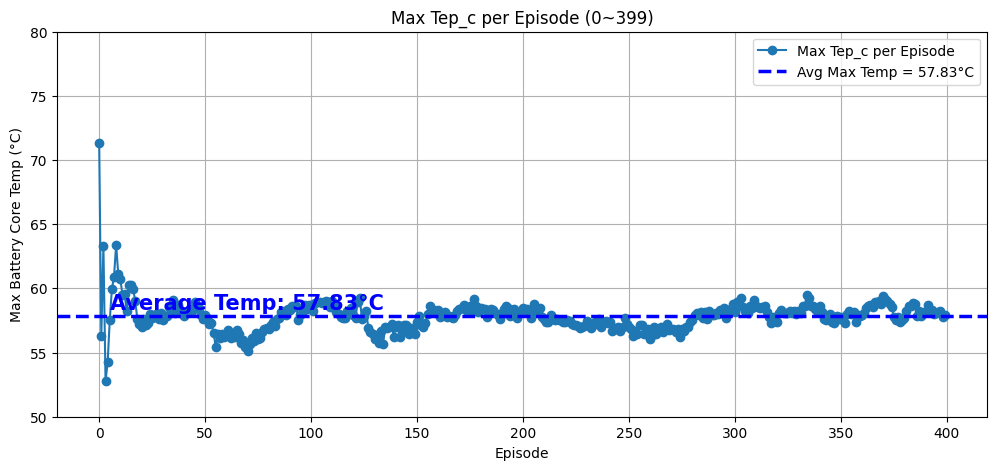

In [47]:
import numpy as np
import scipy.io as scio
import matplotlib.pyplot as plt
import os

# episode data 폴더
base_dir = "/root/Reinforcement/Project/test9_SAC_CS_Beta/MixTrain_w100_LR1e-03_v1/episode_data"

max_temps = []  # 각 에피소드별 max Tep_c 저장

for ep in range(400):
    path = f"{base_dir}/data_ep{ep}.mat"
    
    if not os.path.exists(path):
        max_temps.append(np.nan)
        continue

    data = scio.loadmat(path)

    if 'tep_c' not in data:
        max_temps.append(np.nan)
        continue

    Tep_c = np.array(data['tep_c']).flatten()
    max_temps.append(Tep_c.max())

max_temps = np.array(max_temps)

# 🔹 1) 전체 에피소드에 대한 "최고 온도들의 평균값"
avg_max_temp = np.nanmean(max_temps)   # <-- 평균

plt.figure(figsize=(12,5))
plt.plot(range(400), max_temps, marker='o', label="Max Tep_c per Episode")

# 🔹 파란 점선 추가
plt.axhline(y=avg_max_temp, linestyle='--', linewidth=2.5,
            color='blue', label=f"Avg Max Temp = {avg_max_temp:.2f}°C")

# 🔹 파란색 텍스트 추가
plt.text(5, avg_max_temp + 0.5,
         f"Average Temp: {avg_max_temp:.2f}°C",
         color='blue', fontsize=15, weight='bold')

plt.title("Max Tep_c per Episode (0~399)")
plt.xlabel("Episode")
plt.ylabel("Max Battery Core Temp (°C)")
plt.ylim(50, 80)
plt.grid(True)
plt.legend()
plt.show()


# 5. 코드 개선_평가 (reward 설계 개선, 배터리 코어 온도 >60 도 기준) / test9_SAC_CS_Beta

In [1]:
import sys
import warnings
from common.runner import Runner
from common.arguments import get_args
from common.env import make_env
from common.evaluate import Evaluator
from common.utils import Logger

warnings.filterwarnings("ignore")

if __name__ == '__main__':
    args = get_args()
    args.save_dir = args.save_dir + "_" + args.DRL + "_" + args.MODE + "_" + args.policy
    args.log_dir = args.log_dir + "_" + args.DRL + "_" + args.MODE + "_" + args.policy
    args.eva_dir = args.eva_dir + "_" + args.DRL + "_" + args.MODE + "_" + args.policy
    env, args = make_env(args)
    if args.evaluate:
        args.scenario_name = args.load_dir+'/'+args.load_scenario_name+'_%d'%args.load_episode
        sys.stdout = Logger(filepath=args.eva_dir+"/"+args.scenario_name+"/", filename='evaluate_log.log')
        print('max_episodes: ', args.evaluate_episode)
    else:
        args.scenario_name = args.scenario_name + "_w%d"%args.w_soc + "_LR%.0e"%args.lr_critic + '_' + args.file_v
        sys.stdout = Logger(filepath=args.save_dir+"/"+args.scenario_name+"/", filename='train_log.log')
        print('\nweight coefficient: w_soc = %.1f' % args.w_soc)
        print('max_episodes: ', args.max_episodes)
    print('cycle name: ', args.scenario_name)
    print('episode_steps: ', args.episode_steps)
    print('abs_spd_MAX: %.3f m/s' % args.abs_spd_MAX)
    print('abs_acc_MAX: %.3f m/s2' % args.abs_acc_MAX)
    print("DRL method: ", args.DRL)
    print('obs_dim: ', args.obs_dim)
    print('action_dim: ', args.action_dim)
    print('critic initial learning rate: %.0e' % args.lr_critic)
    print('actor initial learning rate: %.0e'%args.lr_actor)
    if args.DRL == 'SAC':
        print('alpha initial learning rate: %.0e'%args.lr_alpha)
    print('initial SOC: ', args.soc0)
    print('SOC-MODE: ', args.MODE)

    if args.evaluate:
        print("\n-----Start evaluating!-----")
        evaluator = Evaluator(args, env)
        evaluator.evaluate()
        print("-----Evaluating is finished!-----")
        print('-----Data saved in: <%s>-----'%(args.eva_dir+"/"+args.scenario_name))
    else:
        print("\n-----Start training-----")
        runner = Runner(args, env)
        runner.set_seed()
        if args.DRL == 'SAC':
            runner.run_SAC()
        elif args.DRL == 'DDPG':
            runner.run_DDPG()
        else:
            print("\n[ERROR]: No such DRL method in this program! Exit Now!\n")
        runner.memory_info()
        print("-----Training is finished!-----")
        print('-----Data saved in: <%s>-----'%(args.save_dir+"/"+args.scenario_name))

2025-11-29 05:44:37.786907: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-11-29 05:44:37.786952: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-11-29 05:44:37.786993: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-11-29 05:44:37.795752: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-29 05:44:38.592414: W tensorflow/compiler/

max_episodes:  5
cycle name:  /root/Reinforcement/Project/test9_SAC_CS_Beta/MixTrain_w100_LR1e-03_v1_73
episode_steps:  2174
abs_spd_MAX: 26.772 m/s
abs_acc_MAX: 3.237 m/s2
DRL method:  SAC
obs_dim:  7
action_dim:  1
critic initial learning rate: 1e-03
actor initial learning rate: 1e-04
alpha initial learning rate: 1e-04
initial SOC:  0.5
SOC-MODE:  CS

-----Start evaluating!-----


  0%|          | 0/5 [00:00<?, ?it/s]


---Beta policy is employed.---

actor device:  cuda:0
critic device:  cuda:0
Agent successfully loaded actor_network: /root/Reinforcement/Project/test9_SAC_CS_Beta/MixTrain_w100_LR1e-03_v1/net_params/actor_params_ep73.pkl
Agent successfully loaded critic_network: /root/Reinforcement/Project/test9_SAC_CS_Beta/MixTrain_w100_LR1e-03_v1/net_params/critic_params_ep73.pkl
Agent successfully loaded alpha_network: /root/Reinforcement/Project/test9_SAC_CS_Beta/MixTrain_w100_LR1e-03_v1/net_params/alpha_params_ep73.pkl


 20%|██        | 1/5 [00:03<00:12,  3.06s/it]


epi 0: travel 21.822km, SOC 0.3757, Bat-SOH 0.999593, FCS-SOH 0.999601, Max Tep_c 41.15
epi 0: h2_100km 6228.20g, money_100km ￥945.67
episode 0: reward -15.241, time spent: 3.057s


 40%|████      | 2/5 [00:05<00:08,  2.97s/it]


epi 1: travel 21.822km, SOC 0.3915, Bat-SOH 0.999628, FCS-SOH 0.999580, Max Tep_c 41.24
epi 1: h2_100km 6286.98g, money_100km ￥961.01
episode 1: reward -16.241, time spent: 2.907s


 60%|██████    | 3/5 [00:08<00:05,  2.92s/it]


epi 2: travel 21.822km, SOC 0.3761, Bat-SOH 0.999612, FCS-SOH 0.999608, Max Tep_c 40.99
epi 2: h2_100km 6244.79g, money_100km ￥928.55
episode 2: reward -15.650, time spent: 2.863s


 80%|████████  | 4/5 [00:11<00:02,  2.89s/it]


epi 3: travel 21.822km, SOC 0.3919, Bat-SOH 0.999623, FCS-SOH 0.999600, Max Tep_c 41.09
epi 3: h2_100km 6269.13g, money_100km ￥936.18
episode 3: reward -15.780, time spent: 2.837s


100%|██████████| 5/5 [00:14<00:00,  2.90s/it]



epi 4: travel 21.822km, SOC 0.3857, Bat-SOH 0.999595, FCS-SOH 0.999600, Max Tep_c 41.14
epi 4: h2_100km 6264.80g, money_100km ￥947.94
episode 4: reward -15.327, time spent: 2.827s
-----Evaluating is finished!-----
-----Data saved in: <./eva_SAC_CS_Beta//root/Reinforcement/Project/test9_SAC_CS_Beta/MixTrain_w100_LR1e-03_v1_73>-----
📌 파일: data_ep0.mat
📌 key 목록: dict_keys(['__header__', '__version__', '__globals__', 'T_mot', 'W_mot', 'mot_eff', 'P_mot', 'P_fc', 'P_fce', 'fce_eff', 'FCS_SOH', 'P_dcdc', 'dcdc_eff', 'FCS_De', 'travel', 'd_s_s', 'd_low', 'd_high', 'd_l_c', 'EMS_reward', 'soc_cost', 'h2_equal', 'h2_fcs', 'money_cost', 'h2_money', 'batt_money', 'fcs_money', 'SOC', 'SOH', 'I', 'I_c', 'money_cost_real', 'cell_OCV', 'cell_Vt', 'cell_V_3', 'cell_power_out', 'P_batt', 'tep_a', 'tep_c', 'dsoh', 'alpha'])

===== BEST EPISODES =====
🏅 Reward 최고 에피소드 : data_ep86.mat (ep_r = -261995.369)
🏅 수소소비 최소 에피소드 : data_ep3.mat (eq_H2_100km = 4323.756 g/100km)
An error occurred: [Errno 20] Not a d

# =======================================================================================